# PhD Student Mental Health Project

## Overview

This notebook contains analysis of survey data conducted by Shift Learning on PhD students. The project uses multiple machine learning models such as logistic regression, decision trees and naive bayes to draw insights into what risk factors contribute to mental health problems in PhD students and make recommendations on how to improve. 

## Business Problem

PhD students are at high risk of mental health issues and have a high suicide rate. This project aims to help academia understand the risk factors in order to systematically improve student’s overall mental health. This project also makes recommendations on how to set up preventative measures for mental health issues among students.

#### End Users:
- Universities, research facilities, school mental health counselors

#### True Business Problem:

- Understand risk factors that contributes to PhD students needing help for anxiety and depression.
- create a model that helps to identify students who might need help

#### Context:
- False positive: predict that a student need help for anxiety/depression when they don't 
    - Outcome: trouble and disturbance to the student
- False negative: predict that a student doesn't need help for anxiety/depression when they actually do
    - Outcome: student not getting the help that they need

#### Model Evaluation

We will be focusing on recall because we want to minimize false negative. 

## Data Understanding

The data is aggregated by surveying and interviewing 6,320 current PhD students all over the world in 2019. There are around 60 questions about their personal information and their opinions and concerns about their PhD program.
Important questions include age, country of origin, country of study, whether/by whom they were bullied, whether/reason they need to work outside of their program, whether/which kind of discrimination the student faced, their career expectations, worries about the program/their future, etc.

We are modeling on the assumption that if students need help with anxiety and/or depression, they would ask for it. 

### EDA

In [1]:
# basic imports
import pandas as pd
import numpy as np

In [2]:
# load dataframe
df=pd.read_csv('data.csv',dtype='str')

In [3]:
# check the dataframe
df

,ID.format,ID.completed,ID.language,ID.site,ID.date,ID.start,ID.endDate,ID.end,ID.time,Q1,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,The published format which was employed,Case completed in Snap Interviewer,What language would you like to complete the s...,Questionnaire location,Date of interview,Time interview started,Completion date of interview,Time interview ended,Duration of interview,"Which, if any, of the following degrees are yo...",...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,SNAP 2015 SHIFT,completed,Spanish,NaN,06/14/2019,16:46:41,06/14/2019,17:36:11,49.5,Doctorate degree (PhD/DPhil/MD),...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:10:02,06/14/2019,17:38:25,28.38,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:15:21,06/14/2019,17:39:13,23.87,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
4,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:28,06/14/2019,17:46:58,55.5,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:46,06/14/2019,17:07:47,16.02,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,9835,NaN
6809,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:54:50,06/14/2019,17:08:17,13.45,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6810,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:58:30,06/14/2019,17:19:23,20.88,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,No,NaN,NaN,9837,NaN
6811,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,15:10:17,06/14/2019,17:21:02,130.75,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


The first row is the questions.

In [4]:
# check the size of the dataset
df.shape

(6813, 274)

The dataset has 6812 data points and 274 columns. 

In [5]:
# check column names
list(df.columns)

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1',
 'Q1.a',
 'Q2',
 'Q3',
 'Q3.a',
 'Q4',
 'Q5',
 'Q6',
 'Q6.a',
 'Q7',
 'Q7.a',
 'Q8',
 'Q8.a',
 'Q9',
 'Q9.a',
 'Q10',
 'Q10.a',
 'Q11',
 'Q11.a',
 'Q12:1',
 'Q12:2',
 'Q12:3',
 'Q12:4',
 'Q12:5',
 'Q12:6',
 'Q12:7',
 'Q12:8',
 'Q12:9',
 'Q12:10',
 'Q12:11',
 'Q12.a',
 'Q13',
 'Q14',
 'Q14.a',
 'Q15.a',
 'Q15.b',
 'Q15.c',
 'Q15.d',
 'Q15.e',
 'Q15.f',
 'Q15.g',
 'Q15.h',
 'Q15.i',
 'Q15.j',
 'Q15.k',
 'Q15.l',
 'Q15.m',
 'Q15.n',
 'Q16',
 'Q17',
 'Q17.a',
 'Q18.a',
 'Q19.a',
 'Q20',
 'Q21.a',
 'Q21.b',
 'Q21.c',
 'Q21.d',
 'Q21.e',
 'Q21.f',
 'Q21.g',
 'Q21.h',
 'Q21.i',
 'Q22.a',
 'Q22.b',
 'Q22.c',
 'Q22.d',
 'Q22.e',
 'Q22.f',
 'Q22.g',
 'Q22.h',
 'Q22.i',
 'Q23',
 'Q24',
 'Q25',
 'Q25.a',
 'Q26',
 'Q27.a',
 'Q27.b',
 'Q27.c',
 'Q27.d',
 'Q27.e',
 'Q27.f',
 'Q28',
 'Q29',
 'Q29.a',
 'Q30.a',
 'Q30.b',
 'Q30.c',
 'Q30.d',
 'Q30.e',
 'Q30.f',
 'Q31',
 'Q32:1

Questions start from the 10th column.

In [6]:
# print out a list of the questions
question_list=list(df.columns)[9:]
for q in question_list:
    print('********')
    print(q)
    print(df[q][0])

********
Q1
Which, if any, of the following degrees are you currently studying for?
********
Q1.a
If other, please specify
********
Q2
Hidden
********
Q3
Which was the most important reason you decided to enrol in a PhD programme?
********
Q3.a
If other, please specify
********
Q4
Are you studying in the country you grew up in?   
********
Q5
Where do you currently live?
********
Q6
Which region in Asia?
********
Q6.a
If other, please specify
********
Q7
Which country in Australasia?
********
Q7.a
If other, please specify
********
Q8
Which country in Africa?
********
Q8.a
If other, please specify
********
Q9
Which country in Europe?
********
Q9.a
If other, please specify
********
Q10
Which country in North or Central America?
********
Q10.a
If other, please specify
********
Q11
Which country in South America?
********
Q11.a
If other, please specify
********
Q12:1
What prompted you to study outside your country of upbringing? 
********
Q12:2
What prompted you to study outside your count

#### Target

Our target column is Q28

In [7]:
# check values for target
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Prefer not to say                                                            292
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [8]:
df['Q28'].value_counts(normalize=True)

No                                                                          0.600000
Yes                                                                         0.356943
Prefer not to say                                                           0.042910
Have you ever sought help for anxiety or depression caused by PhD study?    0.000147
Name: Q28, dtype: float64

There are 4083 Nos and 2429 Yeses. There's a little bit of class imbalance, but not too bad.

In [9]:
# check null values
df['Q28'].isna().sum()

8

There are not many "prefer not to say"s or null values, so we can safely drop them.

In [10]:
df=df.dropna(subset=['Q28'])
df

,ID.format,ID.completed,ID.language,ID.site,ID.date,ID.start,ID.endDate,ID.end,ID.time,Q1,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,The published format which was employed,Case completed in Snap Interviewer,What language would you like to complete the s...,Questionnaire location,Date of interview,Time interview started,Completion date of interview,Time interview ended,Duration of interview,"Which, if any, of the following degrees are yo...",...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,SNAP 2015 SHIFT,completed,Spanish,NaN,06/14/2019,16:46:41,06/14/2019,17:36:11,49.5,Doctorate degree (PhD/DPhil/MD),...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:10:02,06/14/2019,17:38:25,28.38,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:15:21,06/14/2019,17:39:13,23.87,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
4,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:28,06/14/2019,17:46:58,55.5,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:46,06/14/2019,17:07:47,16.02,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,9835,NaN
6809,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:54:50,06/14/2019,17:08:17,13.45,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6810,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:58:30,06/14/2019,17:19:23,20.88,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,No,NaN,NaN,9837,NaN
6811,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,15:10:17,06/14/2019,17:21:02,130.75,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


In [11]:
# check if those rows are sucessfully dropped
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Prefer not to say                                                            292
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [12]:
# drop "Prefer not to say"s
df=df[df['Q28']!='Prefer not to say']

In [13]:
# check if those rows are sucessfully dropped 
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [14]:
dict_target={'Yes': 1, 'No': 0}

In [15]:
df['Q28']=df['Q28'].map(dict_target)

<ipython-input-15-7a5e2d789d2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q28']=df['Q28'].map(dict_target)


#### Features

There are two parts to this problem:
- indicative modeling:
    - figure out the risk factors for mental health issues in PhD students
- predictive modeling:
    - a model that can be put into use 

For these two approaches we need different data cleaning methods.

### Baseline Understanding

In [16]:
df['Q28'][1:].value_counts(normalize=True)

0.0    0.626996
1.0    0.373004
Name: Q28, dtype: float64

If we predict the majority class of not going to need help for anxiety/depression as a result of PhD study (assuming that if people need help, they ask for help), we will be right 62.7% of the time.

### Indicative Modeling 

For this method, I'm going to pick out features that I think might be most relevant to mental health based on common sense and clean them up individually.

In [17]:
# define a function to print out information of a column
def info(label):
    '''
    input string of column name
    output comprehensive analysis of the column
    '''
    print(f'column name: {label}')
    print('     ')
    print(f'Question: {df[label][0]}')
    print('     ')
    print(f'number of null values: {df[label].isna().sum()}')
    print('     ')
    print('Value Count:')
    
    print(df[label].value_counts())

In [18]:
# create a new list for all the columns that we'll be using for indicative modeling
ind_col=[]

In [19]:
# create a new df for indicative modeling
ind_df=df.drop(columns=df.columns[:9])

In [20]:
ind_df

,Q1,Q1.a,Q2,Q3,Q3.a,Q4,Q5,Q6,Q6.a,Q7,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,"Which, if any, of the following degrees are yo...","If other, please specify",Hidden,Which was the most important reason you decide...,"If other, please specify",Are you studying in the country you grew up in...,Where do you currently live?,Which region in Asia?,"If other, please specify",Which country in Australasia?,...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,Doctorate degree (PhD/DPhil/MD),NaN,NaN,No job I want is available without a PhD,NaN,Yes,North or Central America,NaN,NaN,NaN,...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,Doctorate degree (PhD/DPhil/MD),NaN,NaN,I want to pursue an academic career,NaN,No,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,Doctorate degree (PhD/DPhil/MD),NaN,NaN,Personal interest in my subject of choice,NaN,Yes,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
5,Doctorate degree (PhD/DPhil/MD),NaN,NaN,No job I want is available without a PhD,NaN,Yes,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,I think this is a great survey that all univer...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,Doctorate degree (PhD/DPhil/MD),NaN,NaN,No job I want is available without a PhD,NaN,Yes,Europe,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,No,"Yes, I would like Nature Careers to contact me...",NaN,9833,NaN
6807,Doctorate degree (PhD/DPhil/MD),NaN,NaN,I wanted to continue pursuing my research,NaN,No,North or Central America,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9834,NaN
6809,Doctorate degree (PhD/DPhil/MD),NaN,NaN,I want to pursue an academic career,NaN,Yes,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6811,Doctorate degree (PhD/DPhil/MD),NaN,NaN,Personal interest in my subject of choice,NaN,Yes,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


**Q1**

In [21]:
info('Q1')

column name: Q1
     
Question: Which, if any, of the following degrees are you currently studying for?
     
number of null values: 0
     
Value Count:
Doctorate degree (PhD/DPhil/MD)                                            6294
Dual doctorate degree (MD-PhD, PhD-PhD or other combination)                218
Which, if any, of the following degrees are you currently studying for?       1
Name: Q1, dtype: int64


In [22]:
# create dictionary for converting values into numbers
dict_Q1={'Doctorate degree (PhD/DPhil/MD)': 0, 
         'Dual doctorate degree (MD-PhD, PhD-PhD or other combination)': 1, 
         'Which, if any, of the following degrees are you currently studying for?':'dual_degree'}

In [23]:
# change values in column Q1
ind_df['Q1']=ind_df['Q1'].replace(dict_Q1)

In [24]:
# add processed column to list
ind_col.append('Q1')

The previous two steps are going to be repeated throughout the indicative modeling cleaning process so I'll write a function for it.

In [25]:
# function for cleaning and adding the column to list
def process(column_name,dictionary):
    ind_df[column_name]=ind_df[column_name].map(dictionary)
    ind_col.append(column_name)

**Q4**

In [26]:
info('Q4')

column name: Q4
     
Question: Are you studying in the country you grew up in?   
     
number of null values: 0
     
Value Count:
Yes                                                   4153
 No                                                   2359
Are you studying in the country you grew up in?          1
Name: Q4, dtype: int64


In [27]:
dict_Q4={'Yes':1, ' No':0, 'Are you studying in the country you grew up in? \xa0 ': 'home country'}

In [28]:
process('Q4',dict_Q4)

**Q13**

In [29]:
info('Q13')

column name: Q13
     
Question: Do you have a job alongside your studies?
     
number of null values: 0
     
Value Count:
No                                           5249
Yes                                          1263
Do you have a job alongside your studies?       1
Name: Q13, dtype: int64


In [30]:
ind_df['Q4'].value_counts()

1               4153
0               2359
home country       1
Name: Q4, dtype: int64

In [31]:
dict_Q13={'Yes ':1, 'No':0, 'Do you have a job alongside your studies?': 'job'}

In [32]:
process('Q13',dict_Q13)

**Q31**

In [33]:
info('Q31')

column name: Q31
     
Question: Do you feel that you have experienced bullying in your PhD program?
     
number of null values: 7
     
Value Count:
No                                                                     4902
Yes                                                                    1388
Prefer not to say                                                       215
Do you feel that you have experienced bullying in your PhD program?       1
Name: Q31, dtype: int64


In [34]:
dict_Q31={'Yes':1, 'No': 0, 'Prefer not to say': 2, 'Do you feel that you have experienced bullying in your PhD program?': 'bullying'}

In [35]:
process('Q31',dict_Q31)

**Q34**

In [36]:
info('Q34')

column name: Q34
     
Question: Do you feel that you have experienced discrimination or harassment in your PhD program?
     
number of null values: 24
     
Value Count:
No                                                                                         4937
Yes                                                                                        1334
Prefer not to say                                                                           217
Do you feel that you have experienced discrimination or harassment in your PhD program?       1
Name: Q34, dtype: int64


In [37]:
dict_Q34={'Yes':1, 'No': 0, 'Prefer not to say': 2, 'Do you feel that you have experienced discrimination or harassment in your PhD program?': 'discrimination/harrassment'}

In [38]:
process('Q34',dict_Q34)

**Q19.a**

In [39]:
info('Q19.a')

column name: Q19.a
     
Question: How satisfied are you with your PhD experience?
     
number of null values: 0
     
Value Count:
6                                                  2085
5                                                  1908
4 = Neither satisfied nor dissatisfied              717
3                                                   659
7 = Extremely satisfied                             592
2                                                   360
1 = Not at all satisfied                            191
How satisfied are you with your PhD experience?       1
Name: Q19.a, dtype: int64


Satisfaction is on a scale of 1 to 7, not at all satisfied to extremely satisfied. So the values just need to be reduced to numbers. 

In [40]:
ind_df['Q19.a'][1:]=ind_df['Q19.a'][1:].map(lambda x:int(x[0]))

<ipython-input-40-104b8e6e7b4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df['Q19.a'][1:]=ind_df['Q19.a'][1:].map(lambda x:int(x[0]))
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Q24**

In [41]:
info('Q24')

column name: Q24
     
Question: On average, how many hours a week do you typically spend on your PhD programme?
     
number of null values: 0
     
Value Count:
41-50 hours                                                                        1785
51-60 hours                                                                        1609
31-40 hours                                                                         783
61-70 hours                                                                         774
71-80 hours                                                                         425
More than 80 hours                                                                  328
Less than 11 hours                                                                  287
21-30 hours                                                                         274
11-20 hours                                                                         247
On average, how many hours a week do you typi

For this column, we can just take the middle of the range and cap it at 81 hours for simplicity. 

In [42]:
dict_Q24={'41-50 hours': 45, 
          '51-60 hours': 55, 
          '31-40 hours': 35, 
          '61-70 hours': 65, 
          '71-80 hours': 75, 
          'More than 80 hours':81, 
          'Less than 11 hours': 5, 
          '21-30 hours': 25, 
          '11-20 hours': 15, 
          'On average, how many hours a week do you typically spend on your PhD programme?': 'hours_worked'}

In [43]:
process('Q24', dict_Q24)

**Q57**

In [44]:
info('Q57')

column name: Q57
     
Question: Are you…
     
number of null values: 0
     
Value Count:
Female (including trans female)    3298
Male (including trans male)        3149
Prefer not to say                    35
Gender queer / Non binary            30
Are you…                              1
Name: Q57, dtype: int64


In [45]:
dict_Q57={'Female (including trans female)':0, 'Male (including trans male)': 1, 'Prefer not to say': 2, 'Gender queer / Non binary': 3, 'Are you…': 'gender'}

In [46]:
process('Q57',dict_Q57)

**Q56**

In [47]:
info('Q56')

column name: Q56
     
Question: What is your age?
     
number of null values: 0
     
Value Count:
25 - 34              5019
18 - 24               789
35 - 44               530
45 - 54               103
55 - 64                35
Prefer not to say      23
65 or over             13
What is your age?       1
Name: Q56, dtype: int64


In [48]:
dict_Q56={'25 - 34':30, '18 - 24':21, '35 - 44':40, '45 - 54': 50, '55 - 64': 60, 'Prefer not to say': 30, '65 or over': 65, 'What is your age?': 'age'}

In [49]:
process('Q56',dict_Q56)

**Q42**

In [50]:
info('Q42')

column name: Q42
     
Question: After completing your PhD, how long do you think it will take you to find a permanent (non-trainee) position?
     
number of null values: 0
     
Value Count:
Less than a year                                                                                                 1712
1 to 2 years                                                                                                     1258
3 to 6 years                                                                                                     1161
2 to 3 years                                                                                                     1046
Unsure                                                                                                            885
More than 6 years                                                                                                 450
After completing your PhD, how long do you think it will take you to find a permanent (non-trainee)

In [51]:
dict_Q42={'Less than a year': 0.5, '1 to 2 years': 1.5, '3 to 6 years': 4.5, '2 to 3 years': 2.5, 'Unsure': 0, 'More than 6 years': 6, 'After completing your PhD, how long do you think it will take you to find a permanent (non-trainee) position?': 'expected_unemployment_time'}

In [52]:
process('Q42',dict_Q42)

In [53]:
# check the column list now
ind_col

['Q1', 'Q4', 'Q13', 'Q31', 'Q34', 'Q24', 'Q57', 'Q56', 'Q42']

In [54]:
# take out this subset
ind_df=ind_df[ind_col]

In [55]:
ind_df

,Q1,Q4,Q13,Q31,Q34,Q24,Q57,Q56,Q42
0,dual_degree,home country,job,bullying,discrimination/harrassment,hours_worked,gender,age,expected_unemployment_time
1,0,1,0,0,1,55,0,30,4.5
2,0,0,0,0,1,65,1,30,1.5
3,0,1,0,0,0,65,1,30,2.5
5,0,1,0,0,0,55,1,30,0.5
...,...,...,...,...,...,...,...,...,...
6806,0,1,0,0,0,45,1,21,1.5
6807,0,0,0,0,1,75,1,40,4.5
6809,0,1,0,0,0,35,0,30,0.5
6811,0,1,0,0,0,75,1,30,4.5


In [56]:
# make the first row column names
ind_df.columns = ind_df.iloc[0]
# drop the first row
ind_df=ind_df.drop([0])

In [57]:
# fill na for 'job', 'bullying', and 'discrimination/harrassment'
# assume all nulls are 'prefer not to say'
ind_df['bullying'].fillna(value=2,inplace=True)
ind_df['discrimination/harrassment'].fillna(value=2,inplace=True)

In [58]:
# make all the data floats
ind_df=ind_df.astype(float)

In [59]:
ind_df

,dual_degree,home country,job,bullying,discrimination/harrassment,hours_worked,gender,age,expected_unemployment_time
1,0.0,1.0,0.0,0.0,1.0,55.0,0.0,30.0,4.5
2,0.0,0.0,0.0,0.0,1.0,65.0,1.0,30.0,1.5
3,0.0,1.0,0.0,0.0,0.0,65.0,1.0,30.0,2.5
5,0.0,1.0,0.0,0.0,0.0,55.0,1.0,30.0,0.5
6,0.0,1.0,0.0,0.0,0.0,75.0,0.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...
6806,0.0,1.0,0.0,0.0,0.0,45.0,1.0,21.0,1.5
6807,0.0,0.0,0.0,0.0,1.0,75.0,1.0,40.0,4.5
6809,0.0,1.0,0.0,0.0,0.0,35.0,0.0,30.0,0.5
6811,0.0,1.0,0.0,0.0,0.0,75.0,1.0,30.0,4.5


#### Train Test Split (Indicative)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_ind=ind_df
y_ind=df['Q28'][1:]
X_tr_ind, X_test_ind, y_tr_ind, y_test_ind = train_test_split(X_ind, y_ind, random_state=42)
X_train_ind, X_val_ind, y_train_ind, y_val_ind = train_test_split(X_tr_ind, y_tr_ind, random_state=42)

In [62]:
y_train_ind.value_counts()

0.0    2283
1.0    1380
Name: Q28, dtype: int64

#### Inferential Modeling

In [63]:
# imports for modeling and visualization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [64]:
# make a function to evaluate model
def evaluate(model, X_tr, y_tr, X_te, y_te):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {accuracy_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Precision Score:')
    print(f'Train - {precision_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {precision_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Recall Score: ')
    print(f'Train - {recall_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {recall_score(y_te, model.predict(X_te))}')
    print('  ')
    print('F1 Score: ')
    print(f'Train - {f1_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {f1_score(y_te, model.predict(X_te))}')
    print('  ')
    print('ROC_AUC: ')
    print(f'Train - {roc_auc_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {roc_auc_score(y_te, model.predict(X_te))}')
    print('  ')
    print('  ')
    print('Confusion matrix for test data')
    return plot_confusion_matrix(model, X_te, y_te, normalize = 'true', include_values=True, display_labels = ["Doesn't Need Help","Need Help"], cmap=plt.cm.Blues)

#### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_ind, y_train_ind)
print(lr.score(X_train_ind,y_train_ind))
print(lr.score(X_val_ind,y_val_ind))

0.6622986622986623
0.6355446355446356


In [66]:
# print out coefficient of the logistic regression model in a dataframe
coef_lr=pd.DataFrame(data=lr.coef_, columns=X_train_ind.columns).T
coef_lr

,0
0,
dual_degree,-0.074968
home country,-0.007442
job,-0.070962
bullying,0.682763
discrimination/harrassment,0.345402
hours_worked,0.000072
gender,-0.523925
age,-0.021124
expected_unemployment_time,-0.007860


In [67]:
# add a log odds column to this dataframe
coef_lr['log_odds']=coef_lr[0].map(lambda x:np.exp(x))

In [68]:
coef_lr

,0,log_odds
0,,
dual_degree,-0.074968,0.927774
home country,-0.007442,0.992586
job,-0.070962,0.931497
bullying,0.682763,1.979338
discrimination/harrassment,0.345402,1.412558
hours_worked,0.000072,1.000072
gender,-0.523925,0.592192
age,-0.021124,0.979098
expected_unemployment_time,-0.007860,0.992171


**Interpretation**

holding everything else constant, the odds of needing help for anxiety and depression for students that are bullied (bullied = 1)over the odds of needing help for anxiety and depression for students that are not bullied (bullied = 0) is exp(.68) = 1.97.  In terms of percent change, we can say that the odds for getting anxiety and depression for students that are bullied are 97% higher than the odds for students that are not bullied.

#### Logistic Regression on scaled data for feature importance

In [69]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [70]:
# instantiate scaler
scaler=StandardScaler()
# fit scaler on training data and transform it
X_train_ind_scaled=scaler.fit_transform(X_train_ind)
# transform validation and test set
X_val_ind_scaled=scaler.transform(X_val_ind)
X_test_ind_scaled=scaler.transform(X_test_ind)

In [71]:
# instantiate and fit logistic regression on scaled data
lr_scaled=LogisticRegression()
lr_scaled.fit(X_train_ind_scaled,y_train_ind)

LogisticRegression()

In [72]:
print(lr_scaled.score(X_train_ind,y_train_ind))
print(lr_scaled.score(X_val_ind,y_val_ind))

0.6232596232596233
0.6298116298116299


In [73]:
# print out coefficient of the logistic regression model in a dataframe
coef_lr_scaled=pd.DataFrame(data=lr_scaled.coef_, columns=X_train_ind.columns).T
coef_lr_scaled

,0
0,
dual_degree,-0.011702
home country,-0.003905
job,-0.027988
bullying,0.358311
discrimination/harrassment,0.183861
hours_worked,0.000889
gender,-0.280620
age,-0.118770
expected_unemployment_time,-0.014678


In [74]:
# add a log odds column to this dataframe
coef_lr_scaled['log_odds']=coef_lr_scaled[0].map(lambda x:np.exp(x))
coef_lr_scaled

,0,log_odds
0,,
dual_degree,-0.011702,0.988366
home country,-0.003905,0.996103
job,-0.027988,0.972400
bullying,0.358311,1.430910
discrimination/harrassment,0.183861,1.201849
hours_worked,0.000889,1.000890
gender,-0.280620,0.755315
age,-0.118770,0.888012
expected_unemployment_time,-0.014678,0.985430


#### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7,random_state=42)
dt.fit(X_train_ind,y_train_ind)
print(dt.score(X_train_ind,y_train_ind))
print(dt.score(X_val_ind,y_val_ind))

0.6994266994266994
0.6486486486486487


In [76]:
#print out feature importance of the decision tree model in a dataframe
fi_dt=pd.DataFrame(data=dt.feature_importances_, index=X_train_ind.columns)
fi_dt

,0
0,
dual_degree,0.015376
home country,0.023886
job,0.043532
bullying,0.355264
discrimination/harrassment,0.088598
hours_worked,0.153654
gender,0.151129
age,0.061604
expected_unemployment_time,0.106958


**Interpretation**

Decision tree confirms that bullying is the most important contributor to whether a student needs help for anxiety/depression.

### Predictive Modeling

Drop columns that are totally non-related:
there are two types of columns that needs dropping:
- columns that starts with "ID.", these are the administrative columns of when and how the survey is done.
- columns starting from Q60 are also administrative columns
- columns that are 'If other, please specify'
- columns that give away the answer, which is 'Q29' : Did you seek help for anxiety or depression within your institution? 

In [77]:
drop_list=[]
for c in list(df.columns):
    if c[:2]=='ID':
        drop_list.append(c)
    elif c[:2]=='Q6':
        drop_list.append(c)
    elif df[c][0]=='If other, please specify':
        drop_list.append(c)

In [78]:
drop_list

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1.a',
 'Q3.a',
 'Q6',
 'Q6.a',
 'Q7.a',
 'Q8.a',
 'Q9.a',
 'Q10.a',
 'Q11.a',
 'Q12.a',
 'Q14.a',
 'Q17.a',
 'Q25.a',
 'Q29.a',
 'Q32.a',
 'Q35.a',
 'Q39.a',
 'Q40.a',
 'Q44.a',
 'Q45.a',
 'Q46.a',
 'Q47.a',
 'Q48.a',
 'Q49.a',
 'Q52.a',
 'Q53.a',
 'Q54.a',
 'Q58.a',
 'Q59.a',
 'Q60',
 'Q61',
 'Q62',
 'Q63',
 'Q64',
 'Q65.a',
 'Q65.b']

In [79]:
drop_list.append('Q29')
drop_list

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1.a',
 'Q3.a',
 'Q6',
 'Q6.a',
 'Q7.a',
 'Q8.a',
 'Q9.a',
 'Q10.a',
 'Q11.a',
 'Q12.a',
 'Q14.a',
 'Q17.a',
 'Q25.a',
 'Q29.a',
 'Q32.a',
 'Q35.a',
 'Q39.a',
 'Q40.a',
 'Q44.a',
 'Q45.a',
 'Q46.a',
 'Q47.a',
 'Q48.a',
 'Q49.a',
 'Q52.a',
 'Q53.a',
 'Q54.a',
 'Q58.a',
 'Q59.a',
 'Q60',
 'Q61',
 'Q62',
 'Q63',
 'Q64',
 'Q65.a',
 'Q65.b',
 'Q29']

In [80]:
# create dataframe for predictive modeling
df_pred=df.drop(columns=drop_list)

In [81]:
# fill all null values with 0
df_pred.fillna(0)

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,...,Q58:8,Q58:9,Q58:10,Q58:11,Q58:12,Q59:1,Q59:2,Q59:3,Q59:4,Q59:5
0,"Which, if any, of the following degrees are yo...",Hidden,Which was the most important reason you decide...,Are you studying in the country you grew up in...,Where do you currently live?,Which country in Australasia?,Which country in Africa?,Which country in Europe?,Which country in North or Central America?,Which country in South America?,...,Which of the following best describes you?,Which of the following best describes you?,Which of the following best describes you?,Which of the following best describes you?,Which of the following best describes you?,Do you have any caring responsibilities?,Do you have any caring responsibilities?,Do you have any caring responsibilities?,Do you have any caring responsibilities?,Do you have any caring responsibilities?
1,Doctorate degree (PhD/DPhil/MD),0,No job I want is available without a PhD,Yes,North or Central America,0,0,0,Mexico,0,...,0,0,0,0,0,0,0,"Yes, to an adult(s)",0,0
2,Doctorate degree (PhD/DPhil/MD),0,I want to pursue an academic career,No,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
3,Doctorate degree (PhD/DPhil/MD),0,Personal interest in my subject of choice,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
5,Doctorate degree (PhD/DPhil/MD),0,No job I want is available without a PhD,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,Doctorate degree (PhD/DPhil/MD),0,No job I want is available without a PhD,Yes,Europe,0,0,France,0,0,...,0,0,0,0,0,0,0,0,No,0
6807,Doctorate degree (PhD/DPhil/MD),0,I wanted to continue pursuing my research,No,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,"Yes, to child/children under 12",0,0,0,0
6809,Doctorate degree (PhD/DPhil/MD),0,I want to pursue an academic career,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
6811,Doctorate degree (PhD/DPhil/MD),0,Personal interest in my subject of choice,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0


In [82]:
# convert data type to string for catboost
df_pred=df_pred.astype('str')

### Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X=df_pred.drop('Q28', axis=1)
X=X.drop(index=1)
y=df['Q28'][1:]

In [85]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

### CatBoost

In [86]:
import catboost
from catboost import Pool
from catboost import CatBoostClassifier

In [87]:
cb=CatBoostClassifier(random_state=42, silent=True)

In [88]:
cat_features = X.columns[np.where(X.dtypes != float)[0]].values.tolist()
print(cat_features)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12:1', 'Q12:2', 'Q12:3', 'Q12:4', 'Q12:5', 'Q12:6', 'Q12:7', 'Q12:8', 'Q12:9', 'Q12:10', 'Q12:11', 'Q13', 'Q14', 'Q15.a', 'Q15.b', 'Q15.c', 'Q15.d', 'Q15.e', 'Q15.f', 'Q15.g', 'Q15.h', 'Q15.i', 'Q15.j', 'Q15.k', 'Q15.l', 'Q15.m', 'Q15.n', 'Q16', 'Q17', 'Q18.a', 'Q19.a', 'Q20', 'Q21.a', 'Q21.b', 'Q21.c', 'Q21.d', 'Q21.e', 'Q21.f', 'Q21.g', 'Q21.h', 'Q21.i', 'Q22.a', 'Q22.b', 'Q22.c', 'Q22.d', 'Q22.e', 'Q22.f', 'Q22.g', 'Q22.h', 'Q22.i', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27.a', 'Q27.b', 'Q27.c', 'Q27.d', 'Q27.e', 'Q27.f', 'Q30.a', 'Q30.b', 'Q30.c', 'Q30.d', 'Q30.e', 'Q30.f', 'Q31', 'Q32:1', 'Q32:2', 'Q32:3', 'Q32:4', 'Q32:5', 'Q32:6', 'Q32:7', 'Q33', 'Q34', 'Q35:1', 'Q35:2', 'Q35:3', 'Q35:4', 'Q35:5', 'Q35:6', 'Q35:7', 'Q35:8', 'Q35:9', 'Q36.a', 'Q37.a', 'Q37.b', 'Q37.c', 'Q37.d', 'Q37.e', 'Q38.a', 'Q38.b', 'Q38.c', 'Q38.d', 'Q38.e', 'Q38.f', 'Q38.g', 'Q39:1', 'Q39:2', 'Q39:3', 'Q39:4', 'Q39:5', 'Q39:6', 'Q39:7', 'Q39:8', 'Q39:

In [89]:
cb.fit(X_train,y_train, cat_features=cat_features)

In [90]:
print(cb.score(X_train,y_train))
print(cb.score(X_val,y_val))

0.822003822003822
0.7133497133497133


In [91]:
cb.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Q15.m,6.266190
1,Q57,3.108015
2,Q31,2.725444
3,Q54:4,2.535651
4,Q30.a,2.423917
...,...,...
222,Q58:5,0.022916
223,Q52:8,0.016647
224,Q2,0.000000
225,Q16,0.000000


Accuracy Score:
Train - 0.822003822003822
Test - 0.7133497133497133
  
Precision Score:
Train - 0.8473282442748091
Test - 0.6491228070175439
  
Recall Score: 
Train - 0.6434782608695652
Test - 0.4911504424778761
  
F1 Score: 
Train - 0.7314662273476111
Test - 0.5591939546599496
  
ROC_AUC: 
Train - 0.7866975185206344
Test - 0.6675518142168314
  
  
Confusion matrix for test data


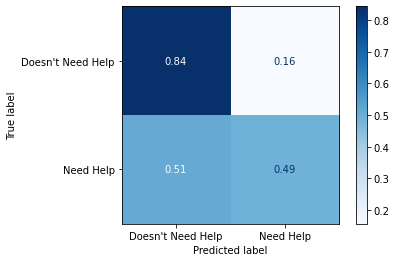

In [92]:
evaluate(cb,X_train,y_train,X_val,y_val)

In [93]:
# Select categorical features by selecting anything columns that aren't a float
categorical_features_indices = list(np.where(X_train.dtypes != float)[0])

# Select X, and y of your data, specifying categorical columns
data = Pool(X_train, y_train, cat_features=categorical_features_indices)

# Init model
model = CatBoostClassifier(random_state= 42)

# select features,
summary = model.select_features(
    data,
    features_for_select=categorical_features_indices, # Indecies of features you want to include in search
    num_features_to_select=5, # Total features you want at the end
    steps=3,
    algorithm=catboost.EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=catboost.EShapCalcType.Regular,
    train_final_model=False,# You can also train a final model at the end by setting to "True"
    # verbose=False
)

Learning rate set to 0.017935
Step #1 out of 3
0:	learn: 0.6894147	total: 185ms	remaining: 3m 5s
1:	learn: 0.6856126	total: 310ms	remaining: 2m 34s
2:	learn: 0.6826263	total: 375ms	remaining: 2m 4s
3:	learn: 0.6796735	total: 453ms	remaining: 1m 52s
4:	learn: 0.6765878	total: 572ms	remaining: 1m 53s
5:	learn: 0.6734910	total: 689ms	remaining: 1m 54s
6:	learn: 0.6706554	total: 812ms	remaining: 1m 55s
7:	learn: 0.6681050	total: 854ms	remaining: 1m 45s
8:	learn: 0.6653868	total: 1s	remaining: 1m 50s
9:	learn: 0.6626099	total: 1.12s	remaining: 1m 50s
10:	learn: 0.6603041	total: 1.25s	remaining: 1m 52s
11:	learn: 0.6577217	total: 1.39s	remaining: 1m 54s
12:	learn: 0.6552843	total: 1.5s	remaining: 1m 54s
13:	learn: 0.6533050	total: 1.63s	remaining: 1m 55s
14:	learn: 0.6512296	total: 1.75s	remaining: 1m 54s
15:	learn: 0.6490759	total: 1.87s	remaining: 1m 55s
16:	learn: 0.6471851	total: 2s	remaining: 1m 55s
17:	learn: 0.6450260	total: 2.13s	remaining: 1m 56s
18:	learn: 0.6429047	total: 2.25s	re

157:	learn: 0.5463072	total: 19.6s	remaining: 1m 44s
158:	learn: 0.5459590	total: 19.7s	remaining: 1m 44s
159:	learn: 0.5457492	total: 19.9s	remaining: 1m 44s
160:	learn: 0.5454522	total: 20s	remaining: 1m 44s
161:	learn: 0.5452229	total: 20.2s	remaining: 1m 44s
162:	learn: 0.5447855	total: 20.3s	remaining: 1m 44s
163:	learn: 0.5444911	total: 20.5s	remaining: 1m 44s
164:	learn: 0.5441532	total: 20.6s	remaining: 1m 44s
165:	learn: 0.5438570	total: 20.8s	remaining: 1m 44s
166:	learn: 0.5434954	total: 20.9s	remaining: 1m 44s
167:	learn: 0.5430638	total: 21s	remaining: 1m 44s
168:	learn: 0.5427209	total: 21.2s	remaining: 1m 44s
169:	learn: 0.5424203	total: 21.3s	remaining: 1m 44s
170:	learn: 0.5419962	total: 21.5s	remaining: 1m 44s
171:	learn: 0.5418262	total: 21.6s	remaining: 1m 44s
172:	learn: 0.5415474	total: 21.7s	remaining: 1m 43s
173:	learn: 0.5410665	total: 21.9s	remaining: 1m 43s
174:	learn: 0.5408296	total: 22s	remaining: 1m 43s
175:	learn: 0.5406353	total: 22.2s	remaining: 1m 43s

314:	learn: 0.5111817	total: 39.4s	remaining: 1m 25s
315:	learn: 0.5108832	total: 39.5s	remaining: 1m 25s
316:	learn: 0.5108139	total: 39.7s	remaining: 1m 25s
317:	learn: 0.5105877	total: 39.8s	remaining: 1m 25s
318:	learn: 0.5103702	total: 39.9s	remaining: 1m 25s
319:	learn: 0.5101512	total: 40s	remaining: 1m 24s
320:	learn: 0.5100565	total: 40.1s	remaining: 1m 24s
321:	learn: 0.5097810	total: 40.2s	remaining: 1m 24s
322:	learn: 0.5096104	total: 40.3s	remaining: 1m 24s
323:	learn: 0.5094533	total: 40.5s	remaining: 1m 24s
324:	learn: 0.5092346	total: 40.6s	remaining: 1m 24s
325:	learn: 0.5090452	total: 40.7s	remaining: 1m 24s
326:	learn: 0.5087736	total: 40.8s	remaining: 1m 23s
327:	learn: 0.5085154	total: 40.9s	remaining: 1m 23s
328:	learn: 0.5083044	total: 41s	remaining: 1m 23s
329:	learn: 0.5079653	total: 41.1s	remaining: 1m 23s
330:	learn: 0.5077664	total: 41.2s	remaining: 1m 23s
331:	learn: 0.5077052	total: 41.4s	remaining: 1m 23s
332:	learn: 0.5075293	total: 41.5s	remaining: 1m 2

470:	learn: 0.4802930	total: 58.4s	remaining: 1m 5s
471:	learn: 0.4801251	total: 58.5s	remaining: 1m 5s
472:	learn: 0.4798487	total: 58.6s	remaining: 1m 5s
473:	learn: 0.4797451	total: 58.8s	remaining: 1m 5s
474:	learn: 0.4795370	total: 58.9s	remaining: 1m 5s
475:	learn: 0.4795179	total: 59s	remaining: 1m 4s
476:	learn: 0.4791550	total: 59.1s	remaining: 1m 4s
477:	learn: 0.4790292	total: 59.2s	remaining: 1m 4s
478:	learn: 0.4787980	total: 59.4s	remaining: 1m 4s
479:	learn: 0.4784460	total: 59.5s	remaining: 1m 4s
480:	learn: 0.4782847	total: 59.6s	remaining: 1m 4s
481:	learn: 0.4781101	total: 59.7s	remaining: 1m 4s
482:	learn: 0.4779171	total: 59.9s	remaining: 1m 4s
483:	learn: 0.4776394	total: 60s	remaining: 1m 3s
484:	learn: 0.4774458	total: 1m	remaining: 1m 3s
485:	learn: 0.4772735	total: 1m	remaining: 1m 3s
486:	learn: 0.4770593	total: 1m	remaining: 1m 3s
487:	learn: 0.4767956	total: 1m	remaining: 1m 3s
488:	learn: 0.4766248	total: 1m	remaining: 1m 3s
489:	learn: 0.4764600	total: 1m

629:	learn: 0.4496306	total: 1m 18s	remaining: 46.2s
630:	learn: 0.4494759	total: 1m 18s	remaining: 46.1s
631:	learn: 0.4493175	total: 1m 19s	remaining: 46s
632:	learn: 0.4491771	total: 1m 19s	remaining: 45.9s
633:	learn: 0.4489668	total: 1m 19s	remaining: 45.8s
634:	learn: 0.4486753	total: 1m 19s	remaining: 45.7s
635:	learn: 0.4485617	total: 1m 19s	remaining: 45.6s
636:	learn: 0.4484343	total: 1m 19s	remaining: 45.5s
637:	learn: 0.4483218	total: 1m 19s	remaining: 45.4s
638:	learn: 0.4481979	total: 1m 20s	remaining: 45.3s
639:	learn: 0.4480068	total: 1m 20s	remaining: 45.1s
640:	learn: 0.4479565	total: 1m 20s	remaining: 45s
641:	learn: 0.4478422	total: 1m 20s	remaining: 44.9s
642:	learn: 0.4476668	total: 1m 20s	remaining: 44.8s
643:	learn: 0.4475016	total: 1m 20s	remaining: 44.7s
644:	learn: 0.4473630	total: 1m 20s	remaining: 44.6s
645:	learn: 0.4471913	total: 1m 21s	remaining: 44.5s
646:	learn: 0.4470368	total: 1m 21s	remaining: 44.3s
647:	learn: 0.4468126	total: 1m 21s	remaining: 44.

786:	learn: 0.4244941	total: 1m 39s	remaining: 26.8s
787:	learn: 0.4242037	total: 1m 39s	remaining: 26.7s
788:	learn: 0.4240391	total: 1m 39s	remaining: 26.6s
789:	learn: 0.4239330	total: 1m 39s	remaining: 26.5s
790:	learn: 0.4237082	total: 1m 39s	remaining: 26.3s
791:	learn: 0.4234399	total: 1m 39s	remaining: 26.2s
792:	learn: 0.4232590	total: 1m 39s	remaining: 26.1s
793:	learn: 0.4231189	total: 1m 40s	remaining: 26s
794:	learn: 0.4229145	total: 1m 40s	remaining: 25.8s
795:	learn: 0.4227845	total: 1m 40s	remaining: 25.7s
796:	learn: 0.4226904	total: 1m 40s	remaining: 25.6s
797:	learn: 0.4225537	total: 1m 40s	remaining: 25.4s
798:	learn: 0.4224264	total: 1m 40s	remaining: 25.3s
799:	learn: 0.4222896	total: 1m 40s	remaining: 25.2s
800:	learn: 0.4220977	total: 1m 40s	remaining: 25.1s
801:	learn: 0.4218924	total: 1m 40s	remaining: 24.9s
802:	learn: 0.4216683	total: 1m 41s	remaining: 24.8s
803:	learn: 0.4215517	total: 1m 41s	remaining: 24.7s
804:	learn: 0.4214844	total: 1m 41s	remaining: 2

943:	learn: 0.3998856	total: 1m 58s	remaining: 7.01s
944:	learn: 0.3997056	total: 1m 58s	remaining: 6.89s
945:	learn: 0.3994668	total: 1m 58s	remaining: 6.76s
946:	learn: 0.3994557	total: 1m 58s	remaining: 6.64s
947:	learn: 0.3991898	total: 1m 58s	remaining: 6.51s
948:	learn: 0.3990617	total: 1m 58s	remaining: 6.38s
949:	learn: 0.3988496	total: 1m 58s	remaining: 6.26s
950:	learn: 0.3987298	total: 1m 59s	remaining: 6.13s
951:	learn: 0.3985110	total: 1m 59s	remaining: 6.01s
952:	learn: 0.3983336	total: 1m 59s	remaining: 5.89s
953:	learn: 0.3982055	total: 1m 59s	remaining: 5.76s
954:	learn: 0.3981136	total: 1m 59s	remaining: 5.64s
955:	learn: 0.3980029	total: 1m 59s	remaining: 5.51s
956:	learn: 0.3977489	total: 1m 59s	remaining: 5.39s
957:	learn: 0.3976985	total: 1m 59s	remaining: 5.26s
958:	learn: 0.3975352	total: 2m	remaining: 5.13s
959:	learn: 0.3974488	total: 2m	remaining: 5.01s
960:	learn: 0.3973015	total: 2m	remaining: 4.88s
961:	learn: 0.3970236	total: 2m	remaining: 4.76s
962:	lear

30:	learn: 0.6201809	total: 923ms	remaining: 28.9s
31:	learn: 0.6186450	total: 960ms	remaining: 29s
32:	learn: 0.6173048	total: 993ms	remaining: 29.1s
33:	learn: 0.6157914	total: 1.02s	remaining: 29.1s
34:	learn: 0.6143676	total: 1.05s	remaining: 29.1s
35:	learn: 0.6127764	total: 1.09s	remaining: 29.1s
36:	learn: 0.6116079	total: 1.12s	remaining: 29.1s
37:	learn: 0.6102439	total: 1.15s	remaining: 29.1s
38:	learn: 0.6091344	total: 1.18s	remaining: 29.1s
39:	learn: 0.6081608	total: 1.21s	remaining: 29.1s
40:	learn: 0.6069890	total: 1.25s	remaining: 29.1s
41:	learn: 0.6055586	total: 1.27s	remaining: 29.1s
42:	learn: 0.6043028	total: 1.31s	remaining: 29.1s
43:	learn: 0.6030610	total: 1.34s	remaining: 29.1s
44:	learn: 0.6018361	total: 1.37s	remaining: 29.1s
45:	learn: 0.6009689	total: 1.4s	remaining: 29s
46:	learn: 0.6000551	total: 1.43s	remaining: 29s
47:	learn: 0.5990509	total: 1.46s	remaining: 29s
48:	learn: 0.5979869	total: 1.5s	remaining: 29s
49:	learn: 0.5969372	total: 1.53s	remaining

195:	learn: 0.5296170	total: 7.19s	remaining: 29.5s
196:	learn: 0.5293132	total: 7.23s	remaining: 29.5s
197:	learn: 0.5290403	total: 7.27s	remaining: 29.5s
198:	learn: 0.5288480	total: 7.31s	remaining: 29.4s
199:	learn: 0.5285101	total: 7.38s	remaining: 29.5s
200:	learn: 0.5283634	total: 7.42s	remaining: 29.5s
201:	learn: 0.5280664	total: 7.46s	remaining: 29.5s
202:	learn: 0.5277229	total: 7.5s	remaining: 29.4s
203:	learn: 0.5275261	total: 7.54s	remaining: 29.4s
204:	learn: 0.5273893	total: 7.59s	remaining: 29.4s
205:	learn: 0.5272585	total: 7.63s	remaining: 29.4s
206:	learn: 0.5269598	total: 7.68s	remaining: 29.4s
207:	learn: 0.5265271	total: 7.71s	remaining: 29.4s
208:	learn: 0.5261868	total: 7.76s	remaining: 29.4s
209:	learn: 0.5258289	total: 7.8s	remaining: 29.3s
210:	learn: 0.5256605	total: 7.84s	remaining: 29.3s
211:	learn: 0.5253041	total: 7.88s	remaining: 29.3s
212:	learn: 0.5249572	total: 7.93s	remaining: 29.3s
213:	learn: 0.5246571	total: 7.97s	remaining: 29.3s
214:	learn: 0.

354:	learn: 0.4932437	total: 16s	remaining: 29s
355:	learn: 0.4931110	total: 16s	remaining: 29s
356:	learn: 0.4929501	total: 16.1s	remaining: 28.9s
357:	learn: 0.4928028	total: 16.1s	remaining: 28.9s
358:	learn: 0.4926045	total: 16.2s	remaining: 28.9s
359:	learn: 0.4924630	total: 16.2s	remaining: 28.9s
360:	learn: 0.4923729	total: 16.3s	remaining: 28.8s
361:	learn: 0.4921186	total: 16.3s	remaining: 28.8s
362:	learn: 0.4919393	total: 16.4s	remaining: 28.8s
363:	learn: 0.4918395	total: 16.4s	remaining: 28.7s
364:	learn: 0.4917079	total: 16.5s	remaining: 28.7s
365:	learn: 0.4916340	total: 16.6s	remaining: 28.7s
366:	learn: 0.4915475	total: 16.6s	remaining: 28.7s
367:	learn: 0.4913355	total: 16.7s	remaining: 28.7s
368:	learn: 0.4911094	total: 16.7s	remaining: 28.6s
369:	learn: 0.4908510	total: 16.8s	remaining: 28.6s
370:	learn: 0.4906383	total: 16.9s	remaining: 28.6s
371:	learn: 0.4904716	total: 16.9s	remaining: 28.6s
372:	learn: 0.4903679	total: 17s	remaining: 28.6s
373:	learn: 0.4900342	

514:	learn: 0.4617958	total: 23.8s	remaining: 22.4s
515:	learn: 0.4617324	total: 23.8s	remaining: 22.3s
516:	learn: 0.4614978	total: 23.8s	remaining: 22.3s
517:	learn: 0.4613272	total: 23.9s	remaining: 22.2s
518:	learn: 0.4611536	total: 24s	remaining: 22.2s
519:	learn: 0.4609339	total: 24s	remaining: 22.2s
520:	learn: 0.4606466	total: 24.1s	remaining: 22.1s
521:	learn: 0.4605351	total: 24.1s	remaining: 22.1s
522:	learn: 0.4603880	total: 24.1s	remaining: 22s
523:	learn: 0.4601913	total: 24.2s	remaining: 22s
524:	learn: 0.4598631	total: 24.2s	remaining: 21.9s
525:	learn: 0.4597180	total: 24.3s	remaining: 21.9s
526:	learn: 0.4594834	total: 24.3s	remaining: 21.8s
527:	learn: 0.4593440	total: 24.4s	remaining: 21.8s
528:	learn: 0.4591636	total: 24.4s	remaining: 21.7s
529:	learn: 0.4590449	total: 24.5s	remaining: 21.7s
530:	learn: 0.4587646	total: 24.5s	remaining: 21.6s
531:	learn: 0.4585712	total: 24.5s	remaining: 21.6s
532:	learn: 0.4584914	total: 24.6s	remaining: 21.5s
533:	learn: 0.458339

673:	learn: 0.4334421	total: 29.6s	remaining: 14.3s
674:	learn: 0.4333328	total: 29.6s	remaining: 14.3s
675:	learn: 0.4331022	total: 29.6s	remaining: 14.2s
676:	learn: 0.4329935	total: 29.7s	remaining: 14.2s
677:	learn: 0.4328558	total: 29.7s	remaining: 14.1s
678:	learn: 0.4326581	total: 29.7s	remaining: 14.1s
679:	learn: 0.4324661	total: 29.8s	remaining: 14s
680:	learn: 0.4322946	total: 29.8s	remaining: 14s
681:	learn: 0.4320458	total: 29.8s	remaining: 13.9s
682:	learn: 0.4318098	total: 29.9s	remaining: 13.9s
683:	learn: 0.4317383	total: 29.9s	remaining: 13.8s
684:	learn: 0.4315809	total: 29.9s	remaining: 13.8s
685:	learn: 0.4314452	total: 30s	remaining: 13.7s
686:	learn: 0.4311592	total: 30s	remaining: 13.7s
687:	learn: 0.4311030	total: 30s	remaining: 13.6s
688:	learn: 0.4308906	total: 30.1s	remaining: 13.6s
689:	learn: 0.4306700	total: 30.1s	remaining: 13.5s
690:	learn: 0.4305055	total: 30.1s	remaining: 13.5s
691:	learn: 0.4304793	total: 30.2s	remaining: 13.4s
692:	learn: 0.4302447	

837:	learn: 0.4087745	total: 35.1s	remaining: 6.79s
838:	learn: 0.4086915	total: 35.1s	remaining: 6.74s
839:	learn: 0.4086032	total: 35.2s	remaining: 6.7s
840:	learn: 0.4084013	total: 35.2s	remaining: 6.65s
841:	learn: 0.4082212	total: 35.2s	remaining: 6.61s
842:	learn: 0.4079731	total: 35.3s	remaining: 6.57s
843:	learn: 0.4076674	total: 35.3s	remaining: 6.53s
844:	learn: 0.4074744	total: 35.3s	remaining: 6.48s
845:	learn: 0.4073622	total: 35.4s	remaining: 6.44s
846:	learn: 0.4072136	total: 35.4s	remaining: 6.4s
847:	learn: 0.4071597	total: 35.5s	remaining: 6.36s
848:	learn: 0.4069102	total: 35.5s	remaining: 6.32s
849:	learn: 0.4067168	total: 35.6s	remaining: 6.28s
850:	learn: 0.4066021	total: 35.6s	remaining: 6.24s
851:	learn: 0.4064530	total: 35.7s	remaining: 6.2s
852:	learn: 0.4063546	total: 35.7s	remaining: 6.16s
853:	learn: 0.4061865	total: 35.8s	remaining: 6.12s
854:	learn: 0.4060950	total: 35.8s	remaining: 6.07s
855:	learn: 0.4058528	total: 35.9s	remaining: 6.03s
856:	learn: 0.4

Feature #60 eliminated
Feature #165 eliminated
Feature #33 eliminated
Feature #84 eliminated
Feature #93 eliminated
Feature #188 eliminated
Feature #78 eliminated
Feature #34 eliminated
Feature #103 eliminated
Feature #146 eliminated
Feature #9 eliminated
Feature #96 eliminated
Feature #187 eliminated
Feature #53 eliminated
Feature #43 eliminated
Feature #105 eliminated
Feature #8 eliminated
Feature #101 eliminated
Feature #27 eliminated
Feature #121 eliminated
Feature #46 eliminated
Feature #119 eliminated
Feature #149 eliminated
Feature #16 eliminated
Feature #26 eliminated
Feature #177 eliminated
Feature #211 eliminated
Feature #122 eliminated
Feature #47 eliminated
Feature #158 eliminated
Feature #51 eliminated
Feature #208 eliminated
Feature #75 eliminated
Feature #181 eliminated
Feature #39 eliminated
Feature #97 eliminated
Feature #176 eliminated
Feature #196 eliminated
Feature #71 eliminated
Feature #48 eliminated
Feature #67 eliminated
Feature #59 eliminated
Feature #4 elimina

149:	learn: 0.5412529	total: 1.81s	remaining: 10.3s
150:	learn: 0.5407115	total: 1.83s	remaining: 10.3s
151:	learn: 0.5404546	total: 1.84s	remaining: 10.3s
152:	learn: 0.5401138	total: 1.86s	remaining: 10.3s
153:	learn: 0.5397469	total: 1.88s	remaining: 10.3s
154:	learn: 0.5392151	total: 1.89s	remaining: 10.3s
155:	learn: 0.5389065	total: 1.9s	remaining: 10.3s
156:	learn: 0.5385551	total: 1.92s	remaining: 10.3s
157:	learn: 0.5381707	total: 1.94s	remaining: 10.3s
158:	learn: 0.5378913	total: 1.95s	remaining: 10.3s
159:	learn: 0.5375885	total: 1.97s	remaining: 10.3s
160:	learn: 0.5373071	total: 1.98s	remaining: 10.3s
161:	learn: 0.5369230	total: 1.99s	remaining: 10.3s
162:	learn: 0.5365565	total: 2.01s	remaining: 10.3s
163:	learn: 0.5363263	total: 2.02s	remaining: 10.3s
164:	learn: 0.5361761	total: 2.04s	remaining: 10.3s
165:	learn: 0.5359480	total: 2.06s	remaining: 10.4s
166:	learn: 0.5356150	total: 2.08s	remaining: 10.4s
167:	learn: 0.5354038	total: 2.1s	remaining: 10.4s
168:	learn: 0.

311:	learn: 0.5050161	total: 3.66s	remaining: 8.06s
312:	learn: 0.5047540	total: 3.67s	remaining: 8.05s
313:	learn: 0.5046327	total: 3.68s	remaining: 8.03s
314:	learn: 0.5043760	total: 3.69s	remaining: 8.02s
315:	learn: 0.5042178	total: 3.7s	remaining: 8.01s
316:	learn: 0.5040558	total: 3.71s	remaining: 8s
317:	learn: 0.5039553	total: 3.72s	remaining: 7.99s
318:	learn: 0.5037586	total: 3.73s	remaining: 7.97s
319:	learn: 0.5035824	total: 3.75s	remaining: 7.96s
320:	learn: 0.5034949	total: 3.75s	remaining: 7.94s
321:	learn: 0.5032839	total: 3.77s	remaining: 7.93s
322:	learn: 0.5030416	total: 3.78s	remaining: 7.92s
323:	learn: 0.5027621	total: 3.79s	remaining: 7.91s
324:	learn: 0.5025281	total: 3.8s	remaining: 7.89s
325:	learn: 0.5025280	total: 3.8s	remaining: 7.86s
326:	learn: 0.5024028	total: 3.81s	remaining: 7.85s
327:	learn: 0.5021415	total: 3.82s	remaining: 7.83s
328:	learn: 0.5020829	total: 3.83s	remaining: 7.82s
329:	learn: 0.5019495	total: 3.84s	remaining: 7.8s
330:	learn: 0.50179

473:	learn: 0.4801960	total: 5.49s	remaining: 6.1s
474:	learn: 0.4801167	total: 5.5s	remaining: 6.08s
475:	learn: 0.4799804	total: 5.51s	remaining: 6.07s
476:	learn: 0.4798730	total: 5.52s	remaining: 6.06s
477:	learn: 0.4797159	total: 5.53s	remaining: 6.04s
478:	learn: 0.4795862	total: 5.54s	remaining: 6.03s
479:	learn: 0.4794775	total: 5.56s	remaining: 6.02s
480:	learn: 0.4793303	total: 5.57s	remaining: 6.01s
481:	learn: 0.4792190	total: 5.58s	remaining: 5.99s
482:	learn: 0.4792044	total: 5.59s	remaining: 5.98s
483:	learn: 0.4790954	total: 5.6s	remaining: 5.97s
484:	learn: 0.4788484	total: 5.61s	remaining: 5.95s
485:	learn: 0.4787763	total: 5.62s	remaining: 5.94s
486:	learn: 0.4787055	total: 5.63s	remaining: 5.93s
487:	learn: 0.4785001	total: 5.64s	remaining: 5.92s
488:	learn: 0.4784788	total: 5.65s	remaining: 5.9s
489:	learn: 0.4784016	total: 5.66s	remaining: 5.89s
490:	learn: 0.4782914	total: 5.67s	remaining: 5.88s
491:	learn: 0.4781343	total: 5.68s	remaining: 5.87s
492:	learn: 0.47

638:	learn: 0.4590250	total: 7.55s	remaining: 4.26s
639:	learn: 0.4589042	total: 7.56s	remaining: 4.25s
640:	learn: 0.4588798	total: 7.57s	remaining: 4.24s
641:	learn: 0.4587896	total: 7.58s	remaining: 4.23s
642:	learn: 0.4586571	total: 7.59s	remaining: 4.22s
643:	learn: 0.4584740	total: 7.61s	remaining: 4.21s
644:	learn: 0.4584276	total: 7.62s	remaining: 4.19s
645:	learn: 0.4582294	total: 7.63s	remaining: 4.18s
646:	learn: 0.4581323	total: 7.64s	remaining: 4.17s
647:	learn: 0.4579736	total: 7.65s	remaining: 4.16s
648:	learn: 0.4578965	total: 7.66s	remaining: 4.14s
649:	learn: 0.4577790	total: 7.67s	remaining: 4.13s
650:	learn: 0.4576346	total: 7.68s	remaining: 4.12s
651:	learn: 0.4575146	total: 7.69s	remaining: 4.11s
652:	learn: 0.4574356	total: 7.71s	remaining: 4.1s
653:	learn: 0.4572144	total: 7.72s	remaining: 4.09s
654:	learn: 0.4571081	total: 7.74s	remaining: 4.07s
655:	learn: 0.4569923	total: 7.75s	remaining: 4.06s
656:	learn: 0.4569066	total: 7.76s	remaining: 4.05s
657:	learn: 0

800:	learn: 0.4414624	total: 9.36s	remaining: 2.33s
801:	learn: 0.4413893	total: 9.38s	remaining: 2.31s
802:	learn: 0.4412230	total: 9.38s	remaining: 2.3s
803:	learn: 0.4411519	total: 9.4s	remaining: 2.29s
804:	learn: 0.4409733	total: 9.41s	remaining: 2.28s
805:	learn: 0.4408476	total: 9.42s	remaining: 2.27s
806:	learn: 0.4408066	total: 9.43s	remaining: 2.25s
807:	learn: 0.4406580	total: 9.44s	remaining: 2.24s
808:	learn: 0.4404429	total: 9.45s	remaining: 2.23s
809:	learn: 0.4403421	total: 9.46s	remaining: 2.22s
810:	learn: 0.4401767	total: 9.47s	remaining: 2.21s
811:	learn: 0.4401123	total: 9.48s	remaining: 2.2s
812:	learn: 0.4400571	total: 9.49s	remaining: 2.18s
813:	learn: 0.4399262	total: 9.51s	remaining: 2.17s
814:	learn: 0.4398635	total: 9.52s	remaining: 2.16s
815:	learn: 0.4398350	total: 9.53s	remaining: 2.15s
816:	learn: 0.4397181	total: 9.54s	remaining: 2.14s
817:	learn: 0.4396945	total: 9.55s	remaining: 2.12s
818:	learn: 0.4395031	total: 9.56s	remaining: 2.11s
819:	learn: 0.4

970:	learn: 0.4224662	total: 11.4s	remaining: 340ms
971:	learn: 0.4223805	total: 11.4s	remaining: 329ms
972:	learn: 0.4223370	total: 11.4s	remaining: 317ms
973:	learn: 0.4221941	total: 11.4s	remaining: 305ms
974:	learn: 0.4220817	total: 11.4s	remaining: 293ms
975:	learn: 0.4218172	total: 11.4s	remaining: 282ms
976:	learn: 0.4217146	total: 11.5s	remaining: 270ms
977:	learn: 0.4216581	total: 11.5s	remaining: 258ms
978:	learn: 0.4215458	total: 11.5s	remaining: 246ms
979:	learn: 0.4214042	total: 11.5s	remaining: 235ms
980:	learn: 0.4213737	total: 11.5s	remaining: 223ms
981:	learn: 0.4212882	total: 11.5s	remaining: 211ms
982:	learn: 0.4212145	total: 11.5s	remaining: 199ms
983:	learn: 0.4211470	total: 11.5s	remaining: 188ms
984:	learn: 0.4210747	total: 11.6s	remaining: 176ms
985:	learn: 0.4210484	total: 11.6s	remaining: 164ms
986:	learn: 0.4208712	total: 11.6s	remaining: 152ms
987:	learn: 0.4207892	total: 11.6s	remaining: 141ms
988:	learn: 0.4207052	total: 11.6s	remaining: 129ms
989:	learn: 

In [94]:
# Init model
new_cb = CatBoostClassifier(random_state= 42)

# select features,
summary = new_cb.select_features(
    data,
    features_for_select=categorical_features_indices, # Indecies of features you want to include in search
    num_features_to_select=5, # Total features you want at the end
    steps=5,
    algorithm=catboost.EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=catboost.EShapCalcType.Regular,
    train_final_model=True,
    verbose=False
)

Learning rate set to 0.017935
Step #1 out of 5
Feature #223 eliminated
Feature #226 eliminated
Feature #81 eliminated
Feature #63 eliminated
Feature #37 eliminated
Feature #118 eliminated
Feature #1 eliminated
Feature #22 eliminated
Feature #214 eliminated
Feature #108 eliminated
Feature #83 eliminated
Feature #132 eliminated
Feature #110 eliminated
Feature #90 eliminated
Feature #14 eliminated
Feature #194 eliminated
Feature #166 eliminated
Feature #17 eliminated
Feature #111 eliminated
Feature #87 eliminated
Feature #109 eliminated
Feature #128 eliminated
Feature #94 eliminated
Feature #147 eliminated
Feature #160 eliminated
Feature #91 eliminated
Feature #202 eliminated
Feature #113 eliminated
Feature #136 eliminated
Feature #31 eliminated
Feature #116 eliminated
Feature #10 eliminated
Feature #21 eliminated
Feature #189 eliminated
Feature #0 eliminated
Feature #219 eliminated
Feature #156 eliminated
Feature #217 eliminated
Feature #155 eliminated
Feature #162 eliminated
Feature #20

In [95]:
print(new_cb.score(X_train,y_train))
print(new_cb.score(X_val,y_val))

0.7081627081627082
0.6846846846846847


Accuracy Score:
Train - 0.7081627081627082
Test - 0.6846846846846847
  
Precision Score:
Train - 0.7381316998468607
Test - 0.6012084592145015
  
Recall Score: 
Train - 0.3492753623188406
Test - 0.44026548672566373
  
F1 Score: 
Train - 0.4741760944417117
Test - 0.508301404853129
  
ROC_AUC: 
Train - 0.6371869584261746
Test - 0.6343069956385146
  
  
Confusion matrix for test data


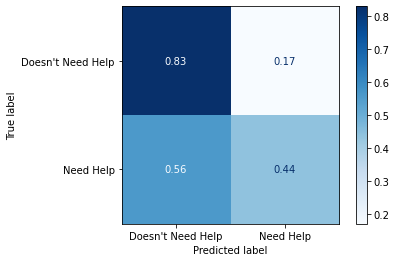

In [96]:
evaluate(new_cb,X_train,y_train,X_val,y_val)

Accuracy Score:
Train - 0.7081627081627082
Test - 0.7002457002457002
  
Precision Score:
Train - 0.7381316998468607
Test - 0.6352357320099256
  
Recall Score: 
Train - 0.3492753623188406
Test - 0.4288107202680067
  
F1 Score: 
Train - 0.4741760944417117
Test - 0.512
  
ROC_AUC: 
Train - 0.6371869584261746
Test - 0.6431153504346824
  
  
Confusion matrix for test data


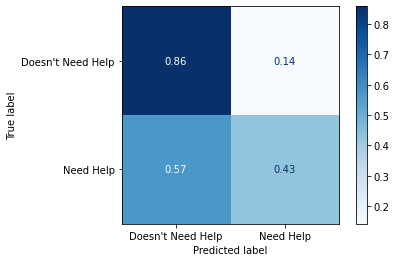

In [97]:
evaluate(new_cb,X_train,y_train,X_test,y_test)

#### Gridsearch CatBoost

In [98]:
cb_param={'learning_rate':[0.01,0.1,0.5],
          'depth':[3,7,10],
          'l2_leaf_reg':[1,5,9]}

In [99]:
gridsearch_cb=CatBoostClassifier(random_state=42)
result=gridsearch_cb.grid_search(cb_param, data, calc_cv_statistics=True, search_by_train_test_split=True, verbose=False)

0:	learn: 0.6914725	test: 0.6913505	best: 0.6913505 (0)	total: 54.7ms	remaining: 54.6s
1:	learn: 0.6898433	test: 0.6895770	best: 0.6895770 (1)	total: 111ms	remaining: 55.4s
2:	learn: 0.6880525	test: 0.6874912	best: 0.6874912 (2)	total: 154ms	remaining: 51.2s
3:	learn: 0.6864710	test: 0.6857829	best: 0.6857829 (3)	total: 215ms	remaining: 53.6s
4:	learn: 0.6852492	test: 0.6844267	best: 0.6844267 (4)	total: 258ms	remaining: 51.4s
5:	learn: 0.6836794	test: 0.6826548	best: 0.6826548 (5)	total: 314ms	remaining: 52s
6:	learn: 0.6822122	test: 0.6812262	best: 0.6812262 (6)	total: 357ms	remaining: 50.6s
7:	learn: 0.6807254	test: 0.6796172	best: 0.6796172 (7)	total: 405ms	remaining: 50.2s
8:	learn: 0.6793802	test: 0.6782277	best: 0.6782277 (8)	total: 453ms	remaining: 49.9s
9:	learn: 0.6779688	test: 0.6766223	best: 0.6766223 (9)	total: 497ms	remaining: 49.2s
10:	learn: 0.6763269	test: 0.6748033	best: 0.6748033 (10)	total: 548ms	remaining: 49.3s
11:	learn: 0.6749680	test: 0.6732349	best: 0.6732349 

94:	learn: 0.6159429	test: 0.6092781	best: 0.6092781 (94)	total: 4.01s	remaining: 38.2s
95:	learn: 0.6155205	test: 0.6088609	best: 0.6088609 (95)	total: 4.04s	remaining: 38.1s
96:	learn: 0.6151438	test: 0.6083876	best: 0.6083876 (96)	total: 4.08s	remaining: 38s
97:	learn: 0.6147943	test: 0.6080433	best: 0.6080433 (97)	total: 4.12s	remaining: 37.9s
98:	learn: 0.6143751	test: 0.6075829	best: 0.6075829 (98)	total: 4.15s	remaining: 37.8s
99:	learn: 0.6140531	test: 0.6073253	best: 0.6073253 (99)	total: 4.2s	remaining: 37.8s
100:	learn: 0.6138300	test: 0.6070393	best: 0.6070393 (100)	total: 4.22s	remaining: 37.6s
101:	learn: 0.6135775	test: 0.6067634	best: 0.6067634 (101)	total: 4.26s	remaining: 37.5s
102:	learn: 0.6132857	test: 0.6064458	best: 0.6064458 (102)	total: 4.29s	remaining: 37.4s
103:	learn: 0.6129901	test: 0.6061118	best: 0.6061118 (103)	total: 4.33s	remaining: 37.3s
104:	learn: 0.6126711	test: 0.6058081	best: 0.6058081 (104)	total: 4.37s	remaining: 37.2s
105:	learn: 0.6123069	tes

191:	learn: 0.5933519	test: 0.5862765	best: 0.5862765 (191)	total: 7.82s	remaining: 32.9s
192:	learn: 0.5931948	test: 0.5861252	best: 0.5861252 (192)	total: 7.85s	remaining: 32.8s
193:	learn: 0.5930610	test: 0.5859726	best: 0.5859726 (193)	total: 7.89s	remaining: 32.8s
194:	learn: 0.5929181	test: 0.5859338	best: 0.5859338 (194)	total: 7.93s	remaining: 32.7s
195:	learn: 0.5928058	test: 0.5858254	best: 0.5858254 (195)	total: 7.97s	remaining: 32.7s
196:	learn: 0.5926628	test: 0.5856851	best: 0.5856851 (196)	total: 8s	remaining: 32.6s
197:	learn: 0.5925221	test: 0.5855360	best: 0.5855360 (197)	total: 8.04s	remaining: 32.6s
198:	learn: 0.5923762	test: 0.5853631	best: 0.5853631 (198)	total: 8.08s	remaining: 32.5s
199:	learn: 0.5921020	test: 0.5851279	best: 0.5851279 (199)	total: 8.12s	remaining: 32.5s
200:	learn: 0.5919342	test: 0.5849996	best: 0.5849996 (200)	total: 8.15s	remaining: 32.4s
201:	learn: 0.5918148	test: 0.5848998	best: 0.5848998 (201)	total: 8.2s	remaining: 32.4s
202:	learn: 0.

283:	learn: 0.5815095	test: 0.5760169	best: 0.5760169 (283)	total: 12.5s	remaining: 31.6s
284:	learn: 0.5813735	test: 0.5758274	best: 0.5758274 (284)	total: 12.6s	remaining: 31.6s
285:	learn: 0.5811757	test: 0.5755857	best: 0.5755857 (285)	total: 12.6s	remaining: 31.6s
286:	learn: 0.5810369	test: 0.5754954	best: 0.5754954 (286)	total: 12.7s	remaining: 31.5s
287:	learn: 0.5809117	test: 0.5753845	best: 0.5753845 (287)	total: 12.7s	remaining: 31.5s
288:	learn: 0.5807880	test: 0.5752793	best: 0.5752793 (288)	total: 12.9s	remaining: 31.7s
289:	learn: 0.5806197	test: 0.5751726	best: 0.5751726 (289)	total: 13s	remaining: 31.8s
290:	learn: 0.5805231	test: 0.5750964	best: 0.5750964 (290)	total: 13.1s	remaining: 31.8s
291:	learn: 0.5804490	test: 0.5750264	best: 0.5750264 (291)	total: 13.1s	remaining: 31.8s
292:	learn: 0.5802976	test: 0.5749101	best: 0.5749101 (292)	total: 13.2s	remaining: 31.8s
293:	learn: 0.5802161	test: 0.5748565	best: 0.5748565 (293)	total: 13.3s	remaining: 32s
294:	learn: 0.

376:	learn: 0.5731456	test: 0.5691810	best: 0.5691810 (376)	total: 18s	remaining: 29.7s
377:	learn: 0.5730708	test: 0.5691605	best: 0.5691605 (377)	total: 18s	remaining: 29.6s
378:	learn: 0.5730276	test: 0.5691311	best: 0.5691311 (378)	total: 18.1s	remaining: 29.6s
379:	learn: 0.5729048	test: 0.5690704	best: 0.5690704 (379)	total: 18.1s	remaining: 29.6s
380:	learn: 0.5728636	test: 0.5690558	best: 0.5690558 (380)	total: 18.2s	remaining: 29.5s
381:	learn: 0.5727619	test: 0.5689527	best: 0.5689527 (381)	total: 18.3s	remaining: 29.5s
382:	learn: 0.5726819	test: 0.5688887	best: 0.5688887 (382)	total: 18.3s	remaining: 29.5s
383:	learn: 0.5726144	test: 0.5689320	best: 0.5688887 (382)	total: 18.4s	remaining: 29.5s
384:	learn: 0.5725613	test: 0.5689235	best: 0.5688887 (382)	total: 18.5s	remaining: 29.5s
385:	learn: 0.5724514	test: 0.5688662	best: 0.5688662 (385)	total: 18.5s	remaining: 29.4s
386:	learn: 0.5724298	test: 0.5688610	best: 0.5688610 (386)	total: 18.6s	remaining: 29.4s
387:	learn: 0.

471:	learn: 0.5668799	test: 0.5655427	best: 0.5655427 (471)	total: 23.2s	remaining: 25.9s
472:	learn: 0.5668627	test: 0.5655423	best: 0.5655423 (472)	total: 23.2s	remaining: 25.8s
473:	learn: 0.5668420	test: 0.5655251	best: 0.5655251 (473)	total: 23.2s	remaining: 25.8s
474:	learn: 0.5668091	test: 0.5654987	best: 0.5654987 (474)	total: 23.3s	remaining: 25.7s
475:	learn: 0.5667232	test: 0.5653932	best: 0.5653932 (475)	total: 23.3s	remaining: 25.7s
476:	learn: 0.5666784	test: 0.5653919	best: 0.5653919 (476)	total: 23.4s	remaining: 25.6s
477:	learn: 0.5666657	test: 0.5653902	best: 0.5653902 (477)	total: 23.4s	remaining: 25.6s
478:	learn: 0.5666459	test: 0.5654066	best: 0.5653902 (477)	total: 23.5s	remaining: 25.5s
479:	learn: 0.5666182	test: 0.5653887	best: 0.5653887 (479)	total: 23.5s	remaining: 25.5s
480:	learn: 0.5665932	test: 0.5653445	best: 0.5653445 (480)	total: 23.6s	remaining: 25.4s
481:	learn: 0.5665614	test: 0.5653090	best: 0.5653090 (481)	total: 23.6s	remaining: 25.4s
482:	learn

567:	learn: 0.5610976	test: 0.5627523	best: 0.5627523 (567)	total: 27.8s	remaining: 21.2s
568:	learn: 0.5610605	test: 0.5627285	best: 0.5627285 (568)	total: 27.9s	remaining: 21.1s
569:	learn: 0.5610439	test: 0.5627238	best: 0.5627238 (569)	total: 27.9s	remaining: 21.1s
570:	learn: 0.5610041	test: 0.5626963	best: 0.5626963 (570)	total: 28s	remaining: 21s
571:	learn: 0.5608860	test: 0.5626073	best: 0.5626073 (571)	total: 28s	remaining: 21s
572:	learn: 0.5608408	test: 0.5625941	best: 0.5625941 (572)	total: 28.1s	remaining: 20.9s
573:	learn: 0.5607977	test: 0.5625771	best: 0.5625771 (573)	total: 28.1s	remaining: 20.9s
574:	learn: 0.5607643	test: 0.5625795	best: 0.5625771 (573)	total: 28.1s	remaining: 20.8s
575:	learn: 0.5606836	test: 0.5625261	best: 0.5625261 (575)	total: 28.2s	remaining: 20.8s
576:	learn: 0.5606544	test: 0.5625122	best: 0.5625122 (576)	total: 28.2s	remaining: 20.7s
577:	learn: 0.5606055	test: 0.5624042	best: 0.5624042 (577)	total: 28.3s	remaining: 20.7s
578:	learn: 0.5605

662:	learn: 0.5562160	test: 0.5599115	best: 0.5599115 (662)	total: 32.2s	remaining: 16.4s
663:	learn: 0.5561506	test: 0.5598460	best: 0.5598460 (663)	total: 32.2s	remaining: 16.3s
664:	learn: 0.5561168	test: 0.5598305	best: 0.5598305 (664)	total: 32.3s	remaining: 16.3s
665:	learn: 0.5560769	test: 0.5598515	best: 0.5598305 (664)	total: 32.3s	remaining: 16.2s
666:	learn: 0.5560168	test: 0.5598055	best: 0.5598055 (666)	total: 32.3s	remaining: 16.1s
667:	learn: 0.5559899	test: 0.5598084	best: 0.5598055 (666)	total: 32.4s	remaining: 16.1s
668:	learn: 0.5559559	test: 0.5597953	best: 0.5597953 (668)	total: 32.4s	remaining: 16s
669:	learn: 0.5558880	test: 0.5596743	best: 0.5596743 (669)	total: 32.5s	remaining: 16s
670:	learn: 0.5558611	test: 0.5596751	best: 0.5596743 (669)	total: 32.5s	remaining: 15.9s
671:	learn: 0.5558426	test: 0.5596749	best: 0.5596743 (669)	total: 32.6s	remaining: 15.9s
672:	learn: 0.5557822	test: 0.5596524	best: 0.5596524 (672)	total: 32.6s	remaining: 15.8s
673:	learn: 0.

757:	learn: 0.5520406	test: 0.5578597	best: 0.5578290 (756)	total: 36.5s	remaining: 11.6s
758:	learn: 0.5519682	test: 0.5578089	best: 0.5578089 (758)	total: 36.5s	remaining: 11.6s
759:	learn: 0.5519396	test: 0.5578011	best: 0.5578011 (759)	total: 36.6s	remaining: 11.5s
760:	learn: 0.5519154	test: 0.5577833	best: 0.5577833 (760)	total: 36.6s	remaining: 11.5s
761:	learn: 0.5518500	test: 0.5577766	best: 0.5577766 (761)	total: 36.7s	remaining: 11.4s
762:	learn: 0.5518210	test: 0.5577478	best: 0.5577478 (762)	total: 36.7s	remaining: 11.4s
763:	learn: 0.5517687	test: 0.5577516	best: 0.5577478 (762)	total: 36.7s	remaining: 11.3s
764:	learn: 0.5517382	test: 0.5577319	best: 0.5577319 (764)	total: 36.8s	remaining: 11.3s
765:	learn: 0.5516549	test: 0.5576930	best: 0.5576930 (765)	total: 36.8s	remaining: 11.3s
766:	learn: 0.5515658	test: 0.5576583	best: 0.5576583 (766)	total: 36.9s	remaining: 11.2s
767:	learn: 0.5515110	test: 0.5576611	best: 0.5576583 (766)	total: 36.9s	remaining: 11.2s
768:	learn

850:	learn: 0.5478186	test: 0.5562821	best: 0.5562726 (848)	total: 40.7s	remaining: 7.12s
851:	learn: 0.5478046	test: 0.5562802	best: 0.5562726 (848)	total: 40.7s	remaining: 7.08s
852:	learn: 0.5477671	test: 0.5562198	best: 0.5562198 (852)	total: 40.8s	remaining: 7.03s
853:	learn: 0.5477179	test: 0.5562131	best: 0.5562131 (853)	total: 40.8s	remaining: 6.98s
854:	learn: 0.5476107	test: 0.5561638	best: 0.5561638 (854)	total: 40.9s	remaining: 6.93s
855:	learn: 0.5474791	test: 0.5560992	best: 0.5560992 (855)	total: 40.9s	remaining: 6.88s
856:	learn: 0.5474464	test: 0.5560853	best: 0.5560853 (856)	total: 41s	remaining: 6.83s
857:	learn: 0.5474022	test: 0.5560832	best: 0.5560832 (857)	total: 41s	remaining: 6.79s
858:	learn: 0.5473713	test: 0.5560722	best: 0.5560722 (858)	total: 41s	remaining: 6.74s
859:	learn: 0.5473335	test: 0.5560315	best: 0.5560315 (859)	total: 41.1s	remaining: 6.69s
860:	learn: 0.5472800	test: 0.5560090	best: 0.5560090 (860)	total: 41.1s	remaining: 6.64s
861:	learn: 0.54

944:	learn: 0.5431936	test: 0.5545639	best: 0.5545639 (944)	total: 45s	remaining: 2.62s
945:	learn: 0.5431312	test: 0.5545697	best: 0.5545639 (944)	total: 45s	remaining: 2.57s
946:	learn: 0.5430975	test: 0.5545848	best: 0.5545639 (944)	total: 45.1s	remaining: 2.52s
947:	learn: 0.5430747	test: 0.5545813	best: 0.5545639 (944)	total: 45.1s	remaining: 2.47s
948:	learn: 0.5430468	test: 0.5545778	best: 0.5545639 (944)	total: 45.1s	remaining: 2.43s
949:	learn: 0.5430413	test: 0.5545693	best: 0.5545639 (944)	total: 45.2s	remaining: 2.38s
950:	learn: 0.5429957	test: 0.5544973	best: 0.5544973 (950)	total: 45.2s	remaining: 2.33s
951:	learn: 0.5429497	test: 0.5544744	best: 0.5544744 (951)	total: 45.3s	remaining: 2.28s
952:	learn: 0.5428779	test: 0.5544786	best: 0.5544744 (951)	total: 45.3s	remaining: 2.23s
953:	learn: 0.5428409	test: 0.5544790	best: 0.5544744 (951)	total: 45.4s	remaining: 2.19s
954:	learn: 0.5427327	test: 0.5545075	best: 0.5544744 (951)	total: 45.4s	remaining: 2.14s
955:	learn: 0.

36:	learn: 0.5748161	test: 0.5676503	best: 0.5675720 (35)	total: 2.15s	remaining: 55.9s
37:	learn: 0.5741457	test: 0.5671611	best: 0.5671611 (37)	total: 2.25s	remaining: 56.9s
38:	learn: 0.5735377	test: 0.5668603	best: 0.5668603 (38)	total: 2.31s	remaining: 56.8s
39:	learn: 0.5731608	test: 0.5664900	best: 0.5664900 (39)	total: 2.36s	remaining: 56.7s
40:	learn: 0.5723716	test: 0.5665096	best: 0.5664900 (39)	total: 2.42s	remaining: 56.7s
41:	learn: 0.5718806	test: 0.5665138	best: 0.5664900 (39)	total: 2.48s	remaining: 56.5s
42:	learn: 0.5715264	test: 0.5665638	best: 0.5664900 (39)	total: 2.54s	remaining: 56.5s
43:	learn: 0.5710619	test: 0.5659540	best: 0.5659540 (43)	total: 2.59s	remaining: 56.4s
44:	learn: 0.5705590	test: 0.5653302	best: 0.5653302 (44)	total: 2.65s	remaining: 56.3s
45:	learn: 0.5700397	test: 0.5644863	best: 0.5644863 (45)	total: 2.71s	remaining: 56.1s
46:	learn: 0.5694954	test: 0.5641476	best: 0.5641476 (46)	total: 2.77s	remaining: 56.1s
47:	learn: 0.5688626	test: 0.564

131:	learn: 0.5304541	test: 0.5508108	best: 0.5506091 (126)	total: 7.67s	remaining: 50.4s
132:	learn: 0.5301886	test: 0.5507863	best: 0.5506091 (126)	total: 7.73s	remaining: 50.4s
133:	learn: 0.5296792	test: 0.5505672	best: 0.5505672 (133)	total: 7.78s	remaining: 50.3s
134:	learn: 0.5294947	test: 0.5505046	best: 0.5505046 (134)	total: 7.84s	remaining: 50.2s
135:	learn: 0.5284277	test: 0.5506836	best: 0.5505046 (134)	total: 7.89s	remaining: 50.2s
136:	learn: 0.5281933	test: 0.5505049	best: 0.5505046 (134)	total: 7.95s	remaining: 50.1s
137:	learn: 0.5268009	test: 0.5497218	best: 0.5497218 (137)	total: 8s	remaining: 50s
138:	learn: 0.5266007	test: 0.5494105	best: 0.5494105 (138)	total: 8.05s	remaining: 49.9s
139:	learn: 0.5264583	test: 0.5494559	best: 0.5494105 (138)	total: 8.11s	remaining: 49.8s
140:	learn: 0.5258152	test: 0.5492910	best: 0.5492910 (140)	total: 8.17s	remaining: 49.8s
141:	learn: 0.5254197	test: 0.5490857	best: 0.5490857 (141)	total: 8.22s	remaining: 49.7s
142:	learn: 0.5

223:	learn: 0.4979625	test: 0.5472183	best: 0.5467822 (186)	total: 13.1s	remaining: 45.5s
224:	learn: 0.4975378	test: 0.5473806	best: 0.5467822 (186)	total: 13.2s	remaining: 45.4s
225:	learn: 0.4974565	test: 0.5473870	best: 0.5467822 (186)	total: 13.2s	remaining: 45.4s
226:	learn: 0.4973853	test: 0.5474261	best: 0.5467822 (186)	total: 13.3s	remaining: 45.3s
227:	learn: 0.4971735	test: 0.5475574	best: 0.5467822 (186)	total: 13.3s	remaining: 45.2s
228:	learn: 0.4968072	test: 0.5478601	best: 0.5467822 (186)	total: 13.4s	remaining: 45.1s
229:	learn: 0.4965672	test: 0.5477145	best: 0.5467822 (186)	total: 13.4s	remaining: 45s
230:	learn: 0.4964389	test: 0.5475210	best: 0.5467822 (186)	total: 13.5s	remaining: 44.9s
231:	learn: 0.4958485	test: 0.5471917	best: 0.5467822 (186)	total: 13.6s	remaining: 44.9s
232:	learn: 0.4958429	test: 0.5471901	best: 0.5467822 (186)	total: 13.6s	remaining: 44.8s
233:	learn: 0.4956353	test: 0.5471869	best: 0.5467822 (186)	total: 13.7s	remaining: 44.8s
234:	learn: 

315:	learn: 0.4710403	test: 0.5443609	best: 0.5439514 (308)	total: 17.4s	remaining: 37.7s
316:	learn: 0.4709038	test: 0.5443807	best: 0.5439514 (308)	total: 17.5s	remaining: 37.6s
317:	learn: 0.4704111	test: 0.5445762	best: 0.5439514 (308)	total: 17.5s	remaining: 37.5s
318:	learn: 0.4697983	test: 0.5443698	best: 0.5439514 (308)	total: 17.5s	remaining: 37.4s
319:	learn: 0.4695691	test: 0.5444883	best: 0.5439514 (308)	total: 17.6s	remaining: 37.3s
320:	learn: 0.4692127	test: 0.5445844	best: 0.5439514 (308)	total: 17.6s	remaining: 37.3s
321:	learn: 0.4690602	test: 0.5446670	best: 0.5439514 (308)	total: 17.6s	remaining: 37.2s
322:	learn: 0.4688002	test: 0.5443276	best: 0.5439514 (308)	total: 17.7s	remaining: 37.1s
323:	learn: 0.4684491	test: 0.5444877	best: 0.5439514 (308)	total: 17.7s	remaining: 37s
324:	learn: 0.4683258	test: 0.5445115	best: 0.5439514 (308)	total: 17.8s	remaining: 37s
325:	learn: 0.4680350	test: 0.5444633	best: 0.5439514 (308)	total: 17.8s	remaining: 36.9s
326:	learn: 0.

407:	learn: 0.4469856	test: 0.5440539	best: 0.5432307 (398)	total: 21.6s	remaining: 31.3s
408:	learn: 0.4468224	test: 0.5440826	best: 0.5432307 (398)	total: 21.6s	remaining: 31.2s
409:	learn: 0.4465539	test: 0.5436857	best: 0.5432307 (398)	total: 21.7s	remaining: 31.2s
410:	learn: 0.4465195	test: 0.5437108	best: 0.5432307 (398)	total: 21.7s	remaining: 31.1s
411:	learn: 0.4461858	test: 0.5437771	best: 0.5432307 (398)	total: 21.8s	remaining: 31.1s
412:	learn: 0.4461186	test: 0.5438254	best: 0.5432307 (398)	total: 21.8s	remaining: 31s
413:	learn: 0.4458442	test: 0.5438572	best: 0.5432307 (398)	total: 21.9s	remaining: 30.9s
414:	learn: 0.4457534	test: 0.5437354	best: 0.5432307 (398)	total: 21.9s	remaining: 30.9s
415:	learn: 0.4456405	test: 0.5436799	best: 0.5432307 (398)	total: 22s	remaining: 30.8s
416:	learn: 0.4453005	test: 0.5434438	best: 0.5432307 (398)	total: 22s	remaining: 30.8s
417:	learn: 0.4449687	test: 0.5436223	best: 0.5432307 (398)	total: 22.1s	remaining: 30.7s
418:	learn: 0.44

504:	learn: 0.4278444	test: 0.5432107	best: 0.5430119 (499)	total: 25.6s	remaining: 25.1s
505:	learn: 0.4275301	test: 0.5433493	best: 0.5430119 (499)	total: 25.6s	remaining: 25s
506:	learn: 0.4274388	test: 0.5433483	best: 0.5430119 (499)	total: 25.7s	remaining: 25s
507:	learn: 0.4273378	test: 0.5433569	best: 0.5430119 (499)	total: 25.7s	remaining: 24.9s
508:	learn: 0.4270337	test: 0.5434220	best: 0.5430119 (499)	total: 25.7s	remaining: 24.8s
509:	learn: 0.4267232	test: 0.5431802	best: 0.5430119 (499)	total: 25.8s	remaining: 24.8s
510:	learn: 0.4264510	test: 0.5432737	best: 0.5430119 (499)	total: 25.8s	remaining: 24.7s
511:	learn: 0.4261520	test: 0.5434436	best: 0.5430119 (499)	total: 25.8s	remaining: 24.6s
512:	learn: 0.4261119	test: 0.5434251	best: 0.5430119 (499)	total: 25.9s	remaining: 24.6s
513:	learn: 0.4259683	test: 0.5433270	best: 0.5430119 (499)	total: 25.9s	remaining: 24.5s
514:	learn: 0.4258985	test: 0.5433817	best: 0.5430119 (499)	total: 26s	remaining: 24.5s
515:	learn: 0.42

597:	learn: 0.4093452	test: 0.5434508	best: 0.5427797 (527)	total: 29.4s	remaining: 19.8s
598:	learn: 0.4091781	test: 0.5436731	best: 0.5427797 (527)	total: 29.5s	remaining: 19.7s
599:	learn: 0.4087930	test: 0.5437114	best: 0.5427797 (527)	total: 29.5s	remaining: 19.7s
600:	learn: 0.4087293	test: 0.5436860	best: 0.5427797 (527)	total: 29.6s	remaining: 19.6s
601:	learn: 0.4086219	test: 0.5438348	best: 0.5427797 (527)	total: 29.6s	remaining: 19.6s
602:	learn: 0.4085380	test: 0.5440112	best: 0.5427797 (527)	total: 29.7s	remaining: 19.5s
603:	learn: 0.4084393	test: 0.5439489	best: 0.5427797 (527)	total: 29.7s	remaining: 19.5s
604:	learn: 0.4081882	test: 0.5439638	best: 0.5427797 (527)	total: 29.7s	remaining: 19.4s
605:	learn: 0.4080268	test: 0.5439920	best: 0.5427797 (527)	total: 29.8s	remaining: 19.4s
606:	learn: 0.4080152	test: 0.5439929	best: 0.5427797 (527)	total: 29.8s	remaining: 19.3s
607:	learn: 0.4079298	test: 0.5440995	best: 0.5427797 (527)	total: 29.9s	remaining: 19.2s
608:	learn

689:	learn: 0.3925054	test: 0.5439159	best: 0.5427797 (527)	total: 33.3s	remaining: 15s
690:	learn: 0.3923797	test: 0.5436044	best: 0.5427797 (527)	total: 33.3s	remaining: 14.9s
691:	learn: 0.3923500	test: 0.5435768	best: 0.5427797 (527)	total: 33.4s	remaining: 14.8s
692:	learn: 0.3919803	test: 0.5436131	best: 0.5427797 (527)	total: 33.4s	remaining: 14.8s
693:	learn: 0.3918290	test: 0.5437852	best: 0.5427797 (527)	total: 33.4s	remaining: 14.7s
694:	learn: 0.3917680	test: 0.5437710	best: 0.5427797 (527)	total: 33.5s	remaining: 14.7s
695:	learn: 0.3916573	test: 0.5437693	best: 0.5427797 (527)	total: 33.5s	remaining: 14.6s
696:	learn: 0.3915319	test: 0.5437751	best: 0.5427797 (527)	total: 33.6s	remaining: 14.6s
697:	learn: 0.3914136	test: 0.5436857	best: 0.5427797 (527)	total: 33.6s	remaining: 14.5s
698:	learn: 0.3911302	test: 0.5434200	best: 0.5427797 (527)	total: 33.7s	remaining: 14.5s
699:	learn: 0.3909974	test: 0.5433938	best: 0.5427797 (527)	total: 33.7s	remaining: 14.4s
700:	learn: 

783:	learn: 0.3759522	test: 0.5444296	best: 0.5427797 (527)	total: 37.8s	remaining: 10.4s
784:	learn: 0.3757607	test: 0.5444439	best: 0.5427797 (527)	total: 37.8s	remaining: 10.4s
785:	learn: 0.3756793	test: 0.5444494	best: 0.5427797 (527)	total: 37.9s	remaining: 10.3s
786:	learn: 0.3755573	test: 0.5445104	best: 0.5427797 (527)	total: 38s	remaining: 10.3s
787:	learn: 0.3753904	test: 0.5442430	best: 0.5427797 (527)	total: 38s	remaining: 10.2s
788:	learn: 0.3752379	test: 0.5444161	best: 0.5427797 (527)	total: 38.1s	remaining: 10.2s
789:	learn: 0.3749974	test: 0.5444917	best: 0.5427797 (527)	total: 38.1s	remaining: 10.1s
790:	learn: 0.3748623	test: 0.5444797	best: 0.5427797 (527)	total: 38.2s	remaining: 10.1s
791:	learn: 0.3747522	test: 0.5446284	best: 0.5427797 (527)	total: 38.2s	remaining: 10s
792:	learn: 0.3745936	test: 0.5449102	best: 0.5427797 (527)	total: 38.3s	remaining: 9.98s
793:	learn: 0.3744919	test: 0.5447847	best: 0.5427797 (527)	total: 38.3s	remaining: 9.94s
794:	learn: 0.37

876:	learn: 0.3600631	test: 0.5471746	best: 0.5427797 (527)	total: 42.3s	remaining: 5.93s
877:	learn: 0.3598025	test: 0.5472480	best: 0.5427797 (527)	total: 42.3s	remaining: 5.88s
878:	learn: 0.3597785	test: 0.5472289	best: 0.5427797 (527)	total: 42.4s	remaining: 5.83s
879:	learn: 0.3597189	test: 0.5472411	best: 0.5427797 (527)	total: 42.4s	remaining: 5.78s
880:	learn: 0.3596125	test: 0.5472385	best: 0.5427797 (527)	total: 42.5s	remaining: 5.74s
881:	learn: 0.3594942	test: 0.5472367	best: 0.5427797 (527)	total: 42.5s	remaining: 5.69s
882:	learn: 0.3592841	test: 0.5472504	best: 0.5427797 (527)	total: 42.6s	remaining: 5.64s
883:	learn: 0.3592275	test: 0.5472706	best: 0.5427797 (527)	total: 42.6s	remaining: 5.59s
884:	learn: 0.3590755	test: 0.5472683	best: 0.5427797 (527)	total: 42.6s	remaining: 5.54s
885:	learn: 0.3585539	test: 0.5468220	best: 0.5427797 (527)	total: 42.7s	remaining: 5.49s
886:	learn: 0.3584352	test: 0.5465914	best: 0.5427797 (527)	total: 42.7s	remaining: 5.44s
887:	learn

971:	learn: 0.3461327	test: 0.5486223	best: 0.5427797 (527)	total: 46.3s	remaining: 1.33s
972:	learn: 0.3460757	test: 0.5483325	best: 0.5427797 (527)	total: 46.4s	remaining: 1.29s
973:	learn: 0.3459333	test: 0.5484261	best: 0.5427797 (527)	total: 46.4s	remaining: 1.24s
974:	learn: 0.3456918	test: 0.5482551	best: 0.5427797 (527)	total: 46.4s	remaining: 1.19s
975:	learn: 0.3456165	test: 0.5481475	best: 0.5427797 (527)	total: 46.5s	remaining: 1.14s
976:	learn: 0.3455676	test: 0.5481789	best: 0.5427797 (527)	total: 46.5s	remaining: 1.09s
977:	learn: 0.3452681	test: 0.5483703	best: 0.5427797 (527)	total: 46.6s	remaining: 1.05s
978:	learn: 0.3452602	test: 0.5484101	best: 0.5427797 (527)	total: 46.6s	remaining: 1000ms
979:	learn: 0.3451621	test: 0.5484424	best: 0.5427797 (527)	total: 46.7s	remaining: 952ms
980:	learn: 0.3450973	test: 0.5484368	best: 0.5427797 (527)	total: 46.7s	remaining: 904ms
981:	learn: 0.3450186	test: 0.5484228	best: 0.5427797 (527)	total: 46.7s	remaining: 857ms
982:	lear

65:	learn: 0.4916469	test: 0.5643754	best: 0.5579658 (41)	total: 2.73s	remaining: 38.6s
66:	learn: 0.4906572	test: 0.5655533	best: 0.5579658 (41)	total: 2.76s	remaining: 38.5s
67:	learn: 0.4900963	test: 0.5654916	best: 0.5579658 (41)	total: 2.8s	remaining: 38.4s
68:	learn: 0.4879662	test: 0.5654297	best: 0.5579658 (41)	total: 2.84s	remaining: 38.3s
69:	learn: 0.4877848	test: 0.5655041	best: 0.5579658 (41)	total: 2.88s	remaining: 38.3s
70:	learn: 0.4873261	test: 0.5652641	best: 0.5579658 (41)	total: 2.92s	remaining: 38.2s
71:	learn: 0.4856227	test: 0.5615631	best: 0.5579658 (41)	total: 2.96s	remaining: 38.1s
72:	learn: 0.4846146	test: 0.5619204	best: 0.5579658 (41)	total: 3s	remaining: 38.1s
73:	learn: 0.4843475	test: 0.5620455	best: 0.5579658 (41)	total: 3.04s	remaining: 38s
74:	learn: 0.4827959	test: 0.5622771	best: 0.5579658 (41)	total: 3.07s	remaining: 37.9s
75:	learn: 0.4811541	test: 0.5618064	best: 0.5579658 (41)	total: 3.12s	remaining: 37.9s
76:	learn: 0.4807841	test: 0.5617447	b

159:	learn: 0.4047649	test: 0.5806690	best: 0.5579658 (41)	total: 6.6s	remaining: 34.7s
160:	learn: 0.4045216	test: 0.5808317	best: 0.5579658 (41)	total: 6.64s	remaining: 34.6s
161:	learn: 0.4040843	test: 0.5809460	best: 0.5579658 (41)	total: 6.68s	remaining: 34.5s
162:	learn: 0.4036112	test: 0.5804105	best: 0.5579658 (41)	total: 6.71s	remaining: 34.5s
163:	learn: 0.4033698	test: 0.5803884	best: 0.5579658 (41)	total: 6.76s	remaining: 34.4s
164:	learn: 0.4023379	test: 0.5805358	best: 0.5579658 (41)	total: 6.8s	remaining: 34.4s
165:	learn: 0.4018002	test: 0.5798041	best: 0.5579658 (41)	total: 6.84s	remaining: 34.4s
166:	learn: 0.4011773	test: 0.5797301	best: 0.5579658 (41)	total: 6.88s	remaining: 34.3s
167:	learn: 0.3992065	test: 0.5801321	best: 0.5579658 (41)	total: 6.92s	remaining: 34.3s
168:	learn: 0.3987421	test: 0.5805125	best: 0.5579658 (41)	total: 6.96s	remaining: 34.2s
169:	learn: 0.3984240	test: 0.5805419	best: 0.5579658 (41)	total: 7s	remaining: 34.2s
170:	learn: 0.3980676	test

252:	learn: 0.3457229	test: 0.5919778	best: 0.5579658 (41)	total: 10.4s	remaining: 30.6s
253:	learn: 0.3452446	test: 0.5932421	best: 0.5579658 (41)	total: 10.4s	remaining: 30.6s
254:	learn: 0.3437479	test: 0.5941480	best: 0.5579658 (41)	total: 10.4s	remaining: 30.5s
255:	learn: 0.3430818	test: 0.5938147	best: 0.5579658 (41)	total: 10.5s	remaining: 30.5s
256:	learn: 0.3429393	test: 0.5935526	best: 0.5579658 (41)	total: 10.5s	remaining: 30.4s
257:	learn: 0.3411313	test: 0.5939034	best: 0.5579658 (41)	total: 10.6s	remaining: 30.4s
258:	learn: 0.3408907	test: 0.5938976	best: 0.5579658 (41)	total: 10.6s	remaining: 30.3s
259:	learn: 0.3395055	test: 0.5931686	best: 0.5579658 (41)	total: 10.6s	remaining: 30.3s
260:	learn: 0.3386681	test: 0.5927852	best: 0.5579658 (41)	total: 10.7s	remaining: 30.2s
261:	learn: 0.3383403	test: 0.5926804	best: 0.5579658 (41)	total: 10.7s	remaining: 30.2s
262:	learn: 0.3378517	test: 0.5931165	best: 0.5579658 (41)	total: 10.8s	remaining: 30.1s
263:	learn: 0.3377471

345:	learn: 0.2944806	test: 0.6062719	best: 0.5579658 (41)	total: 14.5s	remaining: 27.5s
346:	learn: 0.2934104	test: 0.6058054	best: 0.5579658 (41)	total: 14.6s	remaining: 27.5s
347:	learn: 0.2933334	test: 0.6061498	best: 0.5579658 (41)	total: 14.7s	remaining: 27.5s
348:	learn: 0.2925239	test: 0.6061521	best: 0.5579658 (41)	total: 14.7s	remaining: 27.4s
349:	learn: 0.2921793	test: 0.6059539	best: 0.5579658 (41)	total: 14.8s	remaining: 27.4s
350:	learn: 0.2920996	test: 0.6061408	best: 0.5579658 (41)	total: 14.8s	remaining: 27.4s
351:	learn: 0.2916361	test: 0.6067532	best: 0.5579658 (41)	total: 14.9s	remaining: 27.4s
352:	learn: 0.2915920	test: 0.6067601	best: 0.5579658 (41)	total: 14.9s	remaining: 27.4s
353:	learn: 0.2911622	test: 0.6067415	best: 0.5579658 (41)	total: 15s	remaining: 27.3s
354:	learn: 0.2904470	test: 0.6067317	best: 0.5579658 (41)	total: 15s	remaining: 27.3s
355:	learn: 0.2888989	test: 0.6059162	best: 0.5579658 (41)	total: 15.1s	remaining: 27.3s
356:	learn: 0.2887760	tes

438:	learn: 0.2520646	test: 0.6167609	best: 0.5579658 (41)	total: 19.4s	remaining: 24.7s
439:	learn: 0.2512568	test: 0.6169554	best: 0.5579658 (41)	total: 19.4s	remaining: 24.7s
440:	learn: 0.2511389	test: 0.6167922	best: 0.5579658 (41)	total: 19.4s	remaining: 24.7s
441:	learn: 0.2506546	test: 0.6172591	best: 0.5579658 (41)	total: 19.5s	remaining: 24.6s
442:	learn: 0.2492828	test: 0.6177707	best: 0.5579658 (41)	total: 19.5s	remaining: 24.6s
443:	learn: 0.2482527	test: 0.6172576	best: 0.5579658 (41)	total: 19.6s	remaining: 24.5s
444:	learn: 0.2473155	test: 0.6200309	best: 0.5579658 (41)	total: 19.6s	remaining: 24.5s
445:	learn: 0.2469924	test: 0.6196570	best: 0.5579658 (41)	total: 19.7s	remaining: 24.5s
446:	learn: 0.2469769	test: 0.6196567	best: 0.5579658 (41)	total: 19.7s	remaining: 24.4s
447:	learn: 0.2466869	test: 0.6195620	best: 0.5579658 (41)	total: 19.8s	remaining: 24.4s
448:	learn: 0.2459427	test: 0.6199973	best: 0.5579658 (41)	total: 19.9s	remaining: 24.4s
449:	learn: 0.2457192

532:	learn: 0.2156725	test: 0.6417477	best: 0.5579658 (41)	total: 24.1s	remaining: 21.1s
533:	learn: 0.2152501	test: 0.6417538	best: 0.5579658 (41)	total: 24.2s	remaining: 21.1s
534:	learn: 0.2150296	test: 0.6422197	best: 0.5579658 (41)	total: 24.2s	remaining: 21.1s
535:	learn: 0.2149559	test: 0.6422414	best: 0.5579658 (41)	total: 24.3s	remaining: 21s
536:	learn: 0.2143707	test: 0.6420722	best: 0.5579658 (41)	total: 24.3s	remaining: 21s
537:	learn: 0.2135011	test: 0.6418164	best: 0.5579658 (41)	total: 24.4s	remaining: 20.9s
538:	learn: 0.2133404	test: 0.6420870	best: 0.5579658 (41)	total: 24.4s	remaining: 20.9s
539:	learn: 0.2130801	test: 0.6419757	best: 0.5579658 (41)	total: 24.5s	remaining: 20.9s
540:	learn: 0.2129374	test: 0.6418647	best: 0.5579658 (41)	total: 24.5s	remaining: 20.8s
541:	learn: 0.2119111	test: 0.6430792	best: 0.5579658 (41)	total: 24.6s	remaining: 20.8s
542:	learn: 0.2115732	test: 0.6438369	best: 0.5579658 (41)	total: 24.6s	remaining: 20.7s
543:	learn: 0.2109567	tes

629:	learn: 0.1843089	test: 0.6500457	best: 0.5579658 (41)	total: 28.2s	remaining: 16.6s
630:	learn: 0.1836665	test: 0.6535730	best: 0.5579658 (41)	total: 28.3s	remaining: 16.5s
631:	learn: 0.1835942	test: 0.6528600	best: 0.5579658 (41)	total: 28.3s	remaining: 16.5s
632:	learn: 0.1835524	test: 0.6532264	best: 0.5579658 (41)	total: 28.3s	remaining: 16.4s
633:	learn: 0.1832562	test: 0.6526510	best: 0.5579658 (41)	total: 28.4s	remaining: 16.4s
634:	learn: 0.1831619	test: 0.6521476	best: 0.5579658 (41)	total: 28.4s	remaining: 16.3s
635:	learn: 0.1831609	test: 0.6521500	best: 0.5579658 (41)	total: 28.5s	remaining: 16.3s
636:	learn: 0.1828536	test: 0.6526295	best: 0.5579658 (41)	total: 28.5s	remaining: 16.3s
637:	learn: 0.1826480	test: 0.6538263	best: 0.5579658 (41)	total: 28.6s	remaining: 16.2s
638:	learn: 0.1820254	test: 0.6528792	best: 0.5579658 (41)	total: 28.6s	remaining: 16.2s
639:	learn: 0.1815817	test: 0.6537031	best: 0.5579658 (41)	total: 28.7s	remaining: 16.1s
640:	learn: 0.1814021

723:	learn: 0.1622086	test: 0.6633104	best: 0.5579658 (41)	total: 32.3s	remaining: 12.3s
724:	learn: 0.1620241	test: 0.6643069	best: 0.5579658 (41)	total: 32.4s	remaining: 12.3s
725:	learn: 0.1615636	test: 0.6635472	best: 0.5579658 (41)	total: 32.4s	remaining: 12.2s
726:	learn: 0.1615467	test: 0.6636375	best: 0.5579658 (41)	total: 32.4s	remaining: 12.2s
727:	learn: 0.1614803	test: 0.6642279	best: 0.5579658 (41)	total: 32.5s	remaining: 12.1s
728:	learn: 0.1613640	test: 0.6642496	best: 0.5579658 (41)	total: 32.5s	remaining: 12.1s
729:	learn: 0.1606144	test: 0.6650122	best: 0.5579658 (41)	total: 32.6s	remaining: 12s
730:	learn: 0.1603811	test: 0.6653883	best: 0.5579658 (41)	total: 32.6s	remaining: 12s
731:	learn: 0.1600453	test: 0.6656842	best: 0.5579658 (41)	total: 32.6s	remaining: 12s
732:	learn: 0.1596175	test: 0.6647619	best: 0.5579658 (41)	total: 32.7s	remaining: 11.9s
733:	learn: 0.1596137	test: 0.6647563	best: 0.5579658 (41)	total: 32.7s	remaining: 11.9s
734:	learn: 0.1594121	test:

817:	learn: 0.1402693	test: 0.6777873	best: 0.5579658 (41)	total: 36s	remaining: 8.01s
818:	learn: 0.1398852	test: 0.6763354	best: 0.5579658 (41)	total: 36s	remaining: 7.96s
819:	learn: 0.1397706	test: 0.6761727	best: 0.5579658 (41)	total: 36.1s	remaining: 7.92s
820:	learn: 0.1394420	test: 0.6756202	best: 0.5579658 (41)	total: 36.1s	remaining: 7.87s
821:	learn: 0.1390549	test: 0.6768488	best: 0.5579658 (41)	total: 36.1s	remaining: 7.83s
822:	learn: 0.1386414	test: 0.6774206	best: 0.5579658 (41)	total: 36.2s	remaining: 7.78s
823:	learn: 0.1385553	test: 0.6774903	best: 0.5579658 (41)	total: 36.2s	remaining: 7.74s
824:	learn: 0.1384676	test: 0.6775102	best: 0.5579658 (41)	total: 36.3s	remaining: 7.69s
825:	learn: 0.1382590	test: 0.6775574	best: 0.5579658 (41)	total: 36.3s	remaining: 7.65s
826:	learn: 0.1378855	test: 0.6768696	best: 0.5579658 (41)	total: 36.3s	remaining: 7.6s
827:	learn: 0.1377177	test: 0.6768396	best: 0.5579658 (41)	total: 36.4s	remaining: 7.56s
828:	learn: 0.1375562	test

910:	learn: 0.1207715	test: 0.6884632	best: 0.5579658 (41)	total: 39.7s	remaining: 3.87s
911:	learn: 0.1203961	test: 0.6888691	best: 0.5579658 (41)	total: 39.7s	remaining: 3.83s
912:	learn: 0.1200608	test: 0.6905381	best: 0.5579658 (41)	total: 39.7s	remaining: 3.79s
913:	learn: 0.1200516	test: 0.6904116	best: 0.5579658 (41)	total: 39.8s	remaining: 3.74s
914:	learn: 0.1199487	test: 0.6903701	best: 0.5579658 (41)	total: 39.8s	remaining: 3.7s
915:	learn: 0.1197844	test: 0.6902436	best: 0.5579658 (41)	total: 39.9s	remaining: 3.66s
916:	learn: 0.1196193	test: 0.6905385	best: 0.5579658 (41)	total: 40s	remaining: 3.62s
917:	learn: 0.1195450	test: 0.6911823	best: 0.5579658 (41)	total: 40s	remaining: 3.57s
918:	learn: 0.1193064	test: 0.6914019	best: 0.5579658 (41)	total: 40s	remaining: 3.53s
919:	learn: 0.1190284	test: 0.6914206	best: 0.5579658 (41)	total: 40.1s	remaining: 3.49s
920:	learn: 0.1189415	test: 0.6911748	best: 0.5579658 (41)	total: 40.1s	remaining: 3.44s
921:	learn: 0.1183837	test: 

5:	learn: 0.6837106	test: 0.6826552	best: 0.6826552 (5)	total: 275ms	remaining: 45.6s
6:	learn: 0.6822644	test: 0.6812267	best: 0.6812267 (6)	total: 317ms	remaining: 44.9s
7:	learn: 0.6807779	test: 0.6796177	best: 0.6796177 (7)	total: 354ms	remaining: 43.8s
8:	learn: 0.6796663	test: 0.6783095	best: 0.6783095 (8)	total: 391ms	remaining: 43s
9:	learn: 0.6782008	test: 0.6766329	best: 0.6766329 (9)	total: 425ms	remaining: 42.1s
10:	learn: 0.6768353	test: 0.6750407	best: 0.6750407 (10)	total: 465ms	remaining: 41.8s
11:	learn: 0.6755789	test: 0.6736470	best: 0.6736470 (11)	total: 503ms	remaining: 41.4s
12:	learn: 0.6741479	test: 0.6720414	best: 0.6720414 (12)	total: 539ms	remaining: 41s
13:	learn: 0.6730155	test: 0.6707794	best: 0.6707794 (13)	total: 575ms	remaining: 40.5s
14:	learn: 0.6717200	test: 0.6693529	best: 0.6693529 (14)	total: 612ms	remaining: 40.2s
15:	learn: 0.6704746	test: 0.6678797	best: 0.6678797 (15)	total: 646ms	remaining: 39.8s
16:	learn: 0.6691164	test: 0.6663712	best: 0.6

100:	learn: 0.6144015	test: 0.6067597	best: 0.6067597 (100)	total: 3.87s	remaining: 34.5s
101:	learn: 0.6140557	test: 0.6064419	best: 0.6064419 (101)	total: 3.91s	remaining: 34.4s
102:	learn: 0.6136687	test: 0.6060374	best: 0.6060374 (102)	total: 3.95s	remaining: 34.4s
103:	learn: 0.6132893	test: 0.6055744	best: 0.6055744 (103)	total: 3.98s	remaining: 34.3s
104:	learn: 0.6128994	test: 0.6051602	best: 0.6051602 (104)	total: 4.02s	remaining: 34.3s
105:	learn: 0.6125086	test: 0.6047888	best: 0.6047888 (105)	total: 4.06s	remaining: 34.2s
106:	learn: 0.6121055	test: 0.6043401	best: 0.6043401 (106)	total: 4.1s	remaining: 34.2s
107:	learn: 0.6117990	test: 0.6039305	best: 0.6039305 (107)	total: 4.13s	remaining: 34.1s
108:	learn: 0.6114602	test: 0.6036202	best: 0.6036202 (108)	total: 4.17s	remaining: 34.1s
109:	learn: 0.6110924	test: 0.6032418	best: 0.6032418 (109)	total: 4.21s	remaining: 34s
110:	learn: 0.6108798	test: 0.6030371	best: 0.6030371 (110)	total: 4.24s	remaining: 34s
111:	learn: 0.6

197:	learn: 0.5926545	test: 0.5851105	best: 0.5851105 (197)	total: 7.7s	remaining: 31.2s
198:	learn: 0.5925012	test: 0.5850472	best: 0.5850472 (198)	total: 7.74s	remaining: 31.2s
199:	learn: 0.5923161	test: 0.5848814	best: 0.5848814 (199)	total: 7.78s	remaining: 31.1s
200:	learn: 0.5921583	test: 0.5846865	best: 0.5846865 (200)	total: 7.81s	remaining: 31.1s
201:	learn: 0.5920464	test: 0.5845855	best: 0.5845855 (201)	total: 7.85s	remaining: 31s
202:	learn: 0.5918955	test: 0.5844633	best: 0.5844633 (202)	total: 7.89s	remaining: 31s
203:	learn: 0.5917455	test: 0.5842400	best: 0.5842400 (203)	total: 7.93s	remaining: 30.9s
204:	learn: 0.5916187	test: 0.5841479	best: 0.5841479 (204)	total: 7.97s	remaining: 30.9s
205:	learn: 0.5915337	test: 0.5840441	best: 0.5840441 (205)	total: 8s	remaining: 30.8s
206:	learn: 0.5913692	test: 0.5838950	best: 0.5838950 (206)	total: 8.04s	remaining: 30.8s
207:	learn: 0.5911167	test: 0.5835706	best: 0.5835706 (207)	total: 8.08s	remaining: 30.8s
208:	learn: 0.5910

291:	learn: 0.5813403	test: 0.5753171	best: 0.5753171 (291)	total: 12.8s	remaining: 31.1s
292:	learn: 0.5811877	test: 0.5751852	best: 0.5751852 (292)	total: 12.9s	remaining: 31.1s
293:	learn: 0.5810870	test: 0.5750540	best: 0.5750540 (293)	total: 12.9s	remaining: 31s
294:	learn: 0.5810126	test: 0.5749490	best: 0.5749490 (294)	total: 13s	remaining: 31s
295:	learn: 0.5808880	test: 0.5749028	best: 0.5749028 (295)	total: 13s	remaining: 31s
296:	learn: 0.5808281	test: 0.5748301	best: 0.5748301 (296)	total: 13.1s	remaining: 30.9s
297:	learn: 0.5806839	test: 0.5746952	best: 0.5746952 (297)	total: 13.1s	remaining: 30.9s
298:	learn: 0.5805953	test: 0.5746066	best: 0.5746066 (298)	total: 13.1s	remaining: 30.8s
299:	learn: 0.5804978	test: 0.5744594	best: 0.5744594 (299)	total: 13.2s	remaining: 30.8s
300:	learn: 0.5803822	test: 0.5743711	best: 0.5743711 (300)	total: 13.2s	remaining: 30.7s
301:	learn: 0.5802917	test: 0.5742256	best: 0.5742256 (301)	total: 13.3s	remaining: 30.7s
302:	learn: 0.580221

385:	learn: 0.5735701	test: 0.5694449	best: 0.5694449 (385)	total: 16.6s	remaining: 26.4s
386:	learn: 0.5734657	test: 0.5694087	best: 0.5694087 (386)	total: 16.7s	remaining: 26.4s
387:	learn: 0.5734640	test: 0.5694104	best: 0.5694087 (386)	total: 16.7s	remaining: 26.3s
388:	learn: 0.5734010	test: 0.5694496	best: 0.5694087 (386)	total: 16.7s	remaining: 26.3s
389:	learn: 0.5732811	test: 0.5693676	best: 0.5693676 (389)	total: 16.8s	remaining: 26.3s
390:	learn: 0.5732200	test: 0.5693713	best: 0.5693676 (389)	total: 16.8s	remaining: 26.2s
391:	learn: 0.5730654	test: 0.5692121	best: 0.5692121 (391)	total: 16.9s	remaining: 26.2s
392:	learn: 0.5729353	test: 0.5691112	best: 0.5691112 (392)	total: 16.9s	remaining: 26.1s
393:	learn: 0.5729123	test: 0.5690904	best: 0.5690904 (393)	total: 17s	remaining: 26.1s
394:	learn: 0.5727855	test: 0.5690000	best: 0.5690000 (394)	total: 17s	remaining: 26s
395:	learn: 0.5727333	test: 0.5689567	best: 0.5689567 (395)	total: 17s	remaining: 26s
396:	learn: 0.572728

480:	learn: 0.5680091	test: 0.5662132	best: 0.5662132 (480)	total: 20.6s	remaining: 22.3s
481:	learn: 0.5679642	test: 0.5661640	best: 0.5661640 (481)	total: 20.7s	remaining: 22.2s
482:	learn: 0.5679180	test: 0.5661654	best: 0.5661640 (481)	total: 20.7s	remaining: 22.2s
483:	learn: 0.5678526	test: 0.5661357	best: 0.5661357 (483)	total: 20.7s	remaining: 22.1s
484:	learn: 0.5677870	test: 0.5660863	best: 0.5660863 (484)	total: 20.8s	remaining: 22.1s
485:	learn: 0.5677559	test: 0.5660871	best: 0.5660863 (484)	total: 20.8s	remaining: 22s
486:	learn: 0.5676810	test: 0.5660375	best: 0.5660375 (486)	total: 20.8s	remaining: 22s
487:	learn: 0.5676349	test: 0.5660102	best: 0.5660102 (487)	total: 20.9s	remaining: 21.9s
488:	learn: 0.5675869	test: 0.5659776	best: 0.5659776 (488)	total: 20.9s	remaining: 21.9s
489:	learn: 0.5675235	test: 0.5659615	best: 0.5659615 (489)	total: 21s	remaining: 21.8s
490:	learn: 0.5674574	test: 0.5659481	best: 0.5659481 (490)	total: 21s	remaining: 21.8s
491:	learn: 0.5674

576:	learn: 0.5628285	test: 0.5633055	best: 0.5633055 (576)	total: 24.2s	remaining: 17.8s
577:	learn: 0.5627609	test: 0.5633272	best: 0.5633055 (576)	total: 24.3s	remaining: 17.7s
578:	learn: 0.5627288	test: 0.5633236	best: 0.5633055 (576)	total: 24.3s	remaining: 17.7s
579:	learn: 0.5626373	test: 0.5632740	best: 0.5632740 (579)	total: 24.4s	remaining: 17.6s
580:	learn: 0.5625475	test: 0.5631728	best: 0.5631728 (580)	total: 24.4s	remaining: 17.6s
581:	learn: 0.5624743	test: 0.5631061	best: 0.5631061 (581)	total: 24.4s	remaining: 17.5s
582:	learn: 0.5624117	test: 0.5630747	best: 0.5630747 (582)	total: 24.5s	remaining: 17.5s
583:	learn: 0.5623491	test: 0.5630177	best: 0.5630177 (583)	total: 24.5s	remaining: 17.5s
584:	learn: 0.5623136	test: 0.5630212	best: 0.5630177 (583)	total: 24.5s	remaining: 17.4s
585:	learn: 0.5622340	test: 0.5629893	best: 0.5629893 (585)	total: 24.6s	remaining: 17.4s
586:	learn: 0.5621979	test: 0.5629858	best: 0.5629858 (586)	total: 24.6s	remaining: 17.3s
587:	learn

669:	learn: 0.5583198	test: 0.5613684	best: 0.5613684 (669)	total: 27.9s	remaining: 13.8s
670:	learn: 0.5582763	test: 0.5613166	best: 0.5613166 (670)	total: 28s	remaining: 13.7s
671:	learn: 0.5581832	test: 0.5612610	best: 0.5612610 (671)	total: 28s	remaining: 13.7s
672:	learn: 0.5581448	test: 0.5612255	best: 0.5612255 (672)	total: 28s	remaining: 13.6s
673:	learn: 0.5581224	test: 0.5612066	best: 0.5612066 (673)	total: 28.1s	remaining: 13.6s
674:	learn: 0.5580152	test: 0.5610958	best: 0.5610958 (674)	total: 28.1s	remaining: 13.5s
675:	learn: 0.5579870	test: 0.5610367	best: 0.5610367 (675)	total: 28.2s	remaining: 13.5s
676:	learn: 0.5579151	test: 0.5610590	best: 0.5610367 (675)	total: 28.2s	remaining: 13.5s
677:	learn: 0.5578776	test: 0.5610629	best: 0.5610367 (675)	total: 28.3s	remaining: 13.4s
678:	learn: 0.5577952	test: 0.5610437	best: 0.5610367 (675)	total: 28.3s	remaining: 13.4s
679:	learn: 0.5577629	test: 0.5610339	best: 0.5610339 (679)	total: 28.3s	remaining: 13.3s
680:	learn: 0.55

766:	learn: 0.5535873	test: 0.5587635	best: 0.5587635 (766)	total: 31.7s	remaining: 9.64s
767:	learn: 0.5535112	test: 0.5587707	best: 0.5587635 (766)	total: 31.8s	remaining: 9.6s
768:	learn: 0.5534757	test: 0.5586988	best: 0.5586988 (768)	total: 31.8s	remaining: 9.55s
769:	learn: 0.5534271	test: 0.5586732	best: 0.5586732 (769)	total: 31.8s	remaining: 9.51s
770:	learn: 0.5533641	test: 0.5586602	best: 0.5586602 (770)	total: 31.9s	remaining: 9.47s
771:	learn: 0.5533403	test: 0.5586672	best: 0.5586602 (770)	total: 31.9s	remaining: 9.43s
772:	learn: 0.5532452	test: 0.5586145	best: 0.5586145 (772)	total: 32s	remaining: 9.39s
773:	learn: 0.5531957	test: 0.5585828	best: 0.5585828 (773)	total: 32s	remaining: 9.34s
774:	learn: 0.5531733	test: 0.5585906	best: 0.5585828 (773)	total: 32s	remaining: 9.3s
775:	learn: 0.5531490	test: 0.5585473	best: 0.5585473 (775)	total: 32.1s	remaining: 9.26s
776:	learn: 0.5531378	test: 0.5585481	best: 0.5585473 (775)	total: 32.1s	remaining: 9.22s
777:	learn: 0.5530

862:	learn: 0.5489675	test: 0.5575532	best: 0.5575532 (862)	total: 35.8s	remaining: 5.69s
863:	learn: 0.5489245	test: 0.5575395	best: 0.5575395 (863)	total: 35.9s	remaining: 5.64s
864:	learn: 0.5488819	test: 0.5575255	best: 0.5575255 (864)	total: 35.9s	remaining: 5.6s
865:	learn: 0.5487862	test: 0.5574593	best: 0.5574593 (865)	total: 35.9s	remaining: 5.56s
866:	learn: 0.5487423	test: 0.5574456	best: 0.5574456 (866)	total: 36s	remaining: 5.52s
867:	learn: 0.5487038	test: 0.5574446	best: 0.5574446 (867)	total: 36s	remaining: 5.48s
868:	learn: 0.5486905	test: 0.5574533	best: 0.5574446 (867)	total: 36.1s	remaining: 5.43s
869:	learn: 0.5486492	test: 0.5574378	best: 0.5574378 (869)	total: 36.1s	remaining: 5.39s
870:	learn: 0.5486303	test: 0.5574028	best: 0.5574028 (870)	total: 36.1s	remaining: 5.35s
871:	learn: 0.5485901	test: 0.5574079	best: 0.5574028 (870)	total: 36.2s	remaining: 5.31s
872:	learn: 0.5485777	test: 0.5574128	best: 0.5574028 (870)	total: 36.2s	remaining: 5.27s
873:	learn: 0.5

954:	learn: 0.5445936	test: 0.5560444	best: 0.5560410 (953)	total: 39.5s	remaining: 1.86s
955:	learn: 0.5445155	test: 0.5559692	best: 0.5559692 (955)	total: 39.6s	remaining: 1.82s
956:	learn: 0.5444335	test: 0.5559822	best: 0.5559692 (955)	total: 39.6s	remaining: 1.78s
957:	learn: 0.5443555	test: 0.5559607	best: 0.5559607 (957)	total: 39.7s	remaining: 1.74s
958:	learn: 0.5443495	test: 0.5559589	best: 0.5559589 (958)	total: 39.7s	remaining: 1.7s
959:	learn: 0.5442918	test: 0.5559459	best: 0.5559459 (959)	total: 39.7s	remaining: 1.66s
960:	learn: 0.5442601	test: 0.5559363	best: 0.5559363 (960)	total: 39.8s	remaining: 1.61s
961:	learn: 0.5442195	test: 0.5559328	best: 0.5559328 (961)	total: 39.8s	remaining: 1.57s
962:	learn: 0.5441941	test: 0.5559276	best: 0.5559276 (962)	total: 39.9s	remaining: 1.53s
963:	learn: 0.5441685	test: 0.5559228	best: 0.5559228 (963)	total: 39.9s	remaining: 1.49s
964:	learn: 0.5441318	test: 0.5559099	best: 0.5559099 (964)	total: 40s	remaining: 1.45s
965:	learn: 0

49:	learn: 0.5680767	test: 0.5693209	best: 0.5693209 (49)	total: 1.99s	remaining: 37.9s
50:	learn: 0.5675222	test: 0.5694750	best: 0.5693209 (49)	total: 2.03s	remaining: 37.8s
51:	learn: 0.5669656	test: 0.5687936	best: 0.5687936 (51)	total: 2.07s	remaining: 37.7s
52:	learn: 0.5662319	test: 0.5688746	best: 0.5687936 (51)	total: 2.11s	remaining: 37.8s
53:	learn: 0.5659485	test: 0.5686726	best: 0.5686726 (53)	total: 2.16s	remaining: 37.8s
54:	learn: 0.5657470	test: 0.5686554	best: 0.5686554 (54)	total: 2.2s	remaining: 37.8s
55:	learn: 0.5654779	test: 0.5683550	best: 0.5683550 (55)	total: 2.25s	remaining: 38s
56:	learn: 0.5654185	test: 0.5683869	best: 0.5683550 (55)	total: 2.29s	remaining: 38s
57:	learn: 0.5645103	test: 0.5676064	best: 0.5676064 (57)	total: 2.33s	remaining: 37.9s
58:	learn: 0.5641521	test: 0.5672074	best: 0.5672074 (58)	total: 2.38s	remaining: 37.9s
59:	learn: 0.5636301	test: 0.5668487	best: 0.5668487 (59)	total: 2.42s	remaining: 37.9s
60:	learn: 0.5635964	test: 0.5668365	

143:	learn: 0.5257895	test: 0.5564683	best: 0.5564508 (141)	total: 5.88s	remaining: 35s
144:	learn: 0.5253229	test: 0.5561108	best: 0.5561108 (144)	total: 5.92s	remaining: 34.9s
145:	learn: 0.5248933	test: 0.5560634	best: 0.5560634 (145)	total: 5.96s	remaining: 34.9s
146:	learn: 0.5245368	test: 0.5561861	best: 0.5560634 (145)	total: 6s	remaining: 34.8s
147:	learn: 0.5244297	test: 0.5559732	best: 0.5559732 (147)	total: 6.04s	remaining: 34.8s
148:	learn: 0.5243744	test: 0.5559896	best: 0.5559732 (147)	total: 6.08s	remaining: 34.8s
149:	learn: 0.5242130	test: 0.5559943	best: 0.5559732 (147)	total: 6.13s	remaining: 34.7s
150:	learn: 0.5239913	test: 0.5556728	best: 0.5556728 (150)	total: 6.17s	remaining: 34.7s
151:	learn: 0.5235489	test: 0.5553396	best: 0.5553396 (151)	total: 6.2s	remaining: 34.6s
152:	learn: 0.5232396	test: 0.5554106	best: 0.5553396 (151)	total: 6.24s	remaining: 34.6s
153:	learn: 0.5230093	test: 0.5552746	best: 0.5552746 (153)	total: 6.28s	remaining: 34.5s
154:	learn: 0.52

236:	learn: 0.4968397	test: 0.5511222	best: 0.5508793 (234)	total: 9.6s	remaining: 30.9s
237:	learn: 0.4964172	test: 0.5509070	best: 0.5508793 (234)	total: 9.64s	remaining: 30.9s
238:	learn: 0.4960918	test: 0.5507124	best: 0.5507124 (238)	total: 9.68s	remaining: 30.8s
239:	learn: 0.4957720	test: 0.5507196	best: 0.5507124 (238)	total: 9.72s	remaining: 30.8s
240:	learn: 0.4955163	test: 0.5506656	best: 0.5506656 (240)	total: 9.76s	remaining: 30.7s
241:	learn: 0.4954222	test: 0.5506343	best: 0.5506343 (241)	total: 9.8s	remaining: 30.7s
242:	learn: 0.4952311	test: 0.5507504	best: 0.5506343 (241)	total: 9.84s	remaining: 30.7s
243:	learn: 0.4951284	test: 0.5507167	best: 0.5506343 (241)	total: 9.88s	remaining: 30.6s
244:	learn: 0.4946860	test: 0.5508436	best: 0.5506343 (241)	total: 9.91s	remaining: 30.6s
245:	learn: 0.4944194	test: 0.5509384	best: 0.5506343 (241)	total: 9.95s	remaining: 30.5s
246:	learn: 0.4941949	test: 0.5510169	best: 0.5506343 (241)	total: 9.99s	remaining: 30.4s
247:	learn: 

328:	learn: 0.4743129	test: 0.5473595	best: 0.5473595 (328)	total: 13.3s	remaining: 27.1s
329:	learn: 0.4742173	test: 0.5469896	best: 0.5469896 (329)	total: 13.3s	remaining: 27s
330:	learn: 0.4738777	test: 0.5469361	best: 0.5469361 (330)	total: 13.4s	remaining: 27s
331:	learn: 0.4738051	test: 0.5469456	best: 0.5469361 (330)	total: 13.4s	remaining: 27s
332:	learn: 0.4736709	test: 0.5470597	best: 0.5469361 (330)	total: 13.5s	remaining: 27s
333:	learn: 0.4733281	test: 0.5471273	best: 0.5469361 (330)	total: 13.5s	remaining: 26.9s
334:	learn: 0.4731096	test: 0.5471387	best: 0.5469361 (330)	total: 13.6s	remaining: 26.9s
335:	learn: 0.4727835	test: 0.5471484	best: 0.5469361 (330)	total: 13.6s	remaining: 26.9s
336:	learn: 0.4724901	test: 0.5470383	best: 0.5469361 (330)	total: 13.6s	remaining: 26.8s
337:	learn: 0.4722512	test: 0.5470871	best: 0.5469361 (330)	total: 13.7s	remaining: 26.8s
338:	learn: 0.4721917	test: 0.5471116	best: 0.5469361 (330)	total: 13.7s	remaining: 26.7s
339:	learn: 0.4719

422:	learn: 0.4534752	test: 0.5469813	best: 0.5465038 (359)	total: 17s	remaining: 23.2s
423:	learn: 0.4533187	test: 0.5471280	best: 0.5465038 (359)	total: 17.1s	remaining: 23.2s
424:	learn: 0.4532744	test: 0.5471800	best: 0.5465038 (359)	total: 17.1s	remaining: 23.2s
425:	learn: 0.4532299	test: 0.5472873	best: 0.5465038 (359)	total: 17.2s	remaining: 23.1s
426:	learn: 0.4528982	test: 0.5469712	best: 0.5465038 (359)	total: 17.2s	remaining: 23.1s
427:	learn: 0.4526009	test: 0.5472278	best: 0.5465038 (359)	total: 17.2s	remaining: 23s
428:	learn: 0.4523983	test: 0.5472457	best: 0.5465038 (359)	total: 17.3s	remaining: 23s
429:	learn: 0.4523134	test: 0.5472311	best: 0.5465038 (359)	total: 17.3s	remaining: 23s
430:	learn: 0.4521150	test: 0.5472574	best: 0.5465038 (359)	total: 17.4s	remaining: 22.9s
431:	learn: 0.4518447	test: 0.5473663	best: 0.5465038 (359)	total: 17.4s	remaining: 22.9s
432:	learn: 0.4514866	test: 0.5473403	best: 0.5465038 (359)	total: 17.4s	remaining: 22.8s
433:	learn: 0.4513

516:	learn: 0.4347479	test: 0.5482748	best: 0.5465038 (359)	total: 20.9s	remaining: 19.6s
517:	learn: 0.4344358	test: 0.5483280	best: 0.5465038 (359)	total: 21s	remaining: 19.5s
518:	learn: 0.4343304	test: 0.5483109	best: 0.5465038 (359)	total: 21s	remaining: 19.5s
519:	learn: 0.4340802	test: 0.5485516	best: 0.5465038 (359)	total: 21s	remaining: 19.4s
520:	learn: 0.4338249	test: 0.5485644	best: 0.5465038 (359)	total: 21.1s	remaining: 19.4s
521:	learn: 0.4337663	test: 0.5485360	best: 0.5465038 (359)	total: 21.1s	remaining: 19.3s
522:	learn: 0.4335410	test: 0.5485601	best: 0.5465038 (359)	total: 21.2s	remaining: 19.4s
523:	learn: 0.4334232	test: 0.5485358	best: 0.5465038 (359)	total: 21.3s	remaining: 19.3s
524:	learn: 0.4333416	test: 0.5485024	best: 0.5465038 (359)	total: 21.3s	remaining: 19.3s
525:	learn: 0.4330780	test: 0.5486963	best: 0.5465038 (359)	total: 21.4s	remaining: 19.3s
526:	learn: 0.4326378	test: 0.5489145	best: 0.5465038 (359)	total: 21.4s	remaining: 19.2s
527:	learn: 0.43

611:	learn: 0.4165115	test: 0.5498197	best: 0.5465038 (359)	total: 25.1s	remaining: 15.9s
612:	learn: 0.4164640	test: 0.5498597	best: 0.5465038 (359)	total: 25.1s	remaining: 15.9s
613:	learn: 0.4163980	test: 0.5499509	best: 0.5465038 (359)	total: 25.2s	remaining: 15.8s
614:	learn: 0.4163807	test: 0.5500075	best: 0.5465038 (359)	total: 25.2s	remaining: 15.8s
615:	learn: 0.4160944	test: 0.5495463	best: 0.5465038 (359)	total: 25.3s	remaining: 15.7s
616:	learn: 0.4159656	test: 0.5494222	best: 0.5465038 (359)	total: 25.3s	remaining: 15.7s
617:	learn: 0.4156626	test: 0.5496196	best: 0.5465038 (359)	total: 25.3s	remaining: 15.7s
618:	learn: 0.4154710	test: 0.5494365	best: 0.5465038 (359)	total: 25.4s	remaining: 15.6s
619:	learn: 0.4150578	test: 0.5492638	best: 0.5465038 (359)	total: 25.4s	remaining: 15.6s
620:	learn: 0.4147084	test: 0.5492328	best: 0.5465038 (359)	total: 25.4s	remaining: 15.5s
621:	learn: 0.4146986	test: 0.5492229	best: 0.5465038 (359)	total: 25.5s	remaining: 15.5s
622:	learn

708:	learn: 0.3980154	test: 0.5451672	best: 0.5451112 (707)	total: 29s	remaining: 11.9s
709:	learn: 0.3979603	test: 0.5451465	best: 0.5451112 (707)	total: 29.1s	remaining: 11.9s
710:	learn: 0.3979067	test: 0.5452109	best: 0.5451112 (707)	total: 29.1s	remaining: 11.8s
711:	learn: 0.3977234	test: 0.5453022	best: 0.5451112 (707)	total: 29.1s	remaining: 11.8s
712:	learn: 0.3974732	test: 0.5449652	best: 0.5449652 (712)	total: 29.2s	remaining: 11.7s
713:	learn: 0.3973432	test: 0.5449476	best: 0.5449476 (713)	total: 29.2s	remaining: 11.7s
714:	learn: 0.3972086	test: 0.5452190	best: 0.5449476 (713)	total: 29.3s	remaining: 11.7s
715:	learn: 0.3971640	test: 0.5452845	best: 0.5449476 (713)	total: 29.3s	remaining: 11.6s
716:	learn: 0.3970439	test: 0.5454327	best: 0.5449476 (713)	total: 29.3s	remaining: 11.6s
717:	learn: 0.3970185	test: 0.5454419	best: 0.5449476 (713)	total: 29.4s	remaining: 11.5s
718:	learn: 0.3967752	test: 0.5454613	best: 0.5449476 (713)	total: 29.4s	remaining: 11.5s
719:	learn: 

802:	learn: 0.3819669	test: 0.5456110	best: 0.5449476 (713)	total: 33.2s	remaining: 8.14s
803:	learn: 0.3819669	test: 0.5456104	best: 0.5449476 (713)	total: 33.3s	remaining: 8.12s
804:	learn: 0.3817929	test: 0.5455545	best: 0.5449476 (713)	total: 33.4s	remaining: 8.08s
805:	learn: 0.3817476	test: 0.5455506	best: 0.5449476 (713)	total: 33.4s	remaining: 8.05s
806:	learn: 0.3815305	test: 0.5456271	best: 0.5449476 (713)	total: 33.5s	remaining: 8.01s
807:	learn: 0.3814326	test: 0.5456107	best: 0.5449476 (713)	total: 33.5s	remaining: 7.96s
808:	learn: 0.3814280	test: 0.5456108	best: 0.5449476 (713)	total: 33.6s	remaining: 7.92s
809:	learn: 0.3814039	test: 0.5456043	best: 0.5449476 (713)	total: 33.6s	remaining: 7.88s
810:	learn: 0.3811604	test: 0.5456772	best: 0.5449476 (713)	total: 33.6s	remaining: 7.84s
811:	learn: 0.3809664	test: 0.5458707	best: 0.5449476 (713)	total: 33.7s	remaining: 7.8s
812:	learn: 0.3807581	test: 0.5459793	best: 0.5449476 (713)	total: 33.7s	remaining: 7.75s
813:	learn:

894:	learn: 0.3675234	test: 0.5480110	best: 0.5449476 (713)	total: 37s	remaining: 4.34s
895:	learn: 0.3674555	test: 0.5481873	best: 0.5449476 (713)	total: 37s	remaining: 4.29s
896:	learn: 0.3673718	test: 0.5481766	best: 0.5449476 (713)	total: 37s	remaining: 4.25s
897:	learn: 0.3673684	test: 0.5481767	best: 0.5449476 (713)	total: 37.1s	remaining: 4.21s
898:	learn: 0.3666425	test: 0.5480885	best: 0.5449476 (713)	total: 37.1s	remaining: 4.17s
899:	learn: 0.3663422	test: 0.5480248	best: 0.5449476 (713)	total: 37.2s	remaining: 4.13s
900:	learn: 0.3662934	test: 0.5479993	best: 0.5449476 (713)	total: 37.2s	remaining: 4.09s
901:	learn: 0.3660223	test: 0.5476175	best: 0.5449476 (713)	total: 37.2s	remaining: 4.04s
902:	learn: 0.3659761	test: 0.5476104	best: 0.5449476 (713)	total: 37.3s	remaining: 4s
903:	learn: 0.3657511	test: 0.5478026	best: 0.5449476 (713)	total: 37.3s	remaining: 3.96s
904:	learn: 0.3657115	test: 0.5476772	best: 0.5449476 (713)	total: 37.3s	remaining: 3.92s
905:	learn: 0.36554

989:	learn: 0.3540089	test: 0.5483377	best: 0.5449476 (713)	total: 40.7s	remaining: 411ms
990:	learn: 0.3536451	test: 0.5485033	best: 0.5449476 (713)	total: 40.7s	remaining: 370ms
991:	learn: 0.3536131	test: 0.5484268	best: 0.5449476 (713)	total: 40.8s	remaining: 329ms
992:	learn: 0.3534808	test: 0.5484339	best: 0.5449476 (713)	total: 40.8s	remaining: 288ms
993:	learn: 0.3533115	test: 0.5487086	best: 0.5449476 (713)	total: 40.8s	remaining: 246ms
994:	learn: 0.3532052	test: 0.5486390	best: 0.5449476 (713)	total: 40.9s	remaining: 205ms
995:	learn: 0.3530615	test: 0.5485270	best: 0.5449476 (713)	total: 40.9s	remaining: 164ms
996:	learn: 0.3530524	test: 0.5485281	best: 0.5449476 (713)	total: 40.9s	remaining: 123ms
997:	learn: 0.3527377	test: 0.5486243	best: 0.5449476 (713)	total: 41s	remaining: 82.1ms
998:	learn: 0.3527190	test: 0.5485850	best: 0.5449476 (713)	total: 41s	remaining: 41.1ms
999:	learn: 0.3525182	test: 0.5485407	best: 0.5449476 (713)	total: 41.1s	remaining: 0us

bestTest = 0.

83:	learn: 0.4667409	test: 0.5762577	best: 0.5644044 (13)	total: 3.26s	remaining: 35.5s
84:	learn: 0.4665717	test: 0.5763449	best: 0.5644044 (13)	total: 3.3s	remaining: 35.5s
85:	learn: 0.4655830	test: 0.5750210	best: 0.5644044 (13)	total: 3.33s	remaining: 35.5s
86:	learn: 0.4648190	test: 0.5751568	best: 0.5644044 (13)	total: 3.37s	remaining: 35.4s
87:	learn: 0.4640503	test: 0.5753221	best: 0.5644044 (13)	total: 3.41s	remaining: 35.3s
88:	learn: 0.4622787	test: 0.5746824	best: 0.5644044 (13)	total: 3.44s	remaining: 35.2s
89:	learn: 0.4619459	test: 0.5749318	best: 0.5644044 (13)	total: 3.48s	remaining: 35.2s
90:	learn: 0.4614201	test: 0.5745476	best: 0.5644044 (13)	total: 3.52s	remaining: 35.2s
91:	learn: 0.4600196	test: 0.5733224	best: 0.5644044 (13)	total: 3.56s	remaining: 35.2s
92:	learn: 0.4597068	test: 0.5733570	best: 0.5644044 (13)	total: 3.6s	remaining: 35.1s
93:	learn: 0.4572947	test: 0.5740868	best: 0.5644044 (13)	total: 3.64s	remaining: 35.1s
94:	learn: 0.4566002	test: 0.57506

178:	learn: 0.3959781	test: 0.5863966	best: 0.5644044 (13)	total: 6.9s	remaining: 31.6s
179:	learn: 0.3959645	test: 0.5863937	best: 0.5644044 (13)	total: 6.95s	remaining: 31.7s
180:	learn: 0.3946412	test: 0.5894524	best: 0.5644044 (13)	total: 7s	remaining: 31.7s
181:	learn: 0.3937404	test: 0.5922366	best: 0.5644044 (13)	total: 7.05s	remaining: 31.7s
182:	learn: 0.3934433	test: 0.5922012	best: 0.5644044 (13)	total: 7.1s	remaining: 31.7s
183:	learn: 0.3920065	test: 0.5913782	best: 0.5644044 (13)	total: 7.17s	remaining: 31.8s
184:	learn: 0.3904685	test: 0.5931662	best: 0.5644044 (13)	total: 7.22s	remaining: 31.8s
185:	learn: 0.3901921	test: 0.5931551	best: 0.5644044 (13)	total: 7.28s	remaining: 31.8s
186:	learn: 0.3890926	test: 0.5915715	best: 0.5644044 (13)	total: 7.32s	remaining: 31.8s
187:	learn: 0.3885373	test: 0.5918213	best: 0.5644044 (13)	total: 7.37s	remaining: 31.9s
188:	learn: 0.3883141	test: 0.5923552	best: 0.5644044 (13)	total: 7.43s	remaining: 31.9s
189:	learn: 0.3879432	test

271:	learn: 0.3407919	test: 0.5925544	best: 0.5644044 (13)	total: 11.7s	remaining: 31.3s
272:	learn: 0.3405225	test: 0.5924576	best: 0.5644044 (13)	total: 11.8s	remaining: 31.3s
273:	learn: 0.3399740	test: 0.5929206	best: 0.5644044 (13)	total: 11.8s	remaining: 31.3s
274:	learn: 0.3391316	test: 0.5936231	best: 0.5644044 (13)	total: 11.9s	remaining: 31.2s
275:	learn: 0.3390305	test: 0.5936602	best: 0.5644044 (13)	total: 11.9s	remaining: 31.2s
276:	learn: 0.3371288	test: 0.5968540	best: 0.5644044 (13)	total: 12s	remaining: 31.2s
277:	learn: 0.3358392	test: 0.5965846	best: 0.5644044 (13)	total: 12s	remaining: 31.2s
278:	learn: 0.3352832	test: 0.5965330	best: 0.5644044 (13)	total: 12s	remaining: 31.1s
279:	learn: 0.3344041	test: 0.5970103	best: 0.5644044 (13)	total: 12.1s	remaining: 31.1s
280:	learn: 0.3340029	test: 0.5976877	best: 0.5644044 (13)	total: 12.2s	remaining: 31.1s
281:	learn: 0.3339482	test: 0.5976693	best: 0.5644044 (13)	total: 12.2s	remaining: 31.1s
282:	learn: 0.3338887	test:

367:	learn: 0.2913374	test: 0.6125631	best: 0.5644044 (13)	total: 16.5s	remaining: 28.3s
368:	learn: 0.2907994	test: 0.6127838	best: 0.5644044 (13)	total: 16.5s	remaining: 28.3s
369:	learn: 0.2903454	test: 0.6134735	best: 0.5644044 (13)	total: 16.6s	remaining: 28.3s
370:	learn: 0.2897275	test: 0.6141730	best: 0.5644044 (13)	total: 16.6s	remaining: 28.2s
371:	learn: 0.2893376	test: 0.6140821	best: 0.5644044 (13)	total: 16.7s	remaining: 28.2s
372:	learn: 0.2892549	test: 0.6140810	best: 0.5644044 (13)	total: 16.7s	remaining: 28.1s
373:	learn: 0.2887111	test: 0.6137711	best: 0.5644044 (13)	total: 16.8s	remaining: 28.1s
374:	learn: 0.2885818	test: 0.6141643	best: 0.5644044 (13)	total: 16.8s	remaining: 28.1s
375:	learn: 0.2885148	test: 0.6141344	best: 0.5644044 (13)	total: 16.9s	remaining: 28s
376:	learn: 0.2885017	test: 0.6141895	best: 0.5644044 (13)	total: 16.9s	remaining: 28s
377:	learn: 0.2882465	test: 0.6143155	best: 0.5644044 (13)	total: 17s	remaining: 28s
378:	learn: 0.2874802	test: 0

462:	learn: 0.2567013	test: 0.6223483	best: 0.5644044 (13)	total: 20.9s	remaining: 24.3s
463:	learn: 0.2565163	test: 0.6220897	best: 0.5644044 (13)	total: 21s	remaining: 24.2s
464:	learn: 0.2564523	test: 0.6220939	best: 0.5644044 (13)	total: 21s	remaining: 24.2s
465:	learn: 0.2563120	test: 0.6220491	best: 0.5644044 (13)	total: 21s	remaining: 24.1s
466:	learn: 0.2556401	test: 0.6221810	best: 0.5644044 (13)	total: 21.1s	remaining: 24s
467:	learn: 0.2554592	test: 0.6220866	best: 0.5644044 (13)	total: 21.1s	remaining: 24s
468:	learn: 0.2553582	test: 0.6226011	best: 0.5644044 (13)	total: 21.2s	remaining: 23.9s
469:	learn: 0.2553432	test: 0.6226097	best: 0.5644044 (13)	total: 21.2s	remaining: 23.9s
470:	learn: 0.2541022	test: 0.6222747	best: 0.5644044 (13)	total: 21.2s	remaining: 23.8s
471:	learn: 0.2540151	test: 0.6222272	best: 0.5644044 (13)	total: 21.3s	remaining: 23.8s
472:	learn: 0.2540093	test: 0.6222289	best: 0.5644044 (13)	total: 21.3s	remaining: 23.7s
473:	learn: 0.2536166	test: 0.6

560:	learn: 0.2241900	test: 0.6345588	best: 0.5644044 (13)	total: 24.8s	remaining: 19.4s
561:	learn: 0.2239615	test: 0.6343918	best: 0.5644044 (13)	total: 24.9s	remaining: 19.4s
562:	learn: 0.2237306	test: 0.6344804	best: 0.5644044 (13)	total: 24.9s	remaining: 19.3s
563:	learn: 0.2230575	test: 0.6367221	best: 0.5644044 (13)	total: 24.9s	remaining: 19.3s
564:	learn: 0.2223895	test: 0.6366399	best: 0.5644044 (13)	total: 25s	remaining: 19.2s
565:	learn: 0.2217075	test: 0.6358830	best: 0.5644044 (13)	total: 25s	remaining: 19.2s
566:	learn: 0.2214751	test: 0.6357488	best: 0.5644044 (13)	total: 25.1s	remaining: 19.1s
567:	learn: 0.2206916	test: 0.6352934	best: 0.5644044 (13)	total: 25.1s	remaining: 19.1s
568:	learn: 0.2206914	test: 0.6352933	best: 0.5644044 (13)	total: 25.1s	remaining: 19s
569:	learn: 0.2206902	test: 0.6352933	best: 0.5644044 (13)	total: 25.2s	remaining: 19s
570:	learn: 0.2205077	test: 0.6352026	best: 0.5644044 (13)	total: 25.2s	remaining: 18.9s
571:	learn: 0.2203682	test: 0

657:	learn: 0.1945993	test: 0.6454289	best: 0.5644044 (13)	total: 28.6s	remaining: 14.9s
658:	learn: 0.1944438	test: 0.6467632	best: 0.5644044 (13)	total: 28.7s	remaining: 14.8s
659:	learn: 0.1942620	test: 0.6465505	best: 0.5644044 (13)	total: 28.7s	remaining: 14.8s
660:	learn: 0.1941084	test: 0.6464369	best: 0.5644044 (13)	total: 28.8s	remaining: 14.7s
661:	learn: 0.1939634	test: 0.6458977	best: 0.5644044 (13)	total: 28.8s	remaining: 14.7s
662:	learn: 0.1935118	test: 0.6463943	best: 0.5644044 (13)	total: 28.8s	remaining: 14.7s
663:	learn: 0.1935117	test: 0.6463946	best: 0.5644044 (13)	total: 28.9s	remaining: 14.6s
664:	learn: 0.1934975	test: 0.6463978	best: 0.5644044 (13)	total: 28.9s	remaining: 14.6s
665:	learn: 0.1932145	test: 0.6458601	best: 0.5644044 (13)	total: 29s	remaining: 14.5s
666:	learn: 0.1930959	test: 0.6454951	best: 0.5644044 (13)	total: 29s	remaining: 14.5s
667:	learn: 0.1930584	test: 0.6454933	best: 0.5644044 (13)	total: 29s	remaining: 14.4s
668:	learn: 0.1930428	test:

751:	learn: 0.1750617	test: 0.6571161	best: 0.5644044 (13)	total: 32.3s	remaining: 10.7s
752:	learn: 0.1736559	test: 0.6564372	best: 0.5644044 (13)	total: 32.3s	remaining: 10.6s
753:	learn: 0.1735759	test: 0.6561042	best: 0.5644044 (13)	total: 32.4s	remaining: 10.6s
754:	learn: 0.1735078	test: 0.6564140	best: 0.5644044 (13)	total: 32.4s	remaining: 10.5s
755:	learn: 0.1733984	test: 0.6563088	best: 0.5644044 (13)	total: 32.5s	remaining: 10.5s
756:	learn: 0.1733665	test: 0.6562113	best: 0.5644044 (13)	total: 32.5s	remaining: 10.4s
757:	learn: 0.1730354	test: 0.6562956	best: 0.5644044 (13)	total: 32.6s	remaining: 10.4s
758:	learn: 0.1728222	test: 0.6562994	best: 0.5644044 (13)	total: 32.6s	remaining: 10.3s
759:	learn: 0.1722061	test: 0.6565707	best: 0.5644044 (13)	total: 32.6s	remaining: 10.3s
760:	learn: 0.1720519	test: 0.6569375	best: 0.5644044 (13)	total: 32.7s	remaining: 10.3s
761:	learn: 0.1720027	test: 0.6568198	best: 0.5644044 (13)	total: 32.7s	remaining: 10.2s
762:	learn: 0.1717418

844:	learn: 0.1533224	test: 0.6580123	best: 0.5644044 (13)	total: 36s	remaining: 6.6s
845:	learn: 0.1531525	test: 0.6575616	best: 0.5644044 (13)	total: 36s	remaining: 6.56s
846:	learn: 0.1530518	test: 0.6575608	best: 0.5644044 (13)	total: 36.1s	remaining: 6.51s
847:	learn: 0.1526434	test: 0.6577240	best: 0.5644044 (13)	total: 36.1s	remaining: 6.47s
848:	learn: 0.1523857	test: 0.6573359	best: 0.5644044 (13)	total: 36.1s	remaining: 6.43s
849:	learn: 0.1523344	test: 0.6573379	best: 0.5644044 (13)	total: 36.2s	remaining: 6.38s
850:	learn: 0.1523057	test: 0.6574432	best: 0.5644044 (13)	total: 36.2s	remaining: 6.34s
851:	learn: 0.1522816	test: 0.6574473	best: 0.5644044 (13)	total: 36.3s	remaining: 6.3s
852:	learn: 0.1520216	test: 0.6565211	best: 0.5644044 (13)	total: 36.3s	remaining: 6.26s
853:	learn: 0.1518533	test: 0.6562562	best: 0.5644044 (13)	total: 36.3s	remaining: 6.21s
854:	learn: 0.1517231	test: 0.6562614	best: 0.5644044 (13)	total: 36.4s	remaining: 6.17s
855:	learn: 0.1515531	test:

939:	learn: 0.1373555	test: 0.6607457	best: 0.5644044 (13)	total: 39.9s	remaining: 2.54s
940:	learn: 0.1372190	test: 0.6611959	best: 0.5644044 (13)	total: 39.9s	remaining: 2.5s
941:	learn: 0.1369054	test: 0.6628236	best: 0.5644044 (13)	total: 40s	remaining: 2.46s
942:	learn: 0.1367360	test: 0.6632377	best: 0.5644044 (13)	total: 40s	remaining: 2.42s
943:	learn: 0.1366383	test: 0.6632208	best: 0.5644044 (13)	total: 40s	remaining: 2.37s
944:	learn: 0.1363103	test: 0.6638741	best: 0.5644044 (13)	total: 40.1s	remaining: 2.33s
945:	learn: 0.1362892	test: 0.6638739	best: 0.5644044 (13)	total: 40.1s	remaining: 2.29s
946:	learn: 0.1356547	test: 0.6638494	best: 0.5644044 (13)	total: 40.1s	remaining: 2.25s
947:	learn: 0.1351029	test: 0.6634169	best: 0.5644044 (13)	total: 40.2s	remaining: 2.2s
948:	learn: 0.1351011	test: 0.6634178	best: 0.5644044 (13)	total: 40.2s	remaining: 2.16s
949:	learn: 0.1349786	test: 0.6635666	best: 0.5644044 (13)	total: 40.3s	remaining: 2.12s
950:	learn: 0.1349558	test: 0

35:	learn: 0.6493350	test: 0.6442594	best: 0.6442594 (35)	total: 1.42s	remaining: 38s
36:	learn: 0.6484751	test: 0.6433017	best: 0.6433017 (36)	total: 1.46s	remaining: 38s
37:	learn: 0.6476212	test: 0.6423060	best: 0.6423060 (37)	total: 1.5s	remaining: 38s
38:	learn: 0.6469359	test: 0.6415272	best: 0.6415272 (38)	total: 1.54s	remaining: 38s
39:	learn: 0.6461614	test: 0.6406068	best: 0.6406068 (39)	total: 1.58s	remaining: 37.9s
40:	learn: 0.6453425	test: 0.6396941	best: 0.6396941 (40)	total: 1.61s	remaining: 37.8s
41:	learn: 0.6446308	test: 0.6388907	best: 0.6388907 (41)	total: 1.66s	remaining: 37.8s
42:	learn: 0.6439513	test: 0.6380871	best: 0.6380871 (42)	total: 1.69s	remaining: 37.7s
43:	learn: 0.6432208	test: 0.6372739	best: 0.6372739 (43)	total: 1.73s	remaining: 37.6s
44:	learn: 0.6424026	test: 0.6364411	best: 0.6364411 (44)	total: 1.77s	remaining: 37.5s
45:	learn: 0.6417508	test: 0.6355898	best: 0.6355898 (45)	total: 1.8s	remaining: 37.4s
46:	learn: 0.6410635	test: 0.6346743	best:

131:	learn: 0.6047414	test: 0.5963309	best: 0.5963309 (131)	total: 5.02s	remaining: 33s
132:	learn: 0.6045592	test: 0.5962248	best: 0.5962248 (132)	total: 5.06s	remaining: 33s
133:	learn: 0.6042849	test: 0.5959502	best: 0.5959502 (133)	total: 5.09s	remaining: 32.9s
134:	learn: 0.6041224	test: 0.5957812	best: 0.5957812 (134)	total: 5.13s	remaining: 32.9s
135:	learn: 0.6039480	test: 0.5955669	best: 0.5955669 (135)	total: 5.17s	remaining: 32.8s
136:	learn: 0.6037136	test: 0.5952455	best: 0.5952455 (136)	total: 5.21s	remaining: 32.8s
137:	learn: 0.6033484	test: 0.5949289	best: 0.5949289 (137)	total: 5.25s	remaining: 32.8s
138:	learn: 0.6030646	test: 0.5946982	best: 0.5946982 (138)	total: 5.3s	remaining: 32.8s
139:	learn: 0.6028341	test: 0.5944500	best: 0.5944500 (139)	total: 5.33s	remaining: 32.8s
140:	learn: 0.6025860	test: 0.5941736	best: 0.5941736 (140)	total: 5.37s	remaining: 32.7s
141:	learn: 0.6024942	test: 0.5940733	best: 0.5940733 (141)	total: 5.39s	remaining: 32.6s
142:	learn: 0.6

226:	learn: 0.5889037	test: 0.5810894	best: 0.5810894 (226)	total: 8.59s	remaining: 29.3s
227:	learn: 0.5887606	test: 0.5809588	best: 0.5809588 (227)	total: 8.63s	remaining: 29.2s
228:	learn: 0.5887089	test: 0.5808681	best: 0.5808681 (228)	total: 8.66s	remaining: 29.2s
229:	learn: 0.5885317	test: 0.5807200	best: 0.5807200 (229)	total: 8.7s	remaining: 29.1s
230:	learn: 0.5883092	test: 0.5804884	best: 0.5804884 (230)	total: 8.73s	remaining: 29.1s
231:	learn: 0.5882051	test: 0.5803973	best: 0.5803973 (231)	total: 8.77s	remaining: 29s
232:	learn: 0.5880668	test: 0.5802773	best: 0.5802773 (232)	total: 8.81s	remaining: 29s
233:	learn: 0.5879451	test: 0.5801505	best: 0.5801505 (233)	total: 8.85s	remaining: 29s
234:	learn: 0.5878541	test: 0.5800731	best: 0.5800731 (234)	total: 8.88s	remaining: 28.9s
235:	learn: 0.5876586	test: 0.5798685	best: 0.5798685 (235)	total: 8.92s	remaining: 28.9s
236:	learn: 0.5875121	test: 0.5797835	best: 0.5797835 (236)	total: 8.96s	remaining: 28.8s
237:	learn: 0.587

321:	learn: 0.5787393	test: 0.5723208	best: 0.5723208 (321)	total: 12.3s	remaining: 25.8s
322:	learn: 0.5787286	test: 0.5723218	best: 0.5723208 (321)	total: 12.3s	remaining: 25.8s
323:	learn: 0.5785935	test: 0.5722415	best: 0.5722415 (323)	total: 12.3s	remaining: 25.8s
324:	learn: 0.5784416	test: 0.5721982	best: 0.5721982 (324)	total: 12.4s	remaining: 25.7s
325:	learn: 0.5783844	test: 0.5721612	best: 0.5721612 (325)	total: 12.4s	remaining: 25.7s
326:	learn: 0.5782942	test: 0.5720723	best: 0.5720723 (326)	total: 12.5s	remaining: 25.6s
327:	learn: 0.5781837	test: 0.5719770	best: 0.5719770 (327)	total: 12.5s	remaining: 25.6s
328:	learn: 0.5780906	test: 0.5719448	best: 0.5719448 (328)	total: 12.5s	remaining: 25.6s
329:	learn: 0.5780078	test: 0.5718972	best: 0.5718972 (329)	total: 12.6s	remaining: 25.5s
330:	learn: 0.5779747	test: 0.5718759	best: 0.5718759 (330)	total: 12.6s	remaining: 25.5s
331:	learn: 0.5778940	test: 0.5718109	best: 0.5718109 (331)	total: 12.6s	remaining: 25.4s
332:	learn

417:	learn: 0.5717943	test: 0.5675974	best: 0.5675974 (417)	total: 15.9s	remaining: 22.1s
418:	learn: 0.5717476	test: 0.5675971	best: 0.5675971 (418)	total: 15.9s	remaining: 22.1s
419:	learn: 0.5716918	test: 0.5675482	best: 0.5675482 (419)	total: 15.9s	remaining: 22s
420:	learn: 0.5716152	test: 0.5674983	best: 0.5674983 (420)	total: 16s	remaining: 22s
421:	learn: 0.5714951	test: 0.5673848	best: 0.5673848 (421)	total: 16s	remaining: 21.9s
422:	learn: 0.5714321	test: 0.5673799	best: 0.5673799 (422)	total: 16.1s	remaining: 21.9s
423:	learn: 0.5713733	test: 0.5673221	best: 0.5673221 (423)	total: 16.1s	remaining: 21.9s
424:	learn: 0.5713463	test: 0.5673062	best: 0.5673062 (424)	total: 16.1s	remaining: 21.8s
425:	learn: 0.5712252	test: 0.5671932	best: 0.5671932 (425)	total: 16.2s	remaining: 21.8s
426:	learn: 0.5712087	test: 0.5671797	best: 0.5671797 (426)	total: 16.2s	remaining: 21.8s
427:	learn: 0.5711562	test: 0.5671177	best: 0.5671177 (427)	total: 16.3s	remaining: 21.7s
428:	learn: 0.5711

513:	learn: 0.5660350	test: 0.5641651	best: 0.5641651 (513)	total: 19.5s	remaining: 18.4s
514:	learn: 0.5659385	test: 0.5640992	best: 0.5640992 (514)	total: 19.5s	remaining: 18.4s
515:	learn: 0.5659174	test: 0.5640701	best: 0.5640701 (515)	total: 19.5s	remaining: 18.3s
516:	learn: 0.5658701	test: 0.5640065	best: 0.5640065 (516)	total: 19.6s	remaining: 18.3s
517:	learn: 0.5658024	test: 0.5639217	best: 0.5639217 (517)	total: 19.6s	remaining: 18.2s
518:	learn: 0.5657605	test: 0.5638913	best: 0.5638913 (518)	total: 19.7s	remaining: 18.2s
519:	learn: 0.5657171	test: 0.5638665	best: 0.5638665 (519)	total: 19.7s	remaining: 18.2s
520:	learn: 0.5656449	test: 0.5638750	best: 0.5638665 (519)	total: 19.8s	remaining: 18.2s
521:	learn: 0.5655586	test: 0.5638061	best: 0.5638061 (521)	total: 19.8s	remaining: 18.1s
522:	learn: 0.5655217	test: 0.5638238	best: 0.5638061 (521)	total: 19.9s	remaining: 18.1s
523:	learn: 0.5654628	test: 0.5637985	best: 0.5637985 (523)	total: 19.9s	remaining: 18.1s
524:	learn

609:	learn: 0.5611703	test: 0.5612688	best: 0.5612688 (609)	total: 23.1s	remaining: 14.8s
610:	learn: 0.5611440	test: 0.5612680	best: 0.5612680 (610)	total: 23.1s	remaining: 14.7s
611:	learn: 0.5611097	test: 0.5612433	best: 0.5612433 (611)	total: 23.2s	remaining: 14.7s
612:	learn: 0.5610827	test: 0.5612053	best: 0.5612053 (612)	total: 23.2s	remaining: 14.6s
613:	learn: 0.5610399	test: 0.5612160	best: 0.5612053 (612)	total: 23.2s	remaining: 14.6s
614:	learn: 0.5610178	test: 0.5611825	best: 0.5611825 (614)	total: 23.3s	remaining: 14.6s
615:	learn: 0.5609827	test: 0.5611729	best: 0.5611729 (615)	total: 23.3s	remaining: 14.5s
616:	learn: 0.5609014	test: 0.5611125	best: 0.5611125 (616)	total: 23.4s	remaining: 14.5s
617:	learn: 0.5608990	test: 0.5611125	best: 0.5611125 (617)	total: 23.4s	remaining: 14.5s
618:	learn: 0.5608658	test: 0.5610955	best: 0.5610955 (618)	total: 23.4s	remaining: 14.4s
619:	learn: 0.5608142	test: 0.5610451	best: 0.5610451 (619)	total: 23.5s	remaining: 14.4s
620:	learn

703:	learn: 0.5571625	test: 0.5592792	best: 0.5592792 (703)	total: 26.7s	remaining: 11.2s
704:	learn: 0.5570939	test: 0.5591644	best: 0.5591644 (704)	total: 26.7s	remaining: 11.2s
705:	learn: 0.5570795	test: 0.5591551	best: 0.5591551 (705)	total: 26.7s	remaining: 11.1s
706:	learn: 0.5570377	test: 0.5591478	best: 0.5591478 (706)	total: 26.8s	remaining: 11.1s
707:	learn: 0.5570107	test: 0.5591377	best: 0.5591377 (707)	total: 26.8s	remaining: 11.1s
708:	learn: 0.5569623	test: 0.5591211	best: 0.5591211 (708)	total: 26.8s	remaining: 11s
709:	learn: 0.5568936	test: 0.5590363	best: 0.5590363 (709)	total: 26.9s	remaining: 11s
710:	learn: 0.5568695	test: 0.5590379	best: 0.5590363 (709)	total: 26.9s	remaining: 10.9s
711:	learn: 0.5568136	test: 0.5590042	best: 0.5590042 (711)	total: 27s	remaining: 10.9s
712:	learn: 0.5566910	test: 0.5589499	best: 0.5589499 (712)	total: 27s	remaining: 10.9s
713:	learn: 0.5566858	test: 0.5589491	best: 0.5589491 (713)	total: 27s	remaining: 10.8s
714:	learn: 0.556621

797:	learn: 0.5531215	test: 0.5576868	best: 0.5576638 (796)	total: 30.3s	remaining: 7.66s
798:	learn: 0.5530988	test: 0.5576719	best: 0.5576638 (796)	total: 30.3s	remaining: 7.62s
799:	learn: 0.5530770	test: 0.5576773	best: 0.5576638 (796)	total: 30.3s	remaining: 7.58s
800:	learn: 0.5530319	test: 0.5576615	best: 0.5576615 (800)	total: 30.4s	remaining: 7.54s
801:	learn: 0.5530250	test: 0.5576640	best: 0.5576615 (800)	total: 30.4s	remaining: 7.5s
802:	learn: 0.5530024	test: 0.5576476	best: 0.5576476 (802)	total: 30.4s	remaining: 7.47s
803:	learn: 0.5529896	test: 0.5576527	best: 0.5576476 (802)	total: 30.5s	remaining: 7.43s
804:	learn: 0.5529497	test: 0.5576333	best: 0.5576333 (804)	total: 30.5s	remaining: 7.39s
805:	learn: 0.5529116	test: 0.5576344	best: 0.5576333 (804)	total: 30.6s	remaining: 7.35s
806:	learn: 0.5528506	test: 0.5576199	best: 0.5576199 (806)	total: 30.6s	remaining: 7.32s
807:	learn: 0.5527931	test: 0.5576145	best: 0.5576145 (807)	total: 30.6s	remaining: 7.28s
808:	learn:

892:	learn: 0.5492985	test: 0.5562945	best: 0.5562945 (892)	total: 33.9s	remaining: 4.06s
893:	learn: 0.5492858	test: 0.5562887	best: 0.5562887 (893)	total: 33.9s	remaining: 4.02s
894:	learn: 0.5492626	test: 0.5562849	best: 0.5562849 (894)	total: 33.9s	remaining: 3.98s
895:	learn: 0.5492509	test: 0.5562804	best: 0.5562804 (895)	total: 34s	remaining: 3.94s
896:	learn: 0.5492375	test: 0.5562790	best: 0.5562790 (896)	total: 34s	remaining: 3.9s
897:	learn: 0.5492127	test: 0.5562348	best: 0.5562348 (897)	total: 34s	remaining: 3.87s
898:	learn: 0.5491685	test: 0.5561941	best: 0.5561941 (898)	total: 34.1s	remaining: 3.83s
899:	learn: 0.5491331	test: 0.5561849	best: 0.5561849 (899)	total: 34.1s	remaining: 3.79s
900:	learn: 0.5490866	test: 0.5561718	best: 0.5561718 (900)	total: 34.2s	remaining: 3.75s
901:	learn: 0.5490246	test: 0.5561684	best: 0.5561684 (901)	total: 34.2s	remaining: 3.71s
902:	learn: 0.5489991	test: 0.5561508	best: 0.5561508 (902)	total: 34.2s	remaining: 3.68s
903:	learn: 0.548

987:	learn: 0.5455952	test: 0.5548030	best: 0.5548030 (987)	total: 37.5s	remaining: 455ms
988:	learn: 0.5455493	test: 0.5547933	best: 0.5547933 (988)	total: 37.5s	remaining: 417ms
989:	learn: 0.5455415	test: 0.5547941	best: 0.5547933 (988)	total: 37.6s	remaining: 379ms
990:	learn: 0.5454584	test: 0.5547847	best: 0.5547847 (990)	total: 37.6s	remaining: 341ms
991:	learn: 0.5454395	test: 0.5547751	best: 0.5547751 (991)	total: 37.6s	remaining: 303ms
992:	learn: 0.5453829	test: 0.5547608	best: 0.5547608 (992)	total: 37.7s	remaining: 266ms
993:	learn: 0.5453326	test: 0.5547183	best: 0.5547183 (993)	total: 37.7s	remaining: 228ms
994:	learn: 0.5453232	test: 0.5547167	best: 0.5547167 (994)	total: 37.7s	remaining: 190ms
995:	learn: 0.5452831	test: 0.5547024	best: 0.5547024 (995)	total: 37.8s	remaining: 152ms
996:	learn: 0.5452196	test: 0.5546747	best: 0.5546747 (996)	total: 37.8s	remaining: 114ms
997:	learn: 0.5451934	test: 0.5546904	best: 0.5546747 (996)	total: 37.9s	remaining: 75.9ms
998:	lear

82:	learn: 0.5550204	test: 0.5614622	best: 0.5613224 (79)	total: 3.13s	remaining: 34.6s
83:	learn: 0.5549037	test: 0.5614268	best: 0.5613224 (79)	total: 3.17s	remaining: 34.5s
84:	learn: 0.5544491	test: 0.5614195	best: 0.5613224 (79)	total: 3.2s	remaining: 34.5s
85:	learn: 0.5540980	test: 0.5611363	best: 0.5611363 (85)	total: 3.24s	remaining: 34.4s
86:	learn: 0.5534297	test: 0.5609707	best: 0.5609707 (86)	total: 3.28s	remaining: 34.4s
87:	learn: 0.5525946	test: 0.5613375	best: 0.5609707 (86)	total: 3.31s	remaining: 34.3s
88:	learn: 0.5519693	test: 0.5610031	best: 0.5609707 (86)	total: 3.35s	remaining: 34.3s
89:	learn: 0.5516335	test: 0.5612615	best: 0.5609707 (86)	total: 3.39s	remaining: 34.2s
90:	learn: 0.5512846	test: 0.5612068	best: 0.5609707 (86)	total: 3.43s	remaining: 34.2s
91:	learn: 0.5505799	test: 0.5608159	best: 0.5608159 (91)	total: 3.46s	remaining: 34.2s
92:	learn: 0.5503554	test: 0.5605154	best: 0.5605154 (92)	total: 3.5s	remaining: 34.1s
93:	learn: 0.5496852	test: 0.55980

175:	learn: 0.5188775	test: 0.5547203	best: 0.5544388 (174)	total: 6.73s	remaining: 31.5s
176:	learn: 0.5185399	test: 0.5546158	best: 0.5544388 (174)	total: 6.77s	remaining: 31.5s
177:	learn: 0.5180110	test: 0.5544105	best: 0.5544105 (177)	total: 6.81s	remaining: 31.5s
178:	learn: 0.5174989	test: 0.5544202	best: 0.5544105 (177)	total: 6.85s	remaining: 31.4s
179:	learn: 0.5171994	test: 0.5544231	best: 0.5544105 (177)	total: 6.89s	remaining: 31.4s
180:	learn: 0.5167528	test: 0.5544306	best: 0.5544105 (177)	total: 6.93s	remaining: 31.4s
181:	learn: 0.5160643	test: 0.5540962	best: 0.5540962 (181)	total: 6.97s	remaining: 31.3s
182:	learn: 0.5158708	test: 0.5542700	best: 0.5540962 (181)	total: 7.01s	remaining: 31.3s
183:	learn: 0.5156144	test: 0.5539855	best: 0.5539855 (183)	total: 7.05s	remaining: 31.3s
184:	learn: 0.5149551	test: 0.5543556	best: 0.5539855 (183)	total: 7.09s	remaining: 31.2s
185:	learn: 0.5149104	test: 0.5543778	best: 0.5539855 (183)	total: 7.13s	remaining: 31.2s
186:	learn

271:	learn: 0.4925493	test: 0.5543286	best: 0.5538829 (193)	total: 10.5s	remaining: 28s
272:	learn: 0.4923964	test: 0.5541250	best: 0.5538829 (193)	total: 10.5s	remaining: 28s
273:	learn: 0.4919727	test: 0.5539868	best: 0.5538829 (193)	total: 10.6s	remaining: 28s
274:	learn: 0.4918516	test: 0.5540144	best: 0.5538829 (193)	total: 10.6s	remaining: 27.9s
275:	learn: 0.4916198	test: 0.5540499	best: 0.5538829 (193)	total: 10.6s	remaining: 27.9s
276:	learn: 0.4914977	test: 0.5540442	best: 0.5538829 (193)	total: 10.7s	remaining: 27.8s
277:	learn: 0.4913750	test: 0.5540207	best: 0.5538829 (193)	total: 10.7s	remaining: 27.8s
278:	learn: 0.4912124	test: 0.5539425	best: 0.5538829 (193)	total: 10.7s	remaining: 27.7s
279:	learn: 0.4908689	test: 0.5536429	best: 0.5536429 (279)	total: 10.8s	remaining: 27.7s
280:	learn: 0.4903478	test: 0.5534292	best: 0.5534292 (280)	total: 10.8s	remaining: 27.7s
281:	learn: 0.4900542	test: 0.5535272	best: 0.5534292 (280)	total: 10.9s	remaining: 27.6s
282:	learn: 0.48

366:	learn: 0.4707230	test: 0.5525231	best: 0.5524687 (363)	total: 14.1s	remaining: 24.3s
367:	learn: 0.4706246	test: 0.5526063	best: 0.5524687 (363)	total: 14.1s	remaining: 24.3s
368:	learn: 0.4703829	test: 0.5529001	best: 0.5524687 (363)	total: 14.2s	remaining: 24.3s
369:	learn: 0.4699649	test: 0.5529840	best: 0.5524687 (363)	total: 14.2s	remaining: 24.2s
370:	learn: 0.4697372	test: 0.5530682	best: 0.5524687 (363)	total: 14.3s	remaining: 24.2s
371:	learn: 0.4696681	test: 0.5529375	best: 0.5524687 (363)	total: 14.3s	remaining: 24.1s
372:	learn: 0.4694639	test: 0.5528455	best: 0.5524687 (363)	total: 14.3s	remaining: 24.1s
373:	learn: 0.4691363	test: 0.5530603	best: 0.5524687 (363)	total: 14.4s	remaining: 24.1s
374:	learn: 0.4688973	test: 0.5530768	best: 0.5524687 (363)	total: 14.4s	remaining: 24s
375:	learn: 0.4686222	test: 0.5526345	best: 0.5524687 (363)	total: 14.5s	remaining: 24s
376:	learn: 0.4683964	test: 0.5526727	best: 0.5524687 (363)	total: 14.5s	remaining: 23.9s
377:	learn: 0.

458:	learn: 0.4524252	test: 0.5528282	best: 0.5523215 (388)	total: 17.7s	remaining: 20.9s
459:	learn: 0.4523635	test: 0.5527145	best: 0.5523215 (388)	total: 17.8s	remaining: 20.9s
460:	learn: 0.4520025	test: 0.5527942	best: 0.5523215 (388)	total: 17.8s	remaining: 20.8s
461:	learn: 0.4519826	test: 0.5527959	best: 0.5523215 (388)	total: 17.9s	remaining: 20.8s
462:	learn: 0.4517312	test: 0.5528962	best: 0.5523215 (388)	total: 17.9s	remaining: 20.8s
463:	learn: 0.4512991	test: 0.5531117	best: 0.5523215 (388)	total: 17.9s	remaining: 20.7s
464:	learn: 0.4511691	test: 0.5530313	best: 0.5523215 (388)	total: 18s	remaining: 20.7s
465:	learn: 0.4510680	test: 0.5530747	best: 0.5523215 (388)	total: 18s	remaining: 20.6s
466:	learn: 0.4508997	test: 0.5532114	best: 0.5523215 (388)	total: 18s	remaining: 20.6s
467:	learn: 0.4507940	test: 0.5531389	best: 0.5523215 (388)	total: 18.1s	remaining: 20.6s
468:	learn: 0.4502272	test: 0.5529721	best: 0.5523215 (388)	total: 18.1s	remaining: 20.5s
469:	learn: 0.45

553:	learn: 0.4326132	test: 0.5524605	best: 0.5521282 (549)	total: 21.4s	remaining: 17.2s
554:	learn: 0.4324296	test: 0.5523027	best: 0.5521282 (549)	total: 21.4s	remaining: 17.2s
555:	learn: 0.4324138	test: 0.5522670	best: 0.5521282 (549)	total: 21.5s	remaining: 17.1s
556:	learn: 0.4322207	test: 0.5521207	best: 0.5521207 (556)	total: 21.5s	remaining: 17.1s
557:	learn: 0.4321508	test: 0.5521495	best: 0.5521207 (556)	total: 21.5s	remaining: 17.1s
558:	learn: 0.4320814	test: 0.5519880	best: 0.5519880 (558)	total: 21.6s	remaining: 17s
559:	learn: 0.4320582	test: 0.5519900	best: 0.5519880 (558)	total: 21.6s	remaining: 17s
560:	learn: 0.4319186	test: 0.5519917	best: 0.5519880 (558)	total: 21.7s	remaining: 17s
561:	learn: 0.4318421	test: 0.5521205	best: 0.5519880 (558)	total: 21.7s	remaining: 16.9s
562:	learn: 0.4315969	test: 0.5521795	best: 0.5519880 (558)	total: 21.8s	remaining: 16.9s
563:	learn: 0.4315065	test: 0.5521071	best: 0.5519880 (558)	total: 21.8s	remaining: 16.9s
564:	learn: 0.43

646:	learn: 0.4191250	test: 0.5515722	best: 0.5507304 (633)	total: 25s	remaining: 13.6s
647:	learn: 0.4186999	test: 0.5517410	best: 0.5507304 (633)	total: 25s	remaining: 13.6s
648:	learn: 0.4186563	test: 0.5517831	best: 0.5507304 (633)	total: 25s	remaining: 13.5s
649:	learn: 0.4186155	test: 0.5517091	best: 0.5507304 (633)	total: 25.1s	remaining: 13.5s
650:	learn: 0.4185410	test: 0.5517376	best: 0.5507304 (633)	total: 25.1s	remaining: 13.5s
651:	learn: 0.4184376	test: 0.5517745	best: 0.5507304 (633)	total: 25.2s	remaining: 13.4s
652:	learn: 0.4183036	test: 0.5518345	best: 0.5507304 (633)	total: 25.2s	remaining: 13.4s
653:	learn: 0.4180336	test: 0.5515182	best: 0.5507304 (633)	total: 25.2s	remaining: 13.3s
654:	learn: 0.4177330	test: 0.5517609	best: 0.5507304 (633)	total: 25.3s	remaining: 13.3s
655:	learn: 0.4174928	test: 0.5518470	best: 0.5507304 (633)	total: 25.3s	remaining: 13.3s
656:	learn: 0.4174453	test: 0.5519249	best: 0.5507304 (633)	total: 25.3s	remaining: 13.2s
657:	learn: 0.41

739:	learn: 0.4054221	test: 0.5513937	best: 0.5502184 (689)	total: 28.6s	remaining: 10.1s
740:	learn: 0.4052307	test: 0.5514808	best: 0.5502184 (689)	total: 28.7s	remaining: 10s
741:	learn: 0.4051769	test: 0.5513864	best: 0.5502184 (689)	total: 28.7s	remaining: 9.98s
742:	learn: 0.4050336	test: 0.5513091	best: 0.5502184 (689)	total: 28.8s	remaining: 9.94s
743:	learn: 0.4049841	test: 0.5513273	best: 0.5502184 (689)	total: 28.8s	remaining: 9.9s
744:	learn: 0.4049808	test: 0.5513278	best: 0.5502184 (689)	total: 28.8s	remaining: 9.87s
745:	learn: 0.4049218	test: 0.5511795	best: 0.5502184 (689)	total: 28.9s	remaining: 9.83s
746:	learn: 0.4047770	test: 0.5511442	best: 0.5502184 (689)	total: 28.9s	remaining: 9.79s
747:	learn: 0.4047760	test: 0.5511443	best: 0.5502184 (689)	total: 28.9s	remaining: 9.75s
748:	learn: 0.4042148	test: 0.5510081	best: 0.5502184 (689)	total: 29s	remaining: 9.71s
749:	learn: 0.4041195	test: 0.5510139	best: 0.5502184 (689)	total: 29s	remaining: 9.68s
750:	learn: 0.403

833:	learn: 0.3927445	test: 0.5497816	best: 0.5496694 (815)	total: 32.4s	remaining: 6.46s
834:	learn: 0.3924938	test: 0.5493893	best: 0.5493893 (834)	total: 32.5s	remaining: 6.42s
835:	learn: 0.3923465	test: 0.5493078	best: 0.5493078 (835)	total: 32.5s	remaining: 6.38s
836:	learn: 0.3923311	test: 0.5493200	best: 0.5493078 (835)	total: 32.6s	remaining: 6.34s
837:	learn: 0.3923000	test: 0.5493546	best: 0.5493078 (835)	total: 32.6s	remaining: 6.3s
838:	learn: 0.3922565	test: 0.5493635	best: 0.5493078 (835)	total: 32.6s	remaining: 6.26s
839:	learn: 0.3921466	test: 0.5493996	best: 0.5493078 (835)	total: 32.7s	remaining: 6.22s
840:	learn: 0.3917661	test: 0.5492445	best: 0.5492445 (840)	total: 32.7s	remaining: 6.18s
841:	learn: 0.3915437	test: 0.5492955	best: 0.5492445 (840)	total: 32.8s	remaining: 6.14s
842:	learn: 0.3912361	test: 0.5493531	best: 0.5492445 (840)	total: 32.8s	remaining: 6.11s
843:	learn: 0.3912271	test: 0.5493600	best: 0.5492445 (840)	total: 32.8s	remaining: 6.07s
844:	learn:

926:	learn: 0.3798145	test: 0.5492748	best: 0.5483503 (898)	total: 36.1s	remaining: 2.84s
927:	learn: 0.3797259	test: 0.5495945	best: 0.5483503 (898)	total: 36.1s	remaining: 2.8s
928:	learn: 0.3794695	test: 0.5496921	best: 0.5483503 (898)	total: 36.2s	remaining: 2.76s
929:	learn: 0.3793884	test: 0.5495691	best: 0.5483503 (898)	total: 36.2s	remaining: 2.72s
930:	learn: 0.3791748	test: 0.5492827	best: 0.5483503 (898)	total: 36.2s	remaining: 2.69s
931:	learn: 0.3791042	test: 0.5492836	best: 0.5483503 (898)	total: 36.3s	remaining: 2.65s
932:	learn: 0.3790799	test: 0.5492496	best: 0.5483503 (898)	total: 36.3s	remaining: 2.61s
933:	learn: 0.3788577	test: 0.5490923	best: 0.5483503 (898)	total: 36.3s	remaining: 2.57s
934:	learn: 0.3787418	test: 0.5492197	best: 0.5483503 (898)	total: 36.4s	remaining: 2.53s
935:	learn: 0.3785211	test: 0.5492206	best: 0.5483503 (898)	total: 36.4s	remaining: 2.49s
936:	learn: 0.3784419	test: 0.5492018	best: 0.5483503 (898)	total: 36.5s	remaining: 2.45s
937:	learn:

19:	learn: 0.5503026	test: 0.5695317	best: 0.5666608 (8)	total: 769ms	remaining: 37.7s
20:	learn: 0.5491867	test: 0.5700238	best: 0.5666608 (8)	total: 807ms	remaining: 37.6s
21:	learn: 0.5477348	test: 0.5710275	best: 0.5666608 (8)	total: 845ms	remaining: 37.5s
22:	learn: 0.5448810	test: 0.5728588	best: 0.5666608 (8)	total: 880ms	remaining: 37.4s
23:	learn: 0.5439332	test: 0.5721587	best: 0.5666608 (8)	total: 915ms	remaining: 37.2s
24:	learn: 0.5429873	test: 0.5725205	best: 0.5666608 (8)	total: 956ms	remaining: 37.3s
25:	learn: 0.5425148	test: 0.5721703	best: 0.5666608 (8)	total: 996ms	remaining: 37.3s
26:	learn: 0.5396185	test: 0.5730079	best: 0.5666608 (8)	total: 1.03s	remaining: 37.2s
27:	learn: 0.5381578	test: 0.5719978	best: 0.5666608 (8)	total: 1.07s	remaining: 37.2s
28:	learn: 0.5363218	test: 0.5694330	best: 0.5666608 (8)	total: 1.11s	remaining: 37.1s
29:	learn: 0.5335966	test: 0.5720466	best: 0.5666608 (8)	total: 1.15s	remaining: 37.1s
30:	learn: 0.5320604	test: 0.5708056	best: 

114:	learn: 0.4501095	test: 0.5767526	best: 0.5666608 (8)	total: 4.4s	remaining: 33.8s
115:	learn: 0.4499892	test: 0.5767094	best: 0.5666608 (8)	total: 4.43s	remaining: 33.8s
116:	learn: 0.4498088	test: 0.5766993	best: 0.5666608 (8)	total: 4.47s	remaining: 33.7s
117:	learn: 0.4478385	test: 0.5763858	best: 0.5666608 (8)	total: 4.5s	remaining: 33.7s
118:	learn: 0.4476595	test: 0.5763844	best: 0.5666608 (8)	total: 4.54s	remaining: 33.6s
119:	learn: 0.4468888	test: 0.5763400	best: 0.5666608 (8)	total: 4.58s	remaining: 33.6s
120:	learn: 0.4465807	test: 0.5760987	best: 0.5666608 (8)	total: 4.63s	remaining: 33.6s
121:	learn: 0.4464784	test: 0.5760985	best: 0.5666608 (8)	total: 4.67s	remaining: 33.6s
122:	learn: 0.4464567	test: 0.5760986	best: 0.5666608 (8)	total: 4.7s	remaining: 33.5s
123:	learn: 0.4462803	test: 0.5761853	best: 0.5666608 (8)	total: 4.74s	remaining: 33.5s
124:	learn: 0.4454251	test: 0.5765081	best: 0.5666608 (8)	total: 4.78s	remaining: 33.5s
125:	learn: 0.4434302	test: 0.57942

209:	learn: 0.3902893	test: 0.5794616	best: 0.5666608 (8)	total: 8.27s	remaining: 31.1s
210:	learn: 0.3896288	test: 0.5783893	best: 0.5666608 (8)	total: 8.31s	remaining: 31.1s
211:	learn: 0.3893381	test: 0.5792869	best: 0.5666608 (8)	total: 8.36s	remaining: 31.1s
212:	learn: 0.3890509	test: 0.5792769	best: 0.5666608 (8)	total: 8.41s	remaining: 31.1s
213:	learn: 0.3889374	test: 0.5794558	best: 0.5666608 (8)	total: 8.47s	remaining: 31.1s
214:	learn: 0.3888662	test: 0.5794576	best: 0.5666608 (8)	total: 8.54s	remaining: 31.2s
215:	learn: 0.3882675	test: 0.5792438	best: 0.5666608 (8)	total: 8.58s	remaining: 31.1s
216:	learn: 0.3865942	test: 0.5788479	best: 0.5666608 (8)	total: 8.63s	remaining: 31.1s
217:	learn: 0.3854079	test: 0.5774087	best: 0.5666608 (8)	total: 8.68s	remaining: 31.1s
218:	learn: 0.3854024	test: 0.5774589	best: 0.5666608 (8)	total: 8.72s	remaining: 31.1s
219:	learn: 0.3851479	test: 0.5779550	best: 0.5666608 (8)	total: 8.79s	remaining: 31.1s
220:	learn: 0.3835573	test: 0.57

307:	learn: 0.3308374	test: 0.5981491	best: 0.5666608 (8)	total: 13.1s	remaining: 29.4s
308:	learn: 0.3307656	test: 0.5980054	best: 0.5666608 (8)	total: 13.1s	remaining: 29.4s
309:	learn: 0.3293632	test: 0.5957726	best: 0.5666608 (8)	total: 13.2s	remaining: 29.3s
310:	learn: 0.3292355	test: 0.5953665	best: 0.5666608 (8)	total: 13.2s	remaining: 29.3s
311:	learn: 0.3286995	test: 0.5947638	best: 0.5666608 (8)	total: 13.3s	remaining: 29.3s
312:	learn: 0.3280065	test: 0.5946437	best: 0.5666608 (8)	total: 13.3s	remaining: 29.2s
313:	learn: 0.3275869	test: 0.5952055	best: 0.5666608 (8)	total: 13.4s	remaining: 29.2s
314:	learn: 0.3266356	test: 0.5973663	best: 0.5666608 (8)	total: 13.4s	remaining: 29.2s
315:	learn: 0.3261243	test: 0.5970363	best: 0.5666608 (8)	total: 13.5s	remaining: 29.1s
316:	learn: 0.3253947	test: 0.5973343	best: 0.5666608 (8)	total: 13.5s	remaining: 29.1s
317:	learn: 0.3250520	test: 0.5973113	best: 0.5666608 (8)	total: 13.6s	remaining: 29.1s
318:	learn: 0.3250109	test: 0.59

404:	learn: 0.2884979	test: 0.6113295	best: 0.5666608 (8)	total: 17.8s	remaining: 26.1s
405:	learn: 0.2884265	test: 0.6117222	best: 0.5666608 (8)	total: 17.8s	remaining: 26.1s
406:	learn: 0.2883241	test: 0.6117992	best: 0.5666608 (8)	total: 17.9s	remaining: 26s
407:	learn: 0.2881621	test: 0.6118921	best: 0.5666608 (8)	total: 17.9s	remaining: 26s
408:	learn: 0.2879356	test: 0.6127115	best: 0.5666608 (8)	total: 18s	remaining: 25.9s
409:	learn: 0.2876443	test: 0.6125967	best: 0.5666608 (8)	total: 18s	remaining: 25.9s
410:	learn: 0.2874882	test: 0.6126350	best: 0.5666608 (8)	total: 18.1s	remaining: 25.9s
411:	learn: 0.2873922	test: 0.6126547	best: 0.5666608 (8)	total: 18.1s	remaining: 25.8s
412:	learn: 0.2873877	test: 0.6126543	best: 0.5666608 (8)	total: 18.1s	remaining: 25.8s
413:	learn: 0.2873109	test: 0.6127496	best: 0.5666608 (8)	total: 18.2s	remaining: 25.8s
414:	learn: 0.2870718	test: 0.6130117	best: 0.5666608 (8)	total: 18.3s	remaining: 25.7s
415:	learn: 0.2866648	test: 0.6130270	be

501:	learn: 0.2570496	test: 0.6290512	best: 0.5666608 (8)	total: 21.7s	remaining: 21.5s
502:	learn: 0.2567360	test: 0.6290252	best: 0.5666608 (8)	total: 21.7s	remaining: 21.5s
503:	learn: 0.2562917	test: 0.6295197	best: 0.5666608 (8)	total: 21.8s	remaining: 21.4s
504:	learn: 0.2554929	test: 0.6285082	best: 0.5666608 (8)	total: 21.8s	remaining: 21.4s
505:	learn: 0.2554384	test: 0.6285507	best: 0.5666608 (8)	total: 21.9s	remaining: 21.3s
506:	learn: 0.2551586	test: 0.6296494	best: 0.5666608 (8)	total: 21.9s	remaining: 21.3s
507:	learn: 0.2550946	test: 0.6298300	best: 0.5666608 (8)	total: 21.9s	remaining: 21.2s
508:	learn: 0.2545349	test: 0.6314687	best: 0.5666608 (8)	total: 22s	remaining: 21.2s
509:	learn: 0.2545119	test: 0.6314987	best: 0.5666608 (8)	total: 22s	remaining: 21.1s
510:	learn: 0.2543143	test: 0.6314049	best: 0.5666608 (8)	total: 22s	remaining: 21.1s
511:	learn: 0.2540761	test: 0.6309665	best: 0.5666608 (8)	total: 22.1s	remaining: 21s
512:	learn: 0.2538633	test: 0.6310086	be

595:	learn: 0.2288641	test: 0.6476228	best: 0.5666608 (8)	total: 25.3s	remaining: 17.2s
596:	learn: 0.2287027	test: 0.6473767	best: 0.5666608 (8)	total: 25.4s	remaining: 17.1s
597:	learn: 0.2277970	test: 0.6476028	best: 0.5666608 (8)	total: 25.4s	remaining: 17.1s
598:	learn: 0.2270513	test: 0.6473139	best: 0.5666608 (8)	total: 25.4s	remaining: 17s
599:	learn: 0.2265987	test: 0.6471094	best: 0.5666608 (8)	total: 25.5s	remaining: 17s
600:	learn: 0.2264554	test: 0.6470957	best: 0.5666608 (8)	total: 25.5s	remaining: 16.9s
601:	learn: 0.2262934	test: 0.6471375	best: 0.5666608 (8)	total: 25.6s	remaining: 16.9s
602:	learn: 0.2260451	test: 0.6469916	best: 0.5666608 (8)	total: 25.6s	remaining: 16.8s
603:	learn: 0.2256948	test: 0.6476765	best: 0.5666608 (8)	total: 25.6s	remaining: 16.8s
604:	learn: 0.2250128	test: 0.6491278	best: 0.5666608 (8)	total: 25.7s	remaining: 16.8s
605:	learn: 0.2245501	test: 0.6494726	best: 0.5666608 (8)	total: 25.7s	remaining: 16.7s
606:	learn: 0.2241231	test: 0.649956

690:	learn: 0.2023142	test: 0.6683743	best: 0.5666608 (8)	total: 29s	remaining: 13s
691:	learn: 0.2020784	test: 0.6690369	best: 0.5666608 (8)	total: 29s	remaining: 12.9s
692:	learn: 0.2020054	test: 0.6690295	best: 0.5666608 (8)	total: 29.1s	remaining: 12.9s
693:	learn: 0.2010071	test: 0.6703907	best: 0.5666608 (8)	total: 29.1s	remaining: 12.8s
694:	learn: 0.2001211	test: 0.6693094	best: 0.5666608 (8)	total: 29.1s	remaining: 12.8s
695:	learn: 0.1999340	test: 0.6691935	best: 0.5666608 (8)	total: 29.2s	remaining: 12.7s
696:	learn: 0.1994929	test: 0.6695790	best: 0.5666608 (8)	total: 29.2s	remaining: 12.7s
697:	learn: 0.1993534	test: 0.6695895	best: 0.5666608 (8)	total: 29.3s	remaining: 12.7s
698:	learn: 0.1989919	test: 0.6693062	best: 0.5666608 (8)	total: 29.3s	remaining: 12.6s
699:	learn: 0.1988004	test: 0.6694778	best: 0.5666608 (8)	total: 29.3s	remaining: 12.6s
700:	learn: 0.1982106	test: 0.6696979	best: 0.5666608 (8)	total: 29.4s	remaining: 12.5s
701:	learn: 0.1979753	test: 0.6700796	

785:	learn: 0.1776337	test: 0.6760508	best: 0.5666608 (8)	total: 32.6s	remaining: 8.88s
786:	learn: 0.1776336	test: 0.6760454	best: 0.5666608 (8)	total: 32.7s	remaining: 8.84s
787:	learn: 0.1776335	test: 0.6760438	best: 0.5666608 (8)	total: 32.7s	remaining: 8.79s
788:	learn: 0.1776284	test: 0.6760433	best: 0.5666608 (8)	total: 32.7s	remaining: 8.75s
789:	learn: 0.1772792	test: 0.6765404	best: 0.5666608 (8)	total: 32.8s	remaining: 8.71s
790:	learn: 0.1770127	test: 0.6771727	best: 0.5666608 (8)	total: 32.8s	remaining: 8.67s
791:	learn: 0.1766026	test: 0.6761718	best: 0.5666608 (8)	total: 32.8s	remaining: 8.63s
792:	learn: 0.1764585	test: 0.6763369	best: 0.5666608 (8)	total: 32.9s	remaining: 8.58s
793:	learn: 0.1764083	test: 0.6762832	best: 0.5666608 (8)	total: 32.9s	remaining: 8.54s
794:	learn: 0.1759948	test: 0.6772383	best: 0.5666608 (8)	total: 33s	remaining: 8.5s
795:	learn: 0.1757939	test: 0.6777218	best: 0.5666608 (8)	total: 33s	remaining: 8.46s
796:	learn: 0.1755452	test: 0.6781644

881:	learn: 0.1617674	test: 0.6869270	best: 0.5666608 (8)	total: 36.3s	remaining: 4.85s
882:	learn: 0.1616137	test: 0.6864992	best: 0.5666608 (8)	total: 36.3s	remaining: 4.81s
883:	learn: 0.1613154	test: 0.6865639	best: 0.5666608 (8)	total: 36.4s	remaining: 4.77s
884:	learn: 0.1610827	test: 0.6862711	best: 0.5666608 (8)	total: 36.4s	remaining: 4.73s
885:	learn: 0.1608115	test: 0.6865251	best: 0.5666608 (8)	total: 36.4s	remaining: 4.69s
886:	learn: 0.1606846	test: 0.6861206	best: 0.5666608 (8)	total: 36.5s	remaining: 4.65s
887:	learn: 0.1605926	test: 0.6854586	best: 0.5666608 (8)	total: 36.5s	remaining: 4.61s
888:	learn: 0.1600886	test: 0.6853429	best: 0.5666608 (8)	total: 36.6s	remaining: 4.56s
889:	learn: 0.1599036	test: 0.6842205	best: 0.5666608 (8)	total: 36.6s	remaining: 4.52s
890:	learn: 0.1597004	test: 0.6840099	best: 0.5666608 (8)	total: 36.6s	remaining: 4.48s
891:	learn: 0.1594059	test: 0.6843424	best: 0.5666608 (8)	total: 36.7s	remaining: 4.44s
892:	learn: 0.1593461	test: 0.68

979:	learn: 0.1445697	test: 0.6960711	best: 0.5666608 (8)	total: 40.1s	remaining: 819ms
980:	learn: 0.1445460	test: 0.6960530	best: 0.5666608 (8)	total: 40.2s	remaining: 778ms
981:	learn: 0.1445447	test: 0.6960728	best: 0.5666608 (8)	total: 40.2s	remaining: 737ms
982:	learn: 0.1445447	test: 0.6960780	best: 0.5666608 (8)	total: 40.2s	remaining: 696ms
983:	learn: 0.1444565	test: 0.6960932	best: 0.5666608 (8)	total: 40.3s	remaining: 655ms
984:	learn: 0.1442685	test: 0.6970925	best: 0.5666608 (8)	total: 40.3s	remaining: 614ms
985:	learn: 0.1441044	test: 0.6968092	best: 0.5666608 (8)	total: 40.4s	remaining: 573ms
986:	learn: 0.1440950	test: 0.6968219	best: 0.5666608 (8)	total: 40.4s	remaining: 532ms
987:	learn: 0.1437145	test: 0.6956464	best: 0.5666608 (8)	total: 40.4s	remaining: 491ms
988:	learn: 0.1435874	test: 0.6955977	best: 0.5666608 (8)	total: 40.5s	remaining: 450ms
989:	learn: 0.1435276	test: 0.6953168	best: 0.5666608 (8)	total: 40.5s	remaining: 409ms
990:	learn: 0.1433667	test: 0.69

72:	learn: 0.6064334	test: 0.6106662	best: 0.6106662 (72)	total: 12.8s	remaining: 2m 42s
73:	learn: 0.6053905	test: 0.6100192	best: 0.6100192 (73)	total: 13s	remaining: 2m 42s
74:	learn: 0.6045661	test: 0.6094006	best: 0.6094006 (74)	total: 13.2s	remaining: 2m 43s
75:	learn: 0.6038852	test: 0.6088163	best: 0.6088163 (75)	total: 13.4s	remaining: 2m 42s
76:	learn: 0.6032284	test: 0.6083291	best: 0.6083291 (76)	total: 13.6s	remaining: 2m 42s
77:	learn: 0.6024097	test: 0.6078267	best: 0.6078267 (77)	total: 13.8s	remaining: 2m 42s
78:	learn: 0.6020211	test: 0.6073536	best: 0.6073536 (78)	total: 13.9s	remaining: 2m 41s
79:	learn: 0.6015449	test: 0.6068436	best: 0.6068436 (79)	total: 14s	remaining: 2m 41s
80:	learn: 0.6008175	test: 0.6063709	best: 0.6063709 (80)	total: 14.2s	remaining: 2m 41s
81:	learn: 0.5998334	test: 0.6057734	best: 0.6057734 (81)	total: 14.4s	remaining: 2m 41s
82:	learn: 0.5992496	test: 0.6053338	best: 0.6053338 (82)	total: 14.6s	remaining: 2m 41s
83:	learn: 0.5986398	test

163:	learn: 0.5577484	test: 0.5803613	best: 0.5803613 (163)	total: 29.5s	remaining: 2m 30s
164:	learn: 0.5575657	test: 0.5802353	best: 0.5802353 (164)	total: 29.6s	remaining: 2m 30s
165:	learn: 0.5572414	test: 0.5799674	best: 0.5799674 (165)	total: 29.8s	remaining: 2m 29s
166:	learn: 0.5568583	test: 0.5798091	best: 0.5798091 (166)	total: 30s	remaining: 2m 29s
167:	learn: 0.5562291	test: 0.5794011	best: 0.5794011 (167)	total: 30.2s	remaining: 2m 29s
168:	learn: 0.5559487	test: 0.5793593	best: 0.5793593 (168)	total: 30.4s	remaining: 2m 29s
169:	learn: 0.5555573	test: 0.5792111	best: 0.5792111 (169)	total: 30.6s	remaining: 2m 29s
170:	learn: 0.5550721	test: 0.5789455	best: 0.5789455 (170)	total: 30.8s	remaining: 2m 29s
171:	learn: 0.5548738	test: 0.5788257	best: 0.5788257 (171)	total: 31s	remaining: 2m 29s
172:	learn: 0.5544159	test: 0.5784729	best: 0.5784729 (172)	total: 31.1s	remaining: 2m 28s
173:	learn: 0.5539437	test: 0.5782169	best: 0.5782169 (173)	total: 31.3s	remaining: 2m 28s
174

255:	learn: 0.5282053	test: 0.5682232	best: 0.5682232 (255)	total: 45.9s	remaining: 2m 13s
256:	learn: 0.5280925	test: 0.5681633	best: 0.5681633 (256)	total: 46.1s	remaining: 2m 13s
257:	learn: 0.5278149	test: 0.5681544	best: 0.5681544 (257)	total: 46.3s	remaining: 2m 13s
258:	learn: 0.5275495	test: 0.5680931	best: 0.5680931 (258)	total: 46.5s	remaining: 2m 13s
259:	learn: 0.5271903	test: 0.5679080	best: 0.5679080 (259)	total: 46.7s	remaining: 2m 13s
260:	learn: 0.5268946	test: 0.5677827	best: 0.5677827 (260)	total: 46.9s	remaining: 2m 12s
261:	learn: 0.5265128	test: 0.5677374	best: 0.5677374 (261)	total: 47.1s	remaining: 2m 12s
262:	learn: 0.5260358	test: 0.5677146	best: 0.5677146 (262)	total: 47.3s	remaining: 2m 12s
263:	learn: 0.5257945	test: 0.5677198	best: 0.5677146 (262)	total: 47.5s	remaining: 2m 12s
264:	learn: 0.5256463	test: 0.5676289	best: 0.5676289 (264)	total: 47.7s	remaining: 2m 12s
265:	learn: 0.5252793	test: 0.5676347	best: 0.5676289 (264)	total: 47.9s	remaining: 2m 12s

348:	learn: 0.5047952	test: 0.5625943	best: 0.5625943 (348)	total: 1m 3s	remaining: 1m 58s
349:	learn: 0.5045908	test: 0.5625001	best: 0.5625001 (349)	total: 1m 3s	remaining: 1m 57s
350:	learn: 0.5045709	test: 0.5624596	best: 0.5624596 (350)	total: 1m 3s	remaining: 1m 57s
351:	learn: 0.5043095	test: 0.5624409	best: 0.5624409 (351)	total: 1m 3s	remaining: 1m 57s
352:	learn: 0.5041547	test: 0.5624242	best: 0.5624242 (352)	total: 1m 3s	remaining: 1m 57s
353:	learn: 0.5039885	test: 0.5623261	best: 0.5623261 (353)	total: 1m 4s	remaining: 1m 56s
354:	learn: 0.5038107	test: 0.5623008	best: 0.5623008 (354)	total: 1m 4s	remaining: 1m 56s
355:	learn: 0.5036915	test: 0.5622422	best: 0.5622422 (355)	total: 1m 4s	remaining: 1m 56s
356:	learn: 0.5035457	test: 0.5621581	best: 0.5621581 (356)	total: 1m 4s	remaining: 1m 56s
357:	learn: 0.5032166	test: 0.5621095	best: 0.5621095 (357)	total: 1m 5s	remaining: 1m 56s
358:	learn: 0.5029455	test: 0.5620625	best: 0.5620625 (358)	total: 1m 5s	remaining: 1m 56s

439:	learn: 0.4857752	test: 0.5572257	best: 0.5572234 (438)	total: 1m 20s	remaining: 1m 42s
440:	learn: 0.4855603	test: 0.5571348	best: 0.5571348 (440)	total: 1m 20s	remaining: 1m 41s
441:	learn: 0.4854806	test: 0.5571492	best: 0.5571348 (440)	total: 1m 20s	remaining: 1m 41s
442:	learn: 0.4852354	test: 0.5570343	best: 0.5570343 (442)	total: 1m 20s	remaining: 1m 41s
443:	learn: 0.4850585	test: 0.5570114	best: 0.5570114 (443)	total: 1m 21s	remaining: 1m 41s
444:	learn: 0.4845744	test: 0.5570980	best: 0.5570114 (443)	total: 1m 21s	remaining: 1m 41s
445:	learn: 0.4844466	test: 0.5570748	best: 0.5570114 (443)	total: 1m 21s	remaining: 1m 41s
446:	learn: 0.4841285	test: 0.5570491	best: 0.5570114 (443)	total: 1m 21s	remaining: 1m 40s
447:	learn: 0.4836185	test: 0.5570048	best: 0.5570048 (447)	total: 1m 21s	remaining: 1m 40s
448:	learn: 0.4835772	test: 0.5569453	best: 0.5569453 (448)	total: 1m 21s	remaining: 1m 40s
449:	learn: 0.4833535	test: 0.5568636	best: 0.5568636 (449)	total: 1m 22s	remain

529:	learn: 0.4677976	test: 0.5550405	best: 0.5550405 (529)	total: 1m 37s	remaining: 1m 26s
530:	learn: 0.4675335	test: 0.5549929	best: 0.5549929 (530)	total: 1m 38s	remaining: 1m 26s
531:	learn: 0.4673226	test: 0.5549903	best: 0.5549903 (531)	total: 1m 38s	remaining: 1m 26s
532:	learn: 0.4670859	test: 0.5549880	best: 0.5549880 (532)	total: 1m 38s	remaining: 1m 26s
533:	learn: 0.4667990	test: 0.5550387	best: 0.5549880 (532)	total: 1m 38s	remaining: 1m 26s
534:	learn: 0.4664002	test: 0.5551009	best: 0.5549880 (532)	total: 1m 39s	remaining: 1m 26s
535:	learn: 0.4663362	test: 0.5550371	best: 0.5549880 (532)	total: 1m 39s	remaining: 1m 25s
536:	learn: 0.4662989	test: 0.5550254	best: 0.5549880 (532)	total: 1m 39s	remaining: 1m 25s
537:	learn: 0.4660823	test: 0.5550040	best: 0.5549880 (532)	total: 1m 39s	remaining: 1m 25s
538:	learn: 0.4658602	test: 0.5549868	best: 0.5549868 (538)	total: 1m 39s	remaining: 1m 25s
539:	learn: 0.4657233	test: 0.5549791	best: 0.5549791 (539)	total: 1m 39s	remain

620:	learn: 0.4504166	test: 0.5528928	best: 0.5528610 (619)	total: 1m 55s	remaining: 1m 10s
621:	learn: 0.4502779	test: 0.5528664	best: 0.5528610 (619)	total: 1m 55s	remaining: 1m 10s
622:	learn: 0.4500309	test: 0.5529218	best: 0.5528610 (619)	total: 1m 55s	remaining: 1m 9s
623:	learn: 0.4496628	test: 0.5529280	best: 0.5528610 (619)	total: 1m 55s	remaining: 1m 9s
624:	learn: 0.4493215	test: 0.5529940	best: 0.5528610 (619)	total: 1m 55s	remaining: 1m 9s
625:	learn: 0.4489647	test: 0.5530262	best: 0.5528610 (619)	total: 1m 55s	remaining: 1m 9s
626:	learn: 0.4487560	test: 0.5530728	best: 0.5528610 (619)	total: 1m 56s	remaining: 1m 9s
627:	learn: 0.4486512	test: 0.5530665	best: 0.5528610 (619)	total: 1m 56s	remaining: 1m 8s
628:	learn: 0.4484428	test: 0.5531447	best: 0.5528610 (619)	total: 1m 56s	remaining: 1m 8s
629:	learn: 0.4483452	test: 0.5531742	best: 0.5528610 (619)	total: 1m 56s	remaining: 1m 8s
630:	learn: 0.4481676	test: 0.5530590	best: 0.5528610 (619)	total: 1m 57s	remaining: 1m 

712:	learn: 0.4327374	test: 0.5520118	best: 0.5518343 (709)	total: 2m 12s	remaining: 53.3s
713:	learn: 0.4323946	test: 0.5520257	best: 0.5518343 (709)	total: 2m 12s	remaining: 53.1s
714:	learn: 0.4320447	test: 0.5519849	best: 0.5518343 (709)	total: 2m 12s	remaining: 53s
715:	learn: 0.4319181	test: 0.5520053	best: 0.5518343 (709)	total: 2m 13s	remaining: 52.8s
716:	learn: 0.4317165	test: 0.5520604	best: 0.5518343 (709)	total: 2m 13s	remaining: 52.6s
717:	learn: 0.4315830	test: 0.5520822	best: 0.5518343 (709)	total: 2m 13s	remaining: 52.4s
718:	learn: 0.4315199	test: 0.5520382	best: 0.5518343 (709)	total: 2m 13s	remaining: 52.2s
719:	learn: 0.4312451	test: 0.5519787	best: 0.5518343 (709)	total: 2m 13s	remaining: 52.1s
720:	learn: 0.4309311	test: 0.5519412	best: 0.5518343 (709)	total: 2m 14s	remaining: 51.9s
721:	learn: 0.4308886	test: 0.5519416	best: 0.5518343 (709)	total: 2m 14s	remaining: 51.7s
722:	learn: 0.4307397	test: 0.5519438	best: 0.5518343 (709)	total: 2m 14s	remaining: 51.5s
7

804:	learn: 0.4144132	test: 0.5507129	best: 0.5505116 (794)	total: 2m 29s	remaining: 36.3s
805:	learn: 0.4142628	test: 0.5507210	best: 0.5505116 (794)	total: 2m 30s	remaining: 36.1s
806:	learn: 0.4140932	test: 0.5506603	best: 0.5505116 (794)	total: 2m 30s	remaining: 35.9s
807:	learn: 0.4140230	test: 0.5506787	best: 0.5505116 (794)	total: 2m 30s	remaining: 35.8s
808:	learn: 0.4138726	test: 0.5506830	best: 0.5505116 (794)	total: 2m 30s	remaining: 35.6s
809:	learn: 0.4136329	test: 0.5505805	best: 0.5505116 (794)	total: 2m 30s	remaining: 35.4s
810:	learn: 0.4133701	test: 0.5506194	best: 0.5505116 (794)	total: 2m 31s	remaining: 35.2s
811:	learn: 0.4132252	test: 0.5505829	best: 0.5505116 (794)	total: 2m 31s	remaining: 35s
812:	learn: 0.4130187	test: 0.5504895	best: 0.5504895 (812)	total: 2m 31s	remaining: 34.8s
813:	learn: 0.4128623	test: 0.5505350	best: 0.5504895 (812)	total: 2m 31s	remaining: 34.7s
814:	learn: 0.4127390	test: 0.5505370	best: 0.5504895 (812)	total: 2m 31s	remaining: 34.5s
8

895:	learn: 0.3974950	test: 0.5494372	best: 0.5491957 (872)	total: 2m 47s	remaining: 19.4s
896:	learn: 0.3972620	test: 0.5494025	best: 0.5491957 (872)	total: 2m 47s	remaining: 19.2s
897:	learn: 0.3971473	test: 0.5494280	best: 0.5491957 (872)	total: 2m 47s	remaining: 19.1s
898:	learn: 0.3968142	test: 0.5493558	best: 0.5491957 (872)	total: 2m 47s	remaining: 18.9s
899:	learn: 0.3965953	test: 0.5493669	best: 0.5491957 (872)	total: 2m 48s	remaining: 18.7s
900:	learn: 0.3963215	test: 0.5492369	best: 0.5491957 (872)	total: 2m 48s	remaining: 18.5s
901:	learn: 0.3960437	test: 0.5491832	best: 0.5491832 (901)	total: 2m 48s	remaining: 18.3s
902:	learn: 0.3958679	test: 0.5491788	best: 0.5491788 (902)	total: 2m 48s	remaining: 18.1s
903:	learn: 0.3955867	test: 0.5491463	best: 0.5491463 (903)	total: 2m 48s	remaining: 17.9s
904:	learn: 0.3955032	test: 0.5491486	best: 0.5491463 (903)	total: 2m 49s	remaining: 17.7s
905:	learn: 0.3952905	test: 0.5491660	best: 0.5491463 (903)	total: 2m 49s	remaining: 17.6s

986:	learn: 0.3800589	test: 0.5490500	best: 0.5486154 (955)	total: 3m 4s	remaining: 2.43s
987:	learn: 0.3798446	test: 0.5490301	best: 0.5486154 (955)	total: 3m 5s	remaining: 2.25s
988:	learn: 0.3796680	test: 0.5491065	best: 0.5486154 (955)	total: 3m 5s	remaining: 2.06s
989:	learn: 0.3794982	test: 0.5490828	best: 0.5486154 (955)	total: 3m 5s	remaining: 1.87s
990:	learn: 0.3792113	test: 0.5491560	best: 0.5486154 (955)	total: 3m 5s	remaining: 1.69s
991:	learn: 0.3790014	test: 0.5491430	best: 0.5486154 (955)	total: 3m 5s	remaining: 1.5s
992:	learn: 0.3787753	test: 0.5491114	best: 0.5486154 (955)	total: 3m 5s	remaining: 1.31s
993:	learn: 0.3786110	test: 0.5491305	best: 0.5486154 (955)	total: 3m 6s	remaining: 1.12s
994:	learn: 0.3785291	test: 0.5491168	best: 0.5486154 (955)	total: 3m 6s	remaining: 937ms
995:	learn: 0.3783376	test: 0.5489537	best: 0.5486154 (955)	total: 3m 6s	remaining: 749ms
996:	learn: 0.3779622	test: 0.5489162	best: 0.5486154 (955)	total: 3m 6s	remaining: 562ms
997:	learn:

79:	learn: 0.4158758	test: 0.5633073	best: 0.5621150 (60)	total: 15.2s	remaining: 2m 54s
80:	learn: 0.4128562	test: 0.5628912	best: 0.5621150 (60)	total: 15.4s	remaining: 2m 54s
81:	learn: 0.4091915	test: 0.5631767	best: 0.5621150 (60)	total: 15.6s	remaining: 2m 54s
82:	learn: 0.4064385	test: 0.5634911	best: 0.5621150 (60)	total: 15.7s	remaining: 2m 53s
83:	learn: 0.4048020	test: 0.5639914	best: 0.5621150 (60)	total: 15.9s	remaining: 2m 53s
84:	learn: 0.4038125	test: 0.5639075	best: 0.5621150 (60)	total: 16.1s	remaining: 2m 53s
85:	learn: 0.4020735	test: 0.5639245	best: 0.5621150 (60)	total: 16.3s	remaining: 2m 53s
86:	learn: 0.4000272	test: 0.5635509	best: 0.5621150 (60)	total: 16.5s	remaining: 2m 53s
87:	learn: 0.3982237	test: 0.5645909	best: 0.5621150 (60)	total: 16.7s	remaining: 2m 52s
88:	learn: 0.3959390	test: 0.5634969	best: 0.5621150 (60)	total: 16.9s	remaining: 2m 52s
89:	learn: 0.3941342	test: 0.5636555	best: 0.5621150 (60)	total: 17.1s	remaining: 2m 52s
90:	learn: 0.3935502	

172:	learn: 0.2736547	test: 0.5647994	best: 0.5621150 (60)	total: 34.2s	remaining: 2m 43s
173:	learn: 0.2731765	test: 0.5647290	best: 0.5621150 (60)	total: 34.4s	remaining: 2m 43s
174:	learn: 0.2721868	test: 0.5648265	best: 0.5621150 (60)	total: 34.5s	remaining: 2m 42s
175:	learn: 0.2708160	test: 0.5663917	best: 0.5621150 (60)	total: 34.7s	remaining: 2m 42s
176:	learn: 0.2702456	test: 0.5667743	best: 0.5621150 (60)	total: 34.9s	remaining: 2m 42s
177:	learn: 0.2699277	test: 0.5664844	best: 0.5621150 (60)	total: 35.1s	remaining: 2m 42s
178:	learn: 0.2694600	test: 0.5664419	best: 0.5621150 (60)	total: 35.3s	remaining: 2m 41s
179:	learn: 0.2687496	test: 0.5665491	best: 0.5621150 (60)	total: 35.5s	remaining: 2m 41s
180:	learn: 0.2672696	test: 0.5660009	best: 0.5621150 (60)	total: 35.6s	remaining: 2m 41s
181:	learn: 0.2660996	test: 0.5664705	best: 0.5621150 (60)	total: 35.8s	remaining: 2m 41s
182:	learn: 0.2650240	test: 0.5672929	best: 0.5621150 (60)	total: 36s	remaining: 2m 40s
183:	learn: 

264:	learn: 0.1923511	test: 0.5756644	best: 0.5621150 (60)	total: 51.4s	remaining: 2m 22s
265:	learn: 0.1919323	test: 0.5753372	best: 0.5621150 (60)	total: 51.5s	remaining: 2m 22s
266:	learn: 0.1910411	test: 0.5753969	best: 0.5621150 (60)	total: 51.7s	remaining: 2m 22s
267:	learn: 0.1900904	test: 0.5752319	best: 0.5621150 (60)	total: 51.9s	remaining: 2m 21s
268:	learn: 0.1893264	test: 0.5751953	best: 0.5621150 (60)	total: 52.1s	remaining: 2m 21s
269:	learn: 0.1885635	test: 0.5752856	best: 0.5621150 (60)	total: 52.3s	remaining: 2m 21s
270:	learn: 0.1875444	test: 0.5749455	best: 0.5621150 (60)	total: 52.5s	remaining: 2m 21s
271:	learn: 0.1865811	test: 0.5752904	best: 0.5621150 (60)	total: 52.7s	remaining: 2m 20s
272:	learn: 0.1851048	test: 0.5742218	best: 0.5621150 (60)	total: 52.9s	remaining: 2m 20s
273:	learn: 0.1837794	test: 0.5744116	best: 0.5621150 (60)	total: 53.1s	remaining: 2m 20s
274:	learn: 0.1831264	test: 0.5745628	best: 0.5621150 (60)	total: 53.2s	remaining: 2m 20s
275:	learn

357:	learn: 0.1334469	test: 0.5783467	best: 0.5621150 (60)	total: 1m 8s	remaining: 2m 3s
358:	learn: 0.1327489	test: 0.5781381	best: 0.5621150 (60)	total: 1m 8s	remaining: 2m 3s
359:	learn: 0.1324483	test: 0.5778476	best: 0.5621150 (60)	total: 1m 9s	remaining: 2m 2s
360:	learn: 0.1319017	test: 0.5773697	best: 0.5621150 (60)	total: 1m 9s	remaining: 2m 2s
361:	learn: 0.1313242	test: 0.5780377	best: 0.5621150 (60)	total: 1m 9s	remaining: 2m 2s
362:	learn: 0.1309303	test: 0.5784841	best: 0.5621150 (60)	total: 1m 9s	remaining: 2m 2s
363:	learn: 0.1307182	test: 0.5786122	best: 0.5621150 (60)	total: 1m 9s	remaining: 2m 2s
364:	learn: 0.1305579	test: 0.5784081	best: 0.5621150 (60)	total: 1m 10s	remaining: 2m 1s
365:	learn: 0.1304883	test: 0.5784808	best: 0.5621150 (60)	total: 1m 10s	remaining: 2m 1s
366:	learn: 0.1300354	test: 0.5784673	best: 0.5621150 (60)	total: 1m 10s	remaining: 2m 1s
367:	learn: 0.1288342	test: 0.5777691	best: 0.5621150 (60)	total: 1m 10s	remaining: 2m 1s
368:	learn: 0.128

449:	learn: 0.0981678	test: 0.5860706	best: 0.5621150 (60)	total: 1m 25s	remaining: 1m 44s
450:	learn: 0.0979719	test: 0.5857095	best: 0.5621150 (60)	total: 1m 26s	remaining: 1m 44s
451:	learn: 0.0977098	test: 0.5851889	best: 0.5621150 (60)	total: 1m 26s	remaining: 1m 44s
452:	learn: 0.0973681	test: 0.5848416	best: 0.5621150 (60)	total: 1m 26s	remaining: 1m 44s
453:	learn: 0.0972793	test: 0.5846197	best: 0.5621150 (60)	total: 1m 26s	remaining: 1m 44s
454:	learn: 0.0968440	test: 0.5843639	best: 0.5621150 (60)	total: 1m 26s	remaining: 1m 44s
455:	learn: 0.0963964	test: 0.5846935	best: 0.5621150 (60)	total: 1m 27s	remaining: 1m 43s
456:	learn: 0.0962955	test: 0.5846143	best: 0.5621150 (60)	total: 1m 27s	remaining: 1m 43s
457:	learn: 0.0960297	test: 0.5849263	best: 0.5621150 (60)	total: 1m 27s	remaining: 1m 43s
458:	learn: 0.0956770	test: 0.5848657	best: 0.5621150 (60)	total: 1m 27s	remaining: 1m 43s
459:	learn: 0.0953964	test: 0.5849027	best: 0.5621150 (60)	total: 1m 27s	remaining: 1m 43s

540:	learn: 0.0710799	test: 0.5957308	best: 0.5621150 (60)	total: 1m 42s	remaining: 1m 27s
541:	learn: 0.0708342	test: 0.5955714	best: 0.5621150 (60)	total: 1m 42s	remaining: 1m 26s
542:	learn: 0.0704356	test: 0.5959743	best: 0.5621150 (60)	total: 1m 43s	remaining: 1m 26s
543:	learn: 0.0700812	test: 0.5961195	best: 0.5621150 (60)	total: 1m 43s	remaining: 1m 26s
544:	learn: 0.0698735	test: 0.5960520	best: 0.5621150 (60)	total: 1m 43s	remaining: 1m 26s
545:	learn: 0.0696750	test: 0.5958480	best: 0.5621150 (60)	total: 1m 43s	remaining: 1m 26s
546:	learn: 0.0694962	test: 0.5964316	best: 0.5621150 (60)	total: 1m 43s	remaining: 1m 25s
547:	learn: 0.0692865	test: 0.5961612	best: 0.5621150 (60)	total: 1m 44s	remaining: 1m 25s
548:	learn: 0.0690512	test: 0.5967165	best: 0.5621150 (60)	total: 1m 44s	remaining: 1m 25s
549:	learn: 0.0689317	test: 0.5970101	best: 0.5621150 (60)	total: 1m 44s	remaining: 1m 25s
550:	learn: 0.0687711	test: 0.5970886	best: 0.5621150 (60)	total: 1m 44s	remaining: 1m 25s

632:	learn: 0.0538412	test: 0.6058016	best: 0.5621150 (60)	total: 2m	remaining: 1m 9s
633:	learn: 0.0537896	test: 0.6057797	best: 0.5621150 (60)	total: 2m	remaining: 1m 9s
634:	learn: 0.0536804	test: 0.6060372	best: 0.5621150 (60)	total: 2m	remaining: 1m 9s
635:	learn: 0.0535567	test: 0.6061604	best: 0.5621150 (60)	total: 2m	remaining: 1m 9s
636:	learn: 0.0534939	test: 0.6060516	best: 0.5621150 (60)	total: 2m 1s	remaining: 1m 9s
637:	learn: 0.0534536	test: 0.6061403	best: 0.5621150 (60)	total: 2m 1s	remaining: 1m 8s
638:	learn: 0.0533563	test: 0.6057657	best: 0.5621150 (60)	total: 2m 1s	remaining: 1m 8s
639:	learn: 0.0531972	test: 0.6058007	best: 0.5621150 (60)	total: 2m 1s	remaining: 1m 8s
640:	learn: 0.0529358	test: 0.6057304	best: 0.5621150 (60)	total: 2m 1s	remaining: 1m 8s
641:	learn: 0.0527982	test: 0.6058088	best: 0.5621150 (60)	total: 2m 2s	remaining: 1m 8s
642:	learn: 0.0527081	test: 0.6056178	best: 0.5621150 (60)	total: 2m 2s	remaining: 1m 7s
643:	learn: 0.0525522	test: 0.605

724:	learn: 0.0421722	test: 0.6160786	best: 0.5621150 (60)	total: 2m 17s	remaining: 52.2s
725:	learn: 0.0420222	test: 0.6165993	best: 0.5621150 (60)	total: 2m 17s	remaining: 52s
726:	learn: 0.0418611	test: 0.6167697	best: 0.5621150 (60)	total: 2m 18s	remaining: 51.8s
727:	learn: 0.0418106	test: 0.6169096	best: 0.5621150 (60)	total: 2m 18s	remaining: 51.6s
728:	learn: 0.0416989	test: 0.6168418	best: 0.5621150 (60)	total: 2m 18s	remaining: 51.4s
729:	learn: 0.0415452	test: 0.6170162	best: 0.5621150 (60)	total: 2m 18s	remaining: 51.3s
730:	learn: 0.0414836	test: 0.6171231	best: 0.5621150 (60)	total: 2m 18s	remaining: 51.1s
731:	learn: 0.0413318	test: 0.6174693	best: 0.5621150 (60)	total: 2m 19s	remaining: 50.9s
732:	learn: 0.0412581	test: 0.6172279	best: 0.5621150 (60)	total: 2m 19s	remaining: 50.7s
733:	learn: 0.0411214	test: 0.6176608	best: 0.5621150 (60)	total: 2m 19s	remaining: 50.6s
734:	learn: 0.0409652	test: 0.6184936	best: 0.5621150 (60)	total: 2m 19s	remaining: 50.4s
735:	learn: 

816:	learn: 0.0338685	test: 0.6306768	best: 0.5621150 (60)	total: 2m 36s	remaining: 35.1s
817:	learn: 0.0337223	test: 0.6314349	best: 0.5621150 (60)	total: 2m 36s	remaining: 34.9s
818:	learn: 0.0336923	test: 0.6316176	best: 0.5621150 (60)	total: 2m 37s	remaining: 34.7s
819:	learn: 0.0336348	test: 0.6321831	best: 0.5621150 (60)	total: 2m 37s	remaining: 34.5s
820:	learn: 0.0335193	test: 0.6327374	best: 0.5621150 (60)	total: 2m 37s	remaining: 34.3s
821:	learn: 0.0334598	test: 0.6330439	best: 0.5621150 (60)	total: 2m 37s	remaining: 34.1s
822:	learn: 0.0333799	test: 0.6329140	best: 0.5621150 (60)	total: 2m 37s	remaining: 33.9s
823:	learn: 0.0332086	test: 0.6330171	best: 0.5621150 (60)	total: 2m 38s	remaining: 33.7s
824:	learn: 0.0331457	test: 0.6332135	best: 0.5621150 (60)	total: 2m 38s	remaining: 33.6s
825:	learn: 0.0331031	test: 0.6333436	best: 0.5621150 (60)	total: 2m 38s	remaining: 33.4s
826:	learn: 0.0330538	test: 0.6331489	best: 0.5621150 (60)	total: 2m 38s	remaining: 33.2s
827:	learn

908:	learn: 0.0265319	test: 0.6468828	best: 0.5621150 (60)	total: 2m 54s	remaining: 17.4s
909:	learn: 0.0264805	test: 0.6471625	best: 0.5621150 (60)	total: 2m 54s	remaining: 17.2s
910:	learn: 0.0264502	test: 0.6472822	best: 0.5621150 (60)	total: 2m 54s	remaining: 17s
911:	learn: 0.0264130	test: 0.6475634	best: 0.5621150 (60)	total: 2m 54s	remaining: 16.8s
912:	learn: 0.0263670	test: 0.6473662	best: 0.5621150 (60)	total: 2m 54s	remaining: 16.7s
913:	learn: 0.0263465	test: 0.6471841	best: 0.5621150 (60)	total: 2m 54s	remaining: 16.5s
914:	learn: 0.0262549	test: 0.6472093	best: 0.5621150 (60)	total: 2m 55s	remaining: 16.3s
915:	learn: 0.0261758	test: 0.6476644	best: 0.5621150 (60)	total: 2m 55s	remaining: 16.1s
916:	learn: 0.0261318	test: 0.6477548	best: 0.5621150 (60)	total: 2m 55s	remaining: 15.9s
917:	learn: 0.0260589	test: 0.6474006	best: 0.5621150 (60)	total: 2m 55s	remaining: 15.7s
918:	learn: 0.0259737	test: 0.6471974	best: 0.5621150 (60)	total: 2m 55s	remaining: 15.5s
919:	learn: 

0:	learn: 0.6235434	test: 0.6236417	best: 0.6236417 (0)	total: 185ms	remaining: 3m 4s
1:	learn: 0.5959448	test: 0.6009083	best: 0.6009083 (1)	total: 378ms	remaining: 3m 8s
2:	learn: 0.5795001	test: 0.5889868	best: 0.5889868 (2)	total: 563ms	remaining: 3m 7s
3:	learn: 0.5637355	test: 0.5735845	best: 0.5735845 (3)	total: 750ms	remaining: 3m 6s
4:	learn: 0.5538318	test: 0.5693974	best: 0.5693974 (4)	total: 939ms	remaining: 3m 6s
5:	learn: 0.5469491	test: 0.5685739	best: 0.5685739 (5)	total: 1.13s	remaining: 3m 7s
6:	learn: 0.5375162	test: 0.5702418	best: 0.5685739 (5)	total: 1.32s	remaining: 3m 6s
7:	learn: 0.5248363	test: 0.5706979	best: 0.5685739 (5)	total: 1.5s	remaining: 3m 6s
8:	learn: 0.5139974	test: 0.5668623	best: 0.5668623 (8)	total: 1.7s	remaining: 3m 7s
9:	learn: 0.5076640	test: 0.5625580	best: 0.5625580 (9)	total: 1.89s	remaining: 3m 6s
10:	learn: 0.4989512	test: 0.5657045	best: 0.5625580 (9)	total: 2.11s	remaining: 3m 9s
11:	learn: 0.4929179	test: 0.5690443	best: 0.5625580 (9

94:	learn: 0.1433806	test: 0.6609430	best: 0.5625580 (9)	total: 17.5s	remaining: 2m 46s
95:	learn: 0.1429804	test: 0.6618318	best: 0.5625580 (9)	total: 17.7s	remaining: 2m 46s
96:	learn: 0.1414677	test: 0.6619585	best: 0.5625580 (9)	total: 17.8s	remaining: 2m 45s
97:	learn: 0.1397304	test: 0.6631029	best: 0.5625580 (9)	total: 18s	remaining: 2m 45s
98:	learn: 0.1394786	test: 0.6619141	best: 0.5625580 (9)	total: 18.2s	remaining: 2m 45s
99:	learn: 0.1378960	test: 0.6587470	best: 0.5625580 (9)	total: 18.3s	remaining: 2m 45s
100:	learn: 0.1370839	test: 0.6567505	best: 0.5625580 (9)	total: 18.5s	remaining: 2m 44s
101:	learn: 0.1353912	test: 0.6560589	best: 0.5625580 (9)	total: 18.7s	remaining: 2m 44s
102:	learn: 0.1351350	test: 0.6561309	best: 0.5625580 (9)	total: 18.9s	remaining: 2m 44s
103:	learn: 0.1333722	test: 0.6569509	best: 0.5625580 (9)	total: 19.1s	remaining: 2m 44s
104:	learn: 0.1292024	test: 0.6600409	best: 0.5625580 (9)	total: 19.2s	remaining: 2m 44s
105:	learn: 0.1264547	test: 0

188:	learn: 0.0438738	test: 0.7192667	best: 0.5625580 (9)	total: 34.9s	remaining: 2m 29s
189:	learn: 0.0425517	test: 0.7217593	best: 0.5625580 (9)	total: 35.1s	remaining: 2m 29s
190:	learn: 0.0423539	test: 0.7211665	best: 0.5625580 (9)	total: 35.3s	remaining: 2m 29s
191:	learn: 0.0422791	test: 0.7218521	best: 0.5625580 (9)	total: 35.5s	remaining: 2m 29s
192:	learn: 0.0421258	test: 0.7234887	best: 0.5625580 (9)	total: 35.6s	remaining: 2m 28s
193:	learn: 0.0419055	test: 0.7217077	best: 0.5625580 (9)	total: 35.8s	remaining: 2m 28s
194:	learn: 0.0415584	test: 0.7233526	best: 0.5625580 (9)	total: 35.9s	remaining: 2m 28s
195:	learn: 0.0411739	test: 0.7239299	best: 0.5625580 (9)	total: 36.1s	remaining: 2m 28s
196:	learn: 0.0403209	test: 0.7253747	best: 0.5625580 (9)	total: 36.3s	remaining: 2m 27s
197:	learn: 0.0400999	test: 0.7268106	best: 0.5625580 (9)	total: 36.5s	remaining: 2m 27s
198:	learn: 0.0398479	test: 0.7269979	best: 0.5625580 (9)	total: 36.6s	remaining: 2m 27s
199:	learn: 0.0395525

281:	learn: 0.0164036	test: 0.7759289	best: 0.5625580 (9)	total: 52.5s	remaining: 2m 13s
282:	learn: 0.0163118	test: 0.7767089	best: 0.5625580 (9)	total: 52.7s	remaining: 2m 13s
283:	learn: 0.0162854	test: 0.7761601	best: 0.5625580 (9)	total: 52.8s	remaining: 2m 13s
284:	learn: 0.0161357	test: 0.7777641	best: 0.5625580 (9)	total: 53s	remaining: 2m 13s
285:	learn: 0.0159500	test: 0.7802605	best: 0.5625580 (9)	total: 53.2s	remaining: 2m 12s
286:	learn: 0.0158900	test: 0.7812775	best: 0.5625580 (9)	total: 53.4s	remaining: 2m 12s
287:	learn: 0.0158261	test: 0.7813434	best: 0.5625580 (9)	total: 53.6s	remaining: 2m 12s
288:	learn: 0.0156620	test: 0.7816977	best: 0.5625580 (9)	total: 53.8s	remaining: 2m 12s
289:	learn: 0.0153391	test: 0.7806216	best: 0.5625580 (9)	total: 54s	remaining: 2m 12s
290:	learn: 0.0151156	test: 0.7799870	best: 0.5625580 (9)	total: 54.2s	remaining: 2m 12s
291:	learn: 0.0149703	test: 0.7789737	best: 0.5625580 (9)	total: 54.4s	remaining: 2m 11s
292:	learn: 0.0147789	tes

375:	learn: 0.0078103	test: 0.8026537	best: 0.5625580 (9)	total: 1m 10s	remaining: 1m 56s
376:	learn: 0.0078103	test: 0.8026558	best: 0.5625580 (9)	total: 1m 10s	remaining: 1m 56s
377:	learn: 0.0078102	test: 0.8026559	best: 0.5625580 (9)	total: 1m 10s	remaining: 1m 56s
378:	learn: 0.0078101	test: 0.8026844	best: 0.5625580 (9)	total: 1m 10s	remaining: 1m 56s
379:	learn: 0.0078098	test: 0.8026865	best: 0.5625580 (9)	total: 1m 11s	remaining: 1m 56s
380:	learn: 0.0078096	test: 0.8026647	best: 0.5625580 (9)	total: 1m 11s	remaining: 1m 55s
381:	learn: 0.0078091	test: 0.8026664	best: 0.5625580 (9)	total: 1m 11s	remaining: 1m 55s
382:	learn: 0.0077751	test: 0.8029003	best: 0.5625580 (9)	total: 1m 11s	remaining: 1m 55s
383:	learn: 0.0077125	test: 0.8019605	best: 0.5625580 (9)	total: 1m 11s	remaining: 1m 55s
384:	learn: 0.0076659	test: 0.8024977	best: 0.5625580 (9)	total: 1m 12s	remaining: 1m 55s
385:	learn: 0.0076088	test: 0.8042796	best: 0.5625580 (9)	total: 1m 12s	remaining: 1m 55s
386:	learn

468:	learn: 0.0055597	test: 0.8084926	best: 0.5625580 (9)	total: 1m 28s	remaining: 1m 40s
469:	learn: 0.0055596	test: 0.8084894	best: 0.5625580 (9)	total: 1m 28s	remaining: 1m 39s
470:	learn: 0.0055264	test: 0.8091738	best: 0.5625580 (9)	total: 1m 28s	remaining: 1m 39s
471:	learn: 0.0055264	test: 0.8091733	best: 0.5625580 (9)	total: 1m 29s	remaining: 1m 39s
472:	learn: 0.0055264	test: 0.8091759	best: 0.5625580 (9)	total: 1m 29s	remaining: 1m 39s
473:	learn: 0.0055264	test: 0.8091743	best: 0.5625580 (9)	total: 1m 29s	remaining: 1m 39s
474:	learn: 0.0055263	test: 0.8091847	best: 0.5625580 (9)	total: 1m 29s	remaining: 1m 38s
475:	learn: 0.0055263	test: 0.8091851	best: 0.5625580 (9)	total: 1m 29s	remaining: 1m 38s
476:	learn: 0.0055262	test: 0.8092031	best: 0.5625580 (9)	total: 1m 29s	remaining: 1m 38s
477:	learn: 0.0054962	test: 0.8080597	best: 0.5625580 (9)	total: 1m 30s	remaining: 1m 38s
478:	learn: 0.0054961	test: 0.8080623	best: 0.5625580 (9)	total: 1m 30s	remaining: 1m 38s
479:	learn

560:	learn: 0.0049025	test: 0.8206303	best: 0.5625580 (9)	total: 1m 45s	remaining: 1m 22s
561:	learn: 0.0048579	test: 0.8211621	best: 0.5625580 (9)	total: 1m 45s	remaining: 1m 22s
562:	learn: 0.0048578	test: 0.8211677	best: 0.5625580 (9)	total: 1m 45s	remaining: 1m 22s
563:	learn: 0.0048576	test: 0.8211638	best: 0.5625580 (9)	total: 1m 46s	remaining: 1m 21s
564:	learn: 0.0048575	test: 0.8211685	best: 0.5625580 (9)	total: 1m 46s	remaining: 1m 21s
565:	learn: 0.0048573	test: 0.8211752	best: 0.5625580 (9)	total: 1m 46s	remaining: 1m 21s
566:	learn: 0.0048573	test: 0.8211760	best: 0.5625580 (9)	total: 1m 46s	remaining: 1m 21s
567:	learn: 0.0048572	test: 0.8211808	best: 0.5625580 (9)	total: 1m 46s	remaining: 1m 21s
568:	learn: 0.0048571	test: 0.8211787	best: 0.5625580 (9)	total: 1m 47s	remaining: 1m 21s
569:	learn: 0.0048570	test: 0.8212050	best: 0.5625580 (9)	total: 1m 47s	remaining: 1m 20s
570:	learn: 0.0048569	test: 0.8212113	best: 0.5625580 (9)	total: 1m 47s	remaining: 1m 20s
571:	learn

652:	learn: 0.0044265	test: 0.8212329	best: 0.5625580 (9)	total: 2m 2s	remaining: 1m 4s
653:	learn: 0.0044265	test: 0.8212327	best: 0.5625580 (9)	total: 2m 2s	remaining: 1m 4s
654:	learn: 0.0044264	test: 0.8212316	best: 0.5625580 (9)	total: 2m 2s	remaining: 1m 4s
655:	learn: 0.0044264	test: 0.8212316	best: 0.5625580 (9)	total: 2m 2s	remaining: 1m 4s
656:	learn: 0.0044264	test: 0.8212270	best: 0.5625580 (9)	total: 2m 3s	remaining: 1m 4s
657:	learn: 0.0044263	test: 0.8212170	best: 0.5625580 (9)	total: 2m 3s	remaining: 1m 4s
658:	learn: 0.0044261	test: 0.8212426	best: 0.5625580 (9)	total: 2m 3s	remaining: 1m 3s
659:	learn: 0.0044260	test: 0.8212446	best: 0.5625580 (9)	total: 2m 3s	remaining: 1m 3s
660:	learn: 0.0044260	test: 0.8212382	best: 0.5625580 (9)	total: 2m 3s	remaining: 1m 3s
661:	learn: 0.0044252	test: 0.8211820	best: 0.5625580 (9)	total: 2m 3s	remaining: 1m 3s
662:	learn: 0.0044250	test: 0.8211645	best: 0.5625580 (9)	total: 2m 4s	remaining: 1m 3s
663:	learn: 0.0044250	test: 0.82

745:	learn: 0.0043276	test: 0.8190530	best: 0.5625580 (9)	total: 2m 19s	remaining: 47.3s
746:	learn: 0.0043275	test: 0.8190697	best: 0.5625580 (9)	total: 2m 19s	remaining: 47.1s
747:	learn: 0.0043274	test: 0.8190935	best: 0.5625580 (9)	total: 2m 19s	remaining: 47s
748:	learn: 0.0043274	test: 0.8190950	best: 0.5625580 (9)	total: 2m 19s	remaining: 46.8s
749:	learn: 0.0043274	test: 0.8190950	best: 0.5625580 (9)	total: 2m 19s	remaining: 46.6s
750:	learn: 0.0043273	test: 0.8190918	best: 0.5625580 (9)	total: 2m 19s	remaining: 46.4s
751:	learn: 0.0043273	test: 0.8190950	best: 0.5625580 (9)	total: 2m 20s	remaining: 46.2s
752:	learn: 0.0042902	test: 0.8197081	best: 0.5625580 (9)	total: 2m 20s	remaining: 46s
753:	learn: 0.0042474	test: 0.8215329	best: 0.5625580 (9)	total: 2m 20s	remaining: 45.8s
754:	learn: 0.0042472	test: 0.8215423	best: 0.5625580 (9)	total: 2m 20s	remaining: 45.7s
755:	learn: 0.0042472	test: 0.8215418	best: 0.5625580 (9)	total: 2m 20s	remaining: 45.5s
756:	learn: 0.0042471	tes

838:	learn: 0.0040381	test: 0.8266146	best: 0.5625580 (9)	total: 2m 36s	remaining: 30s
839:	learn: 0.0040224	test: 0.8263972	best: 0.5625580 (9)	total: 2m 36s	remaining: 29.8s
840:	learn: 0.0040223	test: 0.8263953	best: 0.5625580 (9)	total: 2m 36s	remaining: 29.6s
841:	learn: 0.0040222	test: 0.8263945	best: 0.5625580 (9)	total: 2m 36s	remaining: 29.4s
842:	learn: 0.0040222	test: 0.8263950	best: 0.5625580 (9)	total: 2m 37s	remaining: 29.3s
843:	learn: 0.0040221	test: 0.8263959	best: 0.5625580 (9)	total: 2m 37s	remaining: 29.1s
844:	learn: 0.0040221	test: 0.8264004	best: 0.5625580 (9)	total: 2m 37s	remaining: 28.9s
845:	learn: 0.0040221	test: 0.8264032	best: 0.5625580 (9)	total: 2m 37s	remaining: 28.7s
846:	learn: 0.0040220	test: 0.8263994	best: 0.5625580 (9)	total: 2m 37s	remaining: 28.5s
847:	learn: 0.0040220	test: 0.8263993	best: 0.5625580 (9)	total: 2m 38s	remaining: 28.3s
848:	learn: 0.0040220	test: 0.8264108	best: 0.5625580 (9)	total: 2m 38s	remaining: 28.1s
849:	learn: 0.0040220	t

931:	learn: 0.0039838	test: 0.8278953	best: 0.5625580 (9)	total: 2m 53s	remaining: 12.7s
932:	learn: 0.0039838	test: 0.8278945	best: 0.5625580 (9)	total: 2m 53s	remaining: 12.5s
933:	learn: 0.0039455	test: 0.8268427	best: 0.5625580 (9)	total: 2m 53s	remaining: 12.3s
934:	learn: 0.0039039	test: 0.8246993	best: 0.5625580 (9)	total: 2m 54s	remaining: 12.1s
935:	learn: 0.0039039	test: 0.8247007	best: 0.5625580 (9)	total: 2m 54s	remaining: 11.9s
936:	learn: 0.0039038	test: 0.8247008	best: 0.5625580 (9)	total: 2m 54s	remaining: 11.7s
937:	learn: 0.0039038	test: 0.8247014	best: 0.5625580 (9)	total: 2m 54s	remaining: 11.5s
938:	learn: 0.0039038	test: 0.8247014	best: 0.5625580 (9)	total: 2m 54s	remaining: 11.4s
939:	learn: 0.0039038	test: 0.8247026	best: 0.5625580 (9)	total: 2m 54s	remaining: 11.2s
940:	learn: 0.0039037	test: 0.8246994	best: 0.5625580 (9)	total: 2m 55s	remaining: 11s
941:	learn: 0.0039037	test: 0.8247005	best: 0.5625580 (9)	total: 2m 55s	remaining: 10.8s
942:	learn: 0.0039036	t

24:	learn: 0.6533138	test: 0.6516710	best: 0.6516710 (24)	total: 5.16s	remaining: 3m 21s
25:	learn: 0.6517650	test: 0.6501671	best: 0.6501671 (25)	total: 5.38s	remaining: 3m 21s
26:	learn: 0.6510925	test: 0.6494832	best: 0.6494832 (26)	total: 5.41s	remaining: 3m 15s
27:	learn: 0.6497652	test: 0.6483095	best: 0.6483095 (27)	total: 5.62s	remaining: 3m 15s
28:	learn: 0.6484158	test: 0.6469847	best: 0.6469847 (28)	total: 5.86s	remaining: 3m 16s
29:	learn: 0.6473755	test: 0.6462846	best: 0.6462846 (29)	total: 6.09s	remaining: 3m 16s
30:	learn: 0.6462046	test: 0.6450823	best: 0.6450823 (30)	total: 6.31s	remaining: 3m 17s
31:	learn: 0.6452721	test: 0.6441272	best: 0.6441272 (31)	total: 6.53s	remaining: 3m 17s
32:	learn: 0.6442440	test: 0.6430539	best: 0.6430539 (32)	total: 6.74s	remaining: 3m 17s
33:	learn: 0.6430565	test: 0.6417599	best: 0.6417599 (33)	total: 6.99s	remaining: 3m 18s
34:	learn: 0.6420316	test: 0.6406905	best: 0.6406905 (34)	total: 7.21s	remaining: 3m 18s
35:	learn: 0.6408761	

118:	learn: 0.5829338	test: 0.5923588	best: 0.5923588 (118)	total: 23.2s	remaining: 2m 51s
119:	learn: 0.5824430	test: 0.5920413	best: 0.5920413 (119)	total: 23.4s	remaining: 2m 51s
120:	learn: 0.5818963	test: 0.5916538	best: 0.5916538 (120)	total: 23.6s	remaining: 2m 51s
121:	learn: 0.5814989	test: 0.5915659	best: 0.5915659 (121)	total: 23.8s	remaining: 2m 51s
122:	learn: 0.5810583	test: 0.5913280	best: 0.5913280 (122)	total: 23.9s	remaining: 2m 50s
123:	learn: 0.5807541	test: 0.5910526	best: 0.5910526 (123)	total: 24.1s	remaining: 2m 50s
124:	learn: 0.5803606	test: 0.5908630	best: 0.5908630 (124)	total: 24.3s	remaining: 2m 50s
125:	learn: 0.5801421	test: 0.5907998	best: 0.5907998 (125)	total: 24.5s	remaining: 2m 50s
126:	learn: 0.5797476	test: 0.5903799	best: 0.5903799 (126)	total: 24.7s	remaining: 2m 49s
127:	learn: 0.5793739	test: 0.5901338	best: 0.5901338 (127)	total: 24.9s	remaining: 2m 49s
128:	learn: 0.5787456	test: 0.5897551	best: 0.5897551 (128)	total: 25.1s	remaining: 2m 49s

209:	learn: 0.5521500	test: 0.5752824	best: 0.5752824 (209)	total: 39.3s	remaining: 2m 27s
210:	learn: 0.5520207	test: 0.5751582	best: 0.5751582 (210)	total: 39.4s	remaining: 2m 27s
211:	learn: 0.5517617	test: 0.5751277	best: 0.5751277 (211)	total: 39.5s	remaining: 2m 26s
212:	learn: 0.5514213	test: 0.5749614	best: 0.5749614 (212)	total: 39.7s	remaining: 2m 26s
213:	learn: 0.5511119	test: 0.5747629	best: 0.5747629 (213)	total: 39.9s	remaining: 2m 26s
214:	learn: 0.5508499	test: 0.5746237	best: 0.5746237 (214)	total: 40.1s	remaining: 2m 26s
215:	learn: 0.5507476	test: 0.5745023	best: 0.5745023 (215)	total: 40.1s	remaining: 2m 25s
216:	learn: 0.5507336	test: 0.5745044	best: 0.5745023 (215)	total: 40.2s	remaining: 2m 24s
217:	learn: 0.5504829	test: 0.5743616	best: 0.5743616 (217)	total: 40.3s	remaining: 2m 24s
218:	learn: 0.5502558	test: 0.5743155	best: 0.5743155 (218)	total: 40.5s	remaining: 2m 24s
219:	learn: 0.5498591	test: 0.5742019	best: 0.5742019 (219)	total: 40.7s	remaining: 2m 24s

300:	learn: 0.5300933	test: 0.5669148	best: 0.5669118 (298)	total: 55.6s	remaining: 2m 9s
301:	learn: 0.5298280	test: 0.5667649	best: 0.5667649 (301)	total: 55.8s	remaining: 2m 8s
302:	learn: 0.5296127	test: 0.5667192	best: 0.5667192 (302)	total: 56s	remaining: 2m 8s
303:	learn: 0.5293139	test: 0.5667186	best: 0.5667186 (303)	total: 56.1s	remaining: 2m 8s
304:	learn: 0.5291578	test: 0.5666812	best: 0.5666812 (304)	total: 56.3s	remaining: 2m 8s
305:	learn: 0.5290187	test: 0.5666175	best: 0.5666175 (305)	total: 56.5s	remaining: 2m 8s
306:	learn: 0.5285683	test: 0.5665559	best: 0.5665559 (306)	total: 56.7s	remaining: 2m 8s
307:	learn: 0.5283072	test: 0.5666158	best: 0.5665559 (306)	total: 56.9s	remaining: 2m 7s
308:	learn: 0.5280766	test: 0.5665702	best: 0.5665559 (306)	total: 57.1s	remaining: 2m 7s
309:	learn: 0.5279748	test: 0.5665396	best: 0.5665396 (309)	total: 57.3s	remaining: 2m 7s
310:	learn: 0.5278170	test: 0.5665094	best: 0.5665094 (310)	total: 57.4s	remaining: 2m 7s
311:	learn: 

391:	learn: 0.5131871	test: 0.5628856	best: 0.5628856 (391)	total: 1m 11s	remaining: 1m 51s
392:	learn: 0.5129644	test: 0.5627363	best: 0.5627363 (392)	total: 1m 11s	remaining: 1m 51s
393:	learn: 0.5128115	test: 0.5627049	best: 0.5627049 (393)	total: 1m 12s	remaining: 1m 50s
394:	learn: 0.5127266	test: 0.5627766	best: 0.5627049 (393)	total: 1m 12s	remaining: 1m 50s
395:	learn: 0.5124720	test: 0.5626489	best: 0.5626489 (395)	total: 1m 12s	remaining: 1m 50s
396:	learn: 0.5121589	test: 0.5625765	best: 0.5625765 (396)	total: 1m 12s	remaining: 1m 50s
397:	learn: 0.5117402	test: 0.5624769	best: 0.5624769 (397)	total: 1m 12s	remaining: 1m 50s
398:	learn: 0.5115358	test: 0.5624583	best: 0.5624583 (398)	total: 1m 13s	remaining: 1m 50s
399:	learn: 0.5113049	test: 0.5624813	best: 0.5624583 (398)	total: 1m 13s	remaining: 1m 49s
400:	learn: 0.5111856	test: 0.5624198	best: 0.5624198 (400)	total: 1m 13s	remaining: 1m 49s
401:	learn: 0.5110222	test: 0.5623462	best: 0.5623462 (401)	total: 1m 13s	remain

481:	learn: 0.4980311	test: 0.5599691	best: 0.5599691 (481)	total: 1m 27s	remaining: 1m 34s
482:	learn: 0.4980264	test: 0.5599659	best: 0.5599659 (482)	total: 1m 28s	remaining: 1m 34s
483:	learn: 0.4978379	test: 0.5599663	best: 0.5599659 (482)	total: 1m 28s	remaining: 1m 34s
484:	learn: 0.4976817	test: 0.5599997	best: 0.5599659 (482)	total: 1m 28s	remaining: 1m 33s
485:	learn: 0.4975132	test: 0.5599399	best: 0.5599399 (485)	total: 1m 28s	remaining: 1m 33s
486:	learn: 0.4973764	test: 0.5598978	best: 0.5598978 (486)	total: 1m 28s	remaining: 1m 33s
487:	learn: 0.4972242	test: 0.5598789	best: 0.5598789 (487)	total: 1m 28s	remaining: 1m 33s
488:	learn: 0.4971625	test: 0.5598182	best: 0.5598182 (488)	total: 1m 29s	remaining: 1m 33s
489:	learn: 0.4969645	test: 0.5597540	best: 0.5597540 (489)	total: 1m 29s	remaining: 1m 33s
490:	learn: 0.4967833	test: 0.5597052	best: 0.5597052 (490)	total: 1m 29s	remaining: 1m 32s
491:	learn: 0.4965877	test: 0.5596285	best: 0.5596285 (491)	total: 1m 29s	remain

572:	learn: 0.4836722	test: 0.5571292	best: 0.5571197 (570)	total: 1m 45s	remaining: 1m 18s
573:	learn: 0.4835170	test: 0.5570583	best: 0.5570583 (573)	total: 1m 45s	remaining: 1m 18s
574:	learn: 0.4833299	test: 0.5570143	best: 0.5570143 (574)	total: 1m 46s	remaining: 1m 18s
575:	learn: 0.4832146	test: 0.5569880	best: 0.5569880 (575)	total: 1m 46s	remaining: 1m 18s
576:	learn: 0.4829597	test: 0.5569922	best: 0.5569880 (575)	total: 1m 46s	remaining: 1m 18s
577:	learn: 0.4828019	test: 0.5570637	best: 0.5569880 (575)	total: 1m 46s	remaining: 1m 17s
578:	learn: 0.4826246	test: 0.5570180	best: 0.5569880 (575)	total: 1m 46s	remaining: 1m 17s
579:	learn: 0.4824537	test: 0.5569462	best: 0.5569462 (579)	total: 1m 47s	remaining: 1m 17s
580:	learn: 0.4822388	test: 0.5568959	best: 0.5568959 (580)	total: 1m 47s	remaining: 1m 17s
581:	learn: 0.4820303	test: 0.5568896	best: 0.5568896 (581)	total: 1m 47s	remaining: 1m 17s
582:	learn: 0.4819658	test: 0.5568903	best: 0.5568896 (581)	total: 1m 47s	remain

662:	learn: 0.4688654	test: 0.5552442	best: 0.5552266 (661)	total: 2m 3s	remaining: 1m 2s
663:	learn: 0.4687214	test: 0.5551940	best: 0.5551940 (663)	total: 2m 3s	remaining: 1m 2s
664:	learn: 0.4686257	test: 0.5552106	best: 0.5551940 (663)	total: 2m 3s	remaining: 1m 2s
665:	learn: 0.4683826	test: 0.5551989	best: 0.5551940 (663)	total: 2m 4s	remaining: 1m 2s
666:	learn: 0.4682658	test: 0.5552223	best: 0.5551940 (663)	total: 2m 4s	remaining: 1m 2s
667:	learn: 0.4682224	test: 0.5552270	best: 0.5551940 (663)	total: 2m 4s	remaining: 1m 1s
668:	learn: 0.4679501	test: 0.5552952	best: 0.5551940 (663)	total: 2m 4s	remaining: 1m 1s
669:	learn: 0.4677944	test: 0.5552380	best: 0.5551940 (663)	total: 2m 5s	remaining: 1m 1s
670:	learn: 0.4677026	test: 0.5552423	best: 0.5551940 (663)	total: 2m 5s	remaining: 1m 1s
671:	learn: 0.4675642	test: 0.5552226	best: 0.5551940 (663)	total: 2m 5s	remaining: 1m 1s
672:	learn: 0.4673439	test: 0.5552545	best: 0.5551940 (663)	total: 2m 6s	remaining: 1m 1s
673:	learn

753:	learn: 0.4539448	test: 0.5534631	best: 0.5534631 (753)	total: 2m 27s	remaining: 48.2s
754:	learn: 0.4538703	test: 0.5534464	best: 0.5534464 (754)	total: 2m 27s	remaining: 48s
755:	learn: 0.4536834	test: 0.5535011	best: 0.5534464 (754)	total: 2m 28s	remaining: 47.8s
756:	learn: 0.4535958	test: 0.5535551	best: 0.5534464 (754)	total: 2m 28s	remaining: 47.6s
757:	learn: 0.4534758	test: 0.5535022	best: 0.5534464 (754)	total: 2m 28s	remaining: 47.4s
758:	learn: 0.4533504	test: 0.5534748	best: 0.5534464 (754)	total: 2m 28s	remaining: 47.2s
759:	learn: 0.4531874	test: 0.5534554	best: 0.5534464 (754)	total: 2m 29s	remaining: 47.1s
760:	learn: 0.4528930	test: 0.5534200	best: 0.5534200 (760)	total: 2m 29s	remaining: 46.9s
761:	learn: 0.4526603	test: 0.5534137	best: 0.5534137 (761)	total: 2m 29s	remaining: 46.7s
762:	learn: 0.4525182	test: 0.5533756	best: 0.5533756 (762)	total: 2m 29s	remaining: 46.5s
763:	learn: 0.4523514	test: 0.5533686	best: 0.5533686 (763)	total: 2m 29s	remaining: 46.3s
7

844:	learn: 0.4391028	test: 0.5517655	best: 0.5517655 (844)	total: 2m 47s	remaining: 30.7s
845:	learn: 0.4390647	test: 0.5517617	best: 0.5517617 (845)	total: 2m 47s	remaining: 30.5s
846:	learn: 0.4388528	test: 0.5517053	best: 0.5517053 (846)	total: 2m 47s	remaining: 30.3s
847:	learn: 0.4387050	test: 0.5516789	best: 0.5516789 (847)	total: 2m 48s	remaining: 30.1s
848:	learn: 0.4385614	test: 0.5515930	best: 0.5515930 (848)	total: 2m 48s	remaining: 29.9s
849:	learn: 0.4384549	test: 0.5515104	best: 0.5515104 (849)	total: 2m 48s	remaining: 29.7s
850:	learn: 0.4383224	test: 0.5515135	best: 0.5515104 (849)	total: 2m 48s	remaining: 29.5s
851:	learn: 0.4380936	test: 0.5514839	best: 0.5514839 (851)	total: 2m 48s	remaining: 29.3s
852:	learn: 0.4377873	test: 0.5514784	best: 0.5514784 (852)	total: 2m 49s	remaining: 29.1s
853:	learn: 0.4376340	test: 0.5514024	best: 0.5514024 (853)	total: 2m 49s	remaining: 28.9s
854:	learn: 0.4374414	test: 0.5513554	best: 0.5513554 (854)	total: 2m 49s	remaining: 28.8s

936:	learn: 0.4249197	test: 0.5497082	best: 0.5497082 (936)	total: 3m 5s	remaining: 12.5s
937:	learn: 0.4247734	test: 0.5497129	best: 0.5497082 (936)	total: 3m 5s	remaining: 12.3s
938:	learn: 0.4246605	test: 0.5496396	best: 0.5496396 (938)	total: 3m 5s	remaining: 12.1s
939:	learn: 0.4245010	test: 0.5496251	best: 0.5496251 (939)	total: 3m 6s	remaining: 11.9s
940:	learn: 0.4243078	test: 0.5496878	best: 0.5496251 (939)	total: 3m 6s	remaining: 11.7s
941:	learn: 0.4242241	test: 0.5496665	best: 0.5496251 (939)	total: 3m 6s	remaining: 11.5s
942:	learn: 0.4239243	test: 0.5497493	best: 0.5496251 (939)	total: 3m 6s	remaining: 11.3s
943:	learn: 0.4237183	test: 0.5497379	best: 0.5496251 (939)	total: 3m 6s	remaining: 11.1s
944:	learn: 0.4235825	test: 0.5497778	best: 0.5496251 (939)	total: 3m 6s	remaining: 10.9s
945:	learn: 0.4233010	test: 0.5497168	best: 0.5496251 (939)	total: 3m 7s	remaining: 10.7s
946:	learn: 0.4232497	test: 0.5497613	best: 0.5496251 (939)	total: 3m 7s	remaining: 10.5s
947:	learn

27:	learn: 0.5350181	test: 0.5705675	best: 0.5705675 (27)	total: 5.6s	remaining: 3m 14s
28:	learn: 0.5329345	test: 0.5687218	best: 0.5687218 (28)	total: 5.79s	remaining: 3m 13s
29:	learn: 0.5318804	test: 0.5676250	best: 0.5676250 (29)	total: 5.91s	remaining: 3m 11s
30:	learn: 0.5301650	test: 0.5667409	best: 0.5667409 (30)	total: 6.1s	remaining: 3m 10s
31:	learn: 0.5287380	test: 0.5663926	best: 0.5663926 (31)	total: 6.29s	remaining: 3m 10s
32:	learn: 0.5267065	test: 0.5650300	best: 0.5650300 (32)	total: 6.48s	remaining: 3m 9s
33:	learn: 0.5250679	test: 0.5645832	best: 0.5645832 (33)	total: 6.67s	remaining: 3m 9s
34:	learn: 0.5236386	test: 0.5644260	best: 0.5644260 (34)	total: 6.83s	remaining: 3m 8s
35:	learn: 0.5222444	test: 0.5638843	best: 0.5638843 (35)	total: 7.09s	remaining: 3m 9s
36:	learn: 0.5207629	test: 0.5641616	best: 0.5638843 (35)	total: 7.31s	remaining: 3m 10s
37:	learn: 0.5186071	test: 0.5626690	best: 0.5626690 (37)	total: 7.5s	remaining: 3m 9s
38:	learn: 0.5161611	test: 0.

121:	learn: 0.3845513	test: 0.5576579	best: 0.5538105 (91)	total: 27.3s	remaining: 3m 16s
122:	learn: 0.3831302	test: 0.5579011	best: 0.5538105 (91)	total: 27.5s	remaining: 3m 16s
123:	learn: 0.3808397	test: 0.5580921	best: 0.5538105 (91)	total: 27.8s	remaining: 3m 16s
124:	learn: 0.3783396	test: 0.5574978	best: 0.5538105 (91)	total: 28s	remaining: 3m 15s
125:	learn: 0.3774050	test: 0.5575839	best: 0.5538105 (91)	total: 28.2s	remaining: 3m 15s
126:	learn: 0.3763649	test: 0.5570883	best: 0.5538105 (91)	total: 28.4s	remaining: 3m 15s
127:	learn: 0.3762398	test: 0.5570125	best: 0.5538105 (91)	total: 28.6s	remaining: 3m 14s
128:	learn: 0.3755818	test: 0.5572151	best: 0.5538105 (91)	total: 28.8s	remaining: 3m 14s
129:	learn: 0.3739958	test: 0.5574407	best: 0.5538105 (91)	total: 29s	remaining: 3m 13s
130:	learn: 0.3709887	test: 0.5574636	best: 0.5538105 (91)	total: 29.2s	remaining: 3m 13s
131:	learn: 0.3691338	test: 0.5577471	best: 0.5538105 (91)	total: 29.3s	remaining: 3m 12s
132:	learn: 0.

213:	learn: 0.2798349	test: 0.5594949	best: 0.5538105 (91)	total: 45.3s	remaining: 2m 46s
214:	learn: 0.2790552	test: 0.5596572	best: 0.5538105 (91)	total: 45.5s	remaining: 2m 46s
215:	learn: 0.2784489	test: 0.5594826	best: 0.5538105 (91)	total: 45.7s	remaining: 2m 46s
216:	learn: 0.2771287	test: 0.5593184	best: 0.5538105 (91)	total: 46s	remaining: 2m 45s
217:	learn: 0.2762644	test: 0.5594028	best: 0.5538105 (91)	total: 46.2s	remaining: 2m 45s
218:	learn: 0.2756023	test: 0.5592494	best: 0.5538105 (91)	total: 46.4s	remaining: 2m 45s
219:	learn: 0.2746972	test: 0.5596771	best: 0.5538105 (91)	total: 46.7s	remaining: 2m 45s
220:	learn: 0.2734406	test: 0.5594282	best: 0.5538105 (91)	total: 46.9s	remaining: 2m 45s
221:	learn: 0.2722690	test: 0.5593842	best: 0.5538105 (91)	total: 47.1s	remaining: 2m 45s
222:	learn: 0.2705593	test: 0.5605111	best: 0.5538105 (91)	total: 47.3s	remaining: 2m 44s
223:	learn: 0.2693780	test: 0.5610927	best: 0.5538105 (91)	total: 47.5s	remaining: 2m 44s
224:	learn: 

305:	learn: 0.2150113	test: 0.5587229	best: 0.5538105 (91)	total: 1m 4s	remaining: 2m 26s
306:	learn: 0.2148226	test: 0.5586157	best: 0.5538105 (91)	total: 1m 4s	remaining: 2m 26s
307:	learn: 0.2140665	test: 0.5583371	best: 0.5538105 (91)	total: 1m 5s	remaining: 2m 26s
308:	learn: 0.2138509	test: 0.5583102	best: 0.5538105 (91)	total: 1m 5s	remaining: 2m 25s
309:	learn: 0.2138380	test: 0.5583116	best: 0.5538105 (91)	total: 1m 5s	remaining: 2m 25s
310:	learn: 0.2124342	test: 0.5587108	best: 0.5538105 (91)	total: 1m 5s	remaining: 2m 25s
311:	learn: 0.2115144	test: 0.5587760	best: 0.5538105 (91)	total: 1m 5s	remaining: 2m 25s
312:	learn: 0.2108547	test: 0.5593623	best: 0.5538105 (91)	total: 1m 5s	remaining: 2m 24s
313:	learn: 0.2104679	test: 0.5591101	best: 0.5538105 (91)	total: 1m 6s	remaining: 2m 24s
314:	learn: 0.2102863	test: 0.5591807	best: 0.5538105 (91)	total: 1m 6s	remaining: 2m 24s
315:	learn: 0.2094702	test: 0.5593256	best: 0.5538105 (91)	total: 1m 6s	remaining: 2m 23s
316:	learn

396:	learn: 0.1671973	test: 0.5618659	best: 0.5538105 (91)	total: 1m 22s	remaining: 2m 4s
397:	learn: 0.1668310	test: 0.5616492	best: 0.5538105 (91)	total: 1m 22s	remaining: 2m 4s
398:	learn: 0.1666919	test: 0.5618364	best: 0.5538105 (91)	total: 1m 22s	remaining: 2m 4s
399:	learn: 0.1659152	test: 0.5623583	best: 0.5538105 (91)	total: 1m 22s	remaining: 2m 3s
400:	learn: 0.1650041	test: 0.5622529	best: 0.5538105 (91)	total: 1m 22s	remaining: 2m 3s
401:	learn: 0.1649903	test: 0.5622127	best: 0.5538105 (91)	total: 1m 23s	remaining: 2m 3s
402:	learn: 0.1645380	test: 0.5623406	best: 0.5538105 (91)	total: 1m 23s	remaining: 2m 3s
403:	learn: 0.1640888	test: 0.5627400	best: 0.5538105 (91)	total: 1m 23s	remaining: 2m 3s
404:	learn: 0.1633393	test: 0.5627183	best: 0.5538105 (91)	total: 1m 23s	remaining: 2m 2s
405:	learn: 0.1629121	test: 0.5629271	best: 0.5538105 (91)	total: 1m 23s	remaining: 2m 2s
406:	learn: 0.1624512	test: 0.5629365	best: 0.5538105 (91)	total: 1m 23s	remaining: 2m 2s
407:	learn

487:	learn: 0.1332575	test: 0.5689617	best: 0.5538105 (91)	total: 1m 39s	remaining: 1m 43s
488:	learn: 0.1328767	test: 0.5689593	best: 0.5538105 (91)	total: 1m 39s	remaining: 1m 43s
489:	learn: 0.1325521	test: 0.5692491	best: 0.5538105 (91)	total: 1m 39s	remaining: 1m 43s
490:	learn: 0.1324985	test: 0.5692539	best: 0.5538105 (91)	total: 1m 39s	remaining: 1m 43s
491:	learn: 0.1321747	test: 0.5695188	best: 0.5538105 (91)	total: 1m 39s	remaining: 1m 42s
492:	learn: 0.1315955	test: 0.5695580	best: 0.5538105 (91)	total: 1m 39s	remaining: 1m 42s
493:	learn: 0.1310574	test: 0.5688275	best: 0.5538105 (91)	total: 1m 40s	remaining: 1m 42s
494:	learn: 0.1308138	test: 0.5686377	best: 0.5538105 (91)	total: 1m 40s	remaining: 1m 42s
495:	learn: 0.1304748	test: 0.5690082	best: 0.5538105 (91)	total: 1m 40s	remaining: 1m 42s
496:	learn: 0.1302465	test: 0.5689249	best: 0.5538105 (91)	total: 1m 40s	remaining: 1m 41s
497:	learn: 0.1301396	test: 0.5690060	best: 0.5538105 (91)	total: 1m 40s	remaining: 1m 41s

579:	learn: 0.1063990	test: 0.5756489	best: 0.5538105 (91)	total: 1m 55s	remaining: 1m 23s
580:	learn: 0.1059709	test: 0.5753931	best: 0.5538105 (91)	total: 1m 55s	remaining: 1m 23s
581:	learn: 0.1056000	test: 0.5752906	best: 0.5538105 (91)	total: 1m 56s	remaining: 1m 23s
582:	learn: 0.1054540	test: 0.5752935	best: 0.5538105 (91)	total: 1m 56s	remaining: 1m 23s
583:	learn: 0.1051443	test: 0.5752724	best: 0.5538105 (91)	total: 1m 56s	remaining: 1m 22s
584:	learn: 0.1047039	test: 0.5753031	best: 0.5538105 (91)	total: 1m 56s	remaining: 1m 22s
585:	learn: 0.1045364	test: 0.5752780	best: 0.5538105 (91)	total: 1m 56s	remaining: 1m 22s
586:	learn: 0.1045186	test: 0.5752762	best: 0.5538105 (91)	total: 1m 56s	remaining: 1m 22s
587:	learn: 0.1042075	test: 0.5759048	best: 0.5538105 (91)	total: 1m 57s	remaining: 1m 22s
588:	learn: 0.1037948	test: 0.5764151	best: 0.5538105 (91)	total: 1m 57s	remaining: 1m 21s
589:	learn: 0.1033722	test: 0.5762403	best: 0.5538105 (91)	total: 1m 57s	remaining: 1m 21s

671:	learn: 0.0893119	test: 0.5806533	best: 0.5538105 (91)	total: 2m 13s	remaining: 1m 5s
672:	learn: 0.0890279	test: 0.5808885	best: 0.5538105 (91)	total: 2m 13s	remaining: 1m 4s
673:	learn: 0.0887799	test: 0.5810609	best: 0.5538105 (91)	total: 2m 13s	remaining: 1m 4s
674:	learn: 0.0887525	test: 0.5810910	best: 0.5538105 (91)	total: 2m 14s	remaining: 1m 4s
675:	learn: 0.0887281	test: 0.5810091	best: 0.5538105 (91)	total: 2m 14s	remaining: 1m 4s
676:	learn: 0.0886769	test: 0.5811074	best: 0.5538105 (91)	total: 2m 14s	remaining: 1m 4s
677:	learn: 0.0883607	test: 0.5815912	best: 0.5538105 (91)	total: 2m 14s	remaining: 1m 3s
678:	learn: 0.0881606	test: 0.5816645	best: 0.5538105 (91)	total: 2m 14s	remaining: 1m 3s
679:	learn: 0.0881001	test: 0.5816148	best: 0.5538105 (91)	total: 2m 14s	remaining: 1m 3s
680:	learn: 0.0880177	test: 0.5817143	best: 0.5538105 (91)	total: 2m 15s	remaining: 1m 3s
681:	learn: 0.0876750	test: 0.5820012	best: 0.5538105 (91)	total: 2m 15s	remaining: 1m 3s
682:	learn

764:	learn: 0.0755395	test: 0.5851988	best: 0.5538105 (91)	total: 2m 31s	remaining: 46.4s
765:	learn: 0.0754613	test: 0.5850198	best: 0.5538105 (91)	total: 2m 31s	remaining: 46.2s
766:	learn: 0.0753313	test: 0.5851715	best: 0.5538105 (91)	total: 2m 31s	remaining: 46s
767:	learn: 0.0751143	test: 0.5848320	best: 0.5538105 (91)	total: 2m 31s	remaining: 45.8s
768:	learn: 0.0749204	test: 0.5852966	best: 0.5538105 (91)	total: 2m 31s	remaining: 45.6s
769:	learn: 0.0749148	test: 0.5853045	best: 0.5538105 (91)	total: 2m 32s	remaining: 45.4s
770:	learn: 0.0747925	test: 0.5855347	best: 0.5538105 (91)	total: 2m 32s	remaining: 45.2s
771:	learn: 0.0746214	test: 0.5855926	best: 0.5538105 (91)	total: 2m 32s	remaining: 45s
772:	learn: 0.0744219	test: 0.5858323	best: 0.5538105 (91)	total: 2m 32s	remaining: 44.8s
773:	learn: 0.0742922	test: 0.5860221	best: 0.5538105 (91)	total: 2m 32s	remaining: 44.6s
774:	learn: 0.0742610	test: 0.5859665	best: 0.5538105 (91)	total: 2m 32s	remaining: 44.4s
775:	learn: 0.

856:	learn: 0.0663775	test: 0.5916687	best: 0.5538105 (91)	total: 2m 48s	remaining: 28.2s
857:	learn: 0.0662870	test: 0.5914356	best: 0.5538105 (91)	total: 2m 49s	remaining: 28s
858:	learn: 0.0661381	test: 0.5914767	best: 0.5538105 (91)	total: 2m 49s	remaining: 27.8s
859:	learn: 0.0660990	test: 0.5915171	best: 0.5538105 (91)	total: 2m 49s	remaining: 27.6s
860:	learn: 0.0659168	test: 0.5912415	best: 0.5538105 (91)	total: 2m 49s	remaining: 27.4s
861:	learn: 0.0657473	test: 0.5912371	best: 0.5538105 (91)	total: 2m 50s	remaining: 27.2s
862:	learn: 0.0656501	test: 0.5913529	best: 0.5538105 (91)	total: 2m 50s	remaining: 27s
863:	learn: 0.0655852	test: 0.5911331	best: 0.5538105 (91)	total: 2m 50s	remaining: 26.8s
864:	learn: 0.0655830	test: 0.5911104	best: 0.5538105 (91)	total: 2m 50s	remaining: 26.6s
865:	learn: 0.0655097	test: 0.5910132	best: 0.5538105 (91)	total: 2m 50s	remaining: 26.4s
866:	learn: 0.0653934	test: 0.5908319	best: 0.5538105 (91)	total: 2m 51s	remaining: 26.2s
867:	learn: 0.

948:	learn: 0.0563486	test: 0.5965222	best: 0.5538105 (91)	total: 3m 7s	remaining: 10.1s
949:	learn: 0.0563461	test: 0.5965226	best: 0.5538105 (91)	total: 3m 7s	remaining: 9.87s
950:	learn: 0.0562358	test: 0.5968444	best: 0.5538105 (91)	total: 3m 7s	remaining: 9.67s
951:	learn: 0.0560764	test: 0.5963517	best: 0.5538105 (91)	total: 3m 7s	remaining: 9.47s
952:	learn: 0.0559572	test: 0.5965809	best: 0.5538105 (91)	total: 3m 8s	remaining: 9.28s
953:	learn: 0.0558929	test: 0.5968664	best: 0.5538105 (91)	total: 3m 8s	remaining: 9.08s
954:	learn: 0.0557735	test: 0.5971152	best: 0.5538105 (91)	total: 3m 8s	remaining: 8.88s
955:	learn: 0.0557221	test: 0.5971602	best: 0.5538105 (91)	total: 3m 8s	remaining: 8.68s
956:	learn: 0.0555241	test: 0.5970568	best: 0.5538105 (91)	total: 3m 8s	remaining: 8.48s
957:	learn: 0.0552817	test: 0.5970745	best: 0.5538105 (91)	total: 3m 8s	remaining: 8.29s
958:	learn: 0.0551061	test: 0.5970728	best: 0.5538105 (91)	total: 3m 9s	remaining: 8.09s
959:	learn: 0.0550177

41:	learn: 0.3175566	test: 0.5879097	best: 0.5628710 (11)	total: 7.96s	remaining: 3m 1s
42:	learn: 0.3113414	test: 0.5891891	best: 0.5628710 (11)	total: 8.15s	remaining: 3m 1s
43:	learn: 0.3019074	test: 0.5908084	best: 0.5628710 (11)	total: 8.35s	remaining: 3m 1s
44:	learn: 0.3004159	test: 0.5912065	best: 0.5628710 (11)	total: 8.52s	remaining: 3m
45:	learn: 0.2996257	test: 0.5912135	best: 0.5628710 (11)	total: 8.7s	remaining: 3m
46:	learn: 0.2988458	test: 0.5913710	best: 0.5628710 (11)	total: 8.87s	remaining: 2m 59s
47:	learn: 0.2914406	test: 0.5920705	best: 0.5628710 (11)	total: 9.06s	remaining: 2m 59s
48:	learn: 0.2855922	test: 0.5947653	best: 0.5628710 (11)	total: 9.26s	remaining: 2m 59s
49:	learn: 0.2820554	test: 0.5978260	best: 0.5628710 (11)	total: 9.44s	remaining: 2m 59s
50:	learn: 0.2771259	test: 0.5945794	best: 0.5628710 (11)	total: 9.64s	remaining: 2m 59s
51:	learn: 0.2743891	test: 0.5945923	best: 0.5628710 (11)	total: 9.82s	remaining: 2m 59s
52:	learn: 0.2685961	test: 0.6011

135:	learn: 0.1210594	test: 0.6491095	best: 0.5628710 (11)	total: 25.6s	remaining: 2m 42s
136:	learn: 0.1194980	test: 0.6493750	best: 0.5628710 (11)	total: 25.8s	remaining: 2m 42s
137:	learn: 0.1194343	test: 0.6492627	best: 0.5628710 (11)	total: 26s	remaining: 2m 42s
138:	learn: 0.1164447	test: 0.6486984	best: 0.5628710 (11)	total: 26.2s	remaining: 2m 42s
139:	learn: 0.1155438	test: 0.6505125	best: 0.5628710 (11)	total: 26.4s	remaining: 2m 42s
140:	learn: 0.1154320	test: 0.6500374	best: 0.5628710 (11)	total: 26.5s	remaining: 2m 41s
141:	learn: 0.1146925	test: 0.6503447	best: 0.5628710 (11)	total: 26.7s	remaining: 2m 41s
142:	learn: 0.1138772	test: 0.6513118	best: 0.5628710 (11)	total: 26.9s	remaining: 2m 41s
143:	learn: 0.1128645	test: 0.6511097	best: 0.5628710 (11)	total: 27.1s	remaining: 2m 40s
144:	learn: 0.1128101	test: 0.6511070	best: 0.5628710 (11)	total: 27.2s	remaining: 2m 40s
145:	learn: 0.1118124	test: 0.6518661	best: 0.5628710 (11)	total: 27.4s	remaining: 2m 40s
146:	learn: 

227:	learn: 0.0561877	test: 0.6903465	best: 0.5628710 (11)	total: 42.5s	remaining: 2m 23s
228:	learn: 0.0557363	test: 0.6912689	best: 0.5628710 (11)	total: 42.7s	remaining: 2m 23s
229:	learn: 0.0552588	test: 0.6909327	best: 0.5628710 (11)	total: 42.9s	remaining: 2m 23s
230:	learn: 0.0548530	test: 0.6915837	best: 0.5628710 (11)	total: 43.1s	remaining: 2m 23s
231:	learn: 0.0547958	test: 0.6913269	best: 0.5628710 (11)	total: 43.3s	remaining: 2m 23s
232:	learn: 0.0547704	test: 0.6913979	best: 0.5628710 (11)	total: 43.4s	remaining: 2m 22s
233:	learn: 0.0547513	test: 0.6913948	best: 0.5628710 (11)	total: 43.6s	remaining: 2m 22s
234:	learn: 0.0543490	test: 0.6908055	best: 0.5628710 (11)	total: 43.8s	remaining: 2m 22s
235:	learn: 0.0538495	test: 0.6900691	best: 0.5628710 (11)	total: 44s	remaining: 2m 22s
236:	learn: 0.0536822	test: 0.6903189	best: 0.5628710 (11)	total: 44.2s	remaining: 2m 22s
237:	learn: 0.0528934	test: 0.6936430	best: 0.5628710 (11)	total: 44.4s	remaining: 2m 22s
238:	learn: 

320:	learn: 0.0297980	test: 0.7310992	best: 0.5628710 (11)	total: 60s	remaining: 2m 6s
321:	learn: 0.0293447	test: 0.7329252	best: 0.5628710 (11)	total: 1m	remaining: 2m 6s
322:	learn: 0.0291885	test: 0.7338946	best: 0.5628710 (11)	total: 1m	remaining: 2m 6s
323:	learn: 0.0290766	test: 0.7336323	best: 0.5628710 (11)	total: 1m	remaining: 2m 6s
324:	learn: 0.0288407	test: 0.7345006	best: 0.5628710 (11)	total: 1m	remaining: 2m 6s
325:	learn: 0.0288404	test: 0.7344921	best: 0.5628710 (11)	total: 1m	remaining: 2m 5s
326:	learn: 0.0287260	test: 0.7339799	best: 0.5628710 (11)	total: 1m 1s	remaining: 2m 5s
327:	learn: 0.0285551	test: 0.7337123	best: 0.5628710 (11)	total: 1m 1s	remaining: 2m 5s
328:	learn: 0.0282060	test: 0.7316830	best: 0.5628710 (11)	total: 1m 1s	remaining: 2m 5s
329:	learn: 0.0279410	test: 0.7324464	best: 0.5628710 (11)	total: 1m 1s	remaining: 2m 5s
330:	learn: 0.0276969	test: 0.7340584	best: 0.5628710 (11)	total: 1m 1s	remaining: 2m 5s
331:	learn: 0.0274362	test: 0.7340394	

413:	learn: 0.0207761	test: 0.7513195	best: 0.5628710 (11)	total: 1m 17s	remaining: 1m 49s
414:	learn: 0.0207355	test: 0.7520867	best: 0.5628710 (11)	total: 1m 17s	remaining: 1m 49s
415:	learn: 0.0207353	test: 0.7520778	best: 0.5628710 (11)	total: 1m 17s	remaining: 1m 49s
416:	learn: 0.0205605	test: 0.7520220	best: 0.5628710 (11)	total: 1m 17s	remaining: 1m 48s
417:	learn: 0.0205167	test: 0.7515756	best: 0.5628710 (11)	total: 1m 18s	remaining: 1m 48s
418:	learn: 0.0204532	test: 0.7523970	best: 0.5628710 (11)	total: 1m 18s	remaining: 1m 48s
419:	learn: 0.0204531	test: 0.7523887	best: 0.5628710 (11)	total: 1m 18s	remaining: 1m 48s
420:	learn: 0.0204530	test: 0.7523893	best: 0.5628710 (11)	total: 1m 18s	remaining: 1m 48s
421:	learn: 0.0204431	test: 0.7520968	best: 0.5628710 (11)	total: 1m 18s	remaining: 1m 48s
422:	learn: 0.0203643	test: 0.7527621	best: 0.5628710 (11)	total: 1m 19s	remaining: 1m 47s
423:	learn: 0.0202805	test: 0.7517153	best: 0.5628710 (11)	total: 1m 19s	remaining: 1m 47s

504:	learn: 0.0185143	test: 0.7495671	best: 0.5628710 (11)	total: 1m 34s	remaining: 1m 33s
505:	learn: 0.0185143	test: 0.7495619	best: 0.5628710 (11)	total: 1m 35s	remaining: 1m 32s
506:	learn: 0.0185142	test: 0.7495481	best: 0.5628710 (11)	total: 1m 35s	remaining: 1m 32s
507:	learn: 0.0185142	test: 0.7495470	best: 0.5628710 (11)	total: 1m 35s	remaining: 1m 32s
508:	learn: 0.0185142	test: 0.7495440	best: 0.5628710 (11)	total: 1m 35s	remaining: 1m 32s
509:	learn: 0.0185123	test: 0.7495146	best: 0.5628710 (11)	total: 1m 36s	remaining: 1m 32s
510:	learn: 0.0185123	test: 0.7495118	best: 0.5628710 (11)	total: 1m 36s	remaining: 1m 32s
511:	learn: 0.0185122	test: 0.7495237	best: 0.5628710 (11)	total: 1m 36s	remaining: 1m 31s
512:	learn: 0.0185087	test: 0.7495200	best: 0.5628710 (11)	total: 1m 36s	remaining: 1m 31s
513:	learn: 0.0185087	test: 0.7495213	best: 0.5628710 (11)	total: 1m 36s	remaining: 1m 31s
514:	learn: 0.0185087	test: 0.7495177	best: 0.5628710 (11)	total: 1m 37s	remaining: 1m 31s

596:	learn: 0.0169316	test: 0.7530344	best: 0.5628710 (11)	total: 1m 52s	remaining: 1m 16s
597:	learn: 0.0169281	test: 0.7530727	best: 0.5628710 (11)	total: 1m 53s	remaining: 1m 16s
598:	learn: 0.0169281	test: 0.7530656	best: 0.5628710 (11)	total: 1m 53s	remaining: 1m 15s
599:	learn: 0.0169279	test: 0.7530725	best: 0.5628710 (11)	total: 1m 53s	remaining: 1m 15s
600:	learn: 0.0169278	test: 0.7530564	best: 0.5628710 (11)	total: 1m 53s	remaining: 1m 15s
601:	learn: 0.0169276	test: 0.7530403	best: 0.5628710 (11)	total: 1m 53s	remaining: 1m 15s
602:	learn: 0.0167818	test: 0.7543039	best: 0.5628710 (11)	total: 1m 54s	remaining: 1m 15s
603:	learn: 0.0167423	test: 0.7540086	best: 0.5628710 (11)	total: 1m 54s	remaining: 1m 14s
604:	learn: 0.0167319	test: 0.7538312	best: 0.5628710 (11)	total: 1m 54s	remaining: 1m 14s
605:	learn: 0.0167087	test: 0.7544163	best: 0.5628710 (11)	total: 1m 54s	remaining: 1m 14s
606:	learn: 0.0166011	test: 0.7537199	best: 0.5628710 (11)	total: 1m 54s	remaining: 1m 14s

688:	learn: 0.0147523	test: 0.7598136	best: 0.5628710 (11)	total: 2m 9s	remaining: 58.6s
689:	learn: 0.0147518	test: 0.7598313	best: 0.5628710 (11)	total: 2m 10s	remaining: 58.4s
690:	learn: 0.0147517	test: 0.7598202	best: 0.5628710 (11)	total: 2m 10s	remaining: 58.3s
691:	learn: 0.0147517	test: 0.7598198	best: 0.5628710 (11)	total: 2m 10s	remaining: 58.1s
692:	learn: 0.0147517	test: 0.7598091	best: 0.5628710 (11)	total: 2m 10s	remaining: 57.9s
693:	learn: 0.0147205	test: 0.7615986	best: 0.5628710 (11)	total: 2m 10s	remaining: 57.7s
694:	learn: 0.0146731	test: 0.7614503	best: 0.5628710 (11)	total: 2m 11s	remaining: 57.5s
695:	learn: 0.0146730	test: 0.7614391	best: 0.5628710 (11)	total: 2m 11s	remaining: 57.3s
696:	learn: 0.0146728	test: 0.7614310	best: 0.5628710 (11)	total: 2m 11s	remaining: 57.1s
697:	learn: 0.0146728	test: 0.7614428	best: 0.5628710 (11)	total: 2m 11s	remaining: 56.9s
698:	learn: 0.0146693	test: 0.7614947	best: 0.5628710 (11)	total: 2m 11s	remaining: 56.7s
699:	learn:

780:	learn: 0.0121029	test: 0.7735697	best: 0.5628710 (11)	total: 2m 26s	remaining: 41.1s
781:	learn: 0.0120147	test: 0.7727771	best: 0.5628710 (11)	total: 2m 26s	remaining: 40.9s
782:	learn: 0.0119695	test: 0.7719185	best: 0.5628710 (11)	total: 2m 26s	remaining: 40.7s
783:	learn: 0.0119694	test: 0.7719260	best: 0.5628710 (11)	total: 2m 27s	remaining: 40.5s
784:	learn: 0.0119578	test: 0.7729048	best: 0.5628710 (11)	total: 2m 27s	remaining: 40.4s
785:	learn: 0.0119079	test: 0.7723412	best: 0.5628710 (11)	total: 2m 27s	remaining: 40.2s
786:	learn: 0.0118730	test: 0.7720241	best: 0.5628710 (11)	total: 2m 27s	remaining: 40s
787:	learn: 0.0118730	test: 0.7720235	best: 0.5628710 (11)	total: 2m 27s	remaining: 39.8s
788:	learn: 0.0118730	test: 0.7720235	best: 0.5628710 (11)	total: 2m 28s	remaining: 39.6s
789:	learn: 0.0118308	test: 0.7729573	best: 0.5628710 (11)	total: 2m 28s	remaining: 39.4s
790:	learn: 0.0118308	test: 0.7729567	best: 0.5628710 (11)	total: 2m 28s	remaining: 39.2s
791:	learn: 

873:	learn: 0.0102244	test: 0.7742980	best: 0.5628710 (11)	total: 2m 43s	remaining: 23.5s
874:	learn: 0.0102244	test: 0.7743012	best: 0.5628710 (11)	total: 2m 43s	remaining: 23.3s
875:	learn: 0.0101685	test: 0.7751832	best: 0.5628710 (11)	total: 2m 43s	remaining: 23.1s
876:	learn: 0.0101020	test: 0.7759895	best: 0.5628710 (11)	total: 2m 43s	remaining: 22.9s
877:	learn: 0.0099974	test: 0.7759355	best: 0.5628710 (11)	total: 2m 43s	remaining: 22.7s
878:	learn: 0.0099301	test: 0.7763899	best: 0.5628710 (11)	total: 2m 43s	remaining: 22.6s
879:	learn: 0.0099123	test: 0.7762526	best: 0.5628710 (11)	total: 2m 44s	remaining: 22.4s
880:	learn: 0.0098403	test: 0.7761279	best: 0.5628710 (11)	total: 2m 44s	remaining: 22.2s
881:	learn: 0.0098109	test: 0.7781862	best: 0.5628710 (11)	total: 2m 44s	remaining: 22s
882:	learn: 0.0097495	test: 0.7783083	best: 0.5628710 (11)	total: 2m 44s	remaining: 21.8s
883:	learn: 0.0097168	test: 0.7784112	best: 0.5628710 (11)	total: 2m 44s	remaining: 21.6s
884:	learn: 

965:	learn: 0.0084207	test: 0.7935663	best: 0.5628710 (11)	total: 3m	remaining: 6.37s
966:	learn: 0.0084207	test: 0.7935663	best: 0.5628710 (11)	total: 3m 1s	remaining: 6.18s
967:	learn: 0.0084206	test: 0.7935501	best: 0.5628710 (11)	total: 3m 1s	remaining: 5.99s
968:	learn: 0.0084196	test: 0.7935588	best: 0.5628710 (11)	total: 3m 1s	remaining: 5.81s
969:	learn: 0.0083845	test: 0.7940565	best: 0.5628710 (11)	total: 3m 1s	remaining: 5.62s
970:	learn: 0.0083471	test: 0.7942477	best: 0.5628710 (11)	total: 3m 1s	remaining: 5.43s
971:	learn: 0.0083288	test: 0.7939385	best: 0.5628710 (11)	total: 3m 2s	remaining: 5.25s
972:	learn: 0.0083003	test: 0.7941662	best: 0.5628710 (11)	total: 3m 2s	remaining: 5.06s
973:	learn: 0.0082903	test: 0.7942470	best: 0.5628710 (11)	total: 3m 2s	remaining: 4.87s
974:	learn: 0.0082901	test: 0.7942565	best: 0.5628710 (11)	total: 3m 2s	remaining: 4.68s
975:	learn: 0.0082900	test: 0.7942588	best: 0.5628710 (11)	total: 3m 2s	remaining: 4.5s
976:	learn: 0.0082900	tes

59:	learn: 0.6203104	test: 0.6194560	best: 0.6194560 (59)	total: 11.7s	remaining: 3m 2s
60:	learn: 0.6195410	test: 0.6187667	best: 0.6187667 (60)	total: 11.9s	remaining: 3m 2s
61:	learn: 0.6187197	test: 0.6180281	best: 0.6180281 (61)	total: 12.1s	remaining: 3m 2s
62:	learn: 0.6180379	test: 0.6173967	best: 0.6173967 (62)	total: 12.3s	remaining: 3m 2s
63:	learn: 0.6172988	test: 0.6167499	best: 0.6167499 (63)	total: 12.5s	remaining: 3m 2s
64:	learn: 0.6168086	test: 0.6162905	best: 0.6162905 (64)	total: 12.5s	remaining: 3m
65:	learn: 0.6164191	test: 0.6158456	best: 0.6158456 (65)	total: 12.6s	remaining: 2m 58s
66:	learn: 0.6157551	test: 0.6152568	best: 0.6152568 (66)	total: 12.8s	remaining: 2m 58s
67:	learn: 0.6152955	test: 0.6148244	best: 0.6148244 (67)	total: 12.9s	remaining: 2m 56s
68:	learn: 0.6145404	test: 0.6141128	best: 0.6141128 (68)	total: 13.1s	remaining: 2m 56s
69:	learn: 0.6138178	test: 0.6134270	best: 0.6134270 (69)	total: 13.3s	remaining: 2m 56s
70:	learn: 0.6130928	test: 0.6

151:	learn: 0.5743364	test: 0.5836652	best: 0.5836652 (151)	total: 29.1s	remaining: 2m 42s
152:	learn: 0.5742128	test: 0.5835169	best: 0.5835169 (152)	total: 29.2s	remaining: 2m 41s
153:	learn: 0.5737992	test: 0.5831828	best: 0.5831828 (153)	total: 29.3s	remaining: 2m 41s
154:	learn: 0.5736347	test: 0.5830835	best: 0.5830835 (154)	total: 29.5s	remaining: 2m 40s
155:	learn: 0.5732692	test: 0.5828742	best: 0.5828742 (155)	total: 29.7s	remaining: 2m 40s
156:	learn: 0.5729509	test: 0.5826443	best: 0.5826443 (156)	total: 29.9s	remaining: 2m 40s
157:	learn: 0.5727154	test: 0.5825118	best: 0.5825118 (157)	total: 30.1s	remaining: 2m 40s
158:	learn: 0.5723607	test: 0.5822394	best: 0.5822394 (158)	total: 30.3s	remaining: 2m 40s
159:	learn: 0.5720844	test: 0.5820855	best: 0.5820855 (159)	total: 30.5s	remaining: 2m 39s
160:	learn: 0.5719664	test: 0.5819178	best: 0.5819178 (160)	total: 30.6s	remaining: 2m 39s
161:	learn: 0.5717637	test: 0.5818039	best: 0.5818039 (161)	total: 30.8s	remaining: 2m 39s

242:	learn: 0.5483871	test: 0.5688626	best: 0.5688626 (242)	total: 46.9s	remaining: 2m 26s
243:	learn: 0.5481843	test: 0.5688131	best: 0.5688131 (243)	total: 47.1s	remaining: 2m 25s
244:	learn: 0.5478883	test: 0.5686756	best: 0.5686756 (244)	total: 47.4s	remaining: 2m 25s
245:	learn: 0.5475977	test: 0.5685456	best: 0.5685456 (245)	total: 47.6s	remaining: 2m 25s
246:	learn: 0.5473352	test: 0.5684527	best: 0.5684527 (246)	total: 47.8s	remaining: 2m 25s
247:	learn: 0.5470051	test: 0.5682612	best: 0.5682612 (247)	total: 48.1s	remaining: 2m 25s
248:	learn: 0.5467423	test: 0.5680549	best: 0.5680549 (248)	total: 48.3s	remaining: 2m 25s
249:	learn: 0.5467063	test: 0.5680793	best: 0.5680549 (248)	total: 48.4s	remaining: 2m 25s
250:	learn: 0.5465367	test: 0.5679699	best: 0.5679699 (250)	total: 48.6s	remaining: 2m 24s
251:	learn: 0.5463727	test: 0.5679239	best: 0.5679239 (251)	total: 48.8s	remaining: 2m 24s
252:	learn: 0.5461818	test: 0.5678210	best: 0.5678210 (252)	total: 49s	remaining: 2m 24s
2

333:	learn: 0.5285748	test: 0.5615373	best: 0.5615373 (333)	total: 1m 6s	remaining: 2m 12s
334:	learn: 0.5284537	test: 0.5614598	best: 0.5614598 (334)	total: 1m 6s	remaining: 2m 12s
335:	learn: 0.5281626	test: 0.5613460	best: 0.5613460 (335)	total: 1m 7s	remaining: 2m 12s
336:	learn: 0.5279146	test: 0.5613757	best: 0.5613460 (335)	total: 1m 7s	remaining: 2m 12s
337:	learn: 0.5277716	test: 0.5613552	best: 0.5613460 (335)	total: 1m 7s	remaining: 2m 12s
338:	learn: 0.5276376	test: 0.5613463	best: 0.5613460 (335)	total: 1m 7s	remaining: 2m 11s
339:	learn: 0.5272507	test: 0.5611433	best: 0.5611433 (339)	total: 1m 7s	remaining: 2m 11s
340:	learn: 0.5270553	test: 0.5611143	best: 0.5611143 (340)	total: 1m 8s	remaining: 2m 11s
341:	learn: 0.5267962	test: 0.5609376	best: 0.5609376 (341)	total: 1m 8s	remaining: 2m 11s
342:	learn: 0.5267047	test: 0.5609548	best: 0.5609376 (341)	total: 1m 8s	remaining: 2m 11s
343:	learn: 0.5264170	test: 0.5608490	best: 0.5608490 (343)	total: 1m 8s	remaining: 2m 11s

425:	learn: 0.5111121	test: 0.5574098	best: 0.5574098 (425)	total: 1m 26s	remaining: 1m 55s
426:	learn: 0.5109962	test: 0.5573294	best: 0.5573294 (426)	total: 1m 26s	remaining: 1m 55s
427:	learn: 0.5106963	test: 0.5572234	best: 0.5572234 (427)	total: 1m 26s	remaining: 1m 55s
428:	learn: 0.5104936	test: 0.5571862	best: 0.5571862 (428)	total: 1m 26s	remaining: 1m 55s
429:	learn: 0.5103413	test: 0.5571656	best: 0.5571656 (429)	total: 1m 26s	remaining: 1m 55s
430:	learn: 0.5103388	test: 0.5571675	best: 0.5571656 (429)	total: 1m 26s	remaining: 1m 54s
431:	learn: 0.5101640	test: 0.5571314	best: 0.5571314 (431)	total: 1m 27s	remaining: 1m 54s
432:	learn: 0.5100790	test: 0.5570940	best: 0.5570940 (432)	total: 1m 27s	remaining: 1m 54s
433:	learn: 0.5100145	test: 0.5570493	best: 0.5570493 (433)	total: 1m 27s	remaining: 1m 54s
434:	learn: 0.5098823	test: 0.5569911	best: 0.5569911 (434)	total: 1m 27s	remaining: 1m 53s
435:	learn: 0.5097153	test: 0.5569574	best: 0.5569574 (435)	total: 1m 28s	remain

515:	learn: 0.4975735	test: 0.5545072	best: 0.5545072 (515)	total: 1m 45s	remaining: 1m 38s
516:	learn: 0.4972964	test: 0.5543960	best: 0.5543960 (516)	total: 1m 45s	remaining: 1m 38s
517:	learn: 0.4970996	test: 0.5543219	best: 0.5543219 (517)	total: 1m 45s	remaining: 1m 38s
518:	learn: 0.4968800	test: 0.5543016	best: 0.5543016 (518)	total: 1m 45s	remaining: 1m 38s
519:	learn: 0.4966886	test: 0.5542774	best: 0.5542774 (519)	total: 1m 45s	remaining: 1m 37s
520:	learn: 0.4965901	test: 0.5542111	best: 0.5542111 (520)	total: 1m 46s	remaining: 1m 37s
521:	learn: 0.4965532	test: 0.5542066	best: 0.5542066 (521)	total: 1m 46s	remaining: 1m 37s
522:	learn: 0.4964625	test: 0.5542499	best: 0.5542066 (521)	total: 1m 46s	remaining: 1m 37s
523:	learn: 0.4963420	test: 0.5542575	best: 0.5542066 (521)	total: 1m 46s	remaining: 1m 37s
524:	learn: 0.4961927	test: 0.5541919	best: 0.5541919 (524)	total: 1m 47s	remaining: 1m 36s
525:	learn: 0.4961901	test: 0.5541911	best: 0.5541911 (525)	total: 1m 47s	remain

605:	learn: 0.4844413	test: 0.5523627	best: 0.5523627 (605)	total: 2m 4s	remaining: 1m 21s
606:	learn: 0.4843808	test: 0.5523585	best: 0.5523585 (606)	total: 2m 5s	remaining: 1m 20s
607:	learn: 0.4843159	test: 0.5523707	best: 0.5523585 (606)	total: 2m 5s	remaining: 1m 20s
608:	learn: 0.4841592	test: 0.5523842	best: 0.5523585 (606)	total: 2m 5s	remaining: 1m 20s
609:	learn: 0.4840752	test: 0.5524380	best: 0.5523585 (606)	total: 2m 5s	remaining: 1m 20s
610:	learn: 0.4838924	test: 0.5524632	best: 0.5523585 (606)	total: 2m 5s	remaining: 1m 20s
611:	learn: 0.4837072	test: 0.5524326	best: 0.5523585 (606)	total: 2m 6s	remaining: 1m 19s
612:	learn: 0.4835330	test: 0.5524565	best: 0.5523585 (606)	total: 2m 6s	remaining: 1m 19s
613:	learn: 0.4835329	test: 0.5524555	best: 0.5523585 (606)	total: 2m 6s	remaining: 1m 19s
614:	learn: 0.4835197	test: 0.5524586	best: 0.5523585 (606)	total: 2m 6s	remaining: 1m 19s
615:	learn: 0.4834313	test: 0.5524861	best: 0.5523585 (606)	total: 2m 6s	remaining: 1m 18s

695:	learn: 0.4719616	test: 0.5510333	best: 0.5510333 (695)	total: 2m 23s	remaining: 1m 2s
696:	learn: 0.4718310	test: 0.5510630	best: 0.5510333 (695)	total: 2m 23s	remaining: 1m 2s
697:	learn: 0.4716389	test: 0.5511340	best: 0.5510333 (695)	total: 2m 24s	remaining: 1m 2s
698:	learn: 0.4714955	test: 0.5510934	best: 0.5510333 (695)	total: 2m 24s	remaining: 1m 2s
699:	learn: 0.4713911	test: 0.5510314	best: 0.5510314 (699)	total: 2m 24s	remaining: 1m 1s
700:	learn: 0.4712569	test: 0.5510637	best: 0.5510314 (699)	total: 2m 24s	remaining: 1m 1s
701:	learn: 0.4711433	test: 0.5510968	best: 0.5510314 (699)	total: 2m 24s	remaining: 1m 1s
702:	learn: 0.4709440	test: 0.5510248	best: 0.5510248 (702)	total: 2m 25s	remaining: 1m 1s
703:	learn: 0.4708998	test: 0.5509874	best: 0.5509874 (703)	total: 2m 25s	remaining: 1m 1s
704:	learn: 0.4707825	test: 0.5509790	best: 0.5509790 (704)	total: 2m 25s	remaining: 1m
705:	learn: 0.4706775	test: 0.5509341	best: 0.5509341 (705)	total: 2m 25s	remaining: 1m
706:	

786:	learn: 0.4587613	test: 0.5496091	best: 0.5495942 (785)	total: 2m 43s	remaining: 44.2s
787:	learn: 0.4586878	test: 0.5496010	best: 0.5495942 (785)	total: 2m 43s	remaining: 44s
788:	learn: 0.4586020	test: 0.5495806	best: 0.5495806 (788)	total: 2m 43s	remaining: 43.8s
789:	learn: 0.4584492	test: 0.5495135	best: 0.5495135 (789)	total: 2m 44s	remaining: 43.6s
790:	learn: 0.4581260	test: 0.5493612	best: 0.5493612 (790)	total: 2m 44s	remaining: 43.4s
791:	learn: 0.4579621	test: 0.5493668	best: 0.5493612 (790)	total: 2m 44s	remaining: 43.2s
792:	learn: 0.4578671	test: 0.5493960	best: 0.5493612 (790)	total: 2m 44s	remaining: 43s
793:	learn: 0.4576940	test: 0.5493537	best: 0.5493537 (793)	total: 2m 45s	remaining: 42.8s
794:	learn: 0.4574801	test: 0.5493055	best: 0.5493055 (794)	total: 2m 45s	remaining: 42.6s
795:	learn: 0.4572847	test: 0.5491968	best: 0.5491968 (795)	total: 2m 45s	remaining: 42.4s
796:	learn: 0.4570601	test: 0.5492273	best: 0.5491968 (795)	total: 2m 45s	remaining: 42.2s
797

877:	learn: 0.4459413	test: 0.5475557	best: 0.5475557 (877)	total: 3m 2s	remaining: 25.3s
878:	learn: 0.4458960	test: 0.5475340	best: 0.5475340 (878)	total: 3m 2s	remaining: 25.1s
879:	learn: 0.4456907	test: 0.5475646	best: 0.5475340 (878)	total: 3m 2s	remaining: 24.9s
880:	learn: 0.4455390	test: 0.5475693	best: 0.5475340 (878)	total: 3m 3s	remaining: 24.7s
881:	learn: 0.4455314	test: 0.5475591	best: 0.5475340 (878)	total: 3m 3s	remaining: 24.5s
882:	learn: 0.4453034	test: 0.5475779	best: 0.5475340 (878)	total: 3m 3s	remaining: 24.3s
883:	learn: 0.4451456	test: 0.5476432	best: 0.5475340 (878)	total: 3m 3s	remaining: 24.1s
884:	learn: 0.4449679	test: 0.5475882	best: 0.5475340 (878)	total: 3m 3s	remaining: 23.9s
885:	learn: 0.4448877	test: 0.5475792	best: 0.5475340 (878)	total: 3m 3s	remaining: 23.7s
886:	learn: 0.4444676	test: 0.5474856	best: 0.5474856 (886)	total: 3m 4s	remaining: 23.5s
887:	learn: 0.4441308	test: 0.5475777	best: 0.5474856 (886)	total: 3m 4s	remaining: 23.3s
888:	learn

968:	learn: 0.4328805	test: 0.5463051	best: 0.5463051 (968)	total: 3m 20s	remaining: 6.41s
969:	learn: 0.4326545	test: 0.5463051	best: 0.5463051 (968)	total: 3m 20s	remaining: 6.2s
970:	learn: 0.4323924	test: 0.5462030	best: 0.5462030 (970)	total: 3m 20s	remaining: 5.99s
971:	learn: 0.4322053	test: 0.5461394	best: 0.5461394 (971)	total: 3m 20s	remaining: 5.79s
972:	learn: 0.4320953	test: 0.5461665	best: 0.5461394 (971)	total: 3m 21s	remaining: 5.58s
973:	learn: 0.4319466	test: 0.5461419	best: 0.5461394 (971)	total: 3m 21s	remaining: 5.37s
974:	learn: 0.4317133	test: 0.5460428	best: 0.5460428 (974)	total: 3m 21s	remaining: 5.17s
975:	learn: 0.4316410	test: 0.5459712	best: 0.5459712 (975)	total: 3m 21s	remaining: 4.96s
976:	learn: 0.4315248	test: 0.5459534	best: 0.5459534 (976)	total: 3m 21s	remaining: 4.75s
977:	learn: 0.4314760	test: 0.5459422	best: 0.5459422 (977)	total: 3m 22s	remaining: 4.54s
978:	learn: 0.4311442	test: 0.5458882	best: 0.5458882 (978)	total: 3m 22s	remaining: 4.34s


60:	learn: 0.4856209	test: 0.5532429	best: 0.5531746 (56)	total: 10.8s	remaining: 2m 45s
61:	learn: 0.4838827	test: 0.5537353	best: 0.5531746 (56)	total: 11s	remaining: 2m 45s
62:	learn: 0.4829459	test: 0.5528936	best: 0.5528936 (62)	total: 11.1s	remaining: 2m 45s
63:	learn: 0.4817933	test: 0.5528291	best: 0.5528291 (63)	total: 11.4s	remaining: 2m 46s
64:	learn: 0.4804099	test: 0.5521833	best: 0.5521833 (64)	total: 11.6s	remaining: 2m 46s
65:	learn: 0.4786331	test: 0.5524719	best: 0.5521833 (64)	total: 11.7s	remaining: 2m 46s
66:	learn: 0.4773545	test: 0.5521934	best: 0.5521833 (64)	total: 11.9s	remaining: 2m 46s
67:	learn: 0.4758243	test: 0.5520896	best: 0.5520896 (67)	total: 12.1s	remaining: 2m 46s
68:	learn: 0.4747821	test: 0.5521239	best: 0.5520896 (67)	total: 12.3s	remaining: 2m 46s
69:	learn: 0.4737310	test: 0.5511167	best: 0.5511167 (69)	total: 12.5s	remaining: 2m 46s
70:	learn: 0.4735780	test: 0.5510753	best: 0.5510753 (70)	total: 12.6s	remaining: 2m 44s
71:	learn: 0.4715220	te

152:	learn: 0.3763446	test: 0.5492447	best: 0.5465435 (130)	total: 28s	remaining: 2m 35s
153:	learn: 0.3756789	test: 0.5493630	best: 0.5465435 (130)	total: 28.2s	remaining: 2m 34s
154:	learn: 0.3747274	test: 0.5495837	best: 0.5465435 (130)	total: 28.4s	remaining: 2m 34s
155:	learn: 0.3739212	test: 0.5496558	best: 0.5465435 (130)	total: 28.6s	remaining: 2m 34s
156:	learn: 0.3731237	test: 0.5497326	best: 0.5465435 (130)	total: 28.8s	remaining: 2m 34s
157:	learn: 0.3717249	test: 0.5495379	best: 0.5465435 (130)	total: 29s	remaining: 2m 34s
158:	learn: 0.3707669	test: 0.5488664	best: 0.5465435 (130)	total: 29.2s	remaining: 2m 34s
159:	learn: 0.3685951	test: 0.5485560	best: 0.5465435 (130)	total: 29.3s	remaining: 2m 34s
160:	learn: 0.3681431	test: 0.5485461	best: 0.5465435 (130)	total: 29.5s	remaining: 2m 33s
161:	learn: 0.3669607	test: 0.5486230	best: 0.5465435 (130)	total: 29.7s	remaining: 2m 33s
162:	learn: 0.3658551	test: 0.5481949	best: 0.5465435 (130)	total: 29.9s	remaining: 2m 33s
163

243:	learn: 0.2986481	test: 0.5536228	best: 0.5462453 (174)	total: 45.7s	remaining: 2m 21s
244:	learn: 0.2975669	test: 0.5539985	best: 0.5462453 (174)	total: 45.9s	remaining: 2m 21s
245:	learn: 0.2970150	test: 0.5541431	best: 0.5462453 (174)	total: 46.1s	remaining: 2m 21s
246:	learn: 0.2959148	test: 0.5542592	best: 0.5462453 (174)	total: 46.3s	remaining: 2m 21s
247:	learn: 0.2953003	test: 0.5540718	best: 0.5462453 (174)	total: 46.5s	remaining: 2m 21s
248:	learn: 0.2949803	test: 0.5540752	best: 0.5462453 (174)	total: 46.7s	remaining: 2m 20s
249:	learn: 0.2946547	test: 0.5540456	best: 0.5462453 (174)	total: 46.8s	remaining: 2m 20s
250:	learn: 0.2940733	test: 0.5541386	best: 0.5462453 (174)	total: 47s	remaining: 2m 20s
251:	learn: 0.2931275	test: 0.5538744	best: 0.5462453 (174)	total: 47.2s	remaining: 2m 20s
252:	learn: 0.2925558	test: 0.5536951	best: 0.5462453 (174)	total: 47.4s	remaining: 2m 20s
253:	learn: 0.2922781	test: 0.5533668	best: 0.5462453 (174)	total: 47.6s	remaining: 2m 19s
2

334:	learn: 0.2432243	test: 0.5578780	best: 0.5462453 (174)	total: 1m 4s	remaining: 2m 8s
335:	learn: 0.2424855	test: 0.5573729	best: 0.5462453 (174)	total: 1m 5s	remaining: 2m 8s
336:	learn: 0.2415921	test: 0.5573680	best: 0.5462453 (174)	total: 1m 5s	remaining: 2m 8s
337:	learn: 0.2415090	test: 0.5574159	best: 0.5462453 (174)	total: 1m 5s	remaining: 2m 8s
338:	learn: 0.2414586	test: 0.5574611	best: 0.5462453 (174)	total: 1m 5s	remaining: 2m 8s
339:	learn: 0.2411677	test: 0.5576006	best: 0.5462453 (174)	total: 1m 5s	remaining: 2m 7s
340:	learn: 0.2407949	test: 0.5576034	best: 0.5462453 (174)	total: 1m 6s	remaining: 2m 7s
341:	learn: 0.2403449	test: 0.5575232	best: 0.5462453 (174)	total: 1m 6s	remaining: 2m 7s
342:	learn: 0.2399568	test: 0.5575077	best: 0.5462453 (174)	total: 1m 6s	remaining: 2m 7s
343:	learn: 0.2399346	test: 0.5575014	best: 0.5462453 (174)	total: 1m 6s	remaining: 2m 7s
344:	learn: 0.2395271	test: 0.5572728	best: 0.5462453 (174)	total: 1m 6s	remaining: 2m 6s
345:	learn

424:	learn: 0.2025633	test: 0.5576403	best: 0.5462453 (174)	total: 1m 22s	remaining: 1m 51s
425:	learn: 0.2021793	test: 0.5573243	best: 0.5462453 (174)	total: 1m 22s	remaining: 1m 50s
426:	learn: 0.2021407	test: 0.5573250	best: 0.5462453 (174)	total: 1m 22s	remaining: 1m 50s
427:	learn: 0.2013118	test: 0.5575873	best: 0.5462453 (174)	total: 1m 22s	remaining: 1m 50s
428:	learn: 0.2012758	test: 0.5575274	best: 0.5462453 (174)	total: 1m 22s	remaining: 1m 50s
429:	learn: 0.2012667	test: 0.5575281	best: 0.5462453 (174)	total: 1m 22s	remaining: 1m 50s
430:	learn: 0.2012527	test: 0.5574998	best: 0.5462453 (174)	total: 1m 23s	remaining: 1m 49s
431:	learn: 0.2010681	test: 0.5574686	best: 0.5462453 (174)	total: 1m 23s	remaining: 1m 49s
432:	learn: 0.2006300	test: 0.5574424	best: 0.5462453 (174)	total: 1m 23s	remaining: 1m 49s
433:	learn: 0.1998903	test: 0.5573039	best: 0.5462453 (174)	total: 1m 23s	remaining: 1m 49s
434:	learn: 0.1992506	test: 0.5572001	best: 0.5462453 (174)	total: 1m 23s	remain

515:	learn: 0.1717892	test: 0.5574131	best: 0.5462453 (174)	total: 1m 40s	remaining: 1m 34s
516:	learn: 0.1713281	test: 0.5576298	best: 0.5462453 (174)	total: 1m 40s	remaining: 1m 34s
517:	learn: 0.1712894	test: 0.5575977	best: 0.5462453 (174)	total: 1m 41s	remaining: 1m 34s
518:	learn: 0.1707217	test: 0.5578393	best: 0.5462453 (174)	total: 1m 41s	remaining: 1m 33s
519:	learn: 0.1701396	test: 0.5579902	best: 0.5462453 (174)	total: 1m 41s	remaining: 1m 33s
520:	learn: 0.1698842	test: 0.5581015	best: 0.5462453 (174)	total: 1m 41s	remaining: 1m 33s
521:	learn: 0.1697828	test: 0.5581472	best: 0.5462453 (174)	total: 1m 41s	remaining: 1m 33s
522:	learn: 0.1697681	test: 0.5581685	best: 0.5462453 (174)	total: 1m 42s	remaining: 1m 33s
523:	learn: 0.1693885	test: 0.5583975	best: 0.5462453 (174)	total: 1m 42s	remaining: 1m 32s
524:	learn: 0.1689382	test: 0.5587517	best: 0.5462453 (174)	total: 1m 42s	remaining: 1m 32s
525:	learn: 0.1686882	test: 0.5585877	best: 0.5462453 (174)	total: 1m 42s	remain

606:	learn: 0.1431215	test: 0.5623866	best: 0.5462453 (174)	total: 1m 59s	remaining: 1m 17s
607:	learn: 0.1431028	test: 0.5623888	best: 0.5462453 (174)	total: 2m	remaining: 1m 17s
608:	learn: 0.1429156	test: 0.5623120	best: 0.5462453 (174)	total: 2m	remaining: 1m 17s
609:	learn: 0.1427777	test: 0.5624043	best: 0.5462453 (174)	total: 2m	remaining: 1m 17s
610:	learn: 0.1424554	test: 0.5624061	best: 0.5462453 (174)	total: 2m	remaining: 1m 16s
611:	learn: 0.1418588	test: 0.5620345	best: 0.5462453 (174)	total: 2m	remaining: 1m 16s
612:	learn: 0.1412853	test: 0.5614716	best: 0.5462453 (174)	total: 2m 1s	remaining: 1m 16s
613:	learn: 0.1411012	test: 0.5615547	best: 0.5462453 (174)	total: 2m 1s	remaining: 1m 16s
614:	learn: 0.1407562	test: 0.5618395	best: 0.5462453 (174)	total: 2m 1s	remaining: 1m 16s
615:	learn: 0.1405176	test: 0.5619705	best: 0.5462453 (174)	total: 2m 1s	remaining: 1m 15s
616:	learn: 0.1404033	test: 0.5619760	best: 0.5462453 (174)	total: 2m 1s	remaining: 1m 15s
617:	learn: 0

698:	learn: 0.1207558	test: 0.5680109	best: 0.5462453 (174)	total: 2m 18s	remaining: 59.5s
699:	learn: 0.1207471	test: 0.5679949	best: 0.5462453 (174)	total: 2m 18s	remaining: 59.2s
700:	learn: 0.1206022	test: 0.5679698	best: 0.5462453 (174)	total: 2m 18s	remaining: 59s
701:	learn: 0.1203086	test: 0.5678388	best: 0.5462453 (174)	total: 2m 18s	remaining: 58.8s
702:	learn: 0.1201304	test: 0.5679648	best: 0.5462453 (174)	total: 2m 18s	remaining: 58.6s
703:	learn: 0.1200003	test: 0.5680357	best: 0.5462453 (174)	total: 2m 18s	remaining: 58.4s
704:	learn: 0.1194739	test: 0.5678814	best: 0.5462453 (174)	total: 2m 19s	remaining: 58.2s
705:	learn: 0.1192502	test: 0.5679939	best: 0.5462453 (174)	total: 2m 19s	remaining: 58s
706:	learn: 0.1189875	test: 0.5683113	best: 0.5462453 (174)	total: 2m 19s	remaining: 57.8s
707:	learn: 0.1189826	test: 0.5683051	best: 0.5462453 (174)	total: 2m 19s	remaining: 57.6s
708:	learn: 0.1188031	test: 0.5684227	best: 0.5462453 (174)	total: 2m 19s	remaining: 57.4s
709

790:	learn: 0.1023675	test: 0.5749718	best: 0.5462453 (174)	total: 2m 37s	remaining: 41.6s
791:	learn: 0.1023114	test: 0.5750663	best: 0.5462453 (174)	total: 2m 37s	remaining: 41.4s
792:	learn: 0.1021049	test: 0.5747414	best: 0.5462453 (174)	total: 2m 37s	remaining: 41.2s
793:	learn: 0.1019921	test: 0.5747428	best: 0.5462453 (174)	total: 2m 38s	remaining: 41s
794:	learn: 0.1018144	test: 0.5749926	best: 0.5462453 (174)	total: 2m 38s	remaining: 40.8s
795:	learn: 0.1016881	test: 0.5750563	best: 0.5462453 (174)	total: 2m 38s	remaining: 40.6s
796:	learn: 0.1014501	test: 0.5750244	best: 0.5462453 (174)	total: 2m 38s	remaining: 40.4s
797:	learn: 0.1012530	test: 0.5757403	best: 0.5462453 (174)	total: 2m 38s	remaining: 40.2s
798:	learn: 0.1011373	test: 0.5758778	best: 0.5462453 (174)	total: 2m 38s	remaining: 40s
799:	learn: 0.1008508	test: 0.5756893	best: 0.5462453 (174)	total: 2m 39s	remaining: 39.8s
800:	learn: 0.1008484	test: 0.5756703	best: 0.5462453 (174)	total: 2m 39s	remaining: 39.6s
801

881:	learn: 0.0888566	test: 0.5796579	best: 0.5462453 (174)	total: 2m 56s	remaining: 23.6s
882:	learn: 0.0885787	test: 0.5797222	best: 0.5462453 (174)	total: 2m 56s	remaining: 23.4s
883:	learn: 0.0885667	test: 0.5797231	best: 0.5462453 (174)	total: 2m 56s	remaining: 23.2s
884:	learn: 0.0885494	test: 0.5797981	best: 0.5462453 (174)	total: 2m 57s	remaining: 23s
885:	learn: 0.0883635	test: 0.5798923	best: 0.5462453 (174)	total: 2m 57s	remaining: 22.8s
886:	learn: 0.0882078	test: 0.5802936	best: 0.5462453 (174)	total: 2m 57s	remaining: 22.6s
887:	learn: 0.0878620	test: 0.5806067	best: 0.5462453 (174)	total: 2m 57s	remaining: 22.4s
888:	learn: 0.0875585	test: 0.5808114	best: 0.5462453 (174)	total: 2m 58s	remaining: 22.2s
889:	learn: 0.0875012	test: 0.5808691	best: 0.5462453 (174)	total: 2m 58s	remaining: 22s
890:	learn: 0.0872743	test: 0.5808475	best: 0.5462453 (174)	total: 2m 58s	remaining: 21.8s
891:	learn: 0.0871222	test: 0.5810522	best: 0.5462453 (174)	total: 2m 58s	remaining: 21.6s
892

974:	learn: 0.0781114	test: 0.5839926	best: 0.5462453 (174)	total: 3m 14s	remaining: 4.99s
975:	learn: 0.0780205	test: 0.5842316	best: 0.5462453 (174)	total: 3m 14s	remaining: 4.79s
976:	learn: 0.0778572	test: 0.5838050	best: 0.5462453 (174)	total: 3m 14s	remaining: 4.59s
977:	learn: 0.0777485	test: 0.5841433	best: 0.5462453 (174)	total: 3m 15s	remaining: 4.39s
978:	learn: 0.0777452	test: 0.5841355	best: 0.5462453 (174)	total: 3m 15s	remaining: 4.19s
979:	learn: 0.0776648	test: 0.5842109	best: 0.5462453 (174)	total: 3m 15s	remaining: 3.99s
980:	learn: 0.0776177	test: 0.5842534	best: 0.5462453 (174)	total: 3m 15s	remaining: 3.79s
981:	learn: 0.0774617	test: 0.5845580	best: 0.5462453 (174)	total: 3m 15s	remaining: 3.59s
982:	learn: 0.0774561	test: 0.5845633	best: 0.5462453 (174)	total: 3m 15s	remaining: 3.39s
983:	learn: 0.0772795	test: 0.5847764	best: 0.5462453 (174)	total: 3m 16s	remaining: 3.19s
984:	learn: 0.0772762	test: 0.5847756	best: 0.5462453 (174)	total: 3m 16s	remaining: 2.99s

66:	learn: 0.2711481	test: 0.6111916	best: 0.5722387 (9)	total: 12.5s	remaining: 2m 54s
67:	learn: 0.2704751	test: 0.6115305	best: 0.5722387 (9)	total: 12.7s	remaining: 2m 54s
68:	learn: 0.2667238	test: 0.6127599	best: 0.5722387 (9)	total: 12.9s	remaining: 2m 54s
69:	learn: 0.2622206	test: 0.6154382	best: 0.5722387 (9)	total: 13.1s	remaining: 2m 53s
70:	learn: 0.2596219	test: 0.6159784	best: 0.5722387 (9)	total: 13.2s	remaining: 2m 53s
71:	learn: 0.2568180	test: 0.6161475	best: 0.5722387 (9)	total: 13.4s	remaining: 2m 53s
72:	learn: 0.2524804	test: 0.6183342	best: 0.5722387 (9)	total: 13.6s	remaining: 2m 52s
73:	learn: 0.2473831	test: 0.6229559	best: 0.5722387 (9)	total: 13.8s	remaining: 2m 52s
74:	learn: 0.2435759	test: 0.6209475	best: 0.5722387 (9)	total: 14s	remaining: 2m 52s
75:	learn: 0.2404390	test: 0.6215836	best: 0.5722387 (9)	total: 14.2s	remaining: 2m 52s
76:	learn: 0.2385863	test: 0.6252448	best: 0.5722387 (9)	total: 14.4s	remaining: 2m 52s
77:	learn: 0.2356005	test: 0.62437

160:	learn: 0.1074259	test: 0.6592909	best: 0.5722387 (9)	total: 29.5s	remaining: 2m 33s
161:	learn: 0.1059694	test: 0.6604616	best: 0.5722387 (9)	total: 29.7s	remaining: 2m 33s
162:	learn: 0.1059504	test: 0.6602907	best: 0.5722387 (9)	total: 29.9s	remaining: 2m 33s
163:	learn: 0.1056329	test: 0.6596054	best: 0.5722387 (9)	total: 30.1s	remaining: 2m 33s
164:	learn: 0.1050017	test: 0.6600247	best: 0.5722387 (9)	total: 30.3s	remaining: 2m 33s
165:	learn: 0.1043545	test: 0.6611472	best: 0.5722387 (9)	total: 30.4s	remaining: 2m 32s
166:	learn: 0.1042486	test: 0.6610095	best: 0.5722387 (9)	total: 30.6s	remaining: 2m 32s
167:	learn: 0.1027179	test: 0.6586059	best: 0.5722387 (9)	total: 30.8s	remaining: 2m 32s
168:	learn: 0.1009459	test: 0.6605337	best: 0.5722387 (9)	total: 31s	remaining: 2m 32s
169:	learn: 0.1008477	test: 0.6602437	best: 0.5722387 (9)	total: 31.1s	remaining: 2m 32s
170:	learn: 0.1003437	test: 0.6594862	best: 0.5722387 (9)	total: 31.3s	remaining: 2m 31s
171:	learn: 0.0991618	t

254:	learn: 0.0572232	test: 0.6882787	best: 0.5722387 (9)	total: 46.4s	remaining: 2m 15s
255:	learn: 0.0568466	test: 0.6869833	best: 0.5722387 (9)	total: 46.6s	remaining: 2m 15s
256:	learn: 0.0565162	test: 0.6880404	best: 0.5722387 (9)	total: 46.8s	remaining: 2m 15s
257:	learn: 0.0565161	test: 0.6880387	best: 0.5722387 (9)	total: 46.9s	remaining: 2m 14s
258:	learn: 0.0564896	test: 0.6880423	best: 0.5722387 (9)	total: 47.1s	remaining: 2m 14s
259:	learn: 0.0561982	test: 0.6885382	best: 0.5722387 (9)	total: 47.3s	remaining: 2m 14s
260:	learn: 0.0558719	test: 0.6889567	best: 0.5722387 (9)	total: 47.5s	remaining: 2m 14s
261:	learn: 0.0553277	test: 0.6891943	best: 0.5722387 (9)	total: 47.7s	remaining: 2m 14s
262:	learn: 0.0550963	test: 0.6896932	best: 0.5722387 (9)	total: 47.8s	remaining: 2m 14s
263:	learn: 0.0550963	test: 0.6896894	best: 0.5722387 (9)	total: 47.9s	remaining: 2m 13s
264:	learn: 0.0550550	test: 0.6897028	best: 0.5722387 (9)	total: 48s	remaining: 2m 13s
265:	learn: 0.0550192	t

349:	learn: 0.0400101	test: 0.7079708	best: 0.5722387 (9)	total: 1m 3s	remaining: 1m 58s
350:	learn: 0.0399827	test: 0.7081280	best: 0.5722387 (9)	total: 1m 3s	remaining: 1m 57s
351:	learn: 0.0397502	test: 0.7078430	best: 0.5722387 (9)	total: 1m 3s	remaining: 1m 57s
352:	learn: 0.0392717	test: 0.7089410	best: 0.5722387 (9)	total: 1m 4s	remaining: 1m 57s
353:	learn: 0.0392713	test: 0.7089410	best: 0.5722387 (9)	total: 1m 4s	remaining: 1m 57s
354:	learn: 0.0392027	test: 0.7090867	best: 0.5722387 (9)	total: 1m 4s	remaining: 1m 57s
355:	learn: 0.0389921	test: 0.7100247	best: 0.5722387 (9)	total: 1m 4s	remaining: 1m 56s
356:	learn: 0.0389669	test: 0.7102346	best: 0.5722387 (9)	total: 1m 4s	remaining: 1m 56s
357:	learn: 0.0389666	test: 0.7102300	best: 0.5722387 (9)	total: 1m 5s	remaining: 1m 56s
358:	learn: 0.0389599	test: 0.7102061	best: 0.5722387 (9)	total: 1m 5s	remaining: 1m 56s
359:	learn: 0.0389598	test: 0.7102086	best: 0.5722387 (9)	total: 1m 5s	remaining: 1m 56s
360:	learn: 0.0389504

441:	learn: 0.0296672	test: 0.7315631	best: 0.5722387 (9)	total: 1m 20s	remaining: 1m 41s
442:	learn: 0.0296669	test: 0.7315622	best: 0.5722387 (9)	total: 1m 20s	remaining: 1m 41s
443:	learn: 0.0296637	test: 0.7315665	best: 0.5722387 (9)	total: 1m 20s	remaining: 1m 41s
444:	learn: 0.0296637	test: 0.7315656	best: 0.5722387 (9)	total: 1m 20s	remaining: 1m 40s
445:	learn: 0.0296636	test: 0.7315659	best: 0.5722387 (9)	total: 1m 21s	remaining: 1m 40s
446:	learn: 0.0296636	test: 0.7315598	best: 0.5722387 (9)	total: 1m 21s	remaining: 1m 40s
447:	learn: 0.0295711	test: 0.7320864	best: 0.5722387 (9)	total: 1m 21s	remaining: 1m 40s
448:	learn: 0.0293770	test: 0.7327403	best: 0.5722387 (9)	total: 1m 21s	remaining: 1m 40s
449:	learn: 0.0291461	test: 0.7358169	best: 0.5722387 (9)	total: 1m 21s	remaining: 1m 40s
450:	learn: 0.0289187	test: 0.7365239	best: 0.5722387 (9)	total: 1m 22s	remaining: 1m 39s
451:	learn: 0.0289187	test: 0.7365236	best: 0.5722387 (9)	total: 1m 22s	remaining: 1m 39s
452:	learn

533:	learn: 0.0226889	test: 0.7426664	best: 0.5722387 (9)	total: 1m 37s	remaining: 1m 25s
534:	learn: 0.0226270	test: 0.7428567	best: 0.5722387 (9)	total: 1m 38s	remaining: 1m 25s
535:	learn: 0.0224679	test: 0.7429107	best: 0.5722387 (9)	total: 1m 38s	remaining: 1m 25s
536:	learn: 0.0223315	test: 0.7433141	best: 0.5722387 (9)	total: 1m 38s	remaining: 1m 24s
537:	learn: 0.0221844	test: 0.7437939	best: 0.5722387 (9)	total: 1m 38s	remaining: 1m 24s
538:	learn: 0.0221843	test: 0.7437951	best: 0.5722387 (9)	total: 1m 39s	remaining: 1m 24s
539:	learn: 0.0221831	test: 0.7437864	best: 0.5722387 (9)	total: 1m 39s	remaining: 1m 24s
540:	learn: 0.0221427	test: 0.7443160	best: 0.5722387 (9)	total: 1m 39s	remaining: 1m 24s
541:	learn: 0.0221423	test: 0.7443254	best: 0.5722387 (9)	total: 1m 39s	remaining: 1m 24s
542:	learn: 0.0220681	test: 0.7448161	best: 0.5722387 (9)	total: 1m 39s	remaining: 1m 24s
543:	learn: 0.0220680	test: 0.7448148	best: 0.5722387 (9)	total: 1m 40s	remaining: 1m 23s
544:	learn

626:	learn: 0.0174332	test: 0.7614446	best: 0.5722387 (9)	total: 1m 55s	remaining: 1m 8s
627:	learn: 0.0174135	test: 0.7618153	best: 0.5722387 (9)	total: 1m 56s	remaining: 1m 8s
628:	learn: 0.0174130	test: 0.7618270	best: 0.5722387 (9)	total: 1m 56s	remaining: 1m 8s
629:	learn: 0.0172882	test: 0.7604872	best: 0.5722387 (9)	total: 1m 56s	remaining: 1m 8s
630:	learn: 0.0172590	test: 0.7604157	best: 0.5722387 (9)	total: 1m 56s	remaining: 1m 8s
631:	learn: 0.0170963	test: 0.7599985	best: 0.5722387 (9)	total: 1m 56s	remaining: 1m 7s
632:	learn: 0.0169669	test: 0.7602285	best: 0.5722387 (9)	total: 1m 56s	remaining: 1m 7s
633:	learn: 0.0169447	test: 0.7601949	best: 0.5722387 (9)	total: 1m 57s	remaining: 1m 7s
634:	learn: 0.0169446	test: 0.7601927	best: 0.5722387 (9)	total: 1m 57s	remaining: 1m 7s
635:	learn: 0.0169037	test: 0.7604304	best: 0.5722387 (9)	total: 1m 57s	remaining: 1m 7s
636:	learn: 0.0168862	test: 0.7609165	best: 0.5722387 (9)	total: 1m 57s	remaining: 1m 7s
637:	learn: 0.0168862

721:	learn: 0.0141744	test: 0.7695768	best: 0.5722387 (9)	total: 2m 12s	remaining: 51.2s
722:	learn: 0.0141277	test: 0.7690373	best: 0.5722387 (9)	total: 2m 13s	remaining: 51s
723:	learn: 0.0140892	test: 0.7688035	best: 0.5722387 (9)	total: 2m 13s	remaining: 50.8s
724:	learn: 0.0140891	test: 0.7687931	best: 0.5722387 (9)	total: 2m 13s	remaining: 50.6s
725:	learn: 0.0140373	test: 0.7696194	best: 0.5722387 (9)	total: 2m 13s	remaining: 50.4s
726:	learn: 0.0139977	test: 0.7691983	best: 0.5722387 (9)	total: 2m 13s	remaining: 50.3s
727:	learn: 0.0139977	test: 0.7691974	best: 0.5722387 (9)	total: 2m 14s	remaining: 50.1s
728:	learn: 0.0139867	test: 0.7694784	best: 0.5722387 (9)	total: 2m 14s	remaining: 49.9s
729:	learn: 0.0139864	test: 0.7694553	best: 0.5722387 (9)	total: 2m 14s	remaining: 49.7s
730:	learn: 0.0139862	test: 0.7694527	best: 0.5722387 (9)	total: 2m 14s	remaining: 49.5s
731:	learn: 0.0139861	test: 0.7694395	best: 0.5722387 (9)	total: 2m 14s	remaining: 49.3s
732:	learn: 0.0139861	t

815:	learn: 0.0118625	test: 0.7805617	best: 0.5722387 (9)	total: 2m 31s	remaining: 34.1s
816:	learn: 0.0118625	test: 0.7805624	best: 0.5722387 (9)	total: 2m 31s	remaining: 34s
817:	learn: 0.0118624	test: 0.7805870	best: 0.5722387 (9)	total: 2m 31s	remaining: 33.8s
818:	learn: 0.0118623	test: 0.7805931	best: 0.5722387 (9)	total: 2m 31s	remaining: 33.6s
819:	learn: 0.0118623	test: 0.7805933	best: 0.5722387 (9)	total: 2m 32s	remaining: 33.4s
820:	learn: 0.0118623	test: 0.7805940	best: 0.5722387 (9)	total: 2m 32s	remaining: 33.2s
821:	learn: 0.0118622	test: 0.7805909	best: 0.5722387 (9)	total: 2m 32s	remaining: 33s
822:	learn: 0.0118620	test: 0.7805991	best: 0.5722387 (9)	total: 2m 32s	remaining: 32.8s
823:	learn: 0.0117994	test: 0.7799392	best: 0.5722387 (9)	total: 2m 32s	remaining: 32.6s
824:	learn: 0.0117367	test: 0.7796209	best: 0.5722387 (9)	total: 2m 32s	remaining: 32.4s
825:	learn: 0.0117055	test: 0.7794417	best: 0.5722387 (9)	total: 2m 33s	remaining: 32.3s
826:	learn: 0.0117055	tes

908:	learn: 0.0107651	test: 0.7842943	best: 0.5722387 (9)	total: 2m 47s	remaining: 16.8s
909:	learn: 0.0107578	test: 0.7841707	best: 0.5722387 (9)	total: 2m 47s	remaining: 16.6s
910:	learn: 0.0107578	test: 0.7841740	best: 0.5722387 (9)	total: 2m 47s	remaining: 16.4s
911:	learn: 0.0107577	test: 0.7841773	best: 0.5722387 (9)	total: 2m 47s	remaining: 16.2s
912:	learn: 0.0107181	test: 0.7843465	best: 0.5722387 (9)	total: 2m 48s	remaining: 16s
913:	learn: 0.0107181	test: 0.7843464	best: 0.5722387 (9)	total: 2m 48s	remaining: 15.8s
914:	learn: 0.0107180	test: 0.7843578	best: 0.5722387 (9)	total: 2m 48s	remaining: 15.6s
915:	learn: 0.0107172	test: 0.7843729	best: 0.5722387 (9)	total: 2m 48s	remaining: 15.5s
916:	learn: 0.0107168	test: 0.7843629	best: 0.5722387 (9)	total: 2m 48s	remaining: 15.3s
917:	learn: 0.0107168	test: 0.7843632	best: 0.5722387 (9)	total: 2m 48s	remaining: 15.1s
918:	learn: 0.0107167	test: 0.7843689	best: 0.5722387 (9)	total: 2m 49s	remaining: 14.9s
919:	learn: 0.0107167	t

1:	learn: 0.6876257	test: 0.6886718	best: 0.6886718 (1)	total: 795ms	remaining: 6m 36s
2:	learn: 0.6864023	test: 0.6872931	best: 0.6872931 (2)	total: 824ms	remaining: 4m 33s
3:	learn: 0.6831625	test: 0.6849993	best: 0.6849993 (3)	total: 1.22s	remaining: 5m 4s
4:	learn: 0.6802442	test: 0.6827375	best: 0.6827375 (4)	total: 1.62s	remaining: 5m 22s
5:	learn: 0.6773494	test: 0.6807478	best: 0.6807478 (5)	total: 2.04s	remaining: 5m 37s
6:	learn: 0.6745931	test: 0.6786026	best: 0.6786026 (6)	total: 2.44s	remaining: 5m 46s
7:	learn: 0.6721996	test: 0.6764693	best: 0.6764693 (7)	total: 2.81s	remaining: 5m 48s
8:	learn: 0.6697396	test: 0.6747586	best: 0.6747586 (8)	total: 3.21s	remaining: 5m 53s
9:	learn: 0.6684333	test: 0.6734078	best: 0.6734078 (9)	total: 3.29s	remaining: 5m 26s
10:	learn: 0.6673766	test: 0.6722476	best: 0.6722476 (10)	total: 3.31s	remaining: 4m 57s
11:	learn: 0.6642220	test: 0.6687562	best: 0.6687562 (11)	total: 3.73s	remaining: 5m 7s
12:	learn: 0.6624438	test: 0.6672150	best

94:	learn: 0.5385938	test: 0.5951539	best: 0.5951539 (94)	total: 34s	remaining: 5m 23s
95:	learn: 0.5383399	test: 0.5948608	best: 0.5948608 (95)	total: 34.1s	remaining: 5m 20s
96:	learn: 0.5364379	test: 0.5944278	best: 0.5944278 (96)	total: 34.5s	remaining: 5m 21s
97:	learn: 0.5355970	test: 0.5940467	best: 0.5940467 (97)	total: 35s	remaining: 5m 21s
98:	learn: 0.5352689	test: 0.5937050	best: 0.5937050 (98)	total: 35.1s	remaining: 5m 19s
99:	learn: 0.5345029	test: 0.5933835	best: 0.5933835 (99)	total: 35.6s	remaining: 5m 20s
100:	learn: 0.5330424	test: 0.5929479	best: 0.5929479 (100)	total: 36s	remaining: 5m 20s
101:	learn: 0.5316146	test: 0.5925856	best: 0.5925856 (101)	total: 36.5s	remaining: 5m 21s
102:	learn: 0.5307015	test: 0.5923245	best: 0.5923245 (102)	total: 37s	remaining: 5m 22s
103:	learn: 0.5298128	test: 0.5920401	best: 0.5920401 (103)	total: 37.4s	remaining: 5m 22s
104:	learn: 0.5296001	test: 0.5918308	best: 0.5918308 (104)	total: 37.5s	remaining: 5m 19s
105:	learn: 0.52838

185:	learn: 0.4541002	test: 0.5745346	best: 0.5745346 (185)	total: 1m 7s	remaining: 4m 56s
186:	learn: 0.4540595	test: 0.5744936	best: 0.5744936 (186)	total: 1m 7s	remaining: 4m 54s
187:	learn: 0.4533745	test: 0.5741741	best: 0.5741741 (187)	total: 1m 8s	remaining: 4m 54s
188:	learn: 0.4530518	test: 0.5741336	best: 0.5741336 (188)	total: 1m 8s	remaining: 4m 54s
189:	learn: 0.4522579	test: 0.5742813	best: 0.5741336 (188)	total: 1m 8s	remaining: 4m 53s
190:	learn: 0.4514468	test: 0.5744031	best: 0.5741336 (188)	total: 1m 9s	remaining: 4m 53s
191:	learn: 0.4504834	test: 0.5741499	best: 0.5741336 (188)	total: 1m 9s	remaining: 4m 53s
192:	learn: 0.4502651	test: 0.5740173	best: 0.5740173 (192)	total: 1m 10s	remaining: 4m 53s
193:	learn: 0.4495959	test: 0.5740632	best: 0.5740173 (192)	total: 1m 10s	remaining: 4m 52s
194:	learn: 0.4489580	test: 0.5739120	best: 0.5739120 (194)	total: 1m 10s	remaining: 4m 52s
195:	learn: 0.4483667	test: 0.5739354	best: 0.5739120 (194)	total: 1m 11s	remaining: 4m

275:	learn: 0.3930844	test: 0.5657928	best: 0.5657928 (275)	total: 1m 41s	remaining: 4m 26s
276:	learn: 0.3927616	test: 0.5656847	best: 0.5656847 (276)	total: 1m 42s	remaining: 4m 26s
277:	learn: 0.3924468	test: 0.5655576	best: 0.5655576 (277)	total: 1m 42s	remaining: 4m 25s
278:	learn: 0.3917875	test: 0.5652895	best: 0.5652895 (278)	total: 1m 42s	remaining: 4m 25s
279:	learn: 0.3907230	test: 0.5651740	best: 0.5651740 (279)	total: 1m 43s	remaining: 4m 25s
280:	learn: 0.3898000	test: 0.5652459	best: 0.5651740 (279)	total: 1m 43s	remaining: 4m 25s
281:	learn: 0.3891586	test: 0.5652177	best: 0.5651740 (279)	total: 1m 43s	remaining: 4m 24s
282:	learn: 0.3885935	test: 0.5653626	best: 0.5651740 (279)	total: 1m 44s	remaining: 4m 24s
283:	learn: 0.3881858	test: 0.5654034	best: 0.5651740 (279)	total: 1m 44s	remaining: 4m 24s
284:	learn: 0.3874124	test: 0.5652574	best: 0.5651740 (279)	total: 1m 45s	remaining: 4m 23s
285:	learn: 0.3864840	test: 0.5650801	best: 0.5650801 (285)	total: 1m 45s	remain

365:	learn: 0.3432789	test: 0.5609732	best: 0.5608227 (364)	total: 2m 16s	remaining: 3m 56s
366:	learn: 0.3429758	test: 0.5608862	best: 0.5608227 (364)	total: 2m 17s	remaining: 3m 56s
367:	learn: 0.3427546	test: 0.5608556	best: 0.5608227 (364)	total: 2m 17s	remaining: 3m 55s
368:	learn: 0.3426778	test: 0.5608343	best: 0.5608227 (364)	total: 2m 17s	remaining: 3m 55s
369:	learn: 0.3421037	test: 0.5606472	best: 0.5606472 (369)	total: 2m 17s	remaining: 3m 54s
370:	learn: 0.3414624	test: 0.5605200	best: 0.5605200 (370)	total: 2m 18s	remaining: 3m 54s
371:	learn: 0.3411985	test: 0.5605356	best: 0.5605200 (370)	total: 2m 18s	remaining: 3m 54s
372:	learn: 0.3409119	test: 0.5604324	best: 0.5604324 (372)	total: 2m 19s	remaining: 3m 53s
373:	learn: 0.3402281	test: 0.5603359	best: 0.5603359 (373)	total: 2m 19s	remaining: 3m 53s
374:	learn: 0.3397809	test: 0.5602833	best: 0.5602833 (374)	total: 2m 19s	remaining: 3m 53s
375:	learn: 0.3394861	test: 0.5602999	best: 0.5602833 (374)	total: 2m 20s	remain

455:	learn: 0.3008636	test: 0.5589303	best: 0.5587963 (452)	total: 2m 50s	remaining: 3m 22s
456:	learn: 0.3004763	test: 0.5589529	best: 0.5587963 (452)	total: 2m 50s	remaining: 3m 22s
457:	learn: 0.3004747	test: 0.5589393	best: 0.5587963 (452)	total: 2m 50s	remaining: 3m 21s
458:	learn: 0.3002915	test: 0.5589220	best: 0.5587963 (452)	total: 2m 50s	remaining: 3m 21s
459:	learn: 0.3000697	test: 0.5587988	best: 0.5587963 (452)	total: 2m 51s	remaining: 3m 21s
460:	learn: 0.2997664	test: 0.5587195	best: 0.5587195 (460)	total: 2m 51s	remaining: 3m 20s
461:	learn: 0.2997523	test: 0.5587070	best: 0.5587070 (461)	total: 2m 51s	remaining: 3m 20s
462:	learn: 0.2991613	test: 0.5585787	best: 0.5585787 (462)	total: 2m 52s	remaining: 3m 19s
463:	learn: 0.2985291	test: 0.5586222	best: 0.5585787 (462)	total: 2m 52s	remaining: 3m 19s
464:	learn: 0.2980596	test: 0.5586891	best: 0.5585787 (462)	total: 2m 52s	remaining: 3m 18s
465:	learn: 0.2977991	test: 0.5585999	best: 0.5585787 (462)	total: 2m 53s	remain

545:	learn: 0.2657257	test: 0.5562733	best: 0.5561272 (544)	total: 3m 24s	remaining: 2m 49s
546:	learn: 0.2655048	test: 0.5562894	best: 0.5561272 (544)	total: 3m 24s	remaining: 2m 49s
547:	learn: 0.2651484	test: 0.5562412	best: 0.5561272 (544)	total: 3m 25s	remaining: 2m 49s
548:	learn: 0.2649185	test: 0.5562774	best: 0.5561272 (544)	total: 3m 25s	remaining: 2m 48s
549:	learn: 0.2646773	test: 0.5562102	best: 0.5561272 (544)	total: 3m 25s	remaining: 2m 48s
550:	learn: 0.2646628	test: 0.5561749	best: 0.5561272 (544)	total: 3m 25s	remaining: 2m 47s
551:	learn: 0.2642278	test: 0.5562107	best: 0.5561272 (544)	total: 3m 26s	remaining: 2m 47s
552:	learn: 0.2635190	test: 0.5563873	best: 0.5561272 (544)	total: 3m 26s	remaining: 2m 47s
553:	learn: 0.2629147	test: 0.5564542	best: 0.5561272 (544)	total: 3m 27s	remaining: 2m 46s
554:	learn: 0.2624912	test: 0.5563905	best: 0.5561272 (544)	total: 3m 27s	remaining: 2m 46s
555:	learn: 0.2621736	test: 0.5565456	best: 0.5561272 (544)	total: 3m 27s	remain

635:	learn: 0.2320094	test: 0.5549926	best: 0.5549906 (634)	total: 3m 59s	remaining: 2m 16s
636:	learn: 0.2316932	test: 0.5549068	best: 0.5549068 (636)	total: 3m 59s	remaining: 2m 16s
637:	learn: 0.2311812	test: 0.5549503	best: 0.5549068 (636)	total: 4m	remaining: 2m 16s
638:	learn: 0.2309685	test: 0.5547989	best: 0.5547989 (638)	total: 4m	remaining: 2m 15s
639:	learn: 0.2308420	test: 0.5548577	best: 0.5547989 (638)	total: 4m	remaining: 2m 15s
640:	learn: 0.2302431	test: 0.5548083	best: 0.5547989 (638)	total: 4m 1s	remaining: 2m 15s
641:	learn: 0.2302330	test: 0.5548018	best: 0.5547989 (638)	total: 4m 1s	remaining: 2m 14s
642:	learn: 0.2298478	test: 0.5547148	best: 0.5547148 (642)	total: 4m 1s	remaining: 2m 14s
643:	learn: 0.2296533	test: 0.5546565	best: 0.5546565 (643)	total: 4m 1s	remaining: 2m 13s
644:	learn: 0.2292339	test: 0.5545302	best: 0.5545302 (644)	total: 4m 2s	remaining: 2m 13s
645:	learn: 0.2287676	test: 0.5545159	best: 0.5545159 (645)	total: 4m 2s	remaining: 2m 13s
646:	l

725:	learn: 0.2039643	test: 0.5542298	best: 0.5534069 (687)	total: 4m 33s	remaining: 1m 43s
726:	learn: 0.2035857	test: 0.5542289	best: 0.5534069 (687)	total: 4m 34s	remaining: 1m 42s
727:	learn: 0.2033241	test: 0.5541611	best: 0.5534069 (687)	total: 4m 34s	remaining: 1m 42s
728:	learn: 0.2027541	test: 0.5542417	best: 0.5534069 (687)	total: 4m 34s	remaining: 1m 42s
729:	learn: 0.2024269	test: 0.5542302	best: 0.5534069 (687)	total: 4m 35s	remaining: 1m 41s
730:	learn: 0.2019330	test: 0.5541961	best: 0.5534069 (687)	total: 4m 35s	remaining: 1m 41s
731:	learn: 0.2018057	test: 0.5541744	best: 0.5534069 (687)	total: 4m 36s	remaining: 1m 41s
732:	learn: 0.2015949	test: 0.5540302	best: 0.5534069 (687)	total: 4m 36s	remaining: 1m 40s
733:	learn: 0.2013712	test: 0.5540343	best: 0.5534069 (687)	total: 4m 36s	remaining: 1m 40s
734:	learn: 0.2010776	test: 0.5540631	best: 0.5534069 (687)	total: 4m 37s	remaining: 1m 39s
735:	learn: 0.2006557	test: 0.5541812	best: 0.5534069 (687)	total: 4m 37s	remain

815:	learn: 0.1769195	test: 0.5538608	best: 0.5534069 (687)	total: 5m 10s	remaining: 1m 10s
816:	learn: 0.1767394	test: 0.5538361	best: 0.5534069 (687)	total: 5m 11s	remaining: 1m 9s
817:	learn: 0.1766105	test: 0.5538474	best: 0.5534069 (687)	total: 5m 11s	remaining: 1m 9s
818:	learn: 0.1761662	test: 0.5538915	best: 0.5534069 (687)	total: 5m 11s	remaining: 1m 8s
819:	learn: 0.1761660	test: 0.5538856	best: 0.5534069 (687)	total: 5m 12s	remaining: 1m 8s
820:	learn: 0.1759998	test: 0.5537619	best: 0.5534069 (687)	total: 5m 12s	remaining: 1m 8s
821:	learn: 0.1758208	test: 0.5536948	best: 0.5534069 (687)	total: 5m 12s	remaining: 1m 7s
822:	learn: 0.1755309	test: 0.5537257	best: 0.5534069 (687)	total: 5m 13s	remaining: 1m 7s
823:	learn: 0.1754517	test: 0.5538017	best: 0.5534069 (687)	total: 5m 13s	remaining: 1m 7s
824:	learn: 0.1752333	test: 0.5537801	best: 0.5534069 (687)	total: 5m 14s	remaining: 1m 6s
825:	learn: 0.1750716	test: 0.5537199	best: 0.5534069 (687)	total: 5m 14s	remaining: 1m 6

906:	learn: 0.1534953	test: 0.5555234	best: 0.5534069 (687)	total: 5m 48s	remaining: 35.7s
907:	learn: 0.1533494	test: 0.5555538	best: 0.5534069 (687)	total: 5m 48s	remaining: 35.3s
908:	learn: 0.1531974	test: 0.5555432	best: 0.5534069 (687)	total: 5m 48s	remaining: 34.9s
909:	learn: 0.1530710	test: 0.5554963	best: 0.5534069 (687)	total: 5m 49s	remaining: 34.5s
910:	learn: 0.1528542	test: 0.5554547	best: 0.5534069 (687)	total: 5m 49s	remaining: 34.2s
911:	learn: 0.1526384	test: 0.5554377	best: 0.5534069 (687)	total: 5m 50s	remaining: 33.8s
912:	learn: 0.1523590	test: 0.5556697	best: 0.5534069 (687)	total: 5m 50s	remaining: 33.4s
913:	learn: 0.1521431	test: 0.5556457	best: 0.5534069 (687)	total: 5m 50s	remaining: 33s
914:	learn: 0.1517654	test: 0.5555425	best: 0.5534069 (687)	total: 5m 51s	remaining: 32.7s
915:	learn: 0.1516586	test: 0.5555254	best: 0.5534069 (687)	total: 5m 51s	remaining: 32.3s
916:	learn: 0.1514641	test: 0.5554683	best: 0.5534069 (687)	total: 5m 52s	remaining: 31.9s
9

997:	learn: 0.1327704	test: 0.5556336	best: 0.5534069 (687)	total: 6m 24s	remaining: 771ms
998:	learn: 0.1325022	test: 0.5558083	best: 0.5534069 (687)	total: 6m 25s	remaining: 385ms
999:	learn: 0.1324027	test: 0.5557737	best: 0.5534069 (687)	total: 6m 25s	remaining: 0us

bestTest = 0.5534068989
bestIteration = 687

0:	learn: 0.6652387	test: 0.6727925	best: 0.6727925 (0)	total: 427ms	remaining: 7m 6s
1:	learn: 0.6462060	test: 0.6580838	best: 0.6580838 (1)	total: 824ms	remaining: 6m 51s
2:	learn: 0.6219564	test: 0.6415250	best: 0.6415250 (2)	total: 1.23s	remaining: 6m 48s
3:	learn: 0.6006458	test: 0.6310943	best: 0.6310943 (3)	total: 1.65s	remaining: 6m 50s
4:	learn: 0.5947965	test: 0.6247212	best: 0.6247212 (4)	total: 1.73s	remaining: 5m 44s
5:	learn: 0.5814364	test: 0.6178534	best: 0.6178534 (5)	total: 2.14s	remaining: 5m 54s
6:	learn: 0.5690600	test: 0.6113527	best: 0.6113527 (6)	total: 2.54s	remaining: 5m 59s
7:	learn: 0.5659347	test: 0.6079214	best: 0.6079214 (7)	total: 2.56s	remain

90:	learn: 0.1506462	test: 0.5696656	best: 0.5677672 (37)	total: 35.1s	remaining: 5m 50s
91:	learn: 0.1486569	test: 0.5682725	best: 0.5677672 (37)	total: 35.5s	remaining: 5m 50s
92:	learn: 0.1456857	test: 0.5691063	best: 0.5677672 (37)	total: 35.9s	remaining: 5m 49s
93:	learn: 0.1425225	test: 0.5680845	best: 0.5677672 (37)	total: 36.3s	remaining: 5m 49s
94:	learn: 0.1399238	test: 0.5689383	best: 0.5677672 (37)	total: 36.7s	remaining: 5m 49s
95:	learn: 0.1380906	test: 0.5685272	best: 0.5677672 (37)	total: 37.1s	remaining: 5m 49s
96:	learn: 0.1355639	test: 0.5690722	best: 0.5677672 (37)	total: 37.5s	remaining: 5m 49s
97:	learn: 0.1324778	test: 0.5700875	best: 0.5677672 (37)	total: 37.9s	remaining: 5m 48s
98:	learn: 0.1313443	test: 0.5703295	best: 0.5677672 (37)	total: 38.3s	remaining: 5m 48s
99:	learn: 0.1305829	test: 0.5704764	best: 0.5677672 (37)	total: 38.7s	remaining: 5m 48s
100:	learn: 0.1286635	test: 0.5709051	best: 0.5677672 (37)	total: 39.1s	remaining: 5m 47s
101:	learn: 0.128102

182:	learn: 0.0463550	test: 0.5869953	best: 0.5677672 (37)	total: 1m 13s	remaining: 5m 26s
183:	learn: 0.0459675	test: 0.5878312	best: 0.5677672 (37)	total: 1m 13s	remaining: 5m 25s
184:	learn: 0.0458394	test: 0.5879004	best: 0.5677672 (37)	total: 1m 13s	remaining: 5m 25s
185:	learn: 0.0455778	test: 0.5882150	best: 0.5677672 (37)	total: 1m 14s	remaining: 5m 24s
186:	learn: 0.0451160	test: 0.5888341	best: 0.5677672 (37)	total: 1m 14s	remaining: 5m 24s
187:	learn: 0.0447352	test: 0.5886176	best: 0.5677672 (37)	total: 1m 14s	remaining: 5m 23s
188:	learn: 0.0440993	test: 0.5884613	best: 0.5677672 (37)	total: 1m 15s	remaining: 5m 23s
189:	learn: 0.0432024	test: 0.5898210	best: 0.5677672 (37)	total: 1m 15s	remaining: 5m 22s
190:	learn: 0.0428410	test: 0.5903655	best: 0.5677672 (37)	total: 1m 16s	remaining: 5m 22s
191:	learn: 0.0420439	test: 0.5900201	best: 0.5677672 (37)	total: 1m 16s	remaining: 5m 21s
192:	learn: 0.0418703	test: 0.5896896	best: 0.5677672 (37)	total: 1m 16s	remaining: 5m 21s

273:	learn: 0.0200701	test: 0.6069558	best: 0.5677672 (37)	total: 1m 47s	remaining: 4m 44s
274:	learn: 0.0199500	test: 0.6072750	best: 0.5677672 (37)	total: 1m 47s	remaining: 4m 43s
275:	learn: 0.0198348	test: 0.6071947	best: 0.5677672 (37)	total: 1m 48s	remaining: 4m 43s
276:	learn: 0.0196889	test: 0.6076053	best: 0.5677672 (37)	total: 1m 48s	remaining: 4m 43s
277:	learn: 0.0195512	test: 0.6080121	best: 0.5677672 (37)	total: 1m 48s	remaining: 4m 42s
278:	learn: 0.0192729	test: 0.6089621	best: 0.5677672 (37)	total: 1m 49s	remaining: 4m 42s
279:	learn: 0.0191735	test: 0.6091907	best: 0.5677672 (37)	total: 1m 49s	remaining: 4m 41s
280:	learn: 0.0190407	test: 0.6099067	best: 0.5677672 (37)	total: 1m 49s	remaining: 4m 41s
281:	learn: 0.0188862	test: 0.6108343	best: 0.5677672 (37)	total: 1m 50s	remaining: 4m 40s
282:	learn: 0.0188203	test: 0.6108650	best: 0.5677672 (37)	total: 1m 50s	remaining: 4m 40s
283:	learn: 0.0185947	test: 0.6119538	best: 0.5677672 (37)	total: 1m 51s	remaining: 4m 39s

364:	learn: 0.0118340	test: 0.6262104	best: 0.5677672 (37)	total: 2m 38s	remaining: 4m 35s
365:	learn: 0.0117692	test: 0.6261230	best: 0.5677672 (37)	total: 2m 38s	remaining: 4m 35s
366:	learn: 0.0116846	test: 0.6261958	best: 0.5677672 (37)	total: 2m 38s	remaining: 4m 34s
367:	learn: 0.0116163	test: 0.6265151	best: 0.5677672 (37)	total: 2m 39s	remaining: 4m 34s
368:	learn: 0.0115487	test: 0.6263202	best: 0.5677672 (37)	total: 2m 39s	remaining: 4m 33s
369:	learn: 0.0115096	test: 0.6261073	best: 0.5677672 (37)	total: 2m 40s	remaining: 4m 33s
370:	learn: 0.0114889	test: 0.6262633	best: 0.5677672 (37)	total: 2m 40s	remaining: 4m 32s
371:	learn: 0.0114447	test: 0.6263859	best: 0.5677672 (37)	total: 2m 40s	remaining: 4m 32s
372:	learn: 0.0114023	test: 0.6263696	best: 0.5677672 (37)	total: 2m 41s	remaining: 4m 31s
373:	learn: 0.0113259	test: 0.6267303	best: 0.5677672 (37)	total: 2m 41s	remaining: 4m 30s
374:	learn: 0.0112328	test: 0.6265860	best: 0.5677672 (37)	total: 2m 41s	remaining: 4m 30s

455:	learn: 0.0076079	test: 0.6433243	best: 0.5677672 (37)	total: 3m 13s	remaining: 3m 51s
456:	learn: 0.0075619	test: 0.6438202	best: 0.5677672 (37)	total: 3m 13s	remaining: 3m 50s
457:	learn: 0.0075137	test: 0.6440593	best: 0.5677672 (37)	total: 3m 13s	remaining: 3m 50s
458:	learn: 0.0074917	test: 0.6445250	best: 0.5677672 (37)	total: 3m 14s	remaining: 3m 49s
459:	learn: 0.0074610	test: 0.6450126	best: 0.5677672 (37)	total: 3m 14s	remaining: 3m 49s
460:	learn: 0.0074187	test: 0.6451261	best: 0.5677672 (37)	total: 3m 15s	remaining: 3m 48s
461:	learn: 0.0073935	test: 0.6452797	best: 0.5677672 (37)	total: 3m 15s	remaining: 3m 48s
462:	learn: 0.0073656	test: 0.6456760	best: 0.5677672 (37)	total: 3m 15s	remaining: 3m 47s
463:	learn: 0.0073443	test: 0.6457733	best: 0.5677672 (37)	total: 3m 16s	remaining: 3m 47s
464:	learn: 0.0073096	test: 0.6461151	best: 0.5677672 (37)	total: 3m 16s	remaining: 3m 46s
465:	learn: 0.0072868	test: 0.6457832	best: 0.5677672 (37)	total: 3m 16s	remaining: 3m 46s

546:	learn: 0.0054911	test: 0.6594404	best: 0.5677672 (37)	total: 3m 49s	remaining: 3m 10s
547:	learn: 0.0054817	test: 0.6594385	best: 0.5677672 (37)	total: 3m 50s	remaining: 3m 10s
548:	learn: 0.0054622	test: 0.6597056	best: 0.5677672 (37)	total: 3m 50s	remaining: 3m 9s
549:	learn: 0.0054474	test: 0.6594183	best: 0.5677672 (37)	total: 3m 50s	remaining: 3m 9s
550:	learn: 0.0054275	test: 0.6595696	best: 0.5677672 (37)	total: 3m 51s	remaining: 3m 8s
551:	learn: 0.0054167	test: 0.6596457	best: 0.5677672 (37)	total: 3m 51s	remaining: 3m 8s
552:	learn: 0.0053938	test: 0.6599380	best: 0.5677672 (37)	total: 3m 52s	remaining: 3m 8s
553:	learn: 0.0053706	test: 0.6601975	best: 0.5677672 (37)	total: 3m 52s	remaining: 3m 7s
554:	learn: 0.0053535	test: 0.6601047	best: 0.5677672 (37)	total: 3m 53s	remaining: 3m 7s
555:	learn: 0.0053349	test: 0.6596748	best: 0.5677672 (37)	total: 3m 53s	remaining: 3m 6s
556:	learn: 0.0053219	test: 0.6599008	best: 0.5677672 (37)	total: 3m 53s	remaining: 3m 6s
557:	lea

637:	learn: 0.0042059	test: 0.6684450	best: 0.5677672 (37)	total: 4m 28s	remaining: 2m 32s
638:	learn: 0.0041927	test: 0.6683584	best: 0.5677672 (37)	total: 4m 29s	remaining: 2m 32s
639:	learn: 0.0041798	test: 0.6685876	best: 0.5677672 (37)	total: 4m 29s	remaining: 2m 31s
640:	learn: 0.0041798	test: 0.6685879	best: 0.5677672 (37)	total: 4m 30s	remaining: 2m 31s
641:	learn: 0.0041675	test: 0.6687551	best: 0.5677672 (37)	total: 4m 30s	remaining: 2m 31s
642:	learn: 0.0041575	test: 0.6692095	best: 0.5677672 (37)	total: 4m 31s	remaining: 2m 30s
643:	learn: 0.0041506	test: 0.6693260	best: 0.5677672 (37)	total: 4m 31s	remaining: 2m 30s
644:	learn: 0.0041373	test: 0.6693972	best: 0.5677672 (37)	total: 4m 31s	remaining: 2m 29s
645:	learn: 0.0041299	test: 0.6695456	best: 0.5677672 (37)	total: 4m 32s	remaining: 2m 29s
646:	learn: 0.0041156	test: 0.6700238	best: 0.5677672 (37)	total: 4m 32s	remaining: 2m 29s
647:	learn: 0.0040988	test: 0.6700268	best: 0.5677672 (37)	total: 4m 33s	remaining: 2m 28s

728:	learn: 0.0035414	test: 0.6777509	best: 0.5677672 (37)	total: 5m 11s	remaining: 1m 55s
729:	learn: 0.0035294	test: 0.6776600	best: 0.5677672 (37)	total: 5m 11s	remaining: 1m 55s
730:	learn: 0.0035294	test: 0.6776585	best: 0.5677672 (37)	total: 5m 12s	remaining: 1m 55s
731:	learn: 0.0035213	test: 0.6780764	best: 0.5677672 (37)	total: 5m 12s	remaining: 1m 54s
732:	learn: 0.0035108	test: 0.6783557	best: 0.5677672 (37)	total: 5m 13s	remaining: 1m 54s
733:	learn: 0.0035020	test: 0.6787559	best: 0.5677672 (37)	total: 5m 13s	remaining: 1m 53s
734:	learn: 0.0034919	test: 0.6787894	best: 0.5677672 (37)	total: 5m 13s	remaining: 1m 53s
735:	learn: 0.0034777	test: 0.6788090	best: 0.5677672 (37)	total: 5m 14s	remaining: 1m 52s
736:	learn: 0.0034678	test: 0.6792278	best: 0.5677672 (37)	total: 5m 14s	remaining: 1m 52s
737:	learn: 0.0034572	test: 0.6792991	best: 0.5677672 (37)	total: 5m 15s	remaining: 1m 51s
738:	learn: 0.0034572	test: 0.6792991	best: 0.5677672 (37)	total: 5m 15s	remaining: 1m 51s

819:	learn: 0.0031014	test: 0.6847039	best: 0.5677672 (37)	total: 5m 50s	remaining: 1m 17s
820:	learn: 0.0030931	test: 0.6850505	best: 0.5677672 (37)	total: 5m 50s	remaining: 1m 16s
821:	learn: 0.0030845	test: 0.6852378	best: 0.5677672 (37)	total: 5m 51s	remaining: 1m 16s
822:	learn: 0.0030761	test: 0.6852536	best: 0.5677672 (37)	total: 5m 51s	remaining: 1m 15s
823:	learn: 0.0030761	test: 0.6852536	best: 0.5677672 (37)	total: 5m 52s	remaining: 1m 15s
824:	learn: 0.0030691	test: 0.6851894	best: 0.5677672 (37)	total: 5m 52s	remaining: 1m 14s
825:	learn: 0.0030690	test: 0.6851905	best: 0.5677672 (37)	total: 5m 53s	remaining: 1m 14s
826:	learn: 0.0030690	test: 0.6851905	best: 0.5677672 (37)	total: 5m 53s	remaining: 1m 14s
827:	learn: 0.0030690	test: 0.6851908	best: 0.5677672 (37)	total: 5m 54s	remaining: 1m 13s
828:	learn: 0.0030690	test: 0.6851907	best: 0.5677672 (37)	total: 5m 54s	remaining: 1m 13s
829:	learn: 0.0030611	test: 0.6854805	best: 0.5677672 (37)	total: 5m 55s	remaining: 1m 12s

911:	learn: 0.0028631	test: 0.6896088	best: 0.5677672 (37)	total: 6m 30s	remaining: 37.7s
912:	learn: 0.0028631	test: 0.6896086	best: 0.5677672 (37)	total: 6m 31s	remaining: 37.3s
913:	learn: 0.0028631	test: 0.6896090	best: 0.5677672 (37)	total: 6m 31s	remaining: 36.9s
914:	learn: 0.0028631	test: 0.6896097	best: 0.5677672 (37)	total: 6m 31s	remaining: 36.4s
915:	learn: 0.0028631	test: 0.6896097	best: 0.5677672 (37)	total: 6m 32s	remaining: 36s
916:	learn: 0.0028631	test: 0.6896097	best: 0.5677672 (37)	total: 6m 32s	remaining: 35.6s
917:	learn: 0.0028556	test: 0.6898182	best: 0.5677672 (37)	total: 6m 33s	remaining: 35.2s
918:	learn: 0.0028556	test: 0.6898183	best: 0.5677672 (37)	total: 6m 33s	remaining: 34.7s
919:	learn: 0.0028556	test: 0.6898187	best: 0.5677672 (37)	total: 6m 34s	remaining: 34.3s
920:	learn: 0.0028556	test: 0.6898187	best: 0.5677672 (37)	total: 6m 34s	remaining: 33.9s
921:	learn: 0.0028555	test: 0.6898188	best: 0.5677672 (37)	total: 6m 34s	remaining: 33.4s
922:	learn: 

3:	learn: 0.5024555	test: 0.6052581	best: 0.6052581 (3)	total: 1.14s	remaining: 4m 44s
4:	learn: 0.4591637	test: 0.6126686	best: 0.6052581 (3)	total: 1.46s	remaining: 4m 50s
5:	learn: 0.4582582	test: 0.6114903	best: 0.6052581 (3)	total: 1.5s	remaining: 4m 7s
6:	learn: 0.4350054	test: 0.6111456	best: 0.6052581 (3)	total: 1.88s	remaining: 4m 27s
7:	learn: 0.3971965	test: 0.6255881	best: 0.6052581 (3)	total: 2.26s	remaining: 4m 40s
8:	learn: 0.3505342	test: 0.6373048	best: 0.6052581 (3)	total: 2.65s	remaining: 4m 52s
9:	learn: 0.3330447	test: 0.6492363	best: 0.6052581 (3)	total: 3.08s	remaining: 5m 4s
10:	learn: 0.2986729	test: 0.6780492	best: 0.6052581 (3)	total: 3.46s	remaining: 5m 11s
11:	learn: 0.2909306	test: 0.6726080	best: 0.6052581 (3)	total: 3.85s	remaining: 5m 17s
12:	learn: 0.2665244	test: 0.6826189	best: 0.6052581 (3)	total: 4.24s	remaining: 5m 21s
13:	learn: 0.2429483	test: 0.6850215	best: 0.6052581 (3)	total: 4.62s	remaining: 5m 25s
14:	learn: 0.2331794	test: 0.6902640	best:

97:	learn: 0.0096462	test: 0.8650063	best: 0.6052581 (3)	total: 36.6s	remaining: 5m 36s
98:	learn: 0.0093818	test: 0.8660131	best: 0.6052581 (3)	total: 37s	remaining: 5m 36s
99:	learn: 0.0090199	test: 0.8674918	best: 0.6052581 (3)	total: 37.4s	remaining: 5m 36s
100:	learn: 0.0088587	test: 0.8673925	best: 0.6052581 (3)	total: 37.8s	remaining: 5m 36s
101:	learn: 0.0086452	test: 0.8663718	best: 0.6052581 (3)	total: 38.2s	remaining: 5m 36s
102:	learn: 0.0084896	test: 0.8666890	best: 0.6052581 (3)	total: 38.6s	remaining: 5m 36s
103:	learn: 0.0082776	test: 0.8670791	best: 0.6052581 (3)	total: 39s	remaining: 5m 36s
104:	learn: 0.0081357	test: 0.8692748	best: 0.6052581 (3)	total: 39.4s	remaining: 5m 35s
105:	learn: 0.0079242	test: 0.8702591	best: 0.6052581 (3)	total: 39.8s	remaining: 5m 35s
106:	learn: 0.0077169	test: 0.8691260	best: 0.6052581 (3)	total: 40.2s	remaining: 5m 35s
107:	learn: 0.0074895	test: 0.8749776	best: 0.6052581 (3)	total: 40.5s	remaining: 5m 34s
108:	learn: 0.0073383	test: 

190:	learn: 0.0028694	test: 0.9212485	best: 0.6052581 (3)	total: 1m 14s	remaining: 5m 16s
191:	learn: 0.0028315	test: 0.9225269	best: 0.6052581 (3)	total: 1m 15s	remaining: 5m 15s
192:	learn: 0.0027773	test: 0.9227590	best: 0.6052581 (3)	total: 1m 15s	remaining: 5m 15s
193:	learn: 0.0027772	test: 0.9227568	best: 0.6052581 (3)	total: 1m 15s	remaining: 5m 15s
194:	learn: 0.0027772	test: 0.9227582	best: 0.6052581 (3)	total: 1m 16s	remaining: 5m 14s
195:	learn: 0.0027395	test: 0.9242176	best: 0.6052581 (3)	total: 1m 16s	remaining: 5m 14s
196:	learn: 0.0027017	test: 0.9250651	best: 0.6052581 (3)	total: 1m 17s	remaining: 5m 13s
197:	learn: 0.0027016	test: 0.9250639	best: 0.6052581 (3)	total: 1m 17s	remaining: 5m 13s
198:	learn: 0.0027015	test: 0.9250636	best: 0.6052581 (3)	total: 1m 17s	remaining: 5m 13s
199:	learn: 0.0027015	test: 0.9250669	best: 0.6052581 (3)	total: 1m 18s	remaining: 5m 12s
200:	learn: 0.0026774	test: 0.9253421	best: 0.6052581 (3)	total: 1m 18s	remaining: 5m 11s
201:	learn

282:	learn: 0.0023214	test: 0.9239726	best: 0.6052581 (3)	total: 1m 49s	remaining: 4m 37s
283:	learn: 0.0022873	test: 0.9266842	best: 0.6052581 (3)	total: 1m 50s	remaining: 4m 37s
284:	learn: 0.0022873	test: 0.9266875	best: 0.6052581 (3)	total: 1m 50s	remaining: 4m 36s
285:	learn: 0.0022795	test: 0.9266314	best: 0.6052581 (3)	total: 1m 50s	remaining: 4m 36s
286:	learn: 0.0022795	test: 0.9266314	best: 0.6052581 (3)	total: 1m 51s	remaining: 4m 36s
287:	learn: 0.0022795	test: 0.9266349	best: 0.6052581 (3)	total: 1m 51s	remaining: 4m 35s
288:	learn: 0.0022795	test: 0.9266349	best: 0.6052581 (3)	total: 1m 51s	remaining: 4m 35s
289:	learn: 0.0022795	test: 0.9266349	best: 0.6052581 (3)	total: 1m 52s	remaining: 4m 34s
290:	learn: 0.0022795	test: 0.9266363	best: 0.6052581 (3)	total: 1m 52s	remaining: 4m 34s
291:	learn: 0.0022794	test: 0.9266376	best: 0.6052581 (3)	total: 1m 53s	remaining: 4m 34s
292:	learn: 0.0022794	test: 0.9266352	best: 0.6052581 (3)	total: 1m 53s	remaining: 4m 33s
293:	learn

374:	learn: 0.0020907	test: 0.9334280	best: 0.6052581 (3)	total: 2m 24s	remaining: 4m 1s
375:	learn: 0.0020907	test: 0.9334277	best: 0.6052581 (3)	total: 2m 25s	remaining: 4m
376:	learn: 0.0020906	test: 0.9334349	best: 0.6052581 (3)	total: 2m 25s	remaining: 4m
377:	learn: 0.0020906	test: 0.9334349	best: 0.6052581 (3)	total: 2m 25s	remaining: 3m 59s
378:	learn: 0.0020636	test: 0.9337790	best: 0.6052581 (3)	total: 2m 26s	remaining: 3m 59s
379:	learn: 0.0020385	test: 0.9343404	best: 0.6052581 (3)	total: 2m 26s	remaining: 3m 59s
380:	learn: 0.0020385	test: 0.9343336	best: 0.6052581 (3)	total: 2m 26s	remaining: 3m 58s
381:	learn: 0.0020385	test: 0.9343336	best: 0.6052581 (3)	total: 2m 27s	remaining: 3m 58s
382:	learn: 0.0020385	test: 0.9343336	best: 0.6052581 (3)	total: 2m 27s	remaining: 3m 57s
383:	learn: 0.0020385	test: 0.9343336	best: 0.6052581 (3)	total: 2m 28s	remaining: 3m 57s
384:	learn: 0.0020384	test: 0.9343409	best: 0.6052581 (3)	total: 2m 28s	remaining: 3m 57s
385:	learn: 0.00203

466:	learn: 0.0020136	test: 0.9358742	best: 0.6052581 (3)	total: 3m 1s	remaining: 3m 27s
467:	learn: 0.0020135	test: 0.9358816	best: 0.6052581 (3)	total: 3m 1s	remaining: 3m 26s
468:	learn: 0.0020135	test: 0.9358821	best: 0.6052581 (3)	total: 3m 2s	remaining: 3m 26s
469:	learn: 0.0020135	test: 0.9358810	best: 0.6052581 (3)	total: 3m 2s	remaining: 3m 25s
470:	learn: 0.0020135	test: 0.9358898	best: 0.6052581 (3)	total: 3m 2s	remaining: 3m 25s
471:	learn: 0.0020135	test: 0.9358898	best: 0.6052581 (3)	total: 3m 3s	remaining: 3m 25s
472:	learn: 0.0020135	test: 0.9358876	best: 0.6052581 (3)	total: 3m 3s	remaining: 3m 24s
473:	learn: 0.0020134	test: 0.9358861	best: 0.6052581 (3)	total: 3m 4s	remaining: 3m 24s
474:	learn: 0.0020134	test: 0.9358861	best: 0.6052581 (3)	total: 3m 4s	remaining: 3m 23s
475:	learn: 0.0020134	test: 0.9358872	best: 0.6052581 (3)	total: 3m 4s	remaining: 3m 23s
476:	learn: 0.0020134	test: 0.9358867	best: 0.6052581 (3)	total: 3m 5s	remaining: 3m 23s
477:	learn: 0.0020134

558:	learn: 0.0019884	test: 0.9366037	best: 0.6052581 (3)	total: 3m 37s	remaining: 2m 51s
559:	learn: 0.0019884	test: 0.9366022	best: 0.6052581 (3)	total: 3m 38s	remaining: 2m 51s
560:	learn: 0.0019884	test: 0.9366017	best: 0.6052581 (3)	total: 3m 38s	remaining: 2m 51s
561:	learn: 0.0019884	test: 0.9366017	best: 0.6052581 (3)	total: 3m 39s	remaining: 2m 50s
562:	learn: 0.0019884	test: 0.9366017	best: 0.6052581 (3)	total: 3m 39s	remaining: 2m 50s
563:	learn: 0.0019884	test: 0.9366001	best: 0.6052581 (3)	total: 3m 39s	remaining: 2m 50s
564:	learn: 0.0019884	test: 0.9366005	best: 0.6052581 (3)	total: 3m 40s	remaining: 2m 49s
565:	learn: 0.0019884	test: 0.9366025	best: 0.6052581 (3)	total: 3m 40s	remaining: 2m 49s
566:	learn: 0.0019884	test: 0.9366021	best: 0.6052581 (3)	total: 3m 41s	remaining: 2m 48s
567:	learn: 0.0019884	test: 0.9366021	best: 0.6052581 (3)	total: 3m 41s	remaining: 2m 48s
568:	learn: 0.0019883	test: 0.9366024	best: 0.6052581 (3)	total: 3m 42s	remaining: 2m 48s
569:	learn

650:	learn: 0.0019319	test: 0.9370249	best: 0.6052581 (3)	total: 4m 20s	remaining: 2m 19s
651:	learn: 0.0019319	test: 0.9370250	best: 0.6052581 (3)	total: 4m 21s	remaining: 2m 19s
652:	learn: 0.0019090	test: 0.9379466	best: 0.6052581 (3)	total: 4m 21s	remaining: 2m 19s
653:	learn: 0.0019090	test: 0.9379466	best: 0.6052581 (3)	total: 4m 22s	remaining: 2m 18s
654:	learn: 0.0019090	test: 0.9379466	best: 0.6052581 (3)	total: 4m 22s	remaining: 2m 18s
655:	learn: 0.0019090	test: 0.9379469	best: 0.6052581 (3)	total: 4m 23s	remaining: 2m 17s
656:	learn: 0.0019090	test: 0.9379465	best: 0.6052581 (3)	total: 4m 23s	remaining: 2m 17s
657:	learn: 0.0019089	test: 0.9379464	best: 0.6052581 (3)	total: 4m 24s	remaining: 2m 17s
658:	learn: 0.0019089	test: 0.9379473	best: 0.6052581 (3)	total: 4m 24s	remaining: 2m 16s
659:	learn: 0.0019089	test: 0.9379472	best: 0.6052581 (3)	total: 4m 25s	remaining: 2m 16s
660:	learn: 0.0019089	test: 0.9379472	best: 0.6052581 (3)	total: 4m 25s	remaining: 2m 16s
661:	learn

742:	learn: 0.0019022	test: 0.9379885	best: 0.6052581 (3)	total: 5m	remaining: 1m 43s
743:	learn: 0.0019022	test: 0.9379866	best: 0.6052581 (3)	total: 5m	remaining: 1m 43s
744:	learn: 0.0019022	test: 0.9379839	best: 0.6052581 (3)	total: 5m	remaining: 1m 42s
745:	learn: 0.0019022	test: 0.9379908	best: 0.6052581 (3)	total: 5m 1s	remaining: 1m 42s
746:	learn: 0.0019022	test: 0.9379908	best: 0.6052581 (3)	total: 5m 1s	remaining: 1m 42s
747:	learn: 0.0019022	test: 0.9379908	best: 0.6052581 (3)	total: 5m 2s	remaining: 1m 41s
748:	learn: 0.0019022	test: 0.9379908	best: 0.6052581 (3)	total: 5m 2s	remaining: 1m 41s
749:	learn: 0.0019021	test: 0.9379928	best: 0.6052581 (3)	total: 5m 2s	remaining: 1m 40s
750:	learn: 0.0019021	test: 0.9380022	best: 0.6052581 (3)	total: 5m 3s	remaining: 1m 40s
751:	learn: 0.0019021	test: 0.9380022	best: 0.6052581 (3)	total: 5m 3s	remaining: 1m 40s
752:	learn: 0.0019021	test: 0.9380022	best: 0.6052581 (3)	total: 5m 3s	remaining: 1m 39s
753:	learn: 0.0019021	test: 0.

834:	learn: 0.0019011	test: 0.9379744	best: 0.6052581 (3)	total: 5m 44s	remaining: 1m 8s
835:	learn: 0.0019011	test: 0.9379723	best: 0.6052581 (3)	total: 5m 44s	remaining: 1m 7s
836:	learn: 0.0019011	test: 0.9379723	best: 0.6052581 (3)	total: 5m 45s	remaining: 1m 7s
837:	learn: 0.0019011	test: 0.9379723	best: 0.6052581 (3)	total: 5m 45s	remaining: 1m 6s
838:	learn: 0.0019011	test: 0.9379723	best: 0.6052581 (3)	total: 5m 46s	remaining: 1m 6s
839:	learn: 0.0019011	test: 0.9379715	best: 0.6052581 (3)	total: 5m 46s	remaining: 1m 6s
840:	learn: 0.0019011	test: 0.9379715	best: 0.6052581 (3)	total: 5m 47s	remaining: 1m 5s
841:	learn: 0.0019010	test: 0.9379729	best: 0.6052581 (3)	total: 5m 47s	remaining: 1m 5s
842:	learn: 0.0019010	test: 0.9379729	best: 0.6052581 (3)	total: 5m 48s	remaining: 1m 4s
843:	learn: 0.0019010	test: 0.9379729	best: 0.6052581 (3)	total: 5m 48s	remaining: 1m 4s
844:	learn: 0.0019010	test: 0.9379729	best: 0.6052581 (3)	total: 5m 49s	remaining: 1m 4s
845:	learn: 0.0019010

927:	learn: 0.0018775	test: 0.9382890	best: 0.6052581 (3)	total: 6m 26s	remaining: 30s
928:	learn: 0.0018572	test: 0.9385850	best: 0.6052581 (3)	total: 6m 26s	remaining: 29.6s
929:	learn: 0.0018572	test: 0.9385850	best: 0.6052581 (3)	total: 6m 27s	remaining: 29.1s
930:	learn: 0.0018572	test: 0.9385852	best: 0.6052581 (3)	total: 6m 27s	remaining: 28.7s
931:	learn: 0.0018572	test: 0.9385852	best: 0.6052581 (3)	total: 6m 28s	remaining: 28.3s
932:	learn: 0.0018572	test: 0.9385852	best: 0.6052581 (3)	total: 6m 28s	remaining: 27.9s
933:	learn: 0.0018572	test: 0.9385852	best: 0.6052581 (3)	total: 6m 28s	remaining: 27.5s
934:	learn: 0.0018572	test: 0.9385852	best: 0.6052581 (3)	total: 6m 29s	remaining: 27.1s
935:	learn: 0.0018331	test: 0.9393738	best: 0.6052581 (3)	total: 6m 29s	remaining: 26.6s
936:	learn: 0.0018331	test: 0.9393738	best: 0.6052581 (3)	total: 6m 30s	remaining: 26.2s
937:	learn: 0.0018331	test: 0.9393738	best: 0.6052581 (3)	total: 6m 30s	remaining: 25.8s
938:	learn: 0.0018331	t

19:	learn: 0.6568469	test: 0.6590716	best: 0.6590716 (19)	total: 9.94s	remaining: 8m 7s
20:	learn: 0.6552092	test: 0.6574887	best: 0.6574887 (20)	total: 10.5s	remaining: 8m 8s
21:	learn: 0.6536516	test: 0.6560766	best: 0.6560766 (21)	total: 11s	remaining: 8m 10s
22:	learn: 0.6520587	test: 0.6546330	best: 0.6546330 (22)	total: 11.5s	remaining: 8m 10s
23:	learn: 0.6508810	test: 0.6533131	best: 0.6533131 (23)	total: 11.8s	remaining: 7m 59s
24:	learn: 0.6498429	test: 0.6522282	best: 0.6522282 (24)	total: 11.9s	remaining: 7m 45s
25:	learn: 0.6480904	test: 0.6506426	best: 0.6506426 (25)	total: 12.6s	remaining: 7m 53s
26:	learn: 0.6466138	test: 0.6495951	best: 0.6495951 (26)	total: 13.4s	remaining: 8m 1s
27:	learn: 0.6450691	test: 0.6483772	best: 0.6483772 (27)	total: 14s	remaining: 8m 4s
28:	learn: 0.6430609	test: 0.6469994	best: 0.6469994 (28)	total: 14.5s	remaining: 8m 6s
29:	learn: 0.6419216	test: 0.6459539	best: 0.6459539 (29)	total: 14.7s	remaining: 7m 55s
30:	learn: 0.6402839	test: 0.6

113:	learn: 0.5488222	test: 0.5899325	best: 0.5899325 (113)	total: 59.3s	remaining: 7m 40s
114:	learn: 0.5486971	test: 0.5898189	best: 0.5898189 (114)	total: 59.3s	remaining: 7m 36s
115:	learn: 0.5479926	test: 0.5892387	best: 0.5892387 (115)	total: 59.9s	remaining: 7m 36s
116:	learn: 0.5473457	test: 0.5890046	best: 0.5890046 (116)	total: 1m	remaining: 7m 35s
117:	learn: 0.5465874	test: 0.5887025	best: 0.5887025 (117)	total: 1m	remaining: 7m 35s
118:	learn: 0.5458024	test: 0.5885549	best: 0.5885549 (118)	total: 1m 1s	remaining: 7m 34s
119:	learn: 0.5450137	test: 0.5884176	best: 0.5884176 (119)	total: 1m 1s	remaining: 7m 34s
120:	learn: 0.5440153	test: 0.5880641	best: 0.5880641 (120)	total: 1m 2s	remaining: 7m 34s
121:	learn: 0.5433501	test: 0.5877992	best: 0.5877992 (121)	total: 1m 2s	remaining: 7m 33s
122:	learn: 0.5428070	test: 0.5876366	best: 0.5876366 (122)	total: 1m 3s	remaining: 7m 32s
123:	learn: 0.5417028	test: 0.5874110	best: 0.5874110 (123)	total: 1m 4s	remaining: 7m 32s
124:	

203:	learn: 0.4881555	test: 0.5699930	best: 0.5699930 (203)	total: 1m 45s	remaining: 6m 53s
204:	learn: 0.4873339	test: 0.5700084	best: 0.5699930 (203)	total: 1m 46s	remaining: 6m 52s
205:	learn: 0.4867368	test: 0.5699418	best: 0.5699418 (205)	total: 1m 46s	remaining: 6m 51s
206:	learn: 0.4855471	test: 0.5698984	best: 0.5698984 (206)	total: 1m 47s	remaining: 6m 51s
207:	learn: 0.4849602	test: 0.5697189	best: 0.5697189 (207)	total: 1m 47s	remaining: 6m 50s
208:	learn: 0.4844929	test: 0.5696816	best: 0.5696816 (208)	total: 1m 48s	remaining: 6m 50s
209:	learn: 0.4842590	test: 0.5696151	best: 0.5696151 (209)	total: 1m 49s	remaining: 6m 50s
210:	learn: 0.4837945	test: 0.5694402	best: 0.5694402 (210)	total: 1m 49s	remaining: 6m 49s
211:	learn: 0.4832895	test: 0.5695120	best: 0.5694402 (210)	total: 1m 50s	remaining: 6m 48s
212:	learn: 0.4827424	test: 0.5693316	best: 0.5693316 (212)	total: 1m 50s	remaining: 6m 48s
213:	learn: 0.4822752	test: 0.5693325	best: 0.5693316 (212)	total: 1m 51s	remain

293:	learn: 0.4430804	test: 0.5611323	best: 0.5611323 (293)	total: 2m 30s	remaining: 6m
294:	learn: 0.4426349	test: 0.5610683	best: 0.5610683 (294)	total: 2m 30s	remaining: 5m 59s
295:	learn: 0.4420864	test: 0.5611115	best: 0.5610683 (294)	total: 2m 31s	remaining: 5m 59s
296:	learn: 0.4417743	test: 0.5610007	best: 0.5610007 (296)	total: 2m 31s	remaining: 5m 58s
297:	learn: 0.4413412	test: 0.5609810	best: 0.5609810 (297)	total: 2m 32s	remaining: 5m 58s
298:	learn: 0.4411855	test: 0.5609892	best: 0.5609810 (297)	total: 2m 32s	remaining: 5m 57s
299:	learn: 0.4408461	test: 0.5608376	best: 0.5608376 (299)	total: 2m 33s	remaining: 5m 57s
300:	learn: 0.4403983	test: 0.5608840	best: 0.5608376 (299)	total: 2m 33s	remaining: 5m 57s
301:	learn: 0.4399752	test: 0.5607971	best: 0.5607971 (301)	total: 2m 34s	remaining: 5m 56s
302:	learn: 0.4397127	test: 0.5607812	best: 0.5607812 (302)	total: 2m 34s	remaining: 5m 56s
303:	learn: 0.4392650	test: 0.5607476	best: 0.5607476 (303)	total: 2m 35s	remaining:

384:	learn: 0.4041953	test: 0.5569941	best: 0.5569941 (384)	total: 3m 19s	remaining: 5m 18s
385:	learn: 0.4039129	test: 0.5568183	best: 0.5568183 (385)	total: 3m 19s	remaining: 5m 17s
386:	learn: 0.4037935	test: 0.5568616	best: 0.5568183 (385)	total: 3m 20s	remaining: 5m 17s
387:	learn: 0.4030195	test: 0.5568231	best: 0.5568183 (385)	total: 3m 20s	remaining: 5m 16s
388:	learn: 0.4024530	test: 0.5567852	best: 0.5567852 (388)	total: 3m 21s	remaining: 5m 16s
389:	learn: 0.4020514	test: 0.5567445	best: 0.5567445 (389)	total: 3m 21s	remaining: 5m 15s
390:	learn: 0.4017423	test: 0.5567157	best: 0.5567157 (390)	total: 3m 22s	remaining: 5m 15s
391:	learn: 0.4013670	test: 0.5566623	best: 0.5566623 (391)	total: 3m 22s	remaining: 5m 14s
392:	learn: 0.4011373	test: 0.5566687	best: 0.5566623 (391)	total: 3m 23s	remaining: 5m 14s
393:	learn: 0.4008048	test: 0.5565501	best: 0.5565501 (393)	total: 3m 23s	remaining: 5m 13s
394:	learn: 0.4004207	test: 0.5566308	best: 0.5565501 (393)	total: 3m 24s	remain

474:	learn: 0.3711634	test: 0.5552734	best: 0.5551069 (470)	total: 4m 13s	remaining: 4m 39s
475:	learn: 0.3707444	test: 0.5552805	best: 0.5551069 (470)	total: 4m 13s	remaining: 4m 39s
476:	learn: 0.3705032	test: 0.5553552	best: 0.5551069 (470)	total: 4m 14s	remaining: 4m 38s
477:	learn: 0.3702780	test: 0.5553899	best: 0.5551069 (470)	total: 4m 14s	remaining: 4m 38s
478:	learn: 0.3699693	test: 0.5553534	best: 0.5551069 (470)	total: 4m 15s	remaining: 4m 37s
479:	learn: 0.3697172	test: 0.5552439	best: 0.5551069 (470)	total: 4m 15s	remaining: 4m 36s
480:	learn: 0.3692978	test: 0.5552948	best: 0.5551069 (470)	total: 4m 16s	remaining: 4m 36s
481:	learn: 0.3690550	test: 0.5553278	best: 0.5551069 (470)	total: 4m 16s	remaining: 4m 35s
482:	learn: 0.3686876	test: 0.5553322	best: 0.5551069 (470)	total: 4m 16s	remaining: 4m 35s
483:	learn: 0.3684772	test: 0.5554412	best: 0.5551069 (470)	total: 4m 17s	remaining: 4m 34s
484:	learn: 0.3681228	test: 0.5555117	best: 0.5551069 (470)	total: 4m 17s	remain

564:	learn: 0.3439307	test: 0.5538719	best: 0.5537201 (552)	total: 4m 54s	remaining: 3m 47s
565:	learn: 0.3437965	test: 0.5538670	best: 0.5537201 (552)	total: 4m 55s	remaining: 3m 46s
566:	learn: 0.3435695	test: 0.5537820	best: 0.5537201 (552)	total: 4m 55s	remaining: 3m 45s
567:	learn: 0.3429951	test: 0.5536257	best: 0.5536257 (567)	total: 4m 56s	remaining: 3m 45s
568:	learn: 0.3427244	test: 0.5535802	best: 0.5535802 (568)	total: 4m 56s	remaining: 3m 44s
569:	learn: 0.3424323	test: 0.5535017	best: 0.5535017 (569)	total: 4m 56s	remaining: 3m 43s
570:	learn: 0.3421677	test: 0.5535315	best: 0.5535017 (569)	total: 4m 57s	remaining: 3m 43s
571:	learn: 0.3418898	test: 0.5534381	best: 0.5534381 (571)	total: 4m 57s	remaining: 3m 42s
572:	learn: 0.3415870	test: 0.5534126	best: 0.5534126 (572)	total: 4m 58s	remaining: 3m 42s
573:	learn: 0.3411241	test: 0.5534399	best: 0.5534126 (572)	total: 4m 58s	remaining: 3m 41s
574:	learn: 0.3407466	test: 0.5534732	best: 0.5534126 (572)	total: 4m 59s	remain

655:	learn: 0.3158445	test: 0.5526254	best: 0.5523323 (640)	total: 5m 34s	remaining: 2m 55s
656:	learn: 0.3154922	test: 0.5525494	best: 0.5523323 (640)	total: 5m 34s	remaining: 2m 54s
657:	learn: 0.3152532	test: 0.5525746	best: 0.5523323 (640)	total: 5m 35s	remaining: 2m 54s
658:	learn: 0.3148757	test: 0.5526682	best: 0.5523323 (640)	total: 5m 35s	remaining: 2m 53s
659:	learn: 0.3145812	test: 0.5526364	best: 0.5523323 (640)	total: 5m 35s	remaining: 2m 53s
660:	learn: 0.3143334	test: 0.5525492	best: 0.5523323 (640)	total: 5m 36s	remaining: 2m 52s
661:	learn: 0.3140669	test: 0.5526262	best: 0.5523323 (640)	total: 5m 36s	remaining: 2m 51s
662:	learn: 0.3138312	test: 0.5526070	best: 0.5523323 (640)	total: 5m 37s	remaining: 2m 51s
663:	learn: 0.3138311	test: 0.5526045	best: 0.5523323 (640)	total: 5m 37s	remaining: 2m 50s
664:	learn: 0.3135504	test: 0.5525125	best: 0.5523323 (640)	total: 5m 37s	remaining: 2m 50s
665:	learn: 0.3132228	test: 0.5524776	best: 0.5523323 (640)	total: 5m 38s	remain

745:	learn: 0.2902878	test: 0.5514877	best: 0.5514128 (742)	total: 6m 11s	remaining: 2m 6s
746:	learn: 0.2901501	test: 0.5514792	best: 0.5514128 (742)	total: 6m 11s	remaining: 2m 5s
747:	learn: 0.2899285	test: 0.5514771	best: 0.5514128 (742)	total: 6m 12s	remaining: 2m 5s
748:	learn: 0.2895175	test: 0.5514248	best: 0.5514128 (742)	total: 6m 12s	remaining: 2m 4s
749:	learn: 0.2892489	test: 0.5513504	best: 0.5513504 (749)	total: 6m 13s	remaining: 2m 4s
750:	learn: 0.2889697	test: 0.5513302	best: 0.5513302 (750)	total: 6m 13s	remaining: 2m 3s
751:	learn: 0.2886054	test: 0.5513717	best: 0.5513302 (750)	total: 6m 14s	remaining: 2m 3s
752:	learn: 0.2884587	test: 0.5513450	best: 0.5513302 (750)	total: 6m 14s	remaining: 2m 2s
753:	learn: 0.2879083	test: 0.5512729	best: 0.5512729 (753)	total: 6m 14s	remaining: 2m 2s
754:	learn: 0.2878250	test: 0.5512896	best: 0.5512729 (753)	total: 6m 15s	remaining: 2m 1s
755:	learn: 0.2873522	test: 0.5513445	best: 0.5512729 (753)	total: 6m 15s	remaining: 2m 1s

835:	learn: 0.2672359	test: 0.5499948	best: 0.5499302 (833)	total: 6m 49s	remaining: 1m 20s
836:	learn: 0.2669442	test: 0.5498885	best: 0.5498885 (836)	total: 6m 50s	remaining: 1m 19s
837:	learn: 0.2667112	test: 0.5498428	best: 0.5498428 (837)	total: 6m 50s	remaining: 1m 19s
838:	learn: 0.2663536	test: 0.5497350	best: 0.5497350 (838)	total: 6m 51s	remaining: 1m 18s
839:	learn: 0.2660689	test: 0.5498043	best: 0.5497350 (838)	total: 6m 51s	remaining: 1m 18s
840:	learn: 0.2656864	test: 0.5498511	best: 0.5497350 (838)	total: 6m 51s	remaining: 1m 17s
841:	learn: 0.2654677	test: 0.5497668	best: 0.5497350 (838)	total: 6m 52s	remaining: 1m 17s
842:	learn: 0.2652241	test: 0.5498367	best: 0.5497350 (838)	total: 6m 52s	remaining: 1m 16s
843:	learn: 0.2652141	test: 0.5498254	best: 0.5497350 (838)	total: 6m 53s	remaining: 1m 16s
844:	learn: 0.2649241	test: 0.5497902	best: 0.5497350 (838)	total: 6m 53s	remaining: 1m 15s
845:	learn: 0.2646805	test: 0.5497610	best: 0.5497350 (838)	total: 6m 54s	remain

926:	learn: 0.2439682	test: 0.5487398	best: 0.5484925 (903)	total: 7m 36s	remaining: 36s
927:	learn: 0.2436946	test: 0.5487758	best: 0.5484925 (903)	total: 7m 37s	remaining: 35.5s
928:	learn: 0.2434645	test: 0.5487076	best: 0.5484925 (903)	total: 7m 37s	remaining: 35s
929:	learn: 0.2431821	test: 0.5486571	best: 0.5484925 (903)	total: 7m 38s	remaining: 34.5s
930:	learn: 0.2429459	test: 0.5486534	best: 0.5484925 (903)	total: 7m 38s	remaining: 34s
931:	learn: 0.2425960	test: 0.5486282	best: 0.5484925 (903)	total: 7m 39s	remaining: 33.5s
932:	learn: 0.2423269	test: 0.5486494	best: 0.5484925 (903)	total: 7m 39s	remaining: 33s
933:	learn: 0.2422327	test: 0.5485989	best: 0.5484925 (903)	total: 7m 40s	remaining: 32.5s
934:	learn: 0.2420477	test: 0.5486308	best: 0.5484925 (903)	total: 7m 40s	remaining: 32s
935:	learn: 0.2419297	test: 0.5486700	best: 0.5484925 (903)	total: 7m 41s	remaining: 31.5s
936:	learn: 0.2415214	test: 0.5486677	best: 0.5484925 (903)	total: 7m 41s	remaining: 31s
937:	learn:

17:	learn: 0.5104230	test: 0.5817218	best: 0.5817218 (17)	total: 6.8s	remaining: 6m 10s
18:	learn: 0.5025670	test: 0.5804942	best: 0.5804942 (18)	total: 7.18s	remaining: 6m 10s
19:	learn: 0.4971453	test: 0.5782005	best: 0.5782005 (19)	total: 7.61s	remaining: 6m 13s
20:	learn: 0.4864003	test: 0.5776812	best: 0.5776812 (20)	total: 8.02s	remaining: 6m 14s
21:	learn: 0.4809648	test: 0.5758798	best: 0.5758798 (21)	total: 8.44s	remaining: 6m 15s
22:	learn: 0.4752676	test: 0.5747612	best: 0.5747612 (22)	total: 8.84s	remaining: 6m 15s
23:	learn: 0.4703467	test: 0.5738983	best: 0.5738983 (23)	total: 9.22s	remaining: 6m 14s
24:	learn: 0.4670182	test: 0.5735504	best: 0.5735504 (24)	total: 9.63s	remaining: 6m 15s
25:	learn: 0.4610980	test: 0.5735396	best: 0.5735396 (25)	total: 10.1s	remaining: 6m 16s
26:	learn: 0.4566039	test: 0.5711461	best: 0.5711461 (26)	total: 10.5s	remaining: 6m 16s
27:	learn: 0.4506201	test: 0.5711828	best: 0.5711461 (26)	total: 10.9s	remaining: 6m 17s
28:	learn: 0.4459502	t

110:	learn: 0.2114146	test: 0.5624925	best: 0.5592808 (93)	total: 45.4s	remaining: 6m 3s
111:	learn: 0.2095502	test: 0.5622321	best: 0.5592808 (93)	total: 45.8s	remaining: 6m 3s
112:	learn: 0.2069739	test: 0.5625038	best: 0.5592808 (93)	total: 46.3s	remaining: 6m 3s
113:	learn: 0.2037595	test: 0.5634498	best: 0.5592808 (93)	total: 46.7s	remaining: 6m 3s
114:	learn: 0.2021336	test: 0.5635347	best: 0.5592808 (93)	total: 47.2s	remaining: 6m 3s
115:	learn: 0.1996822	test: 0.5657892	best: 0.5592808 (93)	total: 47.6s	remaining: 6m 3s
116:	learn: 0.1972414	test: 0.5666760	best: 0.5592808 (93)	total: 48.1s	remaining: 6m 3s
117:	learn: 0.1942605	test: 0.5674630	best: 0.5592808 (93)	total: 48.5s	remaining: 6m 2s
118:	learn: 0.1931815	test: 0.5677580	best: 0.5592808 (93)	total: 49s	remaining: 6m 2s
119:	learn: 0.1914276	test: 0.5676558	best: 0.5592808 (93)	total: 49.4s	remaining: 6m 2s
120:	learn: 0.1898899	test: 0.5679009	best: 0.5592808 (93)	total: 49.8s	remaining: 6m 1s
121:	learn: 0.1876583	t

202:	learn: 0.0955672	test: 0.5839563	best: 0.5592808 (93)	total: 1m 29s	remaining: 5m 51s
203:	learn: 0.0945804	test: 0.5837412	best: 0.5592808 (93)	total: 1m 29s	remaining: 5m 50s
204:	learn: 0.0940777	test: 0.5834127	best: 0.5592808 (93)	total: 1m 30s	remaining: 5m 50s
205:	learn: 0.0932533	test: 0.5836874	best: 0.5592808 (93)	total: 1m 30s	remaining: 5m 50s
206:	learn: 0.0928258	test: 0.5838285	best: 0.5592808 (93)	total: 1m 31s	remaining: 5m 49s
207:	learn: 0.0925546	test: 0.5836510	best: 0.5592808 (93)	total: 1m 31s	remaining: 5m 49s
208:	learn: 0.0925297	test: 0.5836730	best: 0.5592808 (93)	total: 1m 32s	remaining: 5m 48s
209:	learn: 0.0921779	test: 0.5835069	best: 0.5592808 (93)	total: 1m 32s	remaining: 5m 47s
210:	learn: 0.0916516	test: 0.5844221	best: 0.5592808 (93)	total: 1m 32s	remaining: 5m 47s
211:	learn: 0.0906466	test: 0.5847511	best: 0.5592808 (93)	total: 1m 33s	remaining: 5m 46s
212:	learn: 0.0901700	test: 0.5847852	best: 0.5592808 (93)	total: 1m 33s	remaining: 5m 46s

293:	learn: 0.0582325	test: 0.5940393	best: 0.5592808 (93)	total: 2m 12s	remaining: 5m 17s
294:	learn: 0.0579714	test: 0.5938682	best: 0.5592808 (93)	total: 2m 12s	remaining: 5m 16s
295:	learn: 0.0574819	test: 0.5948805	best: 0.5592808 (93)	total: 2m 12s	remaining: 5m 16s
296:	learn: 0.0572783	test: 0.5949681	best: 0.5592808 (93)	total: 2m 13s	remaining: 5m 15s
297:	learn: 0.0570784	test: 0.5952202	best: 0.5592808 (93)	total: 2m 14s	remaining: 5m 15s
298:	learn: 0.0567184	test: 0.5956295	best: 0.5592808 (93)	total: 2m 14s	remaining: 5m 15s
299:	learn: 0.0565126	test: 0.5955423	best: 0.5592808 (93)	total: 2m 15s	remaining: 5m 15s
300:	learn: 0.0563133	test: 0.5954520	best: 0.5592808 (93)	total: 2m 15s	remaining: 5m 14s
301:	learn: 0.0560728	test: 0.5960685	best: 0.5592808 (93)	total: 2m 16s	remaining: 5m 15s
302:	learn: 0.0558569	test: 0.5956122	best: 0.5592808 (93)	total: 2m 17s	remaining: 5m 15s
303:	learn: 0.0554695	test: 0.5948017	best: 0.5592808 (93)	total: 2m 17s	remaining: 5m 15s

384:	learn: 0.0403500	test: 0.6069687	best: 0.5592808 (93)	total: 2m 51s	remaining: 4m 33s
385:	learn: 0.0401655	test: 0.6066975	best: 0.5592808 (93)	total: 2m 51s	remaining: 4m 33s
386:	learn: 0.0400234	test: 0.6071345	best: 0.5592808 (93)	total: 2m 52s	remaining: 4m 32s
387:	learn: 0.0398606	test: 0.6070095	best: 0.5592808 (93)	total: 2m 52s	remaining: 4m 32s
388:	learn: 0.0396995	test: 0.6070559	best: 0.5592808 (93)	total: 2m 52s	remaining: 4m 31s
389:	learn: 0.0394683	test: 0.6069815	best: 0.5592808 (93)	total: 2m 53s	remaining: 4m 31s
390:	learn: 0.0394588	test: 0.6069996	best: 0.5592808 (93)	total: 2m 53s	remaining: 4m 30s
391:	learn: 0.0393445	test: 0.6070734	best: 0.5592808 (93)	total: 2m 54s	remaining: 4m 30s
392:	learn: 0.0390877	test: 0.6073943	best: 0.5592808 (93)	total: 2m 54s	remaining: 4m 29s
393:	learn: 0.0389917	test: 0.6076560	best: 0.5592808 (93)	total: 2m 55s	remaining: 4m 29s
394:	learn: 0.0387965	test: 0.6073233	best: 0.5592808 (93)	total: 2m 55s	remaining: 4m 29s

475:	learn: 0.0286924	test: 0.6188943	best: 0.5592808 (93)	total: 3m 34s	remaining: 3m 55s
476:	learn: 0.0286521	test: 0.6189985	best: 0.5592808 (93)	total: 3m 34s	remaining: 3m 55s
477:	learn: 0.0285649	test: 0.6192636	best: 0.5592808 (93)	total: 3m 35s	remaining: 3m 55s
478:	learn: 0.0284595	test: 0.6193342	best: 0.5592808 (93)	total: 3m 35s	remaining: 3m 54s
479:	learn: 0.0283735	test: 0.6197949	best: 0.5592808 (93)	total: 3m 36s	remaining: 3m 54s
480:	learn: 0.0282058	test: 0.6201279	best: 0.5592808 (93)	total: 3m 36s	remaining: 3m 53s
481:	learn: 0.0281052	test: 0.6203833	best: 0.5592808 (93)	total: 3m 37s	remaining: 3m 53s
482:	learn: 0.0280115	test: 0.6206892	best: 0.5592808 (93)	total: 3m 37s	remaining: 3m 52s
483:	learn: 0.0278868	test: 0.6208351	best: 0.5592808 (93)	total: 3m 37s	remaining: 3m 52s
484:	learn: 0.0277624	test: 0.6203801	best: 0.5592808 (93)	total: 3m 38s	remaining: 3m 51s
485:	learn: 0.0276147	test: 0.6203079	best: 0.5592808 (93)	total: 3m 38s	remaining: 3m 51s

566:	learn: 0.0219743	test: 0.6274551	best: 0.5592808 (93)	total: 4m 17s	remaining: 3m 16s
567:	learn: 0.0219424	test: 0.6276907	best: 0.5592808 (93)	total: 4m 17s	remaining: 3m 15s
568:	learn: 0.0219372	test: 0.6275334	best: 0.5592808 (93)	total: 4m 18s	remaining: 3m 15s
569:	learn: 0.0219106	test: 0.6276027	best: 0.5592808 (93)	total: 4m 18s	remaining: 3m 14s
570:	learn: 0.0218460	test: 0.6274656	best: 0.5592808 (93)	total: 4m 18s	remaining: 3m 14s
571:	learn: 0.0218198	test: 0.6278972	best: 0.5592808 (93)	total: 4m 19s	remaining: 3m 14s
572:	learn: 0.0217603	test: 0.6280591	best: 0.5592808 (93)	total: 4m 19s	remaining: 3m 13s
573:	learn: 0.0217317	test: 0.6279291	best: 0.5592808 (93)	total: 4m 20s	remaining: 3m 13s
574:	learn: 0.0217040	test: 0.6282574	best: 0.5592808 (93)	total: 4m 20s	remaining: 3m 12s
575:	learn: 0.0216090	test: 0.6286305	best: 0.5592808 (93)	total: 4m 20s	remaining: 3m 12s
576:	learn: 0.0215483	test: 0.6287584	best: 0.5592808 (93)	total: 4m 21s	remaining: 3m 11s

657:	learn: 0.0177350	test: 0.6399489	best: 0.5592808 (93)	total: 4m 54s	remaining: 2m 33s
658:	learn: 0.0176605	test: 0.6398125	best: 0.5592808 (93)	total: 4m 55s	remaining: 2m 32s
659:	learn: 0.0176211	test: 0.6397179	best: 0.5592808 (93)	total: 4m 55s	remaining: 2m 32s
660:	learn: 0.0175932	test: 0.6399095	best: 0.5592808 (93)	total: 4m 56s	remaining: 2m 31s
661:	learn: 0.0175428	test: 0.6400409	best: 0.5592808 (93)	total: 4m 56s	remaining: 2m 31s
662:	learn: 0.0174980	test: 0.6403379	best: 0.5592808 (93)	total: 4m 57s	remaining: 2m 31s
663:	learn: 0.0174844	test: 0.6405390	best: 0.5592808 (93)	total: 4m 57s	remaining: 2m 30s
664:	learn: 0.0174592	test: 0.6409503	best: 0.5592808 (93)	total: 4m 58s	remaining: 2m 30s
665:	learn: 0.0174334	test: 0.6409696	best: 0.5592808 (93)	total: 4m 58s	remaining: 2m 29s
666:	learn: 0.0174084	test: 0.6409869	best: 0.5592808 (93)	total: 4m 59s	remaining: 2m 29s
667:	learn: 0.0173738	test: 0.6409835	best: 0.5592808 (93)	total: 4m 59s	remaining: 2m 28s

748:	learn: 0.0147377	test: 0.6470529	best: 0.5592808 (93)	total: 5m 33s	remaining: 1m 51s
749:	learn: 0.0147345	test: 0.6471024	best: 0.5592808 (93)	total: 5m 33s	remaining: 1m 51s
750:	learn: 0.0146882	test: 0.6470898	best: 0.5592808 (93)	total: 5m 34s	remaining: 1m 50s
751:	learn: 0.0146471	test: 0.6472741	best: 0.5592808 (93)	total: 5m 34s	remaining: 1m 50s
752:	learn: 0.0146159	test: 0.6470535	best: 0.5592808 (93)	total: 5m 35s	remaining: 1m 49s
753:	learn: 0.0145810	test: 0.6467694	best: 0.5592808 (93)	total: 5m 35s	remaining: 1m 49s
754:	learn: 0.0145422	test: 0.6469148	best: 0.5592808 (93)	total: 5m 36s	remaining: 1m 49s
755:	learn: 0.0145024	test: 0.6468504	best: 0.5592808 (93)	total: 5m 36s	remaining: 1m 48s
756:	learn: 0.0144708	test: 0.6471214	best: 0.5592808 (93)	total: 5m 36s	remaining: 1m 48s
757:	learn: 0.0144695	test: 0.6471196	best: 0.5592808 (93)	total: 5m 37s	remaining: 1m 47s
758:	learn: 0.0144576	test: 0.6471957	best: 0.5592808 (93)	total: 5m 37s	remaining: 1m 47s

839:	learn: 0.0127135	test: 0.6556474	best: 0.5592808 (93)	total: 6m 13s	remaining: 1m 11s
840:	learn: 0.0126860	test: 0.6555056	best: 0.5592808 (93)	total: 6m 14s	remaining: 1m 10s
841:	learn: 0.0126500	test: 0.6554657	best: 0.5592808 (93)	total: 6m 14s	remaining: 1m 10s
842:	learn: 0.0126240	test: 0.6557755	best: 0.5592808 (93)	total: 6m 15s	remaining: 1m 9s
843:	learn: 0.0125905	test: 0.6556663	best: 0.5592808 (93)	total: 6m 15s	remaining: 1m 9s
844:	learn: 0.0125653	test: 0.6560757	best: 0.5592808 (93)	total: 6m 15s	remaining: 1m 8s
845:	learn: 0.0125454	test: 0.6561947	best: 0.5592808 (93)	total: 6m 16s	remaining: 1m 8s
846:	learn: 0.0125177	test: 0.6564907	best: 0.5592808 (93)	total: 6m 16s	remaining: 1m 8s
847:	learn: 0.0124962	test: 0.6569870	best: 0.5592808 (93)	total: 6m 17s	remaining: 1m 7s
848:	learn: 0.0124772	test: 0.6569119	best: 0.5592808 (93)	total: 6m 17s	remaining: 1m 7s
849:	learn: 0.0124641	test: 0.6567158	best: 0.5592808 (93)	total: 6m 18s	remaining: 1m 6s
850:	le

931:	learn: 0.0110528	test: 0.6642290	best: 0.5592808 (93)	total: 6m 51s	remaining: 30s
932:	learn: 0.0110376	test: 0.6643311	best: 0.5592808 (93)	total: 6m 51s	remaining: 29.6s
933:	learn: 0.0110355	test: 0.6642686	best: 0.5592808 (93)	total: 6m 52s	remaining: 29.1s
934:	learn: 0.0110182	test: 0.6642380	best: 0.5592808 (93)	total: 6m 52s	remaining: 28.7s
935:	learn: 0.0109923	test: 0.6635055	best: 0.5592808 (93)	total: 6m 52s	remaining: 28.2s
936:	learn: 0.0109806	test: 0.6633366	best: 0.5592808 (93)	total: 6m 53s	remaining: 27.8s
937:	learn: 0.0109697	test: 0.6633602	best: 0.5592808 (93)	total: 6m 53s	remaining: 27.3s
938:	learn: 0.0109408	test: 0.6634063	best: 0.5592808 (93)	total: 6m 53s	remaining: 26.9s
939:	learn: 0.0109176	test: 0.6633112	best: 0.5592808 (93)	total: 6m 54s	remaining: 26.4s
940:	learn: 0.0109072	test: 0.6633816	best: 0.5592808 (93)	total: 6m 54s	remaining: 26s
941:	learn: 0.0108986	test: 0.6633936	best: 0.5592808 (93)	total: 6m 55s	remaining: 25.6s
942:	learn: 0.

23:	learn: 0.2012854	test: 0.6558183	best: 0.5861271 (3)	total: 9.61s	remaining: 6m 30s
24:	learn: 0.1999840	test: 0.6558628	best: 0.5861271 (3)	total: 10s	remaining: 6m 30s
25:	learn: 0.1825536	test: 0.6641815	best: 0.5861271 (3)	total: 10.4s	remaining: 6m 30s
26:	learn: 0.1687390	test: 0.6728126	best: 0.5861271 (3)	total: 10.8s	remaining: 6m 29s
27:	learn: 0.1586951	test: 0.6795473	best: 0.5861271 (3)	total: 11.2s	remaining: 6m 29s
28:	learn: 0.1509272	test: 0.6825585	best: 0.5861271 (3)	total: 11.6s	remaining: 6m 28s
29:	learn: 0.1444043	test: 0.6813161	best: 0.5861271 (3)	total: 12s	remaining: 6m 27s
30:	learn: 0.1385864	test: 0.6828700	best: 0.5861271 (3)	total: 12.4s	remaining: 6m 26s
31:	learn: 0.1385133	test: 0.6828695	best: 0.5861271 (3)	total: 12.7s	remaining: 6m 24s
32:	learn: 0.1381938	test: 0.6826132	best: 0.5861271 (3)	total: 13.1s	remaining: 6m 24s
33:	learn: 0.1336329	test: 0.6846095	best: 0.5861271 (3)	total: 13.5s	remaining: 6m 24s
34:	learn: 0.1248287	test: 0.6831979

117:	learn: 0.0200662	test: 0.7174893	best: 0.5861271 (3)	total: 47.1s	remaining: 5m 52s
118:	learn: 0.0197068	test: 0.7162176	best: 0.5861271 (3)	total: 47.6s	remaining: 5m 52s
119:	learn: 0.0192987	test: 0.7175673	best: 0.5861271 (3)	total: 48s	remaining: 5m 51s
120:	learn: 0.0189698	test: 0.7165577	best: 0.5861271 (3)	total: 48.4s	remaining: 5m 51s
121:	learn: 0.0188282	test: 0.7156903	best: 0.5861271 (3)	total: 48.7s	remaining: 5m 50s
122:	learn: 0.0186059	test: 0.7152467	best: 0.5861271 (3)	total: 49.1s	remaining: 5m 50s
123:	learn: 0.0183985	test: 0.7147842	best: 0.5861271 (3)	total: 49.5s	remaining: 5m 49s
124:	learn: 0.0182773	test: 0.7147346	best: 0.5861271 (3)	total: 49.9s	remaining: 5m 49s
125:	learn: 0.0179964	test: 0.7132764	best: 0.5861271 (3)	total: 50.3s	remaining: 5m 49s
126:	learn: 0.0177216	test: 0.7156481	best: 0.5861271 (3)	total: 50.7s	remaining: 5m 48s
127:	learn: 0.0175303	test: 0.7161776	best: 0.5861271 (3)	total: 51.1s	remaining: 5m 48s
128:	learn: 0.0173835	t

209:	learn: 0.0087972	test: 0.7579088	best: 0.5861271 (3)	total: 1m 27s	remaining: 5m 28s
210:	learn: 0.0087146	test: 0.7587005	best: 0.5861271 (3)	total: 1m 27s	remaining: 5m 27s
211:	learn: 0.0087146	test: 0.7586989	best: 0.5861271 (3)	total: 1m 28s	remaining: 5m 27s
212:	learn: 0.0086334	test: 0.7589072	best: 0.5861271 (3)	total: 1m 28s	remaining: 5m 26s
213:	learn: 0.0085328	test: 0.7591324	best: 0.5861271 (3)	total: 1m 28s	remaining: 5m 26s
214:	learn: 0.0085327	test: 0.7591453	best: 0.5861271 (3)	total: 1m 29s	remaining: 5m 26s
215:	learn: 0.0085220	test: 0.7598012	best: 0.5861271 (3)	total: 1m 29s	remaining: 5m 25s
216:	learn: 0.0084710	test: 0.7597420	best: 0.5861271 (3)	total: 1m 30s	remaining: 5m 25s
217:	learn: 0.0084381	test: 0.7611737	best: 0.5861271 (3)	total: 1m 30s	remaining: 5m 24s
218:	learn: 0.0084018	test: 0.7621851	best: 0.5861271 (3)	total: 1m 30s	remaining: 5m 24s
219:	learn: 0.0083165	test: 0.7620138	best: 0.5861271 (3)	total: 1m 31s	remaining: 5m 23s
220:	learn

301:	learn: 0.0055855	test: 0.7778578	best: 0.5861271 (3)	total: 2m 4s	remaining: 4m 47s
302:	learn: 0.0055537	test: 0.7775651	best: 0.5861271 (3)	total: 2m 4s	remaining: 4m 46s
303:	learn: 0.0055537	test: 0.7775660	best: 0.5861271 (3)	total: 2m 5s	remaining: 4m 46s
304:	learn: 0.0055271	test: 0.7778946	best: 0.5861271 (3)	total: 2m 5s	remaining: 4m 45s
305:	learn: 0.0055271	test: 0.7778946	best: 0.5861271 (3)	total: 2m 5s	remaining: 4m 45s
306:	learn: 0.0054927	test: 0.7787550	best: 0.5861271 (3)	total: 2m 6s	remaining: 4m 45s
307:	learn: 0.0054556	test: 0.7792688	best: 0.5861271 (3)	total: 2m 6s	remaining: 4m 44s
308:	learn: 0.0054245	test: 0.7798705	best: 0.5861271 (3)	total: 2m 7s	remaining: 4m 44s
309:	learn: 0.0054022	test: 0.7796305	best: 0.5861271 (3)	total: 2m 7s	remaining: 4m 43s
310:	learn: 0.0053778	test: 0.7795566	best: 0.5861271 (3)	total: 2m 7s	remaining: 4m 43s
311:	learn: 0.0053317	test: 0.7789600	best: 0.5861271 (3)	total: 2m 8s	remaining: 4m 42s
312:	learn: 0.0053044

393:	learn: 0.0042871	test: 0.7902169	best: 0.5861271 (3)	total: 2m 43s	remaining: 4m 11s
394:	learn: 0.0042684	test: 0.7907241	best: 0.5861271 (3)	total: 2m 43s	remaining: 4m 10s
395:	learn: 0.0042683	test: 0.7907274	best: 0.5861271 (3)	total: 2m 44s	remaining: 4m 10s
396:	learn: 0.0042683	test: 0.7907278	best: 0.5861271 (3)	total: 2m 44s	remaining: 4m 10s
397:	learn: 0.0042683	test: 0.7907269	best: 0.5861271 (3)	total: 2m 45s	remaining: 4m 9s
398:	learn: 0.0042682	test: 0.7907277	best: 0.5861271 (3)	total: 2m 45s	remaining: 4m 9s
399:	learn: 0.0042682	test: 0.7907289	best: 0.5861271 (3)	total: 2m 45s	remaining: 4m 8s
400:	learn: 0.0042681	test: 0.7907202	best: 0.5861271 (3)	total: 2m 46s	remaining: 4m 8s
401:	learn: 0.0042681	test: 0.7907114	best: 0.5861271 (3)	total: 2m 46s	remaining: 4m 8s
402:	learn: 0.0042680	test: 0.7907143	best: 0.5861271 (3)	total: 2m 47s	remaining: 4m 7s
403:	learn: 0.0042429	test: 0.7904928	best: 0.5861271 (3)	total: 2m 47s	remaining: 4m 7s
404:	learn: 0.004

485:	learn: 0.0039725	test: 0.7930399	best: 0.5861271 (3)	total: 3m 20s	remaining: 3m 31s
486:	learn: 0.0039725	test: 0.7930405	best: 0.5861271 (3)	total: 3m 20s	remaining: 3m 31s
487:	learn: 0.0039724	test: 0.7930402	best: 0.5861271 (3)	total: 3m 21s	remaining: 3m 30s
488:	learn: 0.0039500	test: 0.7934584	best: 0.5861271 (3)	total: 3m 21s	remaining: 3m 30s
489:	learn: 0.0039346	test: 0.7935374	best: 0.5861271 (3)	total: 3m 22s	remaining: 3m 30s
490:	learn: 0.0039346	test: 0.7935385	best: 0.5861271 (3)	total: 3m 22s	remaining: 3m 29s
491:	learn: 0.0039346	test: 0.7935380	best: 0.5861271 (3)	total: 3m 22s	remaining: 3m 29s
492:	learn: 0.0039346	test: 0.7935374	best: 0.5861271 (3)	total: 3m 23s	remaining: 3m 28s
493:	learn: 0.0039346	test: 0.7935377	best: 0.5861271 (3)	total: 3m 23s	remaining: 3m 28s
494:	learn: 0.0039346	test: 0.7935426	best: 0.5861271 (3)	total: 3m 23s	remaining: 3m 27s
495:	learn: 0.0039346	test: 0.7935435	best: 0.5861271 (3)	total: 3m 24s	remaining: 3m 27s
496:	learn

577:	learn: 0.0036859	test: 0.7973742	best: 0.5861271 (3)	total: 3m 56s	remaining: 2m 52s
578:	learn: 0.0036858	test: 0.7973716	best: 0.5861271 (3)	total: 3m 56s	remaining: 2m 52s
579:	learn: 0.0036858	test: 0.7973599	best: 0.5861271 (3)	total: 3m 57s	remaining: 2m 51s
580:	learn: 0.0036809	test: 0.7975873	best: 0.5861271 (3)	total: 3m 57s	remaining: 2m 51s
581:	learn: 0.0036809	test: 0.7975886	best: 0.5861271 (3)	total: 3m 57s	remaining: 2m 50s
582:	learn: 0.0036809	test: 0.7975886	best: 0.5861271 (3)	total: 3m 58s	remaining: 2m 50s
583:	learn: 0.0036665	test: 0.7975426	best: 0.5861271 (3)	total: 3m 58s	remaining: 2m 50s
584:	learn: 0.0036665	test: 0.7975426	best: 0.5861271 (3)	total: 3m 59s	remaining: 2m 49s
585:	learn: 0.0036664	test: 0.7975465	best: 0.5861271 (3)	total: 3m 59s	remaining: 2m 49s
586:	learn: 0.0036664	test: 0.7975465	best: 0.5861271 (3)	total: 4m	remaining: 2m 49s
587:	learn: 0.0036664	test: 0.7975495	best: 0.5861271 (3)	total: 4m	remaining: 2m 48s
588:	learn: 0.0036

669:	learn: 0.0034614	test: 0.8036704	best: 0.5861271 (3)	total: 4m 35s	remaining: 2m 15s
670:	learn: 0.0034609	test: 0.8036445	best: 0.5861271 (3)	total: 4m 36s	remaining: 2m 15s
671:	learn: 0.0034608	test: 0.8036414	best: 0.5861271 (3)	total: 4m 36s	remaining: 2m 15s
672:	learn: 0.0034608	test: 0.8036435	best: 0.5861271 (3)	total: 4m 37s	remaining: 2m 14s
673:	learn: 0.0034463	test: 0.8031674	best: 0.5861271 (3)	total: 4m 38s	remaining: 2m 14s
674:	learn: 0.0034463	test: 0.8031677	best: 0.5861271 (3)	total: 4m 38s	remaining: 2m 14s
675:	learn: 0.0034463	test: 0.8031642	best: 0.5861271 (3)	total: 4m 39s	remaining: 2m 13s
676:	learn: 0.0034306	test: 0.8027105	best: 0.5861271 (3)	total: 4m 39s	remaining: 2m 13s
677:	learn: 0.0034305	test: 0.8027111	best: 0.5861271 (3)	total: 4m 40s	remaining: 2m 13s
678:	learn: 0.0034305	test: 0.8027090	best: 0.5861271 (3)	total: 4m 40s	remaining: 2m 12s
679:	learn: 0.0034305	test: 0.8027117	best: 0.5861271 (3)	total: 4m 41s	remaining: 2m 12s
680:	learn

761:	learn: 0.0032378	test: 0.8051950	best: 0.5861271 (3)	total: 5m 19s	remaining: 1m 39s
762:	learn: 0.0032378	test: 0.8051970	best: 0.5861271 (3)	total: 5m 19s	remaining: 1m 39s
763:	learn: 0.0032368	test: 0.8052421	best: 0.5861271 (3)	total: 5m 19s	remaining: 1m 38s
764:	learn: 0.0032240	test: 0.8049999	best: 0.5861271 (3)	total: 5m 20s	remaining: 1m 38s
765:	learn: 0.0032240	test: 0.8050031	best: 0.5861271 (3)	total: 5m 20s	remaining: 1m 38s
766:	learn: 0.0032240	test: 0.8050039	best: 0.5861271 (3)	total: 5m 21s	remaining: 1m 37s
767:	learn: 0.0032240	test: 0.8050054	best: 0.5861271 (3)	total: 5m 21s	remaining: 1m 37s
768:	learn: 0.0032240	test: 0.8050054	best: 0.5861271 (3)	total: 5m 22s	remaining: 1m 36s
769:	learn: 0.0032236	test: 0.8050089	best: 0.5861271 (3)	total: 5m 22s	remaining: 1m 36s
770:	learn: 0.0032236	test: 0.8050086	best: 0.5861271 (3)	total: 5m 22s	remaining: 1m 35s
771:	learn: 0.0032236	test: 0.8050086	best: 0.5861271 (3)	total: 5m 23s	remaining: 1m 35s
772:	learn

853:	learn: 0.0031213	test: 0.8069580	best: 0.5861271 (3)	total: 5m 56s	remaining: 1m
854:	learn: 0.0031135	test: 0.8072810	best: 0.5861271 (3)	total: 5m 57s	remaining: 1m
855:	learn: 0.0031134	test: 0.8072992	best: 0.5861271 (3)	total: 5m 57s	remaining: 1m
856:	learn: 0.0031133	test: 0.8072809	best: 0.5861271 (3)	total: 5m 57s	remaining: 59.7s
857:	learn: 0.0031133	test: 0.8072819	best: 0.5861271 (3)	total: 5m 58s	remaining: 59.3s
858:	learn: 0.0031133	test: 0.8072828	best: 0.5861271 (3)	total: 5m 58s	remaining: 58.9s
859:	learn: 0.0031132	test: 0.8072853	best: 0.5861271 (3)	total: 5m 59s	remaining: 58.4s
860:	learn: 0.0031132	test: 0.8072853	best: 0.5861271 (3)	total: 5m 59s	remaining: 58s
861:	learn: 0.0031132	test: 0.8072715	best: 0.5861271 (3)	total: 5m 59s	remaining: 57.6s
862:	learn: 0.0031132	test: 0.8072698	best: 0.5861271 (3)	total: 6m	remaining: 57.2s
863:	learn: 0.0031132	test: 0.8072694	best: 0.5861271 (3)	total: 6m	remaining: 56.8s
864:	learn: 0.0031132	test: 0.8072696	be

946:	learn: 0.0030736	test: 0.8096267	best: 0.5861271 (3)	total: 6m 36s	remaining: 22.2s
947:	learn: 0.0030734	test: 0.8096264	best: 0.5861271 (3)	total: 6m 36s	remaining: 21.8s
948:	learn: 0.0030734	test: 0.8096264	best: 0.5861271 (3)	total: 6m 37s	remaining: 21.3s
949:	learn: 0.0030734	test: 0.8096262	best: 0.5861271 (3)	total: 6m 37s	remaining: 20.9s
950:	learn: 0.0030734	test: 0.8096255	best: 0.5861271 (3)	total: 6m 38s	remaining: 20.5s
951:	learn: 0.0030606	test: 0.8101409	best: 0.5861271 (3)	total: 6m 38s	remaining: 20.1s
952:	learn: 0.0030606	test: 0.8101420	best: 0.5861271 (3)	total: 6m 39s	remaining: 19.7s
953:	learn: 0.0030606	test: 0.8101406	best: 0.5861271 (3)	total: 6m 39s	remaining: 19.3s
954:	learn: 0.0030606	test: 0.8101425	best: 0.5861271 (3)	total: 6m 40s	remaining: 18.9s
955:	learn: 0.0030605	test: 0.8101448	best: 0.5861271 (3)	total: 6m 40s	remaining: 18.4s
956:	learn: 0.0030605	test: 0.8101435	best: 0.5861271 (3)	total: 6m 41s	remaining: 18s
957:	learn: 0.0030605	t

39:	learn: 0.6314735	test: 0.6348303	best: 0.6348303 (39)	total: 11.1s	remaining: 4m 26s
40:	learn: 0.6300596	test: 0.6337490	best: 0.6337490 (40)	total: 11.5s	remaining: 4m 29s
41:	learn: 0.6290523	test: 0.6328191	best: 0.6328191 (41)	total: 11.8s	remaining: 4m 28s
42:	learn: 0.6284056	test: 0.6320877	best: 0.6320877 (42)	total: 11.8s	remaining: 4m 22s
43:	learn: 0.6265703	test: 0.6309418	best: 0.6309418 (43)	total: 12.2s	remaining: 4m 24s
44:	learn: 0.6258307	test: 0.6301236	best: 0.6301236 (44)	total: 12.2s	remaining: 4m 19s
45:	learn: 0.6243926	test: 0.6288827	best: 0.6288827 (45)	total: 12.6s	remaining: 4m 21s
46:	learn: 0.6231727	test: 0.6281068	best: 0.6281068 (46)	total: 13s	remaining: 4m 23s
47:	learn: 0.6214282	test: 0.6273123	best: 0.6273123 (47)	total: 13.4s	remaining: 4m 26s
48:	learn: 0.6197311	test: 0.6262182	best: 0.6262182 (48)	total: 13.8s	remaining: 4m 28s
49:	learn: 0.6188077	test: 0.6254074	best: 0.6254074 (49)	total: 14.3s	remaining: 4m 30s
50:	learn: 0.6173088	te

131:	learn: 0.5551143	test: 0.5862361	best: 0.5862361 (131)	total: 41.6s	remaining: 4m 33s
132:	learn: 0.5548063	test: 0.5860152	best: 0.5860152 (132)	total: 41.8s	remaining: 4m 32s
133:	learn: 0.5540892	test: 0.5857114	best: 0.5857114 (133)	total: 42.2s	remaining: 4m 32s
134:	learn: 0.5535939	test: 0.5854784	best: 0.5854784 (134)	total: 42.6s	remaining: 4m 32s
135:	learn: 0.5528905	test: 0.5852591	best: 0.5852591 (135)	total: 43s	remaining: 4m 33s
136:	learn: 0.5520795	test: 0.5849650	best: 0.5849650 (136)	total: 43.4s	remaining: 4m 33s
137:	learn: 0.5513960	test: 0.5845754	best: 0.5845754 (137)	total: 43.7s	remaining: 4m 33s
138:	learn: 0.5507663	test: 0.5842728	best: 0.5842728 (138)	total: 44.2s	remaining: 4m 33s
139:	learn: 0.5498382	test: 0.5839002	best: 0.5839002 (139)	total: 44.6s	remaining: 4m 33s
140:	learn: 0.5491758	test: 0.5837342	best: 0.5837342 (140)	total: 45s	remaining: 4m 34s
141:	learn: 0.5481397	test: 0.5835878	best: 0.5835878 (141)	total: 45.5s	remaining: 4m 34s
142

222:	learn: 0.5049184	test: 0.5697215	best: 0.5697215 (222)	total: 1m 17s	remaining: 4m 28s
223:	learn: 0.5046017	test: 0.5695799	best: 0.5695799 (223)	total: 1m 17s	remaining: 4m 28s
224:	learn: 0.5039680	test: 0.5694021	best: 0.5694021 (224)	total: 1m 17s	remaining: 4m 28s
225:	learn: 0.5032475	test: 0.5694120	best: 0.5694021 (224)	total: 1m 18s	remaining: 4m 28s
226:	learn: 0.5030783	test: 0.5693030	best: 0.5693030 (226)	total: 1m 18s	remaining: 4m 28s
227:	learn: 0.5025968	test: 0.5690277	best: 0.5690277 (227)	total: 1m 19s	remaining: 4m 28s
228:	learn: 0.5025094	test: 0.5689409	best: 0.5689409 (228)	total: 1m 19s	remaining: 4m 26s
229:	learn: 0.5019803	test: 0.5687304	best: 0.5687304 (229)	total: 1m 19s	remaining: 4m 26s
230:	learn: 0.5014476	test: 0.5687183	best: 0.5687183 (230)	total: 1m 20s	remaining: 4m 26s
231:	learn: 0.5008656	test: 0.5685164	best: 0.5685164 (231)	total: 1m 20s	remaining: 4m 26s
232:	learn: 0.5003393	test: 0.5682832	best: 0.5682832 (232)	total: 1m 20s	remain

312:	learn: 0.4638154	test: 0.5623666	best: 0.5623666 (312)	total: 1m 56s	remaining: 4m 15s
313:	learn: 0.4633371	test: 0.5623192	best: 0.5623192 (313)	total: 1m 56s	remaining: 4m 15s
314:	learn: 0.4629279	test: 0.5623079	best: 0.5623079 (314)	total: 1m 57s	remaining: 4m 15s
315:	learn: 0.4625162	test: 0.5622598	best: 0.5622598 (315)	total: 1m 57s	remaining: 4m 14s
316:	learn: 0.4620823	test: 0.5622082	best: 0.5622082 (316)	total: 1m 58s	remaining: 4m 14s
317:	learn: 0.4615919	test: 0.5622361	best: 0.5622082 (316)	total: 1m 58s	remaining: 4m 14s
318:	learn: 0.4611187	test: 0.5622625	best: 0.5622082 (316)	total: 1m 58s	remaining: 4m 13s
319:	learn: 0.4610136	test: 0.5622745	best: 0.5622082 (316)	total: 1m 59s	remaining: 4m 13s
320:	learn: 0.4606643	test: 0.5622599	best: 0.5622082 (316)	total: 1m 59s	remaining: 4m 13s
321:	learn: 0.4604380	test: 0.5622309	best: 0.5622082 (316)	total: 2m	remaining: 4m 13s
322:	learn: 0.4603308	test: 0.5622119	best: 0.5622082 (316)	total: 2m	remaining: 4m 

403:	learn: 0.4293054	test: 0.5583064	best: 0.5582905 (402)	total: 2m 41s	remaining: 3m 57s
404:	learn: 0.4289519	test: 0.5581710	best: 0.5581710 (404)	total: 2m 41s	remaining: 3m 57s
405:	learn: 0.4289404	test: 0.5581647	best: 0.5581647 (405)	total: 2m 41s	remaining: 3m 56s
406:	learn: 0.4284169	test: 0.5581313	best: 0.5581313 (406)	total: 2m 42s	remaining: 3m 56s
407:	learn: 0.4283994	test: 0.5581297	best: 0.5581297 (407)	total: 2m 42s	remaining: 3m 55s
408:	learn: 0.4279898	test: 0.5581248	best: 0.5581248 (408)	total: 2m 42s	remaining: 3m 55s
409:	learn: 0.4275721	test: 0.5579438	best: 0.5579438 (409)	total: 2m 43s	remaining: 3m 54s
410:	learn: 0.4274505	test: 0.5578873	best: 0.5578873 (410)	total: 2m 43s	remaining: 3m 54s
411:	learn: 0.4271150	test: 0.5578540	best: 0.5578540 (411)	total: 2m 44s	remaining: 3m 54s
412:	learn: 0.4268388	test: 0.5577880	best: 0.5577880 (412)	total: 2m 44s	remaining: 3m 53s
413:	learn: 0.4262248	test: 0.5577169	best: 0.5577169 (413)	total: 2m 45s	remain

493:	learn: 0.4020591	test: 0.5552776	best: 0.5552675 (492)	total: 3m 16s	remaining: 3m 21s
494:	learn: 0.4019675	test: 0.5552854	best: 0.5552675 (492)	total: 3m 16s	remaining: 3m 20s
495:	learn: 0.4015709	test: 0.5553334	best: 0.5552675 (492)	total: 3m 17s	remaining: 3m 20s
496:	learn: 0.4015084	test: 0.5553343	best: 0.5552675 (492)	total: 3m 17s	remaining: 3m 20s
497:	learn: 0.4012157	test: 0.5554016	best: 0.5552675 (492)	total: 3m 17s	remaining: 3m 19s
498:	learn: 0.4007112	test: 0.5553164	best: 0.5552675 (492)	total: 3m 18s	remaining: 3m 19s
499:	learn: 0.4004988	test: 0.5553242	best: 0.5552675 (492)	total: 3m 18s	remaining: 3m 18s
500:	learn: 0.4002502	test: 0.5553279	best: 0.5552675 (492)	total: 3m 19s	remaining: 3m 18s
501:	learn: 0.3999334	test: 0.5553199	best: 0.5552675 (492)	total: 3m 19s	remaining: 3m 18s
502:	learn: 0.3997114	test: 0.5551903	best: 0.5551903 (502)	total: 3m 19s	remaining: 3m 17s
503:	learn: 0.3995425	test: 0.5551877	best: 0.5551877 (503)	total: 3m 20s	remain

583:	learn: 0.3781676	test: 0.5526137	best: 0.5524460 (567)	total: 3m 54s	remaining: 2m 47s
584:	learn: 0.3778866	test: 0.5525582	best: 0.5524460 (567)	total: 3m 55s	remaining: 2m 46s
585:	learn: 0.3777018	test: 0.5525583	best: 0.5524460 (567)	total: 3m 55s	remaining: 2m 46s
586:	learn: 0.3774321	test: 0.5524598	best: 0.5524460 (567)	total: 3m 56s	remaining: 2m 46s
587:	learn: 0.3771837	test: 0.5524585	best: 0.5524460 (567)	total: 3m 56s	remaining: 2m 45s
588:	learn: 0.3769883	test: 0.5524587	best: 0.5524460 (567)	total: 3m 57s	remaining: 2m 45s
589:	learn: 0.3764629	test: 0.5524141	best: 0.5524141 (589)	total: 3m 57s	remaining: 2m 45s
590:	learn: 0.3762809	test: 0.5524160	best: 0.5524141 (589)	total: 3m 58s	remaining: 2m 44s
591:	learn: 0.3758133	test: 0.5523969	best: 0.5523969 (591)	total: 3m 58s	remaining: 2m 44s
592:	learn: 0.3756053	test: 0.5523624	best: 0.5523624 (592)	total: 3m 59s	remaining: 2m 44s
593:	learn: 0.3751661	test: 0.5523539	best: 0.5523539 (593)	total: 3m 59s	remain

673:	learn: 0.3547615	test: 0.5503780	best: 0.5503673 (672)	total: 4m 31s	remaining: 2m 11s
674:	learn: 0.3545075	test: 0.5504413	best: 0.5503673 (672)	total: 4m 31s	remaining: 2m 10s
675:	learn: 0.3542318	test: 0.5503728	best: 0.5503673 (672)	total: 4m 32s	remaining: 2m 10s
676:	learn: 0.3539983	test: 0.5503778	best: 0.5503673 (672)	total: 4m 32s	remaining: 2m 10s
677:	learn: 0.3536460	test: 0.5504438	best: 0.5503673 (672)	total: 4m 33s	remaining: 2m 9s
678:	learn: 0.3534838	test: 0.5504289	best: 0.5503673 (672)	total: 4m 33s	remaining: 2m 9s
679:	learn: 0.3530804	test: 0.5503852	best: 0.5503673 (672)	total: 4m 34s	remaining: 2m 8s
680:	learn: 0.3526896	test: 0.5503600	best: 0.5503600 (680)	total: 4m 34s	remaining: 2m 8s
681:	learn: 0.3524768	test: 0.5503659	best: 0.5503600 (680)	total: 4m 34s	remaining: 2m 8s
682:	learn: 0.3523330	test: 0.5503636	best: 0.5503600 (680)	total: 4m 35s	remaining: 2m 7s
683:	learn: 0.3520911	test: 0.5503307	best: 0.5503307 (683)	total: 4m 35s	remaining: 2

763:	learn: 0.3327177	test: 0.5495242	best: 0.5493709 (750)	total: 5m 10s	remaining: 1m 35s
764:	learn: 0.3325581	test: 0.5495220	best: 0.5493709 (750)	total: 5m 10s	remaining: 1m 35s
765:	learn: 0.3323761	test: 0.5495182	best: 0.5493709 (750)	total: 5m 11s	remaining: 1m 35s
766:	learn: 0.3319787	test: 0.5494994	best: 0.5493709 (750)	total: 5m 11s	remaining: 1m 34s
767:	learn: 0.3317259	test: 0.5495108	best: 0.5493709 (750)	total: 5m 12s	remaining: 1m 34s
768:	learn: 0.3314271	test: 0.5495206	best: 0.5493709 (750)	total: 5m 12s	remaining: 1m 33s
769:	learn: 0.3311396	test: 0.5495716	best: 0.5493709 (750)	total: 5m 12s	remaining: 1m 33s
770:	learn: 0.3308106	test: 0.5495809	best: 0.5493709 (750)	total: 5m 13s	remaining: 1m 33s
771:	learn: 0.3305476	test: 0.5494917	best: 0.5493709 (750)	total: 5m 13s	remaining: 1m 32s
772:	learn: 0.3302492	test: 0.5494174	best: 0.5493709 (750)	total: 5m 14s	remaining: 1m 32s
773:	learn: 0.3299271	test: 0.5493203	best: 0.5493203 (773)	total: 5m 14s	remain

853:	learn: 0.3121547	test: 0.5482043	best: 0.5482043 (853)	total: 5m 49s	remaining: 59.8s
854:	learn: 0.3120456	test: 0.5481569	best: 0.5481569 (854)	total: 5m 50s	remaining: 59.4s
855:	learn: 0.3118785	test: 0.5481347	best: 0.5481347 (855)	total: 5m 50s	remaining: 59s
856:	learn: 0.3115524	test: 0.5481195	best: 0.5481195 (856)	total: 5m 51s	remaining: 58.6s
857:	learn: 0.3111772	test: 0.5481337	best: 0.5481195 (856)	total: 5m 51s	remaining: 58.2s
858:	learn: 0.3109731	test: 0.5481266	best: 0.5481195 (856)	total: 5m 52s	remaining: 57.8s
859:	learn: 0.3108207	test: 0.5480593	best: 0.5480593 (859)	total: 5m 52s	remaining: 57.4s
860:	learn: 0.3105112	test: 0.5480891	best: 0.5480593 (859)	total: 5m 53s	remaining: 57s
861:	learn: 0.3101181	test: 0.5481654	best: 0.5480593 (859)	total: 5m 53s	remaining: 56.6s
862:	learn: 0.3098517	test: 0.5481694	best: 0.5480593 (859)	total: 5m 54s	remaining: 56.2s
863:	learn: 0.3095518	test: 0.5481158	best: 0.5480593 (859)	total: 5m 54s	remaining: 55.8s
864

944:	learn: 0.2890306	test: 0.5474907	best: 0.5474322 (928)	total: 6m 35s	remaining: 23s
945:	learn: 0.2889367	test: 0.5474683	best: 0.5474322 (928)	total: 6m 35s	remaining: 22.6s
946:	learn: 0.2887735	test: 0.5475438	best: 0.5474322 (928)	total: 6m 36s	remaining: 22.2s
947:	learn: 0.2886385	test: 0.5474795	best: 0.5474322 (928)	total: 6m 36s	remaining: 21.8s
948:	learn: 0.2884770	test: 0.5475324	best: 0.5474322 (928)	total: 6m 36s	remaining: 21.3s
949:	learn: 0.2883535	test: 0.5474497	best: 0.5474322 (928)	total: 6m 37s	remaining: 20.9s
950:	learn: 0.2881096	test: 0.5474460	best: 0.5474322 (928)	total: 6m 37s	remaining: 20.5s
951:	learn: 0.2879250	test: 0.5473777	best: 0.5473777 (951)	total: 6m 38s	remaining: 20.1s
952:	learn: 0.2877210	test: 0.5473584	best: 0.5473584 (952)	total: 6m 38s	remaining: 19.7s
953:	learn: 0.2874053	test: 0.5472828	best: 0.5472828 (953)	total: 6m 39s	remaining: 19.3s
954:	learn: 0.2869253	test: 0.5472217	best: 0.5472217 (954)	total: 6m 39s	remaining: 18.8s
9

35:	learn: 0.4508823	test: 0.5665032	best: 0.5661687 (33)	total: 15.6s	remaining: 6m 57s
36:	learn: 0.4490541	test: 0.5662659	best: 0.5661687 (33)	total: 16s	remaining: 6m 56s
37:	learn: 0.4445692	test: 0.5662894	best: 0.5661687 (33)	total: 16.5s	remaining: 6m 57s
38:	learn: 0.4416517	test: 0.5655867	best: 0.5655867 (38)	total: 16.9s	remaining: 6m 57s
39:	learn: 0.4411883	test: 0.5654285	best: 0.5654285 (39)	total: 17s	remaining: 6m 48s
40:	learn: 0.4372208	test: 0.5663178	best: 0.5654285 (39)	total: 17.5s	remaining: 6m 48s
41:	learn: 0.4323626	test: 0.5673342	best: 0.5654285 (39)	total: 18s	remaining: 6m 49s
42:	learn: 0.4307647	test: 0.5674004	best: 0.5654285 (39)	total: 18.4s	remaining: 6m 50s
43:	learn: 0.4283535	test: 0.5669955	best: 0.5654285 (39)	total: 18.9s	remaining: 6m 50s
44:	learn: 0.4281710	test: 0.5667605	best: 0.5654285 (39)	total: 18.9s	remaining: 6m 42s
45:	learn: 0.4263568	test: 0.5681861	best: 0.5654285 (39)	total: 19.4s	remaining: 6m 42s
46:	learn: 0.4229111	test: 

127:	learn: 0.2336774	test: 0.5650915	best: 0.5601528 (104)	total: 56.8s	remaining: 6m 26s
128:	learn: 0.2318464	test: 0.5648657	best: 0.5601528 (104)	total: 57.2s	remaining: 6m 26s
129:	learn: 0.2290116	test: 0.5646144	best: 0.5601528 (104)	total: 57.8s	remaining: 6m 27s
130:	learn: 0.2288914	test: 0.5647095	best: 0.5601528 (104)	total: 58.3s	remaining: 6m 26s
131:	learn: 0.2267375	test: 0.5652223	best: 0.5601528 (104)	total: 58.8s	remaining: 6m 26s
132:	learn: 0.2245196	test: 0.5652387	best: 0.5601528 (104)	total: 59.3s	remaining: 6m 26s
133:	learn: 0.2231910	test: 0.5661523	best: 0.5601528 (104)	total: 59.8s	remaining: 6m 26s
134:	learn: 0.2212086	test: 0.5654639	best: 0.5601528 (104)	total: 1m	remaining: 6m 26s
135:	learn: 0.2203389	test: 0.5652257	best: 0.5601528 (104)	total: 1m	remaining: 6m 26s
136:	learn: 0.2185790	test: 0.5658736	best: 0.5601528 (104)	total: 1m 1s	remaining: 6m 25s
137:	learn: 0.2168440	test: 0.5662565	best: 0.5601528 (104)	total: 1m 1s	remaining: 6m 25s
138:	

217:	learn: 0.1327505	test: 0.5761642	best: 0.5601528 (104)	total: 1m 42s	remaining: 6m 6s
218:	learn: 0.1327210	test: 0.5761662	best: 0.5601528 (104)	total: 1m 42s	remaining: 6m 5s
219:	learn: 0.1316590	test: 0.5755727	best: 0.5601528 (104)	total: 1m 43s	remaining: 6m 5s
220:	learn: 0.1316480	test: 0.5755741	best: 0.5601528 (104)	total: 1m 43s	remaining: 6m 4s
221:	learn: 0.1308049	test: 0.5753820	best: 0.5601528 (104)	total: 1m 43s	remaining: 6m 4s
222:	learn: 0.1295424	test: 0.5756635	best: 0.5601528 (104)	total: 1m 44s	remaining: 6m 3s
223:	learn: 0.1295015	test: 0.5756075	best: 0.5601528 (104)	total: 1m 44s	remaining: 6m 3s
224:	learn: 0.1293267	test: 0.5754301	best: 0.5601528 (104)	total: 1m 45s	remaining: 6m 2s
225:	learn: 0.1287617	test: 0.5759468	best: 0.5601528 (104)	total: 1m 45s	remaining: 6m 2s
226:	learn: 0.1280599	test: 0.5763216	best: 0.5601528 (104)	total: 1m 46s	remaining: 6m 1s
227:	learn: 0.1269439	test: 0.5771554	best: 0.5601528 (104)	total: 1m 46s	remaining: 6m 1s

307:	learn: 0.0848186	test: 0.5777587	best: 0.5601528 (104)	total: 2m 24s	remaining: 5m 25s
308:	learn: 0.0845851	test: 0.5774383	best: 0.5601528 (104)	total: 2m 25s	remaining: 5m 24s
309:	learn: 0.0841031	test: 0.5770513	best: 0.5601528 (104)	total: 2m 25s	remaining: 5m 24s
310:	learn: 0.0836857	test: 0.5768449	best: 0.5601528 (104)	total: 2m 26s	remaining: 5m 24s
311:	learn: 0.0832680	test: 0.5774248	best: 0.5601528 (104)	total: 2m 26s	remaining: 5m 23s
312:	learn: 0.0831970	test: 0.5775480	best: 0.5601528 (104)	total: 2m 27s	remaining: 5m 23s
313:	learn: 0.0829049	test: 0.5777806	best: 0.5601528 (104)	total: 2m 27s	remaining: 5m 22s
314:	learn: 0.0828825	test: 0.5778428	best: 0.5601528 (104)	total: 2m 28s	remaining: 5m 22s
315:	learn: 0.0828285	test: 0.5778265	best: 0.5601528 (104)	total: 2m 28s	remaining: 5m 21s
316:	learn: 0.0824676	test: 0.5783471	best: 0.5601528 (104)	total: 2m 29s	remaining: 5m 21s
317:	learn: 0.0819445	test: 0.5781297	best: 0.5601528 (104)	total: 2m 29s	remain

397:	learn: 0.0606003	test: 0.5839390	best: 0.5601528 (104)	total: 3m 9s	remaining: 4m 46s
398:	learn: 0.0602343	test: 0.5838070	best: 0.5601528 (104)	total: 3m 10s	remaining: 4m 46s
399:	learn: 0.0600828	test: 0.5838952	best: 0.5601528 (104)	total: 3m 10s	remaining: 4m 46s
400:	learn: 0.0597400	test: 0.5843318	best: 0.5601528 (104)	total: 3m 11s	remaining: 4m 45s
401:	learn: 0.0595522	test: 0.5842766	best: 0.5601528 (104)	total: 3m 12s	remaining: 4m 45s
402:	learn: 0.0593468	test: 0.5842494	best: 0.5601528 (104)	total: 3m 12s	remaining: 4m 45s
403:	learn: 0.0592189	test: 0.5845923	best: 0.5601528 (104)	total: 3m 13s	remaining: 4m 45s
404:	learn: 0.0589793	test: 0.5845845	best: 0.5601528 (104)	total: 3m 13s	remaining: 4m 44s
405:	learn: 0.0587533	test: 0.5848621	best: 0.5601528 (104)	total: 3m 14s	remaining: 4m 44s
406:	learn: 0.0585452	test: 0.5855009	best: 0.5601528 (104)	total: 3m 15s	remaining: 4m 44s
407:	learn: 0.0584903	test: 0.5855345	best: 0.5601528 (104)	total: 3m 15s	remaini

487:	learn: 0.0444952	test: 0.5949615	best: 0.5601528 (104)	total: 3m 56s	remaining: 4m 8s
488:	learn: 0.0443121	test: 0.5953131	best: 0.5601528 (104)	total: 3m 56s	remaining: 4m 7s
489:	learn: 0.0441348	test: 0.5954454	best: 0.5601528 (104)	total: 3m 57s	remaining: 4m 7s
490:	learn: 0.0440767	test: 0.5956284	best: 0.5601528 (104)	total: 3m 57s	remaining: 4m 6s
491:	learn: 0.0440195	test: 0.5954833	best: 0.5601528 (104)	total: 3m 58s	remaining: 4m 6s
492:	learn: 0.0438308	test: 0.5957161	best: 0.5601528 (104)	total: 3m 58s	remaining: 4m 5s
493:	learn: 0.0438213	test: 0.5957826	best: 0.5601528 (104)	total: 3m 59s	remaining: 4m 5s
494:	learn: 0.0436583	test: 0.5960131	best: 0.5601528 (104)	total: 3m 59s	remaining: 4m 4s
495:	learn: 0.0435056	test: 0.5963153	best: 0.5601528 (104)	total: 4m	remaining: 4m 4s
496:	learn: 0.0433871	test: 0.5962494	best: 0.5601528 (104)	total: 4m	remaining: 4m 3s
497:	learn: 0.0433122	test: 0.5961425	best: 0.5601528 (104)	total: 4m 1s	remaining: 4m 3s
498:	lea

577:	learn: 0.0357097	test: 0.6010035	best: 0.5601528 (104)	total: 4m 40s	remaining: 3m 24s
578:	learn: 0.0356129	test: 0.6004972	best: 0.5601528 (104)	total: 4m 41s	remaining: 3m 24s
579:	learn: 0.0355687	test: 0.6006936	best: 0.5601528 (104)	total: 4m 41s	remaining: 3m 24s
580:	learn: 0.0354203	test: 0.6007083	best: 0.5601528 (104)	total: 4m 42s	remaining: 3m 24s
581:	learn: 0.0353639	test: 0.6007571	best: 0.5601528 (104)	total: 4m 43s	remaining: 3m 23s
582:	learn: 0.0352759	test: 0.6013658	best: 0.5601528 (104)	total: 4m 44s	remaining: 3m 23s
583:	learn: 0.0352101	test: 0.6016254	best: 0.5601528 (104)	total: 4m 44s	remaining: 3m 22s
584:	learn: 0.0351407	test: 0.6013364	best: 0.5601528 (104)	total: 4m 45s	remaining: 3m 22s
585:	learn: 0.0350137	test: 0.6017720	best: 0.5601528 (104)	total: 4m 45s	remaining: 3m 21s
586:	learn: 0.0348946	test: 0.6019843	best: 0.5601528 (104)	total: 4m 46s	remaining: 3m 21s
587:	learn: 0.0348110	test: 0.6018298	best: 0.5601528 (104)	total: 4m 46s	remain

667:	learn: 0.0295791	test: 0.6063930	best: 0.5601528 (104)	total: 5m 34s	remaining: 2m 46s
668:	learn: 0.0295773	test: 0.6063670	best: 0.5601528 (104)	total: 5m 34s	remaining: 2m 45s
669:	learn: 0.0295124	test: 0.6062845	best: 0.5601528 (104)	total: 5m 35s	remaining: 2m 45s
670:	learn: 0.0294406	test: 0.6064073	best: 0.5601528 (104)	total: 5m 36s	remaining: 2m 44s
671:	learn: 0.0293556	test: 0.6064488	best: 0.5601528 (104)	total: 5m 36s	remaining: 2m 44s
672:	learn: 0.0292804	test: 0.6065878	best: 0.5601528 (104)	total: 5m 37s	remaining: 2m 43s
673:	learn: 0.0292201	test: 0.6070110	best: 0.5601528 (104)	total: 5m 37s	remaining: 2m 43s
674:	learn: 0.0292177	test: 0.6070187	best: 0.5601528 (104)	total: 5m 38s	remaining: 2m 42s
675:	learn: 0.0291947	test: 0.6071276	best: 0.5601528 (104)	total: 5m 38s	remaining: 2m 42s
676:	learn: 0.0291623	test: 0.6074378	best: 0.5601528 (104)	total: 5m 39s	remaining: 2m 41s
677:	learn: 0.0290871	test: 0.6074595	best: 0.5601528 (104)	total: 5m 40s	remain

757:	learn: 0.0251272	test: 0.6118854	best: 0.5601528 (104)	total: 6m 19s	remaining: 2m 1s
758:	learn: 0.0250662	test: 0.6120209	best: 0.5601528 (104)	total: 6m 20s	remaining: 2m
759:	learn: 0.0250059	test: 0.6123869	best: 0.5601528 (104)	total: 6m 20s	remaining: 2m
760:	learn: 0.0249963	test: 0.6123207	best: 0.5601528 (104)	total: 6m 20s	remaining: 1m 59s
761:	learn: 0.0249402	test: 0.6122189	best: 0.5601528 (104)	total: 6m 21s	remaining: 1m 59s
762:	learn: 0.0248926	test: 0.6125006	best: 0.5601528 (104)	total: 6m 21s	remaining: 1m 58s
763:	learn: 0.0248184	test: 0.6125311	best: 0.5601528 (104)	total: 6m 22s	remaining: 1m 58s
764:	learn: 0.0247605	test: 0.6124672	best: 0.5601528 (104)	total: 6m 22s	remaining: 1m 57s
765:	learn: 0.0247182	test: 0.6124769	best: 0.5601528 (104)	total: 6m 23s	remaining: 1m 57s
766:	learn: 0.0246743	test: 0.6126550	best: 0.5601528 (104)	total: 6m 23s	remaining: 1m 56s
767:	learn: 0.0246700	test: 0.6126537	best: 0.5601528 (104)	total: 6m 24s	remaining: 1m 5

847:	learn: 0.0218127	test: 0.6172635	best: 0.5601528 (104)	total: 7m 3s	remaining: 1m 15s
848:	learn: 0.0217871	test: 0.6175861	best: 0.5601528 (104)	total: 7m 4s	remaining: 1m 15s
849:	learn: 0.0217361	test: 0.6175343	best: 0.5601528 (104)	total: 7m 4s	remaining: 1m 14s
850:	learn: 0.0217359	test: 0.6175213	best: 0.5601528 (104)	total: 7m 4s	remaining: 1m 14s
851:	learn: 0.0217033	test: 0.6177540	best: 0.5601528 (104)	total: 7m 5s	remaining: 1m 13s
852:	learn: 0.0216782	test: 0.6173856	best: 0.5601528 (104)	total: 7m 5s	remaining: 1m 13s
853:	learn: 0.0216587	test: 0.6174305	best: 0.5601528 (104)	total: 7m 6s	remaining: 1m 12s
854:	learn: 0.0216497	test: 0.6174845	best: 0.5601528 (104)	total: 7m 6s	remaining: 1m 12s
855:	learn: 0.0216121	test: 0.6176595	best: 0.5601528 (104)	total: 7m 7s	remaining: 1m 11s
856:	learn: 0.0216086	test: 0.6176718	best: 0.5601528 (104)	total: 7m 8s	remaining: 1m 11s
857:	learn: 0.0215623	test: 0.6179391	best: 0.5601528 (104)	total: 7m 8s	remaining: 1m 10s

938:	learn: 0.0193192	test: 0.6225125	best: 0.5601528 (104)	total: 7m 51s	remaining: 30.6s
939:	learn: 0.0193191	test: 0.6225089	best: 0.5601528 (104)	total: 7m 52s	remaining: 30.1s
940:	learn: 0.0192747	test: 0.6227824	best: 0.5601528 (104)	total: 7m 52s	remaining: 29.6s
941:	learn: 0.0192714	test: 0.6227933	best: 0.5601528 (104)	total: 7m 53s	remaining: 29.1s
942:	learn: 0.0192548	test: 0.6227685	best: 0.5601528 (104)	total: 7m 53s	remaining: 28.6s
943:	learn: 0.0192203	test: 0.6227345	best: 0.5601528 (104)	total: 7m 54s	remaining: 28.1s
944:	learn: 0.0192070	test: 0.6229057	best: 0.5601528 (104)	total: 7m 54s	remaining: 27.6s
945:	learn: 0.0191748	test: 0.6229507	best: 0.5601528 (104)	total: 7m 55s	remaining: 27.1s
946:	learn: 0.0191400	test: 0.6230062	best: 0.5601528 (104)	total: 7m 55s	remaining: 26.6s
947:	learn: 0.0190926	test: 0.6232612	best: 0.5601528 (104)	total: 7m 56s	remaining: 26.1s
948:	learn: 0.0190899	test: 0.6232846	best: 0.5601528 (104)	total: 7m 56s	remaining: 25.6s

30:	learn: 0.2110768	test: 0.5940042	best: 0.5830373 (6)	total: 15.1s	remaining: 7m 52s
31:	learn: 0.2067217	test: 0.5957409	best: 0.5830373 (6)	total: 15.7s	remaining: 7m 53s
32:	learn: 0.1973362	test: 0.5987346	best: 0.5830373 (6)	total: 16.2s	remaining: 7m 55s
33:	learn: 0.1914538	test: 0.6005500	best: 0.5830373 (6)	total: 16.8s	remaining: 7m 56s
34:	learn: 0.1857787	test: 0.6031731	best: 0.5830373 (6)	total: 17.3s	remaining: 7m 57s
35:	learn: 0.1809137	test: 0.6066127	best: 0.5830373 (6)	total: 17.8s	remaining: 7m 57s
36:	learn: 0.1698123	test: 0.6081243	best: 0.5830373 (6)	total: 18.4s	remaining: 7m 58s
37:	learn: 0.1662569	test: 0.6092652	best: 0.5830373 (6)	total: 18.8s	remaining: 7m 56s
38:	learn: 0.1623016	test: 0.6084190	best: 0.5830373 (6)	total: 19.4s	remaining: 7m 57s
39:	learn: 0.1596565	test: 0.6106045	best: 0.5830373 (6)	total: 19.9s	remaining: 7m 58s
40:	learn: 0.1551683	test: 0.6124767	best: 0.5830373 (6)	total: 20.4s	remaining: 7m 57s
41:	learn: 0.1500894	test: 0.613

123:	learn: 0.0342966	test: 0.6645595	best: 0.5830373 (6)	total: 1m 5s	remaining: 7m 45s
124:	learn: 0.0336499	test: 0.6641040	best: 0.5830373 (6)	total: 1m 6s	remaining: 7m 45s
125:	learn: 0.0332172	test: 0.6664514	best: 0.5830373 (6)	total: 1m 6s	remaining: 7m 44s
126:	learn: 0.0328823	test: 0.6672245	best: 0.5830373 (6)	total: 1m 7s	remaining: 7m 43s
127:	learn: 0.0325372	test: 0.6674230	best: 0.5830373 (6)	total: 1m 7s	remaining: 7m 43s
128:	learn: 0.0322674	test: 0.6672968	best: 0.5830373 (6)	total: 1m 8s	remaining: 7m 42s
129:	learn: 0.0319938	test: 0.6662776	best: 0.5830373 (6)	total: 1m 9s	remaining: 7m 41s
130:	learn: 0.0316805	test: 0.6678526	best: 0.5830373 (6)	total: 1m 9s	remaining: 7m 40s
131:	learn: 0.0315247	test: 0.6693874	best: 0.5830373 (6)	total: 1m 9s	remaining: 7m 39s
132:	learn: 0.0315244	test: 0.6693484	best: 0.5830373 (6)	total: 1m 10s	remaining: 7m 38s
133:	learn: 0.0311946	test: 0.6699677	best: 0.5830373 (6)	total: 1m 10s	remaining: 7m 37s
134:	learn: 0.03084

215:	learn: 0.0183603	test: 0.6868219	best: 0.5830373 (6)	total: 1m 52s	remaining: 6m 49s
216:	learn: 0.0182521	test: 0.6879768	best: 0.5830373 (6)	total: 1m 53s	remaining: 6m 48s
217:	learn: 0.0180261	test: 0.6874246	best: 0.5830373 (6)	total: 1m 53s	remaining: 6m 48s
218:	learn: 0.0178569	test: 0.6877741	best: 0.5830373 (6)	total: 1m 54s	remaining: 6m 47s
219:	learn: 0.0178517	test: 0.6876734	best: 0.5830373 (6)	total: 1m 54s	remaining: 6m 46s
220:	learn: 0.0178517	test: 0.6876736	best: 0.5830373 (6)	total: 1m 55s	remaining: 6m 46s
221:	learn: 0.0176000	test: 0.6877824	best: 0.5830373 (6)	total: 1m 55s	remaining: 6m 45s
222:	learn: 0.0174054	test: 0.6884694	best: 0.5830373 (6)	total: 1m 56s	remaining: 6m 45s
223:	learn: 0.0173344	test: 0.6883952	best: 0.5830373 (6)	total: 1m 56s	remaining: 6m 44s
224:	learn: 0.0172302	test: 0.6890025	best: 0.5830373 (6)	total: 1m 57s	remaining: 6m 44s
225:	learn: 0.0172029	test: 0.6890735	best: 0.5830373 (6)	total: 1m 57s	remaining: 6m 43s
226:	learn

307:	learn: 0.0109678	test: 0.7151017	best: 0.5830373 (6)	total: 2m 38s	remaining: 5m 57s
308:	learn: 0.0109403	test: 0.7143600	best: 0.5830373 (6)	total: 2m 39s	remaining: 5m 56s
309:	learn: 0.0108740	test: 0.7138751	best: 0.5830373 (6)	total: 2m 40s	remaining: 5m 56s
310:	learn: 0.0108072	test: 0.7135945	best: 0.5830373 (6)	total: 2m 40s	remaining: 5m 55s
311:	learn: 0.0107533	test: 0.7126602	best: 0.5830373 (6)	total: 2m 41s	remaining: 5m 55s
312:	learn: 0.0106905	test: 0.7132856	best: 0.5830373 (6)	total: 2m 41s	remaining: 5m 54s
313:	learn: 0.0106597	test: 0.7131175	best: 0.5830373 (6)	total: 2m 42s	remaining: 5m 54s
314:	learn: 0.0106595	test: 0.7131057	best: 0.5830373 (6)	total: 2m 42s	remaining: 5m 53s
315:	learn: 0.0105973	test: 0.7138242	best: 0.5830373 (6)	total: 2m 43s	remaining: 5m 53s
316:	learn: 0.0105268	test: 0.7138207	best: 0.5830373 (6)	total: 2m 43s	remaining: 5m 52s
317:	learn: 0.0105267	test: 0.7137988	best: 0.5830373 (6)	total: 2m 43s	remaining: 5m 51s
318:	learn

399:	learn: 0.0082461	test: 0.7215775	best: 0.5830373 (6)	total: 3m 27s	remaining: 5m 10s
400:	learn: 0.0082153	test: 0.7210379	best: 0.5830373 (6)	total: 3m 27s	remaining: 5m 10s
401:	learn: 0.0082152	test: 0.7210263	best: 0.5830373 (6)	total: 3m 27s	remaining: 5m 9s
402:	learn: 0.0082017	test: 0.7208161	best: 0.5830373 (6)	total: 3m 28s	remaining: 5m 8s
403:	learn: 0.0082017	test: 0.7208144	best: 0.5830373 (6)	total: 3m 28s	remaining: 5m 8s
404:	learn: 0.0081618	test: 0.7213829	best: 0.5830373 (6)	total: 3m 29s	remaining: 5m 7s
405:	learn: 0.0081378	test: 0.7218576	best: 0.5830373 (6)	total: 3m 29s	remaining: 5m 6s
406:	learn: 0.0080978	test: 0.7216021	best: 0.5830373 (6)	total: 3m 30s	remaining: 5m 6s
407:	learn: 0.0080978	test: 0.7216071	best: 0.5830373 (6)	total: 3m 30s	remaining: 5m 5s
408:	learn: 0.0080485	test: 0.7221451	best: 0.5830373 (6)	total: 3m 31s	remaining: 5m 5s
409:	learn: 0.0080485	test: 0.7221413	best: 0.5830373 (6)	total: 3m 31s	remaining: 5m 4s
410:	learn: 0.00804

491:	learn: 0.0066692	test: 0.7294169	best: 0.5830373 (6)	total: 4m 10s	remaining: 4m 18s
492:	learn: 0.0066692	test: 0.7294159	best: 0.5830373 (6)	total: 4m 11s	remaining: 4m 18s
493:	learn: 0.0066484	test: 0.7297025	best: 0.5830373 (6)	total: 4m 11s	remaining: 4m 17s
494:	learn: 0.0066373	test: 0.7296142	best: 0.5830373 (6)	total: 4m 12s	remaining: 4m 17s
495:	learn: 0.0066373	test: 0.7296158	best: 0.5830373 (6)	total: 4m 12s	remaining: 4m 16s
496:	learn: 0.0066370	test: 0.7296308	best: 0.5830373 (6)	total: 4m 13s	remaining: 4m 16s
497:	learn: 0.0066268	test: 0.7295650	best: 0.5830373 (6)	total: 4m 13s	remaining: 4m 15s
498:	learn: 0.0066122	test: 0.7299651	best: 0.5830373 (6)	total: 4m 14s	remaining: 4m 15s
499:	learn: 0.0065763	test: 0.7306951	best: 0.5830373 (6)	total: 4m 14s	remaining: 4m 14s
500:	learn: 0.0065670	test: 0.7306623	best: 0.5830373 (6)	total: 4m 15s	remaining: 4m 14s
501:	learn: 0.0065669	test: 0.7306550	best: 0.5830373 (6)	total: 4m 15s	remaining: 4m 13s
502:	learn

583:	learn: 0.0058704	test: 0.7374353	best: 0.5830373 (6)	total: 4m 57s	remaining: 3m 32s
584:	learn: 0.0058534	test: 0.7377090	best: 0.5830373 (6)	total: 4m 58s	remaining: 3m 31s
585:	learn: 0.0058534	test: 0.7377324	best: 0.5830373 (6)	total: 4m 58s	remaining: 3m 31s
586:	learn: 0.0058534	test: 0.7377345	best: 0.5830373 (6)	total: 4m 59s	remaining: 3m 30s
587:	learn: 0.0058534	test: 0.7377352	best: 0.5830373 (6)	total: 5m	remaining: 3m 30s
588:	learn: 0.0058534	test: 0.7377352	best: 0.5830373 (6)	total: 5m	remaining: 3m 29s
589:	learn: 0.0058354	test: 0.7383009	best: 0.5830373 (6)	total: 5m 1s	remaining: 3m 29s
590:	learn: 0.0058354	test: 0.7383004	best: 0.5830373 (6)	total: 5m 1s	remaining: 3m 28s
591:	learn: 0.0058191	test: 0.7375361	best: 0.5830373 (6)	total: 5m 2s	remaining: 3m 28s
592:	learn: 0.0058190	test: 0.7375328	best: 0.5830373 (6)	total: 5m 2s	remaining: 3m 27s
593:	learn: 0.0058053	test: 0.7374329	best: 0.5830373 (6)	total: 5m 3s	remaining: 3m 27s
594:	learn: 0.0058053	t

675:	learn: 0.0054324	test: 0.7409381	best: 0.5830373 (6)	total: 5m 42s	remaining: 2m 44s
676:	learn: 0.0054324	test: 0.7409373	best: 0.5830373 (6)	total: 5m 43s	remaining: 2m 43s
677:	learn: 0.0054322	test: 0.7409562	best: 0.5830373 (6)	total: 5m 43s	remaining: 2m 43s
678:	learn: 0.0054322	test: 0.7409548	best: 0.5830373 (6)	total: 5m 44s	remaining: 2m 42s
679:	learn: 0.0054322	test: 0.7409543	best: 0.5830373 (6)	total: 5m 44s	remaining: 2m 42s
680:	learn: 0.0054322	test: 0.7409544	best: 0.5830373 (6)	total: 5m 45s	remaining: 2m 41s
681:	learn: 0.0054195	test: 0.7415183	best: 0.5830373 (6)	total: 5m 45s	remaining: 2m 41s
682:	learn: 0.0054072	test: 0.7417787	best: 0.5830373 (6)	total: 5m 46s	remaining: 2m 40s
683:	learn: 0.0054072	test: 0.7417778	best: 0.5830373 (6)	total: 5m 46s	remaining: 2m 40s
684:	learn: 0.0053913	test: 0.7424329	best: 0.5830373 (6)	total: 5m 47s	remaining: 2m 39s
685:	learn: 0.0053913	test: 0.7424367	best: 0.5830373 (6)	total: 5m 47s	remaining: 2m 39s
686:	learn

767:	learn: 0.0048897	test: 0.7486428	best: 0.5830373 (6)	total: 6m 27s	remaining: 1m 57s
768:	learn: 0.0048897	test: 0.7486431	best: 0.5830373 (6)	total: 6m 28s	remaining: 1m 56s
769:	learn: 0.0048725	test: 0.7493358	best: 0.5830373 (6)	total: 6m 28s	remaining: 1m 56s
770:	learn: 0.0048724	test: 0.7493542	best: 0.5830373 (6)	total: 6m 29s	remaining: 1m 55s
771:	learn: 0.0048724	test: 0.7493541	best: 0.5830373 (6)	total: 6m 29s	remaining: 1m 55s
772:	learn: 0.0048516	test: 0.7494158	best: 0.5830373 (6)	total: 6m 30s	remaining: 1m 54s
773:	learn: 0.0048516	test: 0.7494224	best: 0.5830373 (6)	total: 6m 30s	remaining: 1m 54s
774:	learn: 0.0048516	test: 0.7494142	best: 0.5830373 (6)	total: 6m 31s	remaining: 1m 53s
775:	learn: 0.0048376	test: 0.7496732	best: 0.5830373 (6)	total: 6m 31s	remaining: 1m 53s
776:	learn: 0.0048376	test: 0.7496446	best: 0.5830373 (6)	total: 6m 32s	remaining: 1m 52s
777:	learn: 0.0048245	test: 0.7501872	best: 0.5830373 (6)	total: 6m 32s	remaining: 1m 52s
778:	learn

859:	learn: 0.0044845	test: 0.7546541	best: 0.5830373 (6)	total: 7m 16s	remaining: 1m 11s
860:	learn: 0.0044845	test: 0.7546640	best: 0.5830373 (6)	total: 7m 16s	remaining: 1m 10s
861:	learn: 0.0044769	test: 0.7549624	best: 0.5830373 (6)	total: 7m 17s	remaining: 1m 10s
862:	learn: 0.0044769	test: 0.7549624	best: 0.5830373 (6)	total: 7m 17s	remaining: 1m 9s
863:	learn: 0.0044692	test: 0.7550266	best: 0.5830373 (6)	total: 7m 18s	remaining: 1m 8s
864:	learn: 0.0044691	test: 0.7550214	best: 0.5830373 (6)	total: 7m 18s	remaining: 1m 8s
865:	learn: 0.0044649	test: 0.7549583	best: 0.5830373 (6)	total: 7m 19s	remaining: 1m 7s
866:	learn: 0.0044508	test: 0.7561766	best: 0.5830373 (6)	total: 7m 19s	remaining: 1m 7s
867:	learn: 0.0044508	test: 0.7561737	best: 0.5830373 (6)	total: 7m 20s	remaining: 1m 6s
868:	learn: 0.0044508	test: 0.7561737	best: 0.5830373 (6)	total: 7m 20s	remaining: 1m 6s
869:	learn: 0.0044366	test: 0.7565761	best: 0.5830373 (6)	total: 7m 21s	remaining: 1m 5s
870:	learn: 0.0044

952:	learn: 0.0040624	test: 0.7621249	best: 0.5830373 (6)	total: 8m	remaining: 23.7s
953:	learn: 0.0040624	test: 0.7621238	best: 0.5830373 (6)	total: 8m 1s	remaining: 23.2s
954:	learn: 0.0040496	test: 0.7625835	best: 0.5830373 (6)	total: 8m 1s	remaining: 22.7s
955:	learn: 0.0040495	test: 0.7625805	best: 0.5830373 (6)	total: 8m 2s	remaining: 22.2s
956:	learn: 0.0040493	test: 0.7625503	best: 0.5830373 (6)	total: 8m 2s	remaining: 21.7s
957:	learn: 0.0040492	test: 0.7625708	best: 0.5830373 (6)	total: 8m 2s	remaining: 21.2s
958:	learn: 0.0040398	test: 0.7631233	best: 0.5830373 (6)	total: 8m 3s	remaining: 20.7s
959:	learn: 0.0040398	test: 0.7631230	best: 0.5830373 (6)	total: 8m 3s	remaining: 20.2s
960:	learn: 0.0040398	test: 0.7631210	best: 0.5830373 (6)	total: 8m 4s	remaining: 19.6s
961:	learn: 0.0040397	test: 0.7631198	best: 0.5830373 (6)	total: 8m 4s	remaining: 19.1s
962:	learn: 0.0040397	test: 0.7631207	best: 0.5830373 (6)	total: 8m 5s	remaining: 18.6s
963:	learn: 0.0040397	test: 0.76312

72:	learn: 0.5483157	test: 0.5739860	best: 0.5739860 (72)
73:	learn: 0.5476528	test: 0.5735832	best: 0.5735832 (73)
74:	learn: 0.5469961	test: 0.5734897	best: 0.5734897 (74)
75:	learn: 0.5466273	test: 0.5733958	best: 0.5733958 (75)
76:	learn: 0.5460045	test: 0.5731642	best: 0.5731642 (76)
77:	learn: 0.5453687	test: 0.5727973	best: 0.5727973 (77)
78:	learn: 0.5445612	test: 0.5727100	best: 0.5727100 (78)
79:	learn: 0.5440474	test: 0.5726177	best: 0.5726177 (79)
80:	learn: 0.5433041	test: 0.5722649	best: 0.5722649 (80)	total: 13.9s	remaining: 2m 38s
81:	learn: 0.5425130	test: 0.5719008	best: 0.5719008 (81)
82:	learn: 0.5420216	test: 0.5717117	best: 0.5717117 (82)
83:	learn: 0.5415328	test: 0.5715786	best: 0.5715786 (83)
84:	learn: 0.5410085	test: 0.5714371	best: 0.5714371 (84)
85:	learn: 0.5404066	test: 0.5715258	best: 0.5714371 (84)
86:	learn: 0.5399107	test: 0.5714929	best: 0.5714371 (84)
87:	learn: 0.5395604	test: 0.5714272	best: 0.5714272 (87)
88:	learn: 0.5390008	test: 0.5714306	best

205:	learn: 0.4903942	test: 0.5676864	best: 0.5676756 (200)
206:	learn: 0.4900544	test: 0.5676301	best: 0.5676301 (206)
207:	learn: 0.4894802	test: 0.5677187	best: 0.5676301 (206)
208:	learn: 0.4892590	test: 0.5676660	best: 0.5676301 (206)
209:	learn: 0.4888217	test: 0.5677660	best: 0.5676301 (206)
210:	learn: 0.4885722	test: 0.5676899	best: 0.5676301 (206)
211:	learn: 0.4883716	test: 0.5675348	best: 0.5675348 (211)	total: 34.8s	remaining: 2m 9s
212:	learn: 0.4881425	test: 0.5674893	best: 0.5674893 (212)
213:	learn: 0.4879509	test: 0.5674677	best: 0.5674677 (213)
214:	learn: 0.4874810	test: 0.5674461	best: 0.5674461 (214)
215:	learn: 0.4871907	test: 0.5674703	best: 0.5674461 (214)
216:	learn: 0.4869524	test: 0.5675810	best: 0.5674461 (214)
217:	learn: 0.4866738	test: 0.5676199	best: 0.5674461 (214)
218:	learn: 0.4863569	test: 0.5676560	best: 0.5674461 (214)
219:	learn: 0.4861240	test: 0.5676869	best: 0.5674461 (214)	total: 35.8s	remaining: 2m 7s
220:	learn: 0.4858059	test: 0.5675835	be

343:	learn: 0.4469487	test: 0.5703856	best: 0.5674461 (214)
344:	learn: 0.4466667	test: 0.5704063	best: 0.5674461 (214)
345:	learn: 0.4462511	test: 0.5703543	best: 0.5674461 (214)
346:	learn: 0.4458420	test: 0.5705489	best: 0.5674461 (214)
347:	learn: 0.4454563	test: 0.5704699	best: 0.5674461 (214)
348:	learn: 0.4451831	test: 0.5704227	best: 0.5674461 (214)
349:	learn: 0.4449783	test: 0.5703265	best: 0.5674461 (214)
350:	learn: 0.4447999	test: 0.5703225	best: 0.5674461 (214)
351:	learn: 0.4445695	test: 0.5703622	best: 0.5674461 (214)
352:	learn: 0.4444128	test: 0.5703929	best: 0.5674461 (214)
353:	learn: 0.4441939	test: 0.5704082	best: 0.5674461 (214)	total: 53.3s	remaining: 1m 37s
354:	learn: 0.4438211	test: 0.5703695	best: 0.5674461 (214)
355:	learn: 0.4435315	test: 0.5703799	best: 0.5674461 (214)
356:	learn: 0.4433564	test: 0.5703225	best: 0.5674461 (214)
357:	learn: 0.4431372	test: 0.5702309	best: 0.5674461 (214)
358:	learn: 0.4428071	test: 0.5703340	best: 0.5674461 (214)
359:	lear

476:	learn: 0.4117220	test: 0.5735449	best: 0.5674461 (214)
477:	learn: 0.4115576	test: 0.5735350	best: 0.5674461 (214)
478:	learn: 0.4113188	test: 0.5736312	best: 0.5674461 (214)
479:	learn: 0.4109392	test: 0.5735196	best: 0.5674461 (214)
480:	learn: 0.4106564	test: 0.5734665	best: 0.5674461 (214)
481:	learn: 0.4101930	test: 0.5736349	best: 0.5674461 (214)
482:	learn: 0.4099593	test: 0.5735734	best: 0.5674461 (214)
483:	learn: 0.4097925	test: 0.5736328	best: 0.5674461 (214)
484:	learn: 0.4093660	test: 0.5736637	best: 0.5674461 (214)
485:	learn: 0.4090591	test: 0.5736904	best: 0.5674461 (214)
486:	learn: 0.4089563	test: 0.5737069	best: 0.5674461 (214)	total: 1m 10s	remaining: 1m 14s
487:	learn: 0.4085470	test: 0.5735214	best: 0.5674461 (214)
488:	learn: 0.4083991	test: 0.5735347	best: 0.5674461 (214)
489:	learn: 0.4081045	test: 0.5732496	best: 0.5674461 (214)
490:	learn: 0.4077868	test: 0.5733155	best: 0.5674461 (214)
491:	learn: 0.4075111	test: 0.5733408	best: 0.5674461 (214)
492:	lea

616:	learn: 0.3771164	test: 0.5761439	best: 0.5674461 (214)
617:	learn: 0.3768879	test: 0.5761442	best: 0.5674461 (214)
618:	learn: 0.3766270	test: 0.5760311	best: 0.5674461 (214)
619:	learn: 0.3764760	test: 0.5760082	best: 0.5674461 (214)
620:	learn: 0.3763490	test: 0.5760237	best: 0.5674461 (214)
621:	learn: 0.3762224	test: 0.5760672	best: 0.5674461 (214)
622:	learn: 0.3760052	test: 0.5759539	best: 0.5674461 (214)
623:	learn: 0.3757876	test: 0.5760725	best: 0.5674461 (214)	total: 1m 28s	remaining: 53.5s
624:	learn: 0.3756073	test: 0.5760779	best: 0.5674461 (214)
625:	learn: 0.3754574	test: 0.5760957	best: 0.5674461 (214)
626:	learn: 0.3753461	test: 0.5761711	best: 0.5674461 (214)
627:	learn: 0.3752035	test: 0.5761738	best: 0.5674461 (214)
628:	learn: 0.3750177	test: 0.5760996	best: 0.5674461 (214)
629:	learn: 0.3748243	test: 0.5761228	best: 0.5674461 (214)
630:	learn: 0.3745337	test: 0.5759549	best: 0.5674461 (214)
631:	learn: 0.3742896	test: 0.5759481	best: 0.5674461 (214)
632:	lear

747:	learn: 0.3497913	test: 0.5792910	best: 0.5674461 (214)
748:	learn: 0.3495979	test: 0.5793045	best: 0.5674461 (214)
749:	learn: 0.3495297	test: 0.5793040	best: 0.5674461 (214)
750:	learn: 0.3493216	test: 0.5793413	best: 0.5674461 (214)
751:	learn: 0.3488573	test: 0.5792413	best: 0.5674461 (214)
752:	learn: 0.3486247	test: 0.5792177	best: 0.5674461 (214)
753:	learn: 0.3485162	test: 0.5792690	best: 0.5674461 (214)
754:	learn: 0.3483660	test: 0.5792774	best: 0.5674461 (214)
755:	learn: 0.3482487	test: 0.5792668	best: 0.5674461 (214)
756:	learn: 0.3481154	test: 0.5793286	best: 0.5674461 (214)
757:	learn: 0.3480043	test: 0.5793693	best: 0.5674461 (214)
758:	learn: 0.3478416	test: 0.5794264	best: 0.5674461 (214)	total: 1m 46s	remaining: 33.7s
759:	learn: 0.3476889	test: 0.5794464	best: 0.5674461 (214)
760:	learn: 0.3476330	test: 0.5794293	best: 0.5674461 (214)
761:	learn: 0.3475355	test: 0.5794543	best: 0.5674461 (214)
762:	learn: 0.3472604	test: 0.5796920	best: 0.5674461 (214)
763:	lear

885:	learn: 0.3251475	test: 0.5834894	best: 0.5674461 (214)
886:	learn: 0.3250413	test: 0.5835007	best: 0.5674461 (214)
887:	learn: 0.3248978	test: 0.5836161	best: 0.5674461 (214)
888:	learn: 0.3245891	test: 0.5836012	best: 0.5674461 (214)
889:	learn: 0.3244291	test: 0.5836570	best: 0.5674461 (214)
890:	learn: 0.3242525	test: 0.5836987	best: 0.5674461 (214)
891:	learn: 0.3241131	test: 0.5837003	best: 0.5674461 (214)
892:	learn: 0.3239709	test: 0.5836619	best: 0.5674461 (214)
893:	learn: 0.3238419	test: 0.5836421	best: 0.5674461 (214)
894:	learn: 0.3236276	test: 0.5836450	best: 0.5674461 (214)
895:	learn: 0.3234249	test: 0.5834989	best: 0.5674461 (214)
896:	learn: 0.3232689	test: 0.5835383	best: 0.5674461 (214)	total: 2m 4s	remaining: 14.3s
897:	learn: 0.3230992	test: 0.5834975	best: 0.5674461 (214)
898:	learn: 0.3229452	test: 0.5834516	best: 0.5674461 (214)
899:	learn: 0.3227988	test: 0.5834663	best: 0.5674461 (214)
900:	learn: 0.3226649	test: 0.5834948	best: 0.5674461 (214)
901:	learn

Accuracy Score:
Train - 0.8506688506688507
Test - 0.7051597051597052
  
Precision Score:
Train - 0.8803652968036529
Test - 0.6277777777777778
  
Recall Score: 
Train - 0.6985507246376812
Test - 0.5
  
F1 Score: 
Train - 0.7789898989898991
Test - 0.5566502463054187
  
ROC_AUC: 
Train - 0.8205850425641319
Test - 0.6628738621586475
  
  
Confusion matrix for test data


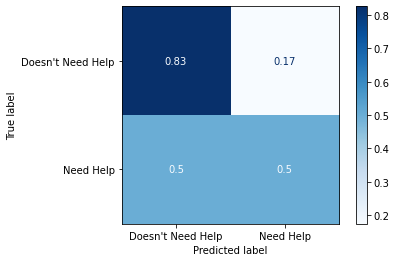

In [100]:
evaluate(gridsearch_cb,X_train,y_train,X_val,y_val)

Accuracy Score:
Train - 0.8506688506688507
Test - 0.7180589680589681
  
Precision Score:
Train - 0.8803652968036529
Test - 0.64375
  
Recall Score: 
Train - 0.6985507246376812
Test - 0.5175879396984925
  
F1 Score: 
Train - 0.7789898989898991
Test - 0.573816155988858
  
ROC_AUC: 
Train - 0.8205850425641319
Test - 0.6758647748928932
  
  
Confusion matrix for test data


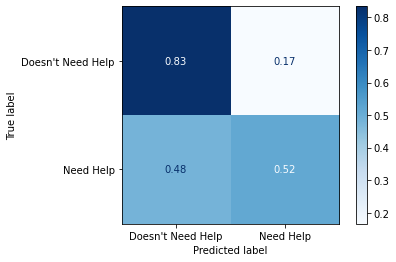

In [101]:
evaluate(gridsearch_cb,X_train,y_train,X_test,y_test)

### Naive Bayes

steps:
1. one hot encode everything
2. pipeline
3. gridsearch

In [102]:
# imports for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [103]:
# make list for categories of columns
# binary columns, yes or no questions
bi_col=[]
# columns that need one hot encoding, these are the ones that have less than 3 unique values
ohe_col=[]
# frequency encoded columns
freq_col=[]
# ordinal encoded columns
ord_col=[]

**Ordinal Columns**

How do I identify ordinal columns???

1. the begining of values are actually numbers
2. the values have these sets of values:

In [104]:
info('Q20')

column name: Q20
     
Question: Since the very start of your graduate school experience, would you say your level of satisfaction has:
     
number of null values: 0
     
Value Count:
Worsened a little                                                                                         1821
Improved slightly                                                                                         1638
Significantly worsened                                                                                    1137
Improved greatly                                                                                          1017
Stayed the same                                                                                            899
Since the very start of your graduate school experience, would you say your level of satisfaction has:       1
Name: Q20, dtype: int64


In [105]:
info('Q18.a')

column name: Q18.a
     
Question: How satisfied are you with your decision to pursue a PhD?
     
number of null values: 0
     
Value Count:
Very satisfied                                               2451
Somewhat satisfied                                           2397
Neither satisfied nor dissatisfied                            640
Somewhat dissatisfied                                         640
Very dissatisfied                                             384
How satisfied are you with your decision to pursue a PhD?       1
Name: Q18.a, dtype: int64


In [106]:
info('Q23')

column name: Q23
     
Question: To what extent does your PhD programme compare to your original expectations?
     
number of null values: 0
     
Value Count:
Meets original expectations                                                      3444
Does not meet original expectations                                              2403
Exceeds original expectations                                                     665
To what extent does your PhD programme compare to your original expectations?       1
Name: Q23, dtype: int64


In [107]:
info('Q25')

column name: Q25
     
Question: On average, how much one-on-one contact time do you spend with your supervisor each week?
     
number of null values: 0
     
Value Count:
Less than an hour                                                                            3175
Between one and three hours                                                                  2295
More than three hours                                                                         753
Other, please specify                                                                         289
On average, how much one-on-one contact time do you spend with your supervisor each week?       1
Name: Q25, dtype: int64


In [108]:
info('Q27.a')

column name: Q27.a
     
Question: Members of my department make time for frank conversations about my career
     
number of null values: 0
     
Value Count:
Agree                                                                         1840
Disagree                                                                      1565
Neither agree nor disagree                                                    1404
Strongly disagree                                                              839
Strongly Agree                                                                 488
Unsure/Not applicable                                                          376
Members of my department make time for frank conversations about my career       1
Name: Q27.a, dtype: int64


In [109]:
info('Q30.a')

column name: Q30.a
     
Question: Mental health and wellbeing services in my university are tailored and appropriate to the needs of PhD students
     
number of null values: 20
     
Value Count:
Neither agree nor disagree                                                                                         1667
Somewhat disagree                                                                                                  1459
Somewhat agree                                                                                                     1436
Strongly disagree                                                                                                  1296
Strongly agree                                                                                                      482
Prefer not to say                                                                                                   152
Mental health and wellbeing services in my university are tailored and appropriate

In [110]:
info('Q36.a')

column name: Q36.a
     
Question: nan
     
number of null values: 1
     
Value Count:
Substantially    2971
Somewhat         1440
Dramatically     1330
Barely            348
Unsure            319
Not at all        104
Name: Q36.a, dtype: int64


In [111]:
info('Q38.a')

column name: Q38.a
     
Question: Research in academia 
     
number of null values: 0
     
Value Count:
Very Likely                    2931
Likely                         1685
Not very likely                 758
Neither likely nor unlikely     570
Not likely at all               491
Unsure                           77
Research in academia              1
Name: Q38.a, dtype: int64


**Confusion Matrix for Test Set**

Accuracy Score:
Train - 0.7081627081627082
Test - 0.7002457002457002
  
Precision Score:
Train - 0.7381316998468607
Test - 0.6352357320099256
  
Recall Score: 
Train - 0.3492753623188406
Test - 0.4288107202680067
  
F1 Score: 
Train - 0.4741760944417117
Test - 0.512
  
ROC_AUC: 
Train - 0.6371869584261746
Test - 0.6431153504346824
  
  
Confusion matrix for test data


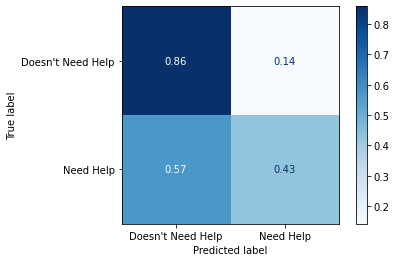

In [114]:
evaluate(new_cb, X_train, y_train, X_test, y_test)

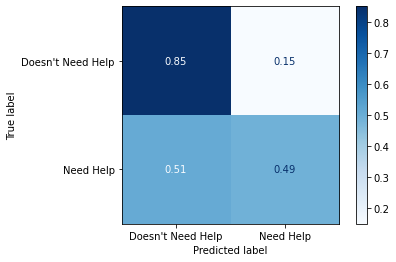

In [112]:
plot_confusion_matrix(cb, X_test, y_test, normalize = 'true', include_values=True, display_labels = ["Doesn't Need Help","Need Help"], cmap=plt.cm.Blues)

### Evaluation

Our model has a recall of 0.53, which means out of all the students who need mental health help, 53% will be caught by our model, 47% will fall through the crack.

Even though this is not great, it is still way better than not doing anything.

## Conclusions

Both our logistic regression and decision tree model indicates that whether a student is bullied in school is the biggest indicator of whether they would need help with anxiety and depression. The other important factors are whether they are harrassed or discriminated against in school and how satisfied they are with the program. 

It's very hard for students to voice their concerns in school because in a lot of cases their bully is their supervisor. By having a model to analyze survey data instead of humans, students can speak their truth without fear of retaliation and still get the help they need.

According to Stanford's [statistics](https://irds.stanford.edu/data-findings/doctoral-degree-programs-enrollment-and-demographics), there are 4720 new PhD students enrolled in 2021. Even though our model's predictive power is limited, it's going to be able to pick out 43% of the 36% of students who needs help with anxiety and depression, that's 730 students who gets the attention and care they need instead of suffering in silence. 